In [1]:
%matplotlib inline
import time
import random
import math
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
import pystan 
import pandas as pd
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import pickle
from scipy import stats
from tqdm.notebook import tqdm as tqdm
from matplotlib.patches import Ellipse
from scipy.special import beta as B
from concurrent.futures import ProcessPoolExecutor
import os

In [2]:
Iteration = 100000000
IterationDevide = int(Iteration/500000)
CopyNum = 100
package_size = 1000

In [3]:
CopyNum_dist = 5

In [4]:
prevalence = np.zeros(Iteration*CopyNum_dist)
logN0 = np.zeros(Iteration*CopyNum_dist)
logN_pre = np.zeros(Iteration*CopyNum_dist)
logN_heat = np.zeros(Iteration*CopyNum_dist)
logN_heat_pack = np.zeros(Iteration*CopyNum_dist)
logN_dist = np.zeros(Iteration*CopyNum_dist)
logN_retail = np.zeros(Iteration*CopyNum_dist)
logN_domestic = np.zeros(Iteration*CopyNum_dist)
logN_dose = np.zeros(Iteration*CopyNum_dist)
P_serve = np.zeros(Iteration*CopyNum_dist)
prevalence_or_not = np.zeros(Iteration*CopyNum_dist)
Ill_or_not = np.zeros(Iteration*CopyNum_dist)
temp_pre = np.zeros(Iteration*CopyNum_dist)
time_pre = np.zeros(Iteration*CopyNum_dist)
temp_heat = np.zeros(Iteration*CopyNum_dist)
time_heat = np.zeros(Iteration*CopyNum_dist)
temp_mean_heat = np.zeros(Iteration*CopyNum_dist)
time_mean_heat = np.zeros(Iteration*CopyNum_dist)
heat_time_variability = np.zeros(Iteration*CopyNum_dist)
heat_temp_uncertainty = np.zeros(Iteration*CopyNum_dist)
temp_dist = np.zeros(Iteration*CopyNum_dist)
time_dist = np.zeros(Iteration*CopyNum_dist)
time_retail = np.zeros(Iteration*CopyNum_dist)
temp_retail = np.zeros(Iteration*CopyNum_dist)
time_domestic = np.zeros(Iteration*CopyNum_dist)
temp_domestic = np.zeros(Iteration*CopyNum_dist)
mu_pre_variability = np.zeros(Iteration*CopyNum_dist)
mu_dist_variability = np.zeros(Iteration*CopyNum_dist)
mu_retail_variability = np.zeros(Iteration*CopyNum_dist)
mu_domestic_variability = np.zeros(Iteration*CopyNum_dist)
logD_variability = np.zeros(Iteration*CopyNum_dist)
size_serve = np.zeros(Iteration*CopyNum_dist)
para_r = np.zeros(Iteration*CopyNum_dist)
#mpd = np.zeros(Iteration*CopyNum_dist)

In [5]:
prevalence_ill = np.empty(0)
logN0_ill = np.empty(0)
logN_pre_ill = np.empty(0)
logN_heat_ill = np.empty(0)
logN_heat_pack_ill = np.empty(0)
logN_dist_ill = np.empty(0)
logN_retail_ill = np.empty(0)
logN_domestic_ill = np.empty(0)
logN_dose_ill = np.empty(0)
P_serve_ill = np.empty(0)
prevalence_or_not_ill = np.empty(0)
Ill_or_not_ill = np.empty(0)
temp_pre_ill = np.empty(0)
time_pre_ill = np.empty(0)
temp_heat_ill = np.empty(0)
time_heat_ill = np.empty(0)
temp_mean_heat_ill = np.empty(0)
time_mean_heat_ill = np.empty(0)
heat_time_variability_ill = np.empty(0)
heat_temp_uncertainty_ill = np.empty(0)
temp_dist_ill = np.empty(0)
time_dist_ill = np.empty(0)
time_retail_ill = np.empty(0)
temp_retail_ill = np.empty(0)
time_domestic_ill = np.empty(0)
temp_domestic_ill = np.empty(0)
mu_pre_variability_ill = np.empty(0)
mu_dist_variability_ill = np.empty(0)
mu_retail_variability_ill = np.empty(0)
mu_domestic_variability_ill = np.empty(0)
logD_variability_ill = np.empty(0)
size_serve_ill = np.empty(0)
para_r_ill = np.empty(0)
subj_class_ill = np.empty(0)
#mpd_ill = np.empty(0)

In [6]:
logC_maxs  = np.zeros(6)
for i in range(len(logC_maxs)):
    logC_maxs[i] = -10**16
logC_mins  = np.zeros(6)
for i in range(len(logC_mins)):
    logC_mins[i] = 10**16

In [7]:
Sum_P_serve = np.zeros(1)
Sum_P_serve_72 = np.zeros(1)
Sum_P_serve_72_5 = np.zeros(1)
Sum_P_serve_74 = np.zeros(1)
Sum_P_serve_75 = np.zeros(1)
P_serve_for_sum = np.zeros(Iteration)
heat_temp_for_sum = np.zeros(Iteration)

In [8]:
start = time.time()
K = int(Iteration/IterationDevide)
for q in tqdm(range(CopyNum),desc='Progress', leave=False):
    for k in range(IterationDevide):
        sms_multi_k = pickle.load(open('/Volumes/Archive/pickle output 1118/QMRA output'+str(k+q*Iteration/500000)+'.pkl', 'rb'))
        for i in range(500000):
            P_serve_for_sum[k*K+i] = sms_multi_k[i][8]
            heat_temp_for_sum[k*K+i] = sms_multi_k[i][15]
            if sms_multi_k[i][9]==int(1):
                logC_maxs[0] = np.max([logC_maxs[0], sms_multi_k[i][1]])
                logC_maxs[1] = np.max([logC_maxs[1], sms_multi_k[i][2]])
                logC_maxs[2] = np.max([logC_maxs[2], sms_multi_k[i][3]])
                logC_maxs[3] = np.max([logC_maxs[3], sms_multi_k[i][4]])
                logC_maxs[4] = np.max([logC_maxs[4], sms_multi_k[i][5]])
                logC_maxs[5] = np.max([logC_maxs[5], sms_multi_k[i][6]])
                logC_mins[0] = np.min([logC_mins[0], sms_multi_k[i][1]])
                logC_mins[1] = np.min([logC_mins[1], sms_multi_k[i][2]])
                logC_mins[2] = np.min([logC_mins[2], sms_multi_k[i][3]])
                logC_mins[3] = np.min([logC_mins[3], sms_multi_k[i][4]])
                logC_mins[4] = np.min([logC_mins[4], sms_multi_k[i][5]])
                logC_mins[5] = np.min([logC_mins[5], sms_multi_k[i][6]])
            if sms_multi_k[i][10]==int(1):
                print("CopyNum: "+str(q)+" !!! illness !!!")
                prevalence_ill = np.concatenate([prevalence_ill, [sms_multi_k[i][0]]]) 
                logN0_ill = np.concatenate([logN0_ill, [sms_multi_k[i][1]]])
                logN_pre_ill = np.concatenate([logN_pre_ill, [sms_multi_k[i][2]]])
                logN_heat_ill = np.concatenate([logN_heat_ill, [sms_multi_k[i][3]]])
                logN_dist_ill = np.concatenate([logN_dist_ill, [sms_multi_k[i][4]]])
                logN_retail_ill = np.concatenate([logN_retail_ill, [sms_multi_k[i][5]]])
                logN_domestic_ill = np.concatenate([logN_domestic_ill, [sms_multi_k[i][6]]])
                logN_dose_ill = np.concatenate([logN_dose_ill, [sms_multi_k[i][7]]])
                P_serve_ill = np.concatenate([P_serve_ill, [sms_multi_k[i][8]]])
                prevalence_or_not_ill = np.concatenate([prevalence_or_not_ill, [sms_multi_k[i][9]]])
                Ill_or_not_ill = np.concatenate([Ill_or_not_ill, [sms_multi_k[i][10]]])
                temp_pre_ill = np.concatenate([temp_pre_ill, [sms_multi_k[i][11]]])
                time_pre_ill = np.concatenate([time_pre_ill, [sms_multi_k[i][12]]])
                temp_heat_ill = np.concatenate([temp_heat_ill, [sms_multi_k[i][13]]])
                time_heat_ill = np.concatenate([time_heat_ill, [sms_multi_k[i][14]]])
                temp_mean_heat_ill = np.concatenate([temp_mean_heat_ill, [sms_multi_k[i][15]]])
                time_mean_heat_ill = np.concatenate([time_mean_heat_ill, [sms_multi_k[i][16]]])
                heat_time_variability_ill = np.concatenate([heat_time_variability_ill, [sms_multi_k[i][17]]])
                heat_temp_uncertainty_ill = np.concatenate([heat_temp_uncertainty_ill, [sms_multi_k[i][18]]])
                temp_dist_ill = np.concatenate([temp_dist_ill, [sms_multi_k[i][19]]])
                time_dist_ill = np.concatenate([time_dist_ill, [sms_multi_k[i][20]]])
                time_retail_ill = np.concatenate([time_retail_ill, [sms_multi_k[i][21]]])
                temp_retail_ill = np.concatenate([temp_retail_ill, [sms_multi_k[i][22]]])
                time_domestic_ill = np.concatenate([time_domestic_ill, [sms_multi_k[i][23]]])
                temp_domestic_ill = np.concatenate([temp_domestic_ill, [sms_multi_k[i][24]]])
                mu_pre_variability_ill = np.concatenate([mu_pre_variability_ill, [sms_multi_k[i][25]]])
                mu_dist_variability_ill = np.concatenate([mu_dist_variability_ill, [sms_multi_k[i][26]]])
                mu_retail_variability_ill = np.concatenate([mu_retail_variability_ill, [sms_multi_k[i][27]]])
                mu_domestic_variability_ill = np.concatenate([mu_domestic_variability_ill, [sms_multi_k[i][28]]])
                logD_variability_ill = np.concatenate([logD_variability_ill, [sms_multi_k[i][29]]])
                size_serve_ill = np.concatenate([size_serve_ill, [sms_multi_k[i][30]]])
                para_r_ill = np.concatenate([para_r_ill, [sms_multi_k[i][31]]])
                subj_class_ill = np.concatenate([subj_class_ill, [sms_multi_k[i][32]]])
                logN_heat_pack_ill = np.concatenate([logN_heat_pack_ill, [sms_multi_k[i][33]]])
                #mpd_ill = np.concatenate([mpd_ill, [sms_multi_k[i][34]]])
            
    Sum_P_serve[0] = np.sum([Sum_P_serve, np.sum(P_serve_for_sum)])
    Sum_P_serve_72[0] = np.sum([Sum_P_serve_72, np.sum(P_serve_for_sum[heat_temp_for_sum==72])])
    Sum_P_serve_72_5[0] = np.sum([Sum_P_serve_72_5, np.sum(P_serve_for_sum[heat_temp_for_sum==72.5])])
    Sum_P_serve_74[0] = np.sum([Sum_P_serve_74, np.sum(P_serve_for_sum[heat_temp_for_sum==74])])
    Sum_P_serve_75[0] = np.sum([Sum_P_serve_75, np.sum(P_serve_for_sum[heat_temp_for_sum==75])])
    
            

logC_mins = np.maximum(logC_mins, -10**16)
end = time.time()
delta = end - start
print('処理時間:{}hour'.format(round(delta/60/60,3))) 

Progress:   0%|          | 0/100 [00:00<?, ?it/s]

/opt/anaconda3/envs/pystan/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


CopyNum: 3 !!! illness !!!
CopyNum: 4 !!! illness !!!
CopyNum: 5 !!! illness !!!
CopyNum: 6 !!! illness !!!
CopyNum: 7 !!! illness !!!
CopyNum: 10 !!! illness !!!
CopyNum: 12 !!! illness !!!
CopyNum: 14 !!! illness !!!
CopyNum: 14 !!! illness !!!
CopyNum: 15 !!! illness !!!
CopyNum: 15 !!! illness !!!
CopyNum: 22 !!! illness !!!
CopyNum: 23 !!! illness !!!
CopyNum: 24 !!! illness !!!
CopyNum: 24 !!! illness !!!
CopyNum: 25 !!! illness !!!
CopyNum: 28 !!! illness !!!
CopyNum: 31 !!! illness !!!
CopyNum: 33 !!! illness !!!
CopyNum: 36 !!! illness !!!
CopyNum: 37 !!! illness !!!
CopyNum: 38 !!! illness !!!
CopyNum: 40 !!! illness !!!
CopyNum: 44 !!! illness !!!
CopyNum: 45 !!! illness !!!
CopyNum: 47 !!! illness !!!
CopyNum: 48 !!! illness !!!
CopyNum: 50 !!! illness !!!
CopyNum: 51 !!! illness !!!
CopyNum: 53 !!! illness !!!
CopyNum: 55 !!! illness !!!
CopyNum: 60 !!! illness !!!
CopyNum: 61 !!! illness !!!
CopyNum: 63 !!! illness !!!
CopyNum: 65 !!! illness !!!
CopyNum: 65 !!! illness !

In [9]:
start = time.time()
K = int(Iteration/IterationDevide)
for q in tqdm(range(CopyNum_dist), desc='Progress', leave=False):
    for k in range(IterationDevide):
        sms_multi_k = pickle.load(open('/Volumes/Archive/pickle output 1118/QMRA output'+str(k+q*Iteration/500000)+'.pkl', 'rb'))
        for i in range(500000):
            prevalence[Iteration*q+K*k+i] = sms_multi_k[i][0]
            logN0[Iteration*q+K*k+i] = sms_multi_k[i][1]
            logN_pre[Iteration*q+K*k+i] = sms_multi_k[i][2]
            logN_heat[Iteration*q+K*k+i] = sms_multi_k[i][3]
            logN_dist[Iteration*q+K*k+i] = sms_multi_k[i][4]
            logN_retail[Iteration*q+K*k+i] = sms_multi_k[i][5]
            logN_domestic[Iteration*q+K*k+i] = sms_multi_k[i][6]
            logN_dose[Iteration*q+K*k+i] = sms_multi_k[i][7]
            P_serve[Iteration*q+K*k+i] = sms_multi_k[i][8]
            prevalence_or_not[Iteration*q+K*k+i] = sms_multi_k[i][9]
            Ill_or_not[Iteration*q+K*k+i] = sms_multi_k[i][10]
            temp_pre[Iteration*q+K*k+i] = sms_multi_k[i][11]
            time_pre[Iteration*q+K*k+i] = sms_multi_k[i][12]
            temp_heat[Iteration*q+K*k+i] = sms_multi_k[i][13]
            time_heat[Iteration*q+K*k+i] = sms_multi_k[i][14]
            temp_mean_heat[Iteration*q+K*k+i] = sms_multi_k[i][15]
            time_mean_heat[Iteration*q+K*k+i] = sms_multi_k[i][16]
            heat_time_variability[Iteration*q+K*k+i] = sms_multi_k[i][17]
            heat_temp_uncertainty[Iteration*q+K*k+i] = sms_multi_k[i][18]
            temp_dist[Iteration*q+K*k+i] = sms_multi_k[i][19]
            time_dist[Iteration*q+K*k+i] = sms_multi_k[i][20]
            time_retail[Iteration*q+K*k+i] = sms_multi_k[i][21]
            temp_retail[Iteration*q+K*k+i] = sms_multi_k[i][22]
            time_domestic[Iteration*q+K*k+i] = sms_multi_k[i][23]
            temp_domestic[Iteration*q+K*k+i] = sms_multi_k[i][24]
            mu_pre_variability[Iteration*q+K*k+i] = sms_multi_k[i][25]
            mu_dist_variability[Iteration*q+K*k+i] = sms_multi_k[i][26]
            mu_retail_variability[Iteration*q+K*k+i] = sms_multi_k[i][27]
            mu_domestic_variability[Iteration*q+K*k+i] = sms_multi_k[i][28]
            logD_variability[Iteration*q+K*k+i] = sms_multi_k[i][29]
            size_serve[Iteration*q+K*k+i] = sms_multi_k[i][30]
            para_r[Iteration*q+K*k+i] = sms_multi_k[i][31]
            logN_heat_pack[Iteration*q+K*k+i] = sms_multi_k[i][33]
            #mpd[Iteration*q+K*k+i] = sms_multi_k[i][34]

end = time.time()
delta = end - start
print('処理時間:{}hour'.format(round(delta/60/60,3)))

Progress:   0%|          | 0/5 [00:00<?, ?it/s]

処理時間:1.584hour


In [10]:
np.sum([logN_dose==float('-inf')])

499797697

In [11]:
np.sum([logN_dose==float('-inf')])/Iteration

4.99797697

In [12]:
(1-np.sum([logN_dose==float('-inf')])/Iteration)*100

-399.79769699999997

In [13]:
Results_ill = pd.DataFrame({
    "prevalence_ill": prevalence_ill,
    "logN0_ill": logN0_ill,
    "logN_pre_ill": logN_pre_ill,
    "logN_heat_ill": logN_heat_ill,
    "logN_heat_pack_ill": logN_heat_pack_ill,
    "logN_dist_ill": logN_dist_ill,
    "logN_retail_ill": logN_retail_ill,
    "logN_domestic_ill": logN_domestic_ill,
    "logN_dose_ill": logN_dose_ill,
    "P_serve_ill": P_serve_ill,
    "prevalence_or_not_ill": prevalence_or_not_ill,
    "Ill_or_not_ill": Ill_or_not_ill,
    "temp_pre_ill": temp_pre_ill,
    "time_pre_ill": time_pre_ill,
    "temp_heat_ill": temp_heat_ill,
    "time_heat_ill": time_heat_ill,
    "temp_mean_heat_ill": temp_mean_heat_ill,
    "time_mean_heat_ill": time_mean_heat_ill,
    "heat_time_variability_ill": heat_time_variability_ill,
    "heat_temp_uncertainty_ill": heat_temp_uncertainty_ill,
    "temp_dist_ill": temp_dist_ill,
    "time_dist_ill": time_dist_ill,
    "time_retail_ill": time_retail_ill,
    "temp_retail_ill": temp_retail_ill,
    "time_domestic_ill": time_domestic_ill,
    "temp_domestic_ill": temp_domestic_ill,
    "mu_pre_variability_ill": mu_pre_variability_ill,
    "mu_dist_variability_ill": mu_dist_variability_ill,
    "mu_retail_variability_ill": mu_retail_variability_ill,
    "mu_domestic_variability_ill": mu_domestic_variability_ill,
    "logD_variability_ill": logD_variability_ill,
    "size_serve_ill": size_serve_ill,
    "para_r_ill": para_r_ill,
    "subj_class_ill": subj_class_ill
})

In [14]:
subj_class_ill

array([1., 2., 3., 1., 1., 3., 1., 3., 1., 3., 3., 3., 1., 3., 1., 3., 3.,
       3., 3., 1., 1., 3., 1., 3., 3., 1., 1., 3., 3., 1., 1., 3., 3., 3.,
       1., 3., 1., 3., 1., 1., 3., 1., 1., 3., 1., 1., 3., 1., 1., 3., 1.,
       3., 1., 1., 3., 1., 3., 1., 1., 1., 1.])

In [15]:
para_r_ill

array([2.05204453e-11, 1.02736616e-09, 7.43167671e-09, 5.92996464e-10,
       2.84927758e-13, 1.08103644e-08, 1.99539236e-09, 2.65158809e-10,
       3.66787731e-09, 2.58081175e-10, 8.59976314e-10, 1.59485101e-08,
       3.02603448e-10, 1.58571365e-10, 6.08557182e-11, 9.68091982e-10,
       5.86768987e-12, 4.80616770e-11, 1.34262527e-11, 5.49894530e-12,
       1.18290000e-11, 4.54599716e-11, 1.07860340e-10, 3.10277815e-08,
       1.09153816e-09, 1.17387162e-09, 1.89310272e-10, 2.37479050e-09,
       5.54569286e-10, 3.58693392e-10, 9.94926321e-11, 2.06992949e-11,
       4.76857149e-11, 3.42309530e-09, 6.93195331e-12, 4.98680582e-09,
       9.25650818e-10, 6.59100614e-11, 6.61109981e-12, 8.16348882e-13,
       1.76877264e-10, 8.11042329e-12, 9.91518804e-12, 9.95776196e-11,
       3.15295499e-09, 2.72990370e-11, 2.38572001e-10, 4.67074872e-11,
       8.94529813e-11, 2.80311770e-09, 5.52386546e-10, 1.49538313e-12,
       3.58695294e-12, 1.64831033e-11, 2.94990280e-09, 5.77308469e-11,
      

In [16]:
with open('Pickle Results_ill output.pkl', 'wb') as g:
    pickle.dump(Results_ill, g)

In [17]:
Results_ill = pickle.load(open('Pickle Results_ill output.pkl', 'rb'))

In [18]:
prevalence_ill = Results_ill["prevalence_ill"]
logC0_ill = Results_ill["logN0_ill"]
logC_pre_ill = Results_ill["logN_pre_ill"]
logC_heat_ill = Results_ill["logN_heat_ill"]
logC_heat_pack_ill = Results_ill["logN_heat_pack_ill"]
logC_dist_ill = Results_ill["logN_dist_ill"]
logC_retail_ill = Results_ill["logN_retail_ill"]
logC_domestic_ill = Results_ill["logN_domestic_ill"]
logN_dose_ill = Results_ill["logN_dose_ill"]
P_serve_ill = Results_ill["P_serve_ill"]
prevalence_or_not_ill = Results_ill["prevalence_or_not_ill"]
Ill_or_not_ill = Results_ill["Ill_or_not_ill"]
temp_pre_ill = Results_ill["temp_pre_ill"]
time_pre_ill = Results_ill["time_pre_ill"]
temp_heat_ill = Results_ill["temp_heat_ill"]
time_heat_ill = Results_ill["time_heat_ill"]
temp_mean_heat_ill = Results_ill["temp_mean_heat_ill"]
time_mean_heat_ill = Results_ill["time_mean_heat_ill"]
heat_time_variability_ill = Results_ill["heat_time_variability_ill"]
heat_temp_uncertainty_ill = Results_ill["heat_temp_uncertainty_ill"]
temp_dist_ill = Results_ill["temp_dist_ill"]
time_dist_ill = Results_ill["time_dist_ill"]
time_retail_ill = Results_ill["time_retail_ill"]
temp_retail_ill = Results_ill["temp_retail_ill"]
time_domestic_ill = Results_ill["time_domestic_ill"]
temp_domestic_ill = Results_ill["temp_domestic_ill"]
mu_pre_variability_ill = Results_ill["mu_pre_variability_ill"]
mu_dist_variability_ill = Results_ill["mu_dist_variability_ill"]
mu_retail_variability_ill = Results_ill["mu_retail_variability_ill"]
mu_domestic_variability_ill = Results_ill["mu_domestic_variability_ill"]
logD_variability_ill = Results_ill["logD_variability_ill"]
size_serve_ill = Results_ill["size_serve_ill"]
para_r_ill = Results_ill["para_r_ill"]

In [19]:
logN_domestic_ill

array([6.75900109, 7.73472397, 6.43424609, 6.31862243, 8.08767295,
       4.99909505, 7.50904198, 7.74161685, 5.74590969, 6.05865287,
       7.9798567 , 6.33133179, 7.62669878, 7.30685453, 7.5894567 ,
       7.20244425, 8.41174535, 7.67547682, 7.95665779, 7.65421737,
       7.72042493, 7.63209393, 6.28373862, 5.59045024, 6.49865776,
       7.05570638, 7.5821678 , 6.36465109, 7.27812493, 6.11148861,
       8.25645022, 8.28091437, 7.83658791, 5.0812447 , 8.26123154,
       6.89159851, 6.43955969, 6.47478668, 8.36064434, 4.43245145,
       7.76714179, 6.26878211, 7.83522861, 7.6600636 , 4.77539131,
       7.19191721, 8.15838518, 7.69179358, 6.24356728, 6.4101263 ,
       7.40855345, 8.23918371, 8.26597089, 7.46965116, 6.92886975,
       7.93032281, 6.43114562, 7.89683247, 8.06034759, 6.37795705,
       4.90666698])

In [20]:
Sum_P_serve[0]

62.36157487068626

(array([1.79248260e-05, 2.72769092e-05, 5.82946516e-05, 1.97173086e-04,
        5.03921413e-04, 1.24195664e-03, 4.62663140e-03, 7.58703331e-03,
        2.08210103e-02, 5.03436663e-02, 9.02904660e-02, 2.50602940e-01,
        3.33860795e-01, 2.87724943e-01, 1.96395928e-01, 2.34062378e-01,
        3.09636874e-01, 1.96106793e-01, 3.34737553e-02, 2.88050395e-02,
        1.50824162e-02, 1.61945348e-02, 2.38040131e-02, 2.39327601e-02]),
 array([-7.29200256, -6.82150256, -6.35100257, -5.88050257, -5.41000257,
        -4.93950258, -4.46900258, -3.99850258, -3.52800258, -3.05750259,
        -2.58700259, -2.11650259, -1.64600259, -1.1755026 , -0.7050026 ,
        -0.2345026 ,  0.23599739,  0.70649739,  1.17699739,  1.64749739,
         2.11799738,  2.58849738,  3.05899738,  3.52949738,  3.99999737]),
 <BarContainer object of 24 artists>)

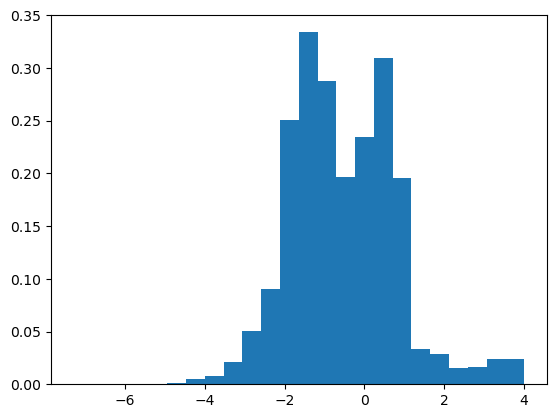

In [21]:
plt.hist(logN0[(prevalence_or_not==1)&(logN0!=float('-inf'))], density = 'True',bins=24)

(array([1.08630093e+00, 6.76451469e-01, 3.98199910e-01, 3.40496541e-01,
        2.73569964e-01, 2.05430217e-01, 1.57416659e-01, 1.22452460e-01,
        8.93391252e-02, 6.55889783e-02, 4.88223388e-02, 3.59285131e-02,
        2.89138986e-02, 2.32524360e-02, 1.74198851e-02, 1.25516494e-02,
        8.86547726e-03, 5.80144389e-03, 3.65506519e-03, 1.80420239e-03,
        1.04208241e-03, 4.51050598e-04, 1.08874282e-04, 1.55534689e-05]),
 array([-3.        , -2.72252118, -2.44504237, -2.16756355, -1.89008474,
        -1.61260592, -1.3351271 , -1.05764829, -0.78016947, -0.50269066,
        -0.22521184,  0.05226697,  0.32974579,  0.60722461,  0.88470342,
         1.16218224,  1.43966105,  1.71713987,  1.99461869,  2.2720975 ,
         2.54957632,  2.82705513,  3.10453395,  3.38201277,  3.65949158]),
 <BarContainer object of 24 artists>)

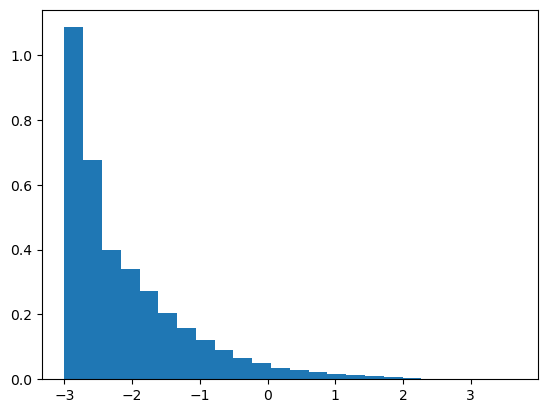

In [22]:
plt.hist(logN_heat_pack[(prevalence_or_not==1)&(logN_heat_pack!=float('-inf'))], density = 'True',bins=24)

(array([3.45332743e-01, 2.83728801e-01, 1.65990937e-01, 7.85847504e-02,
        3.19891210e-02, 1.20404385e-02, 3.88563260e-03, 1.38348611e-03,
        5.66179133e-04, 2.05468234e-04]),
 array([ 0.        ,  1.08259372,  2.16518744,  3.24778116,  4.33037488,
         5.4129686 ,  6.49556232,  7.57815603,  8.66074975,  9.74334347,
        10.82593719]),
 <BarContainer object of 10 artists>)

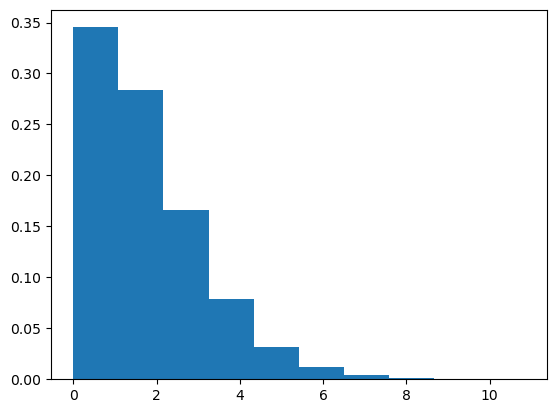

In [23]:
plt.hist(logN_dose[(prevalence_or_not==1)&(logN_dose!=float('-inf'))], density = 'True')

(array([8.22901988e-02, 1.59733280e-01, 1.82873440e-01, 1.23201016e-01,
        5.51767307e-02, 1.75332072e-02, 4.60333753e-03, 1.08909774e-03,
        2.46946580e-04, 3.16598180e-05]),
 array([-1.59545898e+01, -1.43591309e+01, -1.27636720e+01, -1.11682131e+01,
        -9.57275415e+00, -7.97729524e+00, -6.38183634e+00, -4.78637743e+00,
        -3.19091853e+00, -1.59545962e+00, -7.18752428e-07]),
 <BarContainer object of 10 artists>)

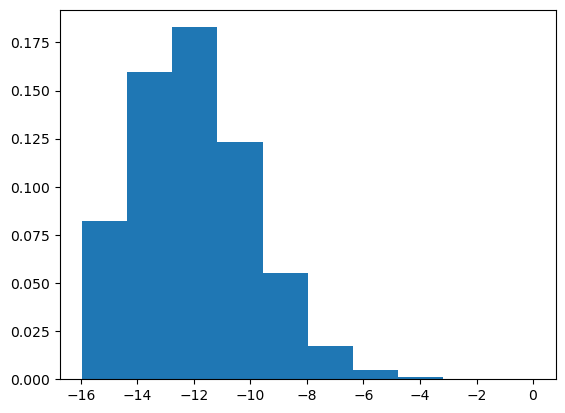

In [24]:
plt.hist(np.log10(P_serve[(prevalence_or_not==1)&(P_serve!=0)]), density = 'True')

In [25]:
logN0_qtl = np.maximum(np.quantile(logN0[prevalence_or_not==1],[0.005,  0.5, 0.995]), float(-10**16))
logN_pre_qtl = np.maximum(np.quantile(logN_pre[prevalence_or_not==1],[0.005,  0.5, 0.995]), float(-10**16))
logN_heat_qtl = np.maximum(np.quantile(logN_heat[prevalence_or_not==1],[0.005,  0.5, 0.995]), float(-10**16))
logN_dist_qtl = np.maximum(np.quantile(logN_dist[prevalence_or_not==1],[0.005,  0.5, 0.995]), float(-10**16))
logN_retail_qtl = np.maximum(np.quantile(logN_retail[prevalence_or_not==1],[0.005,  0.5, 0.995]), float(-10**16))
logN_domestic_qtl = np.maximum(np.quantile(logN_domestic[prevalence_or_not==1],[0.005,  0.5, 0.995]), float(-10**16))
logN_mins = [np.min(logN0[prevalence_or_not==1]),
             np.min(logN_pre[prevalence_or_not==1]),
             np.min(logN_heat[prevalence_or_not==1]),
             np.min(logN_dist[prevalence_or_not==1]),
             np.min(logN_retail[prevalence_or_not==1]),
             np.min(logN_domestic[prevalence_or_not==1])]
logN_mins = np.maximum(logN_mins, float(-10**16))

/opt/anaconda3/envs/pystan/lib/python3.7/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [26]:
logN_mins

array([-7.29200256e+00, -7.24038049e+00, -1.53616323e+03, -1.00000000e+16,
       -1.00000000e+16, -1.00000000e+16])

In [27]:
print(logN0_qtl)
print(logN_pre_qtl)
print(logN_heat_qtl)
print(logN_dist_qtl)
print(logN_retail_qtl)
print(logN_domestic_qtl)

[-3.71443783 -0.66527187  3.79122477]
[-3.5600983  -0.49192508  3.95573451]
[-175.2724078   -21.17871661   -1.86891208]
[        nan         nan -1.76955108]
[        nan         nan -1.36653154]
[        nan         nan -0.16941133]


In [28]:
len(logN_dist)

500000000

In [29]:
len(logN_dist[prevalence_or_not==1])

13635883

In [30]:
np.sum([logN_dist[prevalence_or_not==1] - logN_heat_pack[prevalence_or_not==1]!=float('-inf')])

/opt/anaconda3/envs/pystan/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.


13635883

In [31]:
np.sum([logN_dist[prevalence_or_not==1] - logN_heat_pack[prevalence_or_not==1]!=float('nan')])

/opt/anaconda3/envs/pystan/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.


13635883

In [32]:
np.sum([np.isnan(logN_dist[prevalence_or_not==1] - logN_heat_pack[prevalence_or_not==1])])

/opt/anaconda3/envs/pystan/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.


13404174

In [33]:
len(logN_dist[prevalence_or_not==1])-np.sum([np.isnan(logN_dist[prevalence_or_not==1] - logN_heat_pack[prevalence_or_not==1])])

/opt/anaconda3/envs/pystan/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.


231709

In [34]:
len(logN_heat_pack)-np.sum(np.isinf(logN_heat_pack))

231709

In [35]:
delta_pre = logN_pre[prevalence_or_not==1] - logN0[prevalence_or_not==1]
delta_heat = logN_heat[prevalence_or_not==1] - logN_pre[prevalence_or_not==1]

delta_dist = logN_dist[prevalence_or_not==1] - logN_heat_pack[prevalence_or_not==1]
delta_retail = logN_retail[prevalence_or_not==1] - logN_dist[prevalence_or_not==1]
delta_domestic = logN_domestic[prevalence_or_not==1] - logN_retail[prevalence_or_not==1]

delta_pre = delta_pre[delta_pre!=float('-inf')]
delta_heat = delta_heat[delta_heat!=float('-inf')]
delta_dist = delta_dist[delta_dist!=float('-inf')]
delta_retail = delta_retail[delta_retail!=float('-inf')]
delta_domestic = delta_domestic[delta_domestic!=float('-inf')]

delta_pre = delta_pre[~np.isnan(delta_pre)]
delta_heat = delta_heat[~np.isnan(delta_heat)]
delta_dist = delta_dist[~np.isnan(delta_dist)]
delta_retail = delta_retail[~np.isnan(delta_retail)]
delta_domestic = delta_domestic[~np.isnan(delta_domestic)]

delta_pre_ill = logN_pre_ill - logN0_ill
delta_heat_ill = logN_heat_ill - logN_pre_ill
delta_dist_ill = logN_dist_ill - logN_heat_pack_ill
delta_retail_ill = logN_retail_ill - logN_dist_ill
delta_domestic_ill = logN_domestic_ill - logN_retail_ill

Deltas = (logN0[prevalence_or_not==1], delta_pre, delta_heat, delta_dist, delta_retail, delta_domestic)

/opt/anaconda3/envs/pystan/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.
/opt/anaconda3/envs/pystan/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in subtract
  """
/opt/anaconda3/envs/pystan/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  


In [36]:
Results_ill_for_csv = pd.DataFrame({
    'Initial level (log CFU/mL)': logN0_ill,
    'Farm temp. (ºC)': temp_pre_ill,
    'Farm time (h)': time_pre_ill,
    '√µ variability on farm': mu_pre_variability_ill,
    'Growth ratio on farm (log CFU/CFU)': delta_pre_ill,
    'Target heating temp. (ºC)': temp_mean_heat_ill,
    'Target heating time (s)': time_mean_heat_ill,
    'Heating temp. (ºC)': temp_heat_ill,
    'Heating time (s)': time_heat_ill,
    'Log D variability (log min)': logD_variability_ill,
    'Reduction ratio by heating (log CFU/CFU)': delta_heat_ill,
    'Distributing temp. (ºC)': temp_dist_ill,
    'Distributing time (h)': time_dist_ill,
    '√µ variability on distributing': mu_dist_variability_ill,
    'Growth ratio on distributing (log CFU/CFU)': delta_dist_ill,
    'Retail temp. (ºC)': temp_retail_ill,
    'Retail time (day)': time_retail_ill/24,
    '√µ variability on retail': mu_retail_variability_ill,
    'Growth ratio on retail (log CFU/CFU)': delta_retail_ill,
    'Domestic temp (ºC)': temp_domestic_ill,
    'Domestic time (day)': time_domestic_ill/24,
    '√µ variability on domestic': mu_domestic_variability_ill,
    'Growth ratio on domestic (log CFU/CFU)': delta_domestic_ill,
    'Serving size (mL)': size_serve_ill,
    'Pathogenicity (Log r value)': np.log10(para_r_ill),
    'Subject group': subj_class_ill,
    'Log Dose (log CFU)': logN_dose_ill
})

In [37]:
Results_ill_for_csv.to_csv("Results of conditions in the case of illness occurrence.csv", encoding="UTF-8")

In [38]:
Results_ill_for_csv

Initial level (log CFU/mL)  Farm temp. (ºC)  Farm time (h)  \
0                     3.240291         6.019050       3.219144   
1                     3.118078         2.642014      20.417279   
2                     2.100083         3.966931      12.781441   
3                     2.846999         1.694399       7.498888   
4                     3.677605         2.752868       9.808998   
..                         ...              ...            ...   
56                    3.938036         3.720693      21.509905   
57                   -0.252292         3.087429      20.223495   
58                    3.533221         5.048004      18.831796   
59                    3.979084         3.910413      16.547812   
60                    3.921476         4.489038      12.429806   

    √µ variability on farm  Growth ratio on farm (log CFU/CFU)  \
0                 0.020663                            0.075768   
1                -0.024743                            0.074042   
2                -0.049979                            0.036402   
3                 0.043147                            0.097787   
4                 0.021249                            0.113619   
..                     ...                                 ...   
56                0.010108                            0.263454   
57               -0.002786                            0.155667   
58               -0.029970                            0.148086   
59                0.016390                            0.236923   
60               -0.016505                            0.109705   

    Target heating temp. (ºC)  Target heating time (s)  Heating temp. (ºC)  \
0                        72.0                     15.0           72.006933   
1                        72.0                     15.0           72.090038   
2                        74.0                     20.0           73.797769   
3                        72.0                     15.0           71.927688   
4                        72.0                     15.0           71.311809   
..                        ...                      ...                 ...   
56                       72.0                     15.0           71.525622   
57                       72.0                     15.0           72.003647   
58                       72.0                     15.0           71.975569   
59                       72.0                     15.0           72.032846   
60                       72.5                     20.0           72.696255   

    Heating time (s)  Log D variability (log min)  ...  \
0          14.911867                     0.430592  ...   
1          14.987796                     0.418555  ...   
2          16.551186                     0.811194  ...   
3          14.859019                     0.794738  ...   
4          15.029709                     0.264396  ...   
..               ...                          ...  ...   
56         15.040588                     0.654501  ...   
57         14.845228                     0.686446  ...   
58         13.868545                     0.234317  ...   
59         12.983670                     0.266802  ...   
60         17.184473                     0.556007  ...   

    √µ variability on retail  Growth ratio on retail (log CFU/CFU)  \
0                  -0.037113                              0.238437   
1                   0.073923                              2.604496   
2                  -0.040661                              0.185290   
3                   0.006894                              0.399269   
4                  -0.009141                              0.495443   
..                       ...                                   ...   
56                  0.022998                              0.320191   
57                  0.003155                              0.259637   
58                  0.037228                              0.710154   
59                  0.042581                              0.807909   
60            

In [39]:
Results = pd.DataFrame({
    'Initial level (log CFU/mL)': logN0[prevalence_or_not==1],
    'Farm temp. (ºC)': temp_pre[prevalence_or_not==1],
    'Farm time (h)': time_pre[prevalence_or_not==1],
    'Root mu variability on farm': mu_pre_variability[prevalence_or_not==1],
    'Target heating temp. (ºC)': temp_mean_heat[prevalence_or_not==1],
    'Target heating time (s)': time_mean_heat[prevalence_or_not==1],
    'Heating temp. (ºC)': temp_heat[prevalence_or_not==1],
    'Heating time (s)': time_heat[prevalence_or_not==1],
    'Log D variability (log min)': logD_variability[prevalence_or_not==1],
    'Distributing temp. (ºC)': temp_dist[prevalence_or_not==1],
    'Distributing time (h)': time_dist[prevalence_or_not==1],
    'Root mu variability on distributing': mu_dist_variability[prevalence_or_not==1],
    'Retail temp. (ºC)': temp_retail[prevalence_or_not==1],
    'Retail time (day)': time_retail[prevalence_or_not==1]/24,
    'Root mu variability on retail': mu_retail_variability[prevalence_or_not==1],
    'Domestic temp (ºC)': temp_domestic[prevalence_or_not==1],
    'Domestic time (day)': time_domestic[prevalence_or_not==1]/24,
    'Root mu variability on domestic': mu_domestic_variability[prevalence_or_not==1],
    'Serving size (mL)': size_serve[prevalence_or_not==1],
    'Pathogenicity (Log r value)': np.log10(para_r[prevalence_or_not==1]),
    'Log Dose (log CFU)': logN_dose[prevalence_or_not==1]
})

In [40]:
np.quantile(logN_dose[logN_dose!=float('-inf')],[0.25,  0.5, 0.75])

array([0.69897   , 1.49136169, 2.49831055])

In [41]:
Q_Results = Results.quantile([0.25, 0.5, 0.75])
Q_Results.to_csv("Results of conditions of Quantiles.csv", encoding="UTF-8")
Q_Results

/opt/anaconda3/envs/pystan/lib/python3.7/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Initial level (log CFU/mL)  Farm temp. (ºC)  Farm time (h)  \
0.25                   -1.470628         2.992563       9.363202   
0.50                   -0.665272         3.610639      13.720488   
0.75                    0.411707         4.407573      18.628939   

      Root mu variability on farm  Target heating temp. (ºC)  \
0.25                    -0.018101                       72.5   
0.50                     0.000596                       74.0   
0.75                     0.019304                       74.0   

      Target heating time (s)  Heating temp. (ºC)  Heating time (s)  \
0.25                     20.0           72.250909         16.760020   
0.50                     20.0           73.255655         19.869816   
0.75                     20.0           74.499006         20.130452   

      Log D variability (log min)  Distributing temp. (ºC)  ...  \
0.25                    -0.205147                 5.553715  ...   
0.50                    -0.007183                 6.659664  ...   
0.75                     0.190929                 7.765707  ...   

      Root mu variability on distributing  Retail temp. (ºC)  \
0.25                            -0.017983           3.023480   
0.50                             0.000622           4.980000   
0.75                             0.019236           6.936849   

      Retail time (day)  Root mu variability on retail  Domestic temp (ºC)  \
0.25           0.434797                      -0.017926            5.639743   
0.50           0.711167                       0.000588            7.690362   
0.75           1.143411                       0.019282            9.763051   

      Domestic time (day)  Root mu variability on domestic  Serving size (mL)  \
0.25             1.039513                        -0.018019         119.035867   
0.50             1.529696                         0.000602         238.049115   
0.75             2.046264                         0.019236         239.296549   

      Pathogenicity (Log r value)  Log Dose (log CFU)  
0.25                   -15.027375                 NaN  
0.50                   -13.891621                 NaN  
0.75                   -12.740502                 NaN  

[3 rows x 21 columns]

In [42]:
Results = []
Q_Results = []

In [43]:

Q_Deltas = pd.DataFrame({
    'qtl': [0.25, 0.5, 0.75],
    'Growth ratio on farm (log CFU/CFU)': np.quantile(delta_pre,[0.25,  0.5, 0.75]),
    'Reduction raitio by heating (log CFU/CFU)': np.quantile(delta_heat,[0.25,  0.5, 0.75]),
    'Growth ratio on distirbuting (log CFU/CFU)': np.quantile(delta_dist,[0.25,  0.5, 0.75]),
    'Growth ratio on retail (log CFU/CFU)': np.quantile(delta_retail,[0.25,  0.5, 0.75]),
    'Growth ratio on domestic (log CFU/CFU)': np.quantile(delta_domestic,[0.25,  0.5, 0.75])
})
Q_Deltas = Q_Deltas.set_index('qtl')

In [44]:
Q_Deltas

Growth ratio on farm (log CFU/CFU)  \
qtl                                        
0.25                            0.070622   
0.50                            0.130388   
0.75                            0.221578   

      Reduction raitio by heating (log CFU/CFU)  \
qtl                                               
0.25                                 -37.668913   
0.50                                 -20.782550   
0.75                                 -11.395062   

      Growth ratio on distirbuting (log CFU/CFU)  \
qtl                                                
0.25                                    0.000000   
0.50                                    0.018483   
0.75                                    0.108514   

      Growth ratio on retail (log CFU/CFU)  \
qtl                                          
0.25                              0.000000   
0.50                              0.185108   
0.75                              0.459747   

      Growth ratio on domestic (log CFU/CFU)  
qtl                                           
0.25                                0.310824  
0.50                                0.771089  
0.75                                1.397940

In [45]:
Q_Deltas.to_csv("Deltas of conditions of Quantiles.csv", encoding="UTF-8")

In [46]:
Results = pd.DataFrame({
    'Initial level (log CFU/mL)': logN0[prevalence_or_not==1],
    'Farm temp. (ºC)': temp_pre[prevalence_or_not==1],
    'Farm time (h)': time_pre[prevalence_or_not==1],
    'Root mu variability on farm': mu_pre_variability[prevalence_or_not==1],
    'Target heating temp. (ºC)': temp_mean_heat[prevalence_or_not==1],
    'Target heating time (s)': time_mean_heat[prevalence_or_not==1],
    'Heating temp. (ºC)': temp_heat[prevalence_or_not==1],
    'Heating time (s)': time_heat[prevalence_or_not==1],
    'Log D variability (log min)': logD_variability[prevalence_or_not==1],
    'Distributing temp. (ºC)': temp_dist[prevalence_or_not==1],
    'Distributing time (h)': time_dist[prevalence_or_not==1],
    'Root mu variability on distributing': mu_dist_variability[prevalence_or_not==1],
    'Retail temp. (ºC)': temp_retail[prevalence_or_not==1],
    'Retail time (day)': time_retail[prevalence_or_not==1]/24,
    'Root mu variability on retail': mu_retail_variability[prevalence_or_not==1],
    'Domestic temp (ºC)': temp_domestic[prevalence_or_not==1],
    'Domestic time (day)': time_domestic[prevalence_or_not==1]/24,
    'Root mu variability on domestic': mu_domestic_variability[prevalence_or_not==1],
    'Serving size (mL)': size_serve[prevalence_or_not==1],
    'Pathogenicity (Log r value)': np.log10(para_r[prevalence_or_not==1])
})

In [47]:
Q_Results = Results.quantile([0.25, 0.5, 0.75])
Q_Results.to_csv("Results of conditions of Quantiles.csv", encoding="UTF-8")
Q_Results

Initial level (log CFU/mL)  Farm temp. (ºC)  Farm time (h)  \
0.25                   -1.470628         2.992563       9.363202   
0.50                   -0.665272         3.610639      13.720488   
0.75                    0.411707         4.407573      18.628939   

      Root mu variability on farm  Target heating temp. (ºC)  \
0.25                    -0.018101                       72.5   
0.50                     0.000596                       74.0   
0.75                     0.019304                       74.0   

      Target heating time (s)  Heating temp. (ºC)  Heating time (s)  \
0.25                     20.0           72.250909         16.760020   
0.50                     20.0           73.255655         19.869816   
0.75                     20.0           74.499006         20.130452   

      Log D variability (log min)  Distributing temp. (ºC)  \
0.25                    -0.205147                 5.553715   
0.50                    -0.007183                 6.659664   
0.75                     0.190929                 7.765707   

      Distributing time (h)  Root mu variability on distributing  \
0.25               2.308044                            -0.017983   
0.50               3.597388                             0.000622   
0.75               5.105281                             0.019236   

      Retail temp. (ºC)  Retail time (day)  Root mu variability on retail  \
0.25           3.023480           0.434797                      -0.017926   
0.50           4.980000           0.711167                       0.000588   
0.75           6.936849           1.143411                       0.019282   

      Domestic temp (ºC)  Domestic time (day)  \
0.25            5.639743             1.039513   
0.50            7.690362             1.529696   
0.75            9.763051             2.046264   

      Root mu variability on domestic  Serving size (mL)  \
0.25                        -0.018019         119.035867   
0.50                         0.000602         238.049115   
0.75                         0.019236         239.296549   

      Pathogenicity (Log r value)  
0.25                   -15.027375  
0.50                   -13.891621  
0.75                   -12.740502

In [48]:
Results = []
Q_Results = []

In [49]:
np.min(logN_dose_ill)

7.098991610319115

In [50]:
len(logN_dose)

500000000

In [51]:
len(logN_dose[logN_dose>np.min(logN_dose_ill)])

743

In [52]:
len(logN_dose[logN_dose>np.min(logN_dose_ill)])/len(logN_dose)

1.486e-06

(array([2.07326e+05, 1.93390e+04, 3.65100e+03, 9.57000e+02, 3.07000e+02,
        9.70000e+01, 1.90000e+01, 9.00000e+00, 1.00000e+00, 3.00000e+00]),
 array([0.        , 0.79997791, 1.59995583, 2.39993374, 3.19991166,
        3.99988957, 4.79986749, 5.5998454 , 6.39982332, 7.19980123,
        7.99977915]),
 <BarContainer object of 10 artists>)

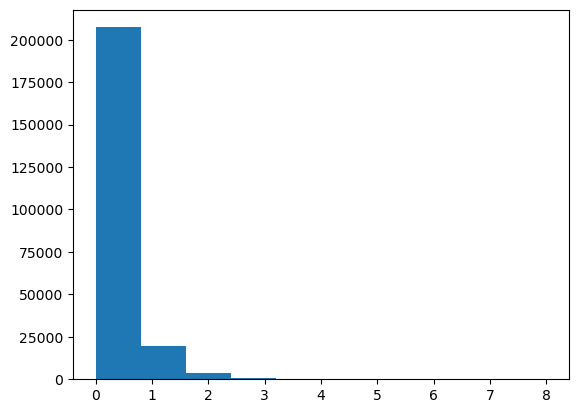

In [53]:
plt.hist(delta_retail[delta_retail!=float('-inf')])

(array([1.84854e+05, 2.72830e+04, 1.49760e+04, 3.45500e+03, 7.89000e+02,
        2.19000e+02, 1.03000e+02, 1.90000e+01, 9.00000e+00, 2.00000e+00]),
 array([0.        , 0.12552725, 0.2510545 , 0.37658175, 0.502109  ,
        0.62763625, 0.7531635 , 0.87869075, 1.004218  , 1.12974525,
        1.25527251]),
 <BarContainer object of 10 artists>)

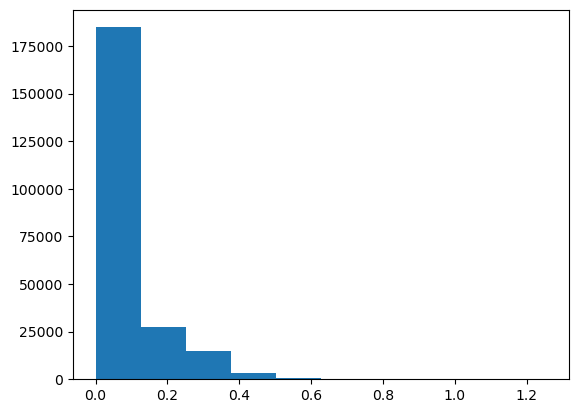

In [54]:
plt.hist(delta_dist)

In [55]:
delta_dist

array([0.        , 0.        , 0.02632894, ..., 0.30103   , 0.12493874,
       0.        ])

In [56]:
np.maximum([1,2,3,4,5,6,7,8,9],5)
np.minimum([1,2,3,4,5,6,7,8,9],5)

array([1, 2, 3, 4, 5, 5, 5, 5, 5])

In [57]:
Palette=sns.color_palette(n_colors = 4)

In [58]:
logC0_ill = logN0_ill

In [59]:
logN0_qtl = np.maximum(np.quantile(logN0[prevalence_or_not==1],[0.005,  0.5, 0.995]), float(-10**16))
logN_pre_qtl = np.maximum(np.quantile(logN_pre[prevalence_or_not==1],[0.005,  0.5, 0.995]), float(-10**16))
logN_heat_qtl = np.maximum(np.quantile(logN_heat[prevalence_or_not==1],[0.005,  0.5, 0.995]), float(-10**16))
logN_dist_qtl = np.maximum(np.quantile(logN_dist[prevalence_or_not==1],[0.005,  0.5, 0.995]), float(-10**16))
logN_retail_qtl = np.maximum(np.quantile(logN_retail[prevalence_or_not==1],[0.005,  0.5, 0.995]), float(-10**16))
logN_domestic_qtl = np.maximum(np.quantile(logN_domestic[prevalence_or_not==1],[0.005,  0.5, 0.995]), float(-10**16))


/opt/anaconda3/envs/pystan/lib/python3.7/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [60]:
logN0_9999 = np.maximum(np.quantile(logN0[prevalence_or_not==1],[0.00005, 0.99995]), float(-10**16))
logN_pre_9999 = np.maximum(np.quantile(logN_pre[prevalence_or_not==1],[0.00005, 0.99995]), float(-10**16))
logN_heat_9999 = np.maximum(np.quantile(logN_heat[prevalence_or_not==1],[0.00005, 0.99995]), float(-10**16))
logN_dist_9999 = np.maximum(np.quantile(logN_dist[prevalence_or_not==1],[0.00005, 0.99995]), float(-10**16))
logN_retail_9999 = np.maximum(np.quantile(logN_retail[prevalence_or_not==1],[0.00005, 0.99995]), float(-10**16))
logN_domestic_9999 = np.maximum(np.quantile(logN_domestic[prevalence_or_not==1],[0.00005, 0.99995]), float(-10**16))


In [61]:
logN0_9999

array([-5.86024577,  3.99798545])

In [62]:
logN_pre_9999

array([-5.69838824,  4.56798728])

In [63]:
logN_heat_9999

array([-474.54592813,    1.81653004])

In [64]:
logN_dist_9999

array([       nan, 1.89763854])

In [65]:
logN_retail_9999

array([       nan, 2.50582475])

In [66]:
logN_domestic_9999

array([       nan, 4.92298831])

In [67]:
logN_dist_qtl = np.nan_to_num(logN_dist_qtl, nan=float(-10**16))
logN_retail_qtl = np.nan_to_num(logN_retail_qtl, nan=float(-10**16))
logN_domestic_qtl = np.nan_to_num(logN_domestic_qtl, nan=float(-10**16))


In [68]:
logN_dist_9999 = np.nan_to_num(logN_dist_9999, nan=float(-10**16))
logN_retail_9999 = np.nan_to_num(logN_retail_9999, nan=float(-10**16))
logN_domestic_9999 = np.nan_to_num(logN_domestic_9999, nan=float(-10**16))


In [69]:
logN_retail_qtl

array([-1.00000000e+16, -1.00000000e+16, -1.36653154e+00])

In [70]:
logN_domestic_qtl

array([-1.00000000e+16, -1.00000000e+16, -1.69411331e-01])

In [71]:
np.median(logN_retail[prevalence_or_not==1])

-inf

In [72]:
np.quantile(logN_dist[prevalence_or_not==1],[0.005,  0.5, 0.995])

array([        nan,         nan, -1.76955108])

In [73]:
Ill_maxs = [np.max(logC0_ill), np.max(logC_pre_ill), np.max(logC_heat_ill), np.max(logC_dist_ill), np.max(logC_retail_ill), np.max(logC_domestic_ill)]
Ill_mins = [np.min(logC0_ill), np.min(logC_pre_ill), np.min(logC_heat_ill), np.min(logC_dist_ill), np.min(logC_retail_ill), np.min(logC_domestic_ill)]

In [74]:
logN0_ill_9999 = np.quantile(logN0_ill,[0.00005, 0.5, 0.99995])
logN0_ill_9999

array([-0.54382578,  2.7987517 ,  3.98968697])

In [75]:
delta_pre_9999 = np.quantile(delta_pre,[0.00005, 0.5, 0.99995])
delta_pre_9999

array([0.        , 0.1303883 , 1.37234955])

In [76]:
delta_heat_9999 = np.quantile(delta_heat,[0.00005, 0.5, 0.99995])
delta_heat_9999

array([-473.88240916,  -20.78255021,   -0.86805845])

In [77]:
delta_dist_9999 = np.quantile(delta_dist,[0.00005, 0.5, 0.99995])
delta_dist_9999

array([0.        , 0.01848341, 0.9869594 ])

In [78]:
delta_dist_9999 = np.quantile(delta_dist,[0.00005, 0.5, 0.99995])
delta_dist_9999

array([0.        , 0.01848341, 0.9869594 ])

In [79]:
delta_domestic_9999 = np.quantile(delta_domestic,[0.00005, 0.5, 0.99995])
delta_domestic_9999

array([0.        , 0.7710894 , 9.63828625])

In [80]:
Deltas_ill = (logN0_ill, delta_pre_ill, delta_heat_ill, delta_dist_ill, delta_retail_ill, delta_domestic_ill)

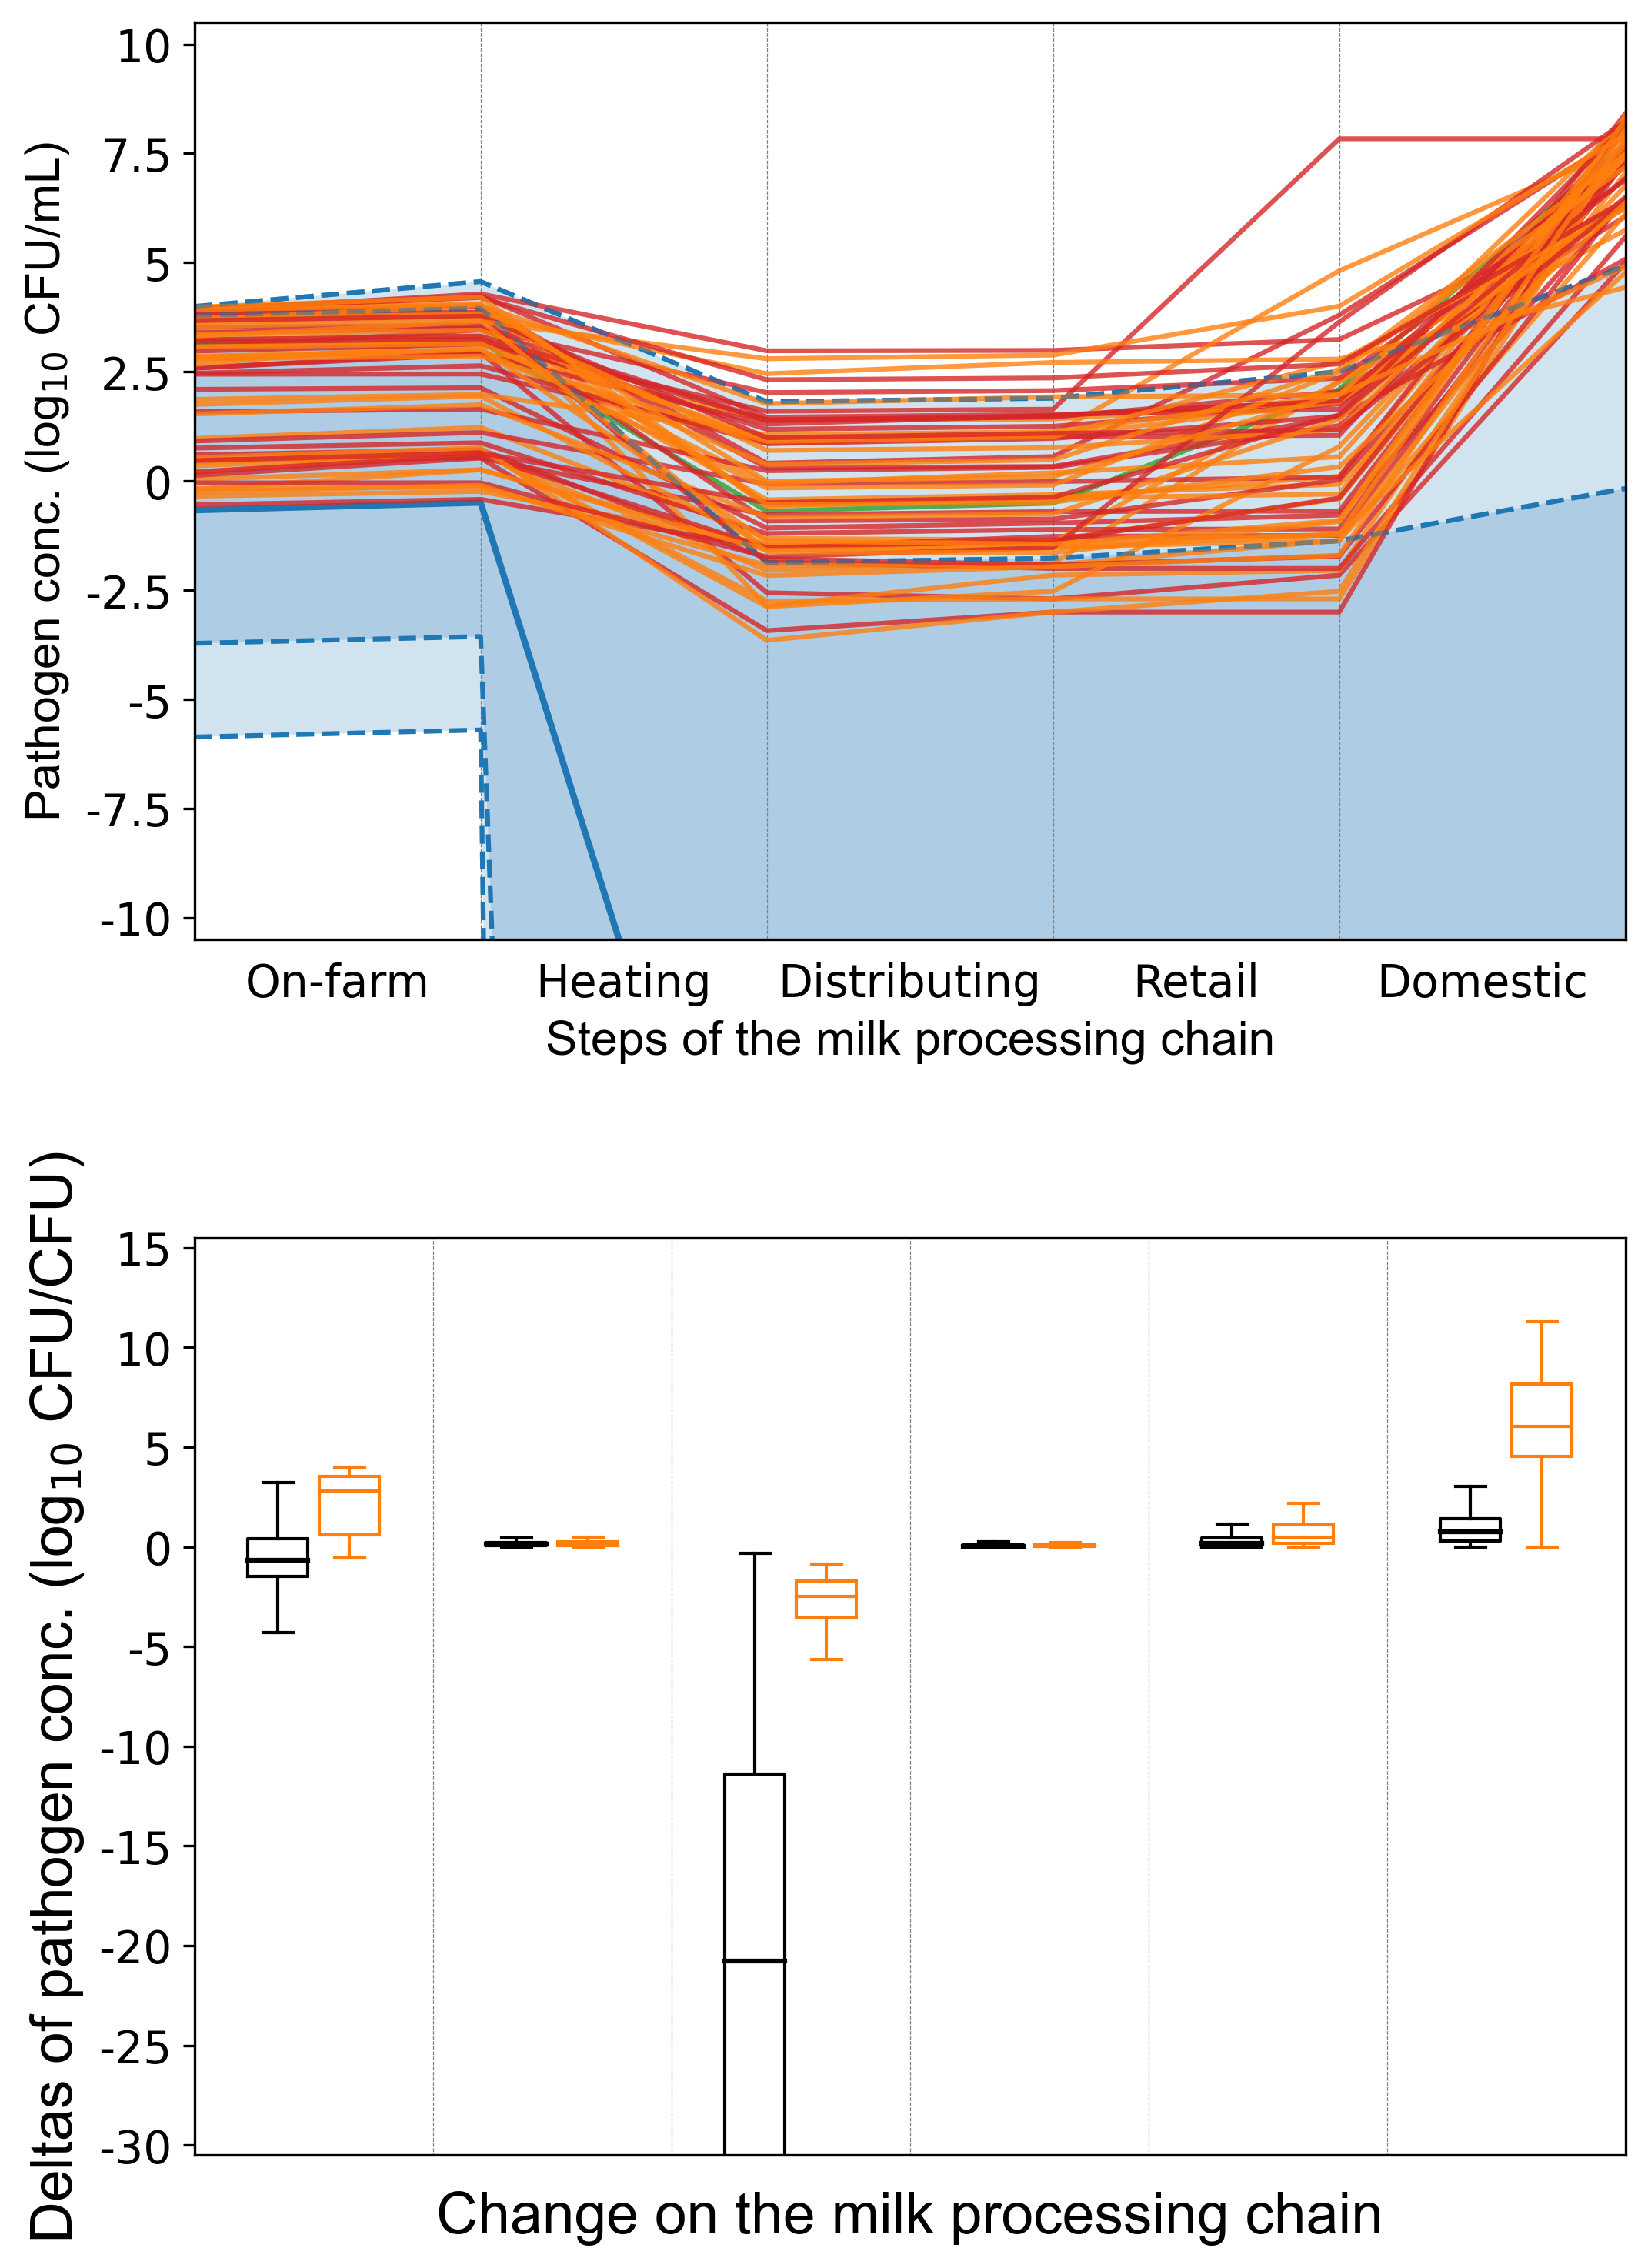

In [81]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 1]},figsize=(8,12), dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.325)
plt.rcParams["font.family"] = "Arial"



ax[0].set_xticks([0.5, 1.5, 2.5, 3.5, 4.5])
ax[0].set_yticks([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10])
ax[0].set_xticklabels(["On-farm",
                       "Heating",
                       "Distributing",
                       "Retail",
                       "Domestic"], size = 14)
ax[0].set_yticklabels([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10], size = 14)
ax[0].tick_params(bottom=False)
ax[0].set_ylim([-10.5,10.5])
ax[0].set_xlim([-0, 5])



ax[0].set_xlabel("Steps of the milk processing chain",size=15,fontname="Arial")
ax[0].set_ylabel("Pathogen conc. (log$_{10}$ CFU/mL)",size=15,fontname="Arial")


for i in range(5):
    ax[0].axvline(x = i, ymin = -100, ymax = 100, color = "gray", lw = 0.3, linestyle='--')

ax[0].fill_between([0,1,2,3,4,5], 
                 [logN0_qtl[0], logN_pre_qtl[0], logN_heat_qtl[0], logN_dist_qtl[0], logN_retail_qtl[0], 
                  logN_domestic_qtl[0]], [logN0_qtl[2], logN_pre_qtl[2], logN_heat_qtl[2], logN_dist_qtl[2],
                                          logN_retail_qtl[2], logN_domestic_qtl[2]], facecolor=Palette[0], 
                 alpha=0.2)

ax[0].fill_between([0,1,2,3,4,5], 
                 [logN0_9999[0], logN_pre_9999[0], logN_heat_9999[0], logN_dist_9999[0], logN_retail_9999[0], 
                  logN_domestic_9999[0]], [logN0_9999[1], logN_pre_9999[1], logN_heat_9999[1], logN_dist_9999[1],
                                          logN_retail_9999[1], logN_domestic_9999[1]], facecolor=Palette[0], 
                 alpha=0.2)

ax[0].plot([0,1,2,3,4,5], 
         [logN0_qtl[0], logN_pre_qtl[0], logN_heat_qtl[0], logN_dist_qtl[0], logN_retail_qtl[0], 
          logN_domestic_qtl[0]], color=Palette[0], linestyle='--')
ax[0].plot([0,1,2,3,4,5], 
         [logN0_qtl[1], logN_pre_qtl[1], logN_heat_qtl[1], logN_dist_qtl[1], logN_retail_qtl[1], 
          logN_domestic_qtl[1]], color=Palette[0], lw=2)
ax[0].plot([0,1,2,3,4,5], 
         [logN0_qtl[2], logN_pre_qtl[2], logN_heat_qtl[2], logN_dist_qtl[2], logN_retail_qtl[2], 
          logN_domestic_qtl[2]], color=Palette[0], linestyle='--')

ax[0].plot([0,1,2,3,4,5], [logN0_9999[1], logN_pre_9999[1], logN_heat_9999[1], logN_dist_9999[1],
                           logN_retail_9999[1], logN_domestic_9999[1]], color=Palette[0], linestyle='--')
ax[0].plot([0,1,2,3,4,5], [logN0_9999[0], logN_pre_9999[0], logN_heat_9999[0], logN_dist_9999[0], logN_retail_9999[0], 
                           logN_domestic_9999[0]], color=Palette[0], linestyle='--')









for i in range(len(logN_heat_ill)):
    if subj_class_ill[i] ==1:
        ax[0].plot([0,1,2,3,4,5], [logN0_ill[i], logN_pre_ill[i], logN_heat_ill[i], logN_dist_ill[i], logN_retail_ill[i], logN_domestic_ill[i]], color=Palette[1], lw = 1.5, alpha=0.8)

    if subj_class_ill[i] ==2:
        ax[0].plot([0,1,2,3,4,5], [logN0_ill[i], logN_pre_ill[i], logN_heat_ill[i], logN_dist_ill[i], logN_retail_ill[i], logN_domestic_ill[i]], color=Palette[2], lw = 1.5, alpha=0.8)

    if subj_class_ill[i] ==3:
        ax[0].plot([0,1,2,3,4,5], [logN0_ill[i], logN_pre_ill[i], logN_heat_ill[i], logN_dist_ill[i], logN_retail_ill[i], logN_domestic_ill[i]], color=Palette[3], lw = 1.5, alpha=0.8)


ax[0].plot([0,1,2,3,4,5], 
         [logN0_qtl[2], logN_pre_qtl[2], logN_heat_qtl[2], logN_dist_qtl[2], logN_retail_qtl[2], 
          logN_domestic_qtl[2]], color=Palette[0], alpha = 0.5, linestyle='--')
ax[0].plot([0,1,2,3,4,5], [logN0_9999[1], logN_pre_9999[1], logN_heat_9999[1], logN_dist_9999[1],
                           logN_retail_9999[1], logN_domestic_9999[1]], color=Palette[0], alpha = 0.5, linestyle='--')




for i in range(5):
    ax[1].axvline(x = i+1.5, ymin = -100, ymax = 100, color = "gray", lw = 0.3, linestyle='--')


ax[1].set_xlim([0.5, 6.5])
ax[1].set_ylim([-30.5, 15.5])
ax[1].set_xticks([1,2,3,4,5,6])
ax[1].set_xticklabels(["Initial\nlevel", 
                       "Growth\non farm", 
                       "Reduction\nby heating", 
                       "Growth on\ndistributing", 
                       "Growth\non retail", 
                       "Growth on\ndomestic"], size = 14)
ax[1].set_yticks([-30, -25, -20, -15, -10, -5, 0, 5, 10, 15])
ax[1].set_yticklabels([-30, -25, -20, -15, -10, -5, 0, 5, 10, 15], size = 14)
ax[1].tick_params(bottom=False)
medi_style = dict(color = 'black', lw = 1.5)
ax[1].boxplot(Deltas, sym = "", medianprops = medi_style, positions=[0.85, 1.85, 2.85, 3.85, 4.85, 5.85], 
              widths = 0.25,
              labels=["", 
                      "", 
                      "", 
                      "", 
                      "",
                      ""])
c = Palette[1]
ax[1].boxplot(Deltas_ill, sym = "", labels=["", 
                                            "", 
                                            "", 
                                            "", 
                                            "", 
                                            ""], 
              patch_artist=True,positions=[1.15, 2.15, 3.15, 4.15, 5.15, 6.15],
              widths = 0.25,
              boxprops=dict(facecolor="white", color=c),
              capprops=dict(color=c),
              whiskerprops=dict(color=c),
              flierprops=dict(color=c, markeredgecolor=c),
              medianprops=dict(color=c))

ax[1].set_xlabel("Change on the milk processing chain", size=18, fontname="Arial")
ax[1].set_ylabel("Deltas of pathogen conc. (log$_{10}$ CFU/CFU)", size=18, fontname="Arial")

plt.show()

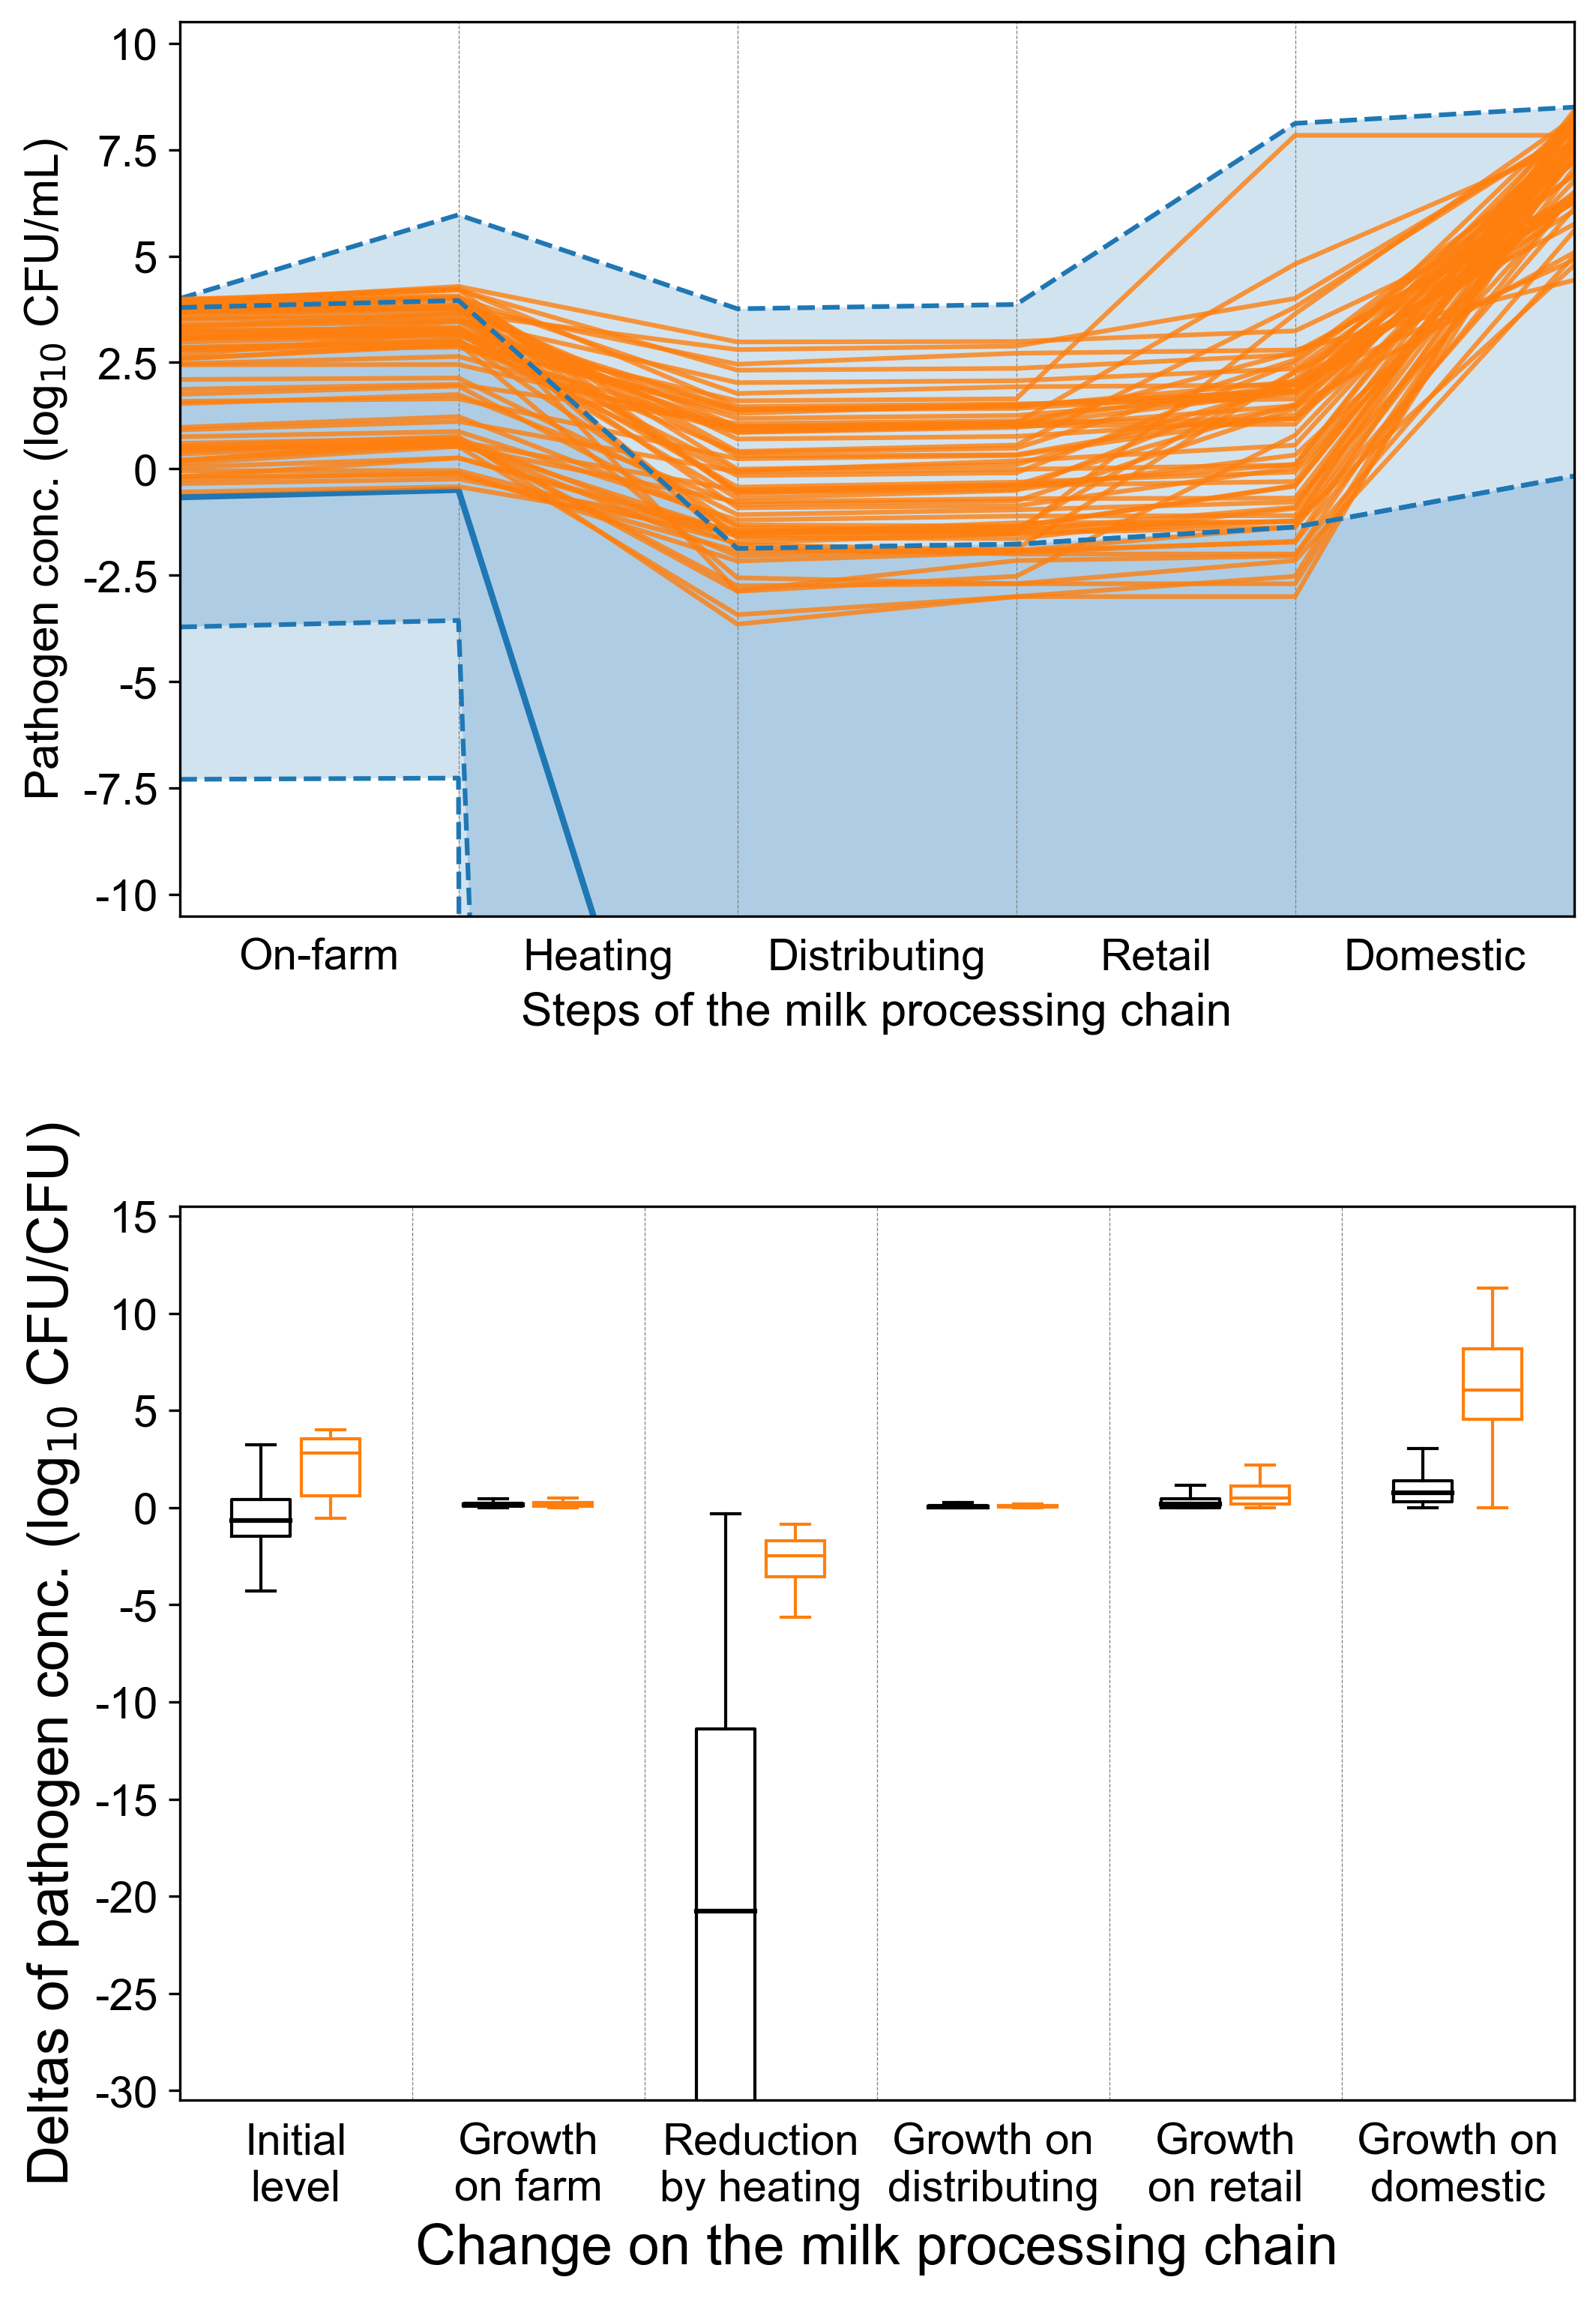

In [87]:

fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 1]},figsize=(8,12), dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.325)
plt.rcParams["font.family"] = "Arial"




ax[0].set_xticks([0.5, 1.5, 2.5, 3.5, 4.5])
ax[0].set_yticks([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10])
ax[0].set_xticklabels(["On-farm",
                       "Heating",
                       "Distributing",
                       "Retail",
                       "Domestic"], size = 14)
ax[0].set_yticklabels([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10], size = 14)
ax[0].tick_params(bottom=False)
ax[0].set_ylim([-10.5,10.5])
ax[0].set_xlim([-0, 5])



ax[0].set_xlabel("Steps of the milk processing chain",size=15,fontname="Arial")
ax[0].set_ylabel("Pathogen conc. (log$_{10}$ CFU/mL)",size=15,fontname="Arial")


for i in range(5):
    ax[0].axvline(x = i, ymin = -100, ymax = 100, color = "gray", lw = 0.3, linestyle='--')

ax[0].fill_between([0,1,2,3,4,5], 
                 [logN0_qtl[0], logN_pre_qtl[0], logN_heat_qtl[0], logN_dist_qtl[0], logN_retail_qtl[0], 
                  logN_domestic_qtl[0]], [logN0_qtl[2], logN_pre_qtl[2], logN_heat_qtl[2], logN_dist_qtl[2],
                                          logN_retail_qtl[2], logN_domestic_qtl[2]], facecolor=Palette[0], 
                 alpha=0.2)

ax[0].fill_between([0,1,2,3,4,5], logC_mins, logC_maxs, 
                 facecolor=Palette[0], 
                 alpha=0.2)

ax[0].plot([0,1,2,3,4,5], 
         [logN0_qtl[0], logN_pre_qtl[0], logN_heat_qtl[0], logN_dist_qtl[0], logN_retail_qtl[0], 
          logN_domestic_qtl[0]], color=Palette[0], linestyle='--')
ax[0].plot([0,1,2,3,4,5], 
         [logN0_qtl[1], logN_pre_qtl[1], logN_heat_qtl[1], logN_dist_qtl[1], logN_retail_qtl[1], 
          logN_domestic_qtl[1]], color=Palette[0], lw=2)
ax[0].plot([0,1,2,3,4,5], 
         [logN0_qtl[2], logN_pre_qtl[2], logN_heat_qtl[2], logN_dist_qtl[2], logN_retail_qtl[2], 
          logN_domestic_qtl[2]], color=Palette[0], linestyle='--')

ax[0].plot([0,1,2,3,4,5], logC_maxs, color=Palette[0], linestyle='--')
ax[0].plot([0,1,2,3,4,5], logC_mins, color=Palette[0], linestyle='--')









for i in range(len(logN_heat_ill)):
    if subj_class_ill[i] ==1:
        ax[0].plot([0,1,2,3,4,5], [logN0_ill[i], logN_pre_ill[i], logN_heat_ill[i], logN_dist_ill[i], logN_retail_ill[i], logN_domestic_ill[i]], color=Palette[1], lw = 1.5, alpha=0.8)

    if subj_class_ill[i] ==2:
        ax[0].plot([0,1,2,3,4,5], [logN0_ill[i], logN_pre_ill[i], logN_heat_ill[i], logN_dist_ill[i], logN_retail_ill[i], logN_domestic_ill[i]], color=Palette[1], lw = 1.5, alpha=0.8)

    if subj_class_ill[i] ==3:
        ax[0].plot([0,1,2,3,4,5], [logN0_ill[i], logN_pre_ill[i], logN_heat_ill[i], logN_dist_ill[i], logN_retail_ill[i], logN_domestic_ill[i]], color=Palette[1], lw = 1.5, alpha=0.8)


ax[0].plot([0,1,2,3,4,5], 
         [logN0_qtl[2], logN_pre_qtl[2], logN_heat_qtl[2], logN_dist_qtl[2], logN_retail_qtl[2], 
          logN_domestic_qtl[2]], color=Palette[0], alpha = 1, linestyle='--')




for i in range(5):
    ax[1].axvline(x = i+1.5, ymin = -100, ymax = 100, color = "gray", lw = 0.3, linestyle='--')


ax[1].set_xlim([0.5, 6.5])
ax[1].set_ylim([-30.5, 15.5])
ax[1].set_xticks([1,2,3,4,5,6])
ax[1].set_xticklabels(["Initial\nlevel", 
                       "Growth\non farm", 
                       "Reduction\nby heating", 
                       "Growth on\ndistributing", 
                       "Growth\non retail", 
                       "Growth on\ndomestic"], size = 14)
ax[1].set_yticks([-30, -25, -20, -15, -10, -5, 0, 5, 10, 15])
ax[1].set_yticklabels([-30, -25, -20, -15, -10, -5, 0, 5, 10, 15], size = 14)
ax[1].tick_params(bottom=False)
medi_style = dict(color = 'black', lw = 1.5)
ax[1].boxplot(Deltas, sym = "", medianprops = medi_style, positions=[0.85, 1.85, 2.85, 3.85, 4.85, 5.85], 
              widths = 0.25,
              labels=["Initial\nlevel", 
                      "Growth\non farm", 
                      "Reduction\nby heating", 
                      "Growth on\ndistributing", 
                      "Growth\non retail",
                      "Growth on\ndomestic"])
c = Palette[1]
ax[1].boxplot(Deltas_ill, sym = "", labels=["", 
                                            "", 
                                            "", 
                                            "", 
                                            "", 
                                            ""], 
              patch_artist=True,positions=[1.15, 2.15, 3.15, 4.15, 5.15, 6.15],
              widths = 0.25,
              boxprops=dict(facecolor="white", color=c),
              capprops=dict(color=c),
              whiskerprops=dict(color=c),
              flierprops=dict(color=c, markeredgecolor=c),
              medianprops=dict(color=c))

ax[1].set_xlabel("Change on the milk processing chain", size=18, fontname="Arial")
ax[1].set_ylabel("Deltas of pathogen conc. (log$_{10}$ CFU/CFU)", size=18, fontname="Arial")

plt.savefig("Fig. 1.pdf", bbox_inches="tight")
plt.show()

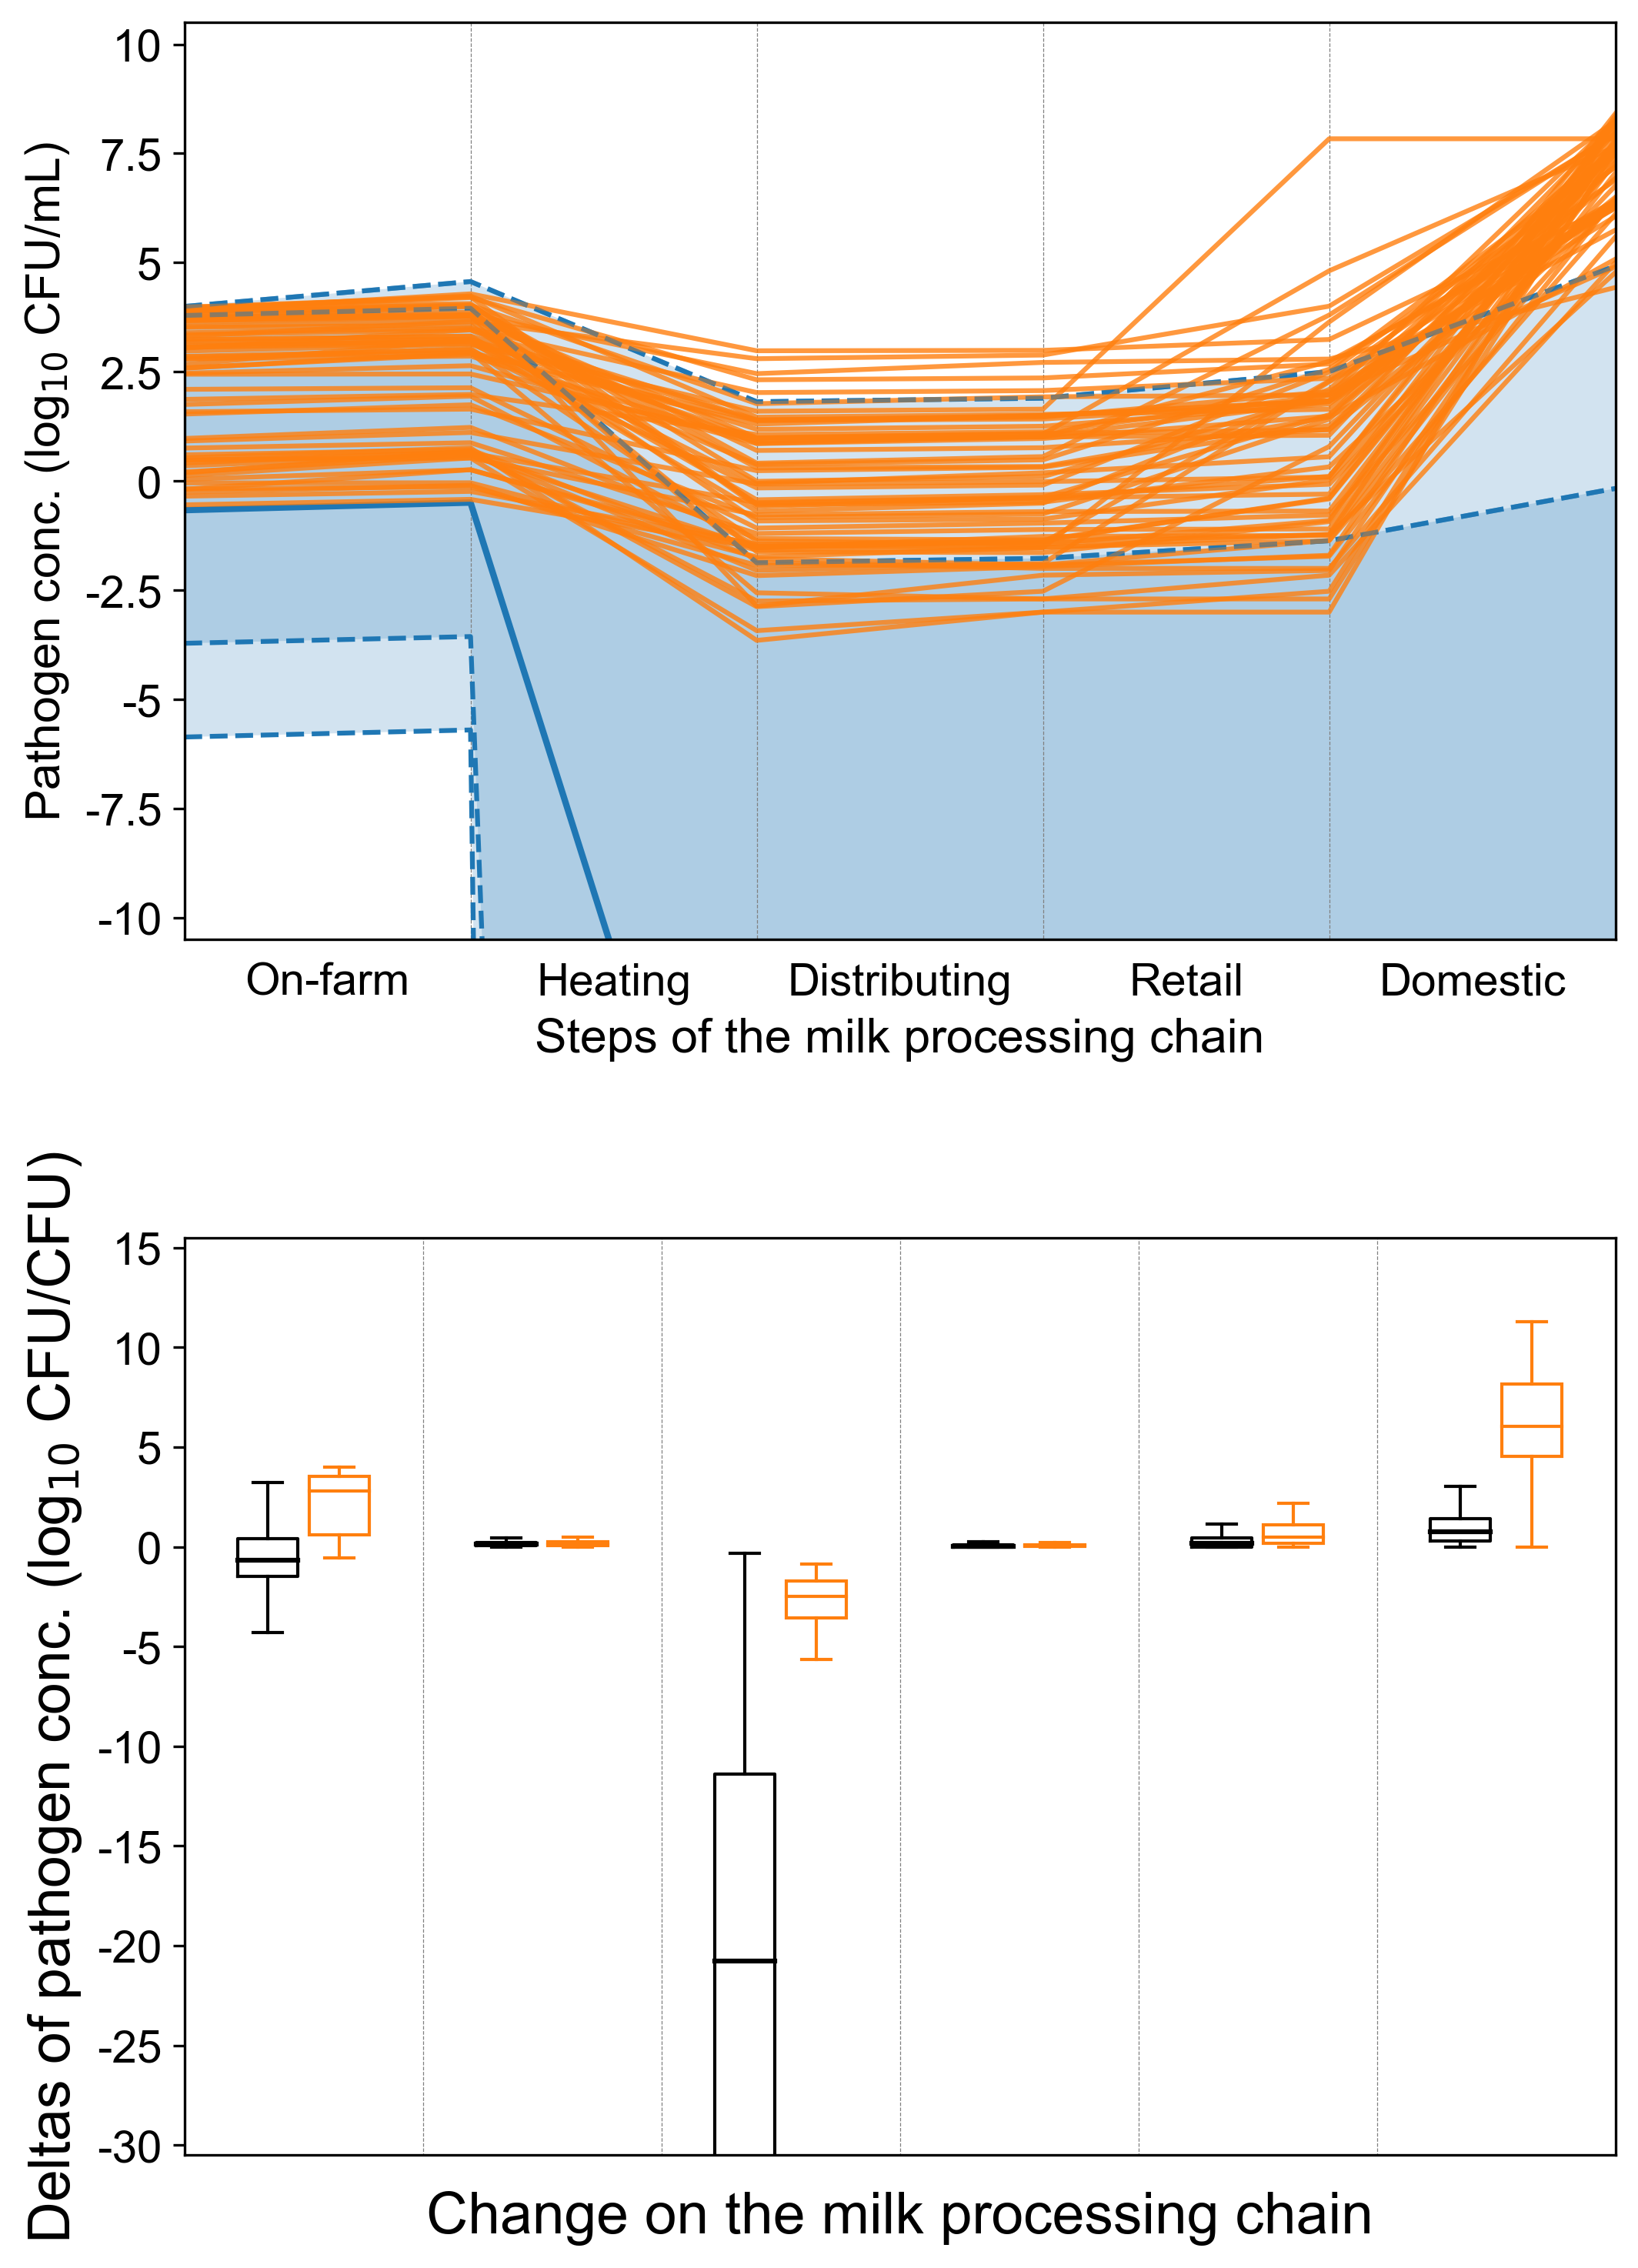

In [83]:

fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 1]},figsize=(8,12), dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.325)
plt.rcParams["font.family"] = "Arial"




ax[0].set_xticks([0.5, 1.5, 2.5, 3.5, 4.5])
ax[0].set_yticks([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10])
ax[0].set_xticklabels(["On-farm",
                       "Heating",
                       "Distributing",
                       "Retail",
                       "Domestic"], size = 14)
ax[0].set_yticklabels([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10], size = 14)
ax[0].tick_params(bottom=False)
ax[0].set_ylim([-10.5,10.5])
ax[0].set_xlim([-0, 5])



ax[0].set_xlabel("Steps of the milk processing chain",size=15,fontname="Arial")
ax[0].set_ylabel("Pathogen conc. (log$_{10}$ CFU/mL)",size=15,fontname="Arial")


for i in range(5):
    ax[0].axvline(x = i, ymin = -100, ymax = 100, color = "gray", lw = 0.3, linestyle='--')

ax[0].fill_between([0,1,2,3,4,5], 
                 [logN0_qtl[0], logN_pre_qtl[0], logN_heat_qtl[0], logN_dist_qtl[0], logN_retail_qtl[0], 
                  logN_domestic_qtl[0]], [logN0_qtl[2], logN_pre_qtl[2], logN_heat_qtl[2], logN_dist_qtl[2],
                                          logN_retail_qtl[2], logN_domestic_qtl[2]], facecolor=Palette[0], 
                 alpha=0.2)

ax[0].fill_between([0,1,2,3,4,5], 
                 [logN0_9999[0], logN_pre_9999[0], logN_heat_9999[0], logN_dist_9999[0], logN_retail_9999[0], 
                  logN_domestic_9999[0]], [logN0_9999[1], logN_pre_9999[1], logN_heat_9999[1], logN_dist_9999[1],
                                          logN_retail_9999[1], logN_domestic_9999[1]], facecolor=Palette[0], 
                 alpha=0.2)

ax[0].plot([0,1,2,3,4,5], 
         [logN0_qtl[0], logN_pre_qtl[0], logN_heat_qtl[0], logN_dist_qtl[0], logN_retail_qtl[0], 
          logN_domestic_qtl[0]], color=Palette[0], linestyle='--')
ax[0].plot([0,1,2,3,4,5], 
         [logN0_qtl[1], logN_pre_qtl[1], logN_heat_qtl[1], logN_dist_qtl[1], logN_retail_qtl[1], 
          logN_domestic_qtl[1]], color=Palette[0], lw=2)
ax[0].plot([0,1,2,3,4,5], 
         [logN0_qtl[2], logN_pre_qtl[2], logN_heat_qtl[2], logN_dist_qtl[2], logN_retail_qtl[2], 
          logN_domestic_qtl[2]], color=Palette[0], linestyle='--')

ax[0].plot([0,1,2,3,4,5], [logN0_9999[1], logN_pre_9999[1], logN_heat_9999[1], logN_dist_9999[1],
                           logN_retail_9999[1], logN_domestic_9999[1]], color=Palette[0], linestyle='--')
ax[0].plot([0,1,2,3,4,5], [logN0_9999[0], logN_pre_9999[0], logN_heat_9999[0], logN_dist_9999[0], logN_retail_9999[0], 
                           logN_domestic_9999[0]], color=Palette[0], linestyle='--')








for i in range(len(logN_heat_ill)):
    if subj_class_ill[i] ==1:
        ax[0].plot([0,1,2,3,4,5], [logN0_ill[i], logN_pre_ill[i], logN_heat_ill[i], logN_dist_ill[i], logN_retail_ill[i], logN_domestic_ill[i]], color=Palette[1], lw = 1.5, alpha=0.8)

    if subj_class_ill[i] ==2:
        ax[0].plot([0,1,2,3,4,5], [logN0_ill[i], logN_pre_ill[i], logN_heat_ill[i], logN_dist_ill[i], logN_retail_ill[i], logN_domestic_ill[i]], color=Palette[1], lw = 1.5, alpha=0.8)

    if subj_class_ill[i] ==3:
        ax[0].plot([0,1,2,3,4,5], [logN0_ill[i], logN_pre_ill[i], logN_heat_ill[i], logN_dist_ill[i], logN_retail_ill[i], logN_domestic_ill[i]], color=Palette[1], lw = 1.5, alpha=0.8)


ax[0].plot([0,1,2,3,4,5], 
         [logN0_qtl[2], logN_pre_qtl[2], logN_heat_qtl[2], logN_dist_qtl[2], logN_retail_qtl[2], 
          logN_domestic_qtl[2]], color=Palette[0], alpha = 0.5, linestyle='--')
ax[0].plot([0,1,2,3,4,5], [logN0_9999[1], logN_pre_9999[1], logN_heat_9999[1], logN_dist_9999[1],
                           logN_retail_9999[1], logN_domestic_9999[1]], color=Palette[0], alpha = 0.5, linestyle='--')





for i in range(5):
    ax[1].axvline(x = i+1.5, ymin = -100, ymax = 100, color = "gray", lw = 0.3, linestyle='--')


ax[1].set_xlim([0.5, 6.5])
ax[1].set_ylim([-30.5, 15.5])
ax[1].set_xticks([1,2,3,4,5,6])
ax[1].set_xticklabels(["Initial\nlevel", 
                       "Growth\non farm", 
                       "Reduction\nby heating", 
                       "Growth on\ndistributing", 
                       "Growth\non retail", 
                       "Growth on\ndomestic"], size = 14)
ax[1].set_yticks([-30, -25, -20, -15, -10, -5, 0, 5, 10, 15])
ax[1].set_yticklabels([-30, -25, -20, -15, -10, -5, 0, 5, 10, 15], size = 14)
ax[1].tick_params(bottom=False)
medi_style = dict(color = 'black', lw = 1.5)
ax[1].boxplot(Deltas, sym = "", medianprops = medi_style, positions=[0.85, 1.85, 2.85, 3.85, 4.85, 5.85], 
              widths = 0.25,
              labels=["", 
                      "", 
                      "", 
                      "", 
                      "",
                      ""])
c = Palette[1]
ax[1].boxplot(Deltas_ill, sym = "", labels=["", 
                                            "", 
                                            "", 
                                            "", 
                                            "", 
                                            ""], 
              patch_artist=True,positions=[1.15, 2.15, 3.15, 4.15, 5.15, 6.15],
              widths = 0.25,
              boxprops=dict(facecolor="white", color=c),
              capprops=dict(color=c),
              whiskerprops=dict(color=c),
              flierprops=dict(color=c, markeredgecolor=c),
              medianprops=dict(color=c))

ax[1].set_xlabel("Change on the milk processing chain", size=18, fontname="Arial")
ax[1].set_ylabel("Deltas of pathogen conc. (log$_{10}$ CFU/CFU)", size=18, fontname="Arial")

plt.savefig("Fig. 1(0.9999).pdf", bbox_inches="tight")
plt.show()

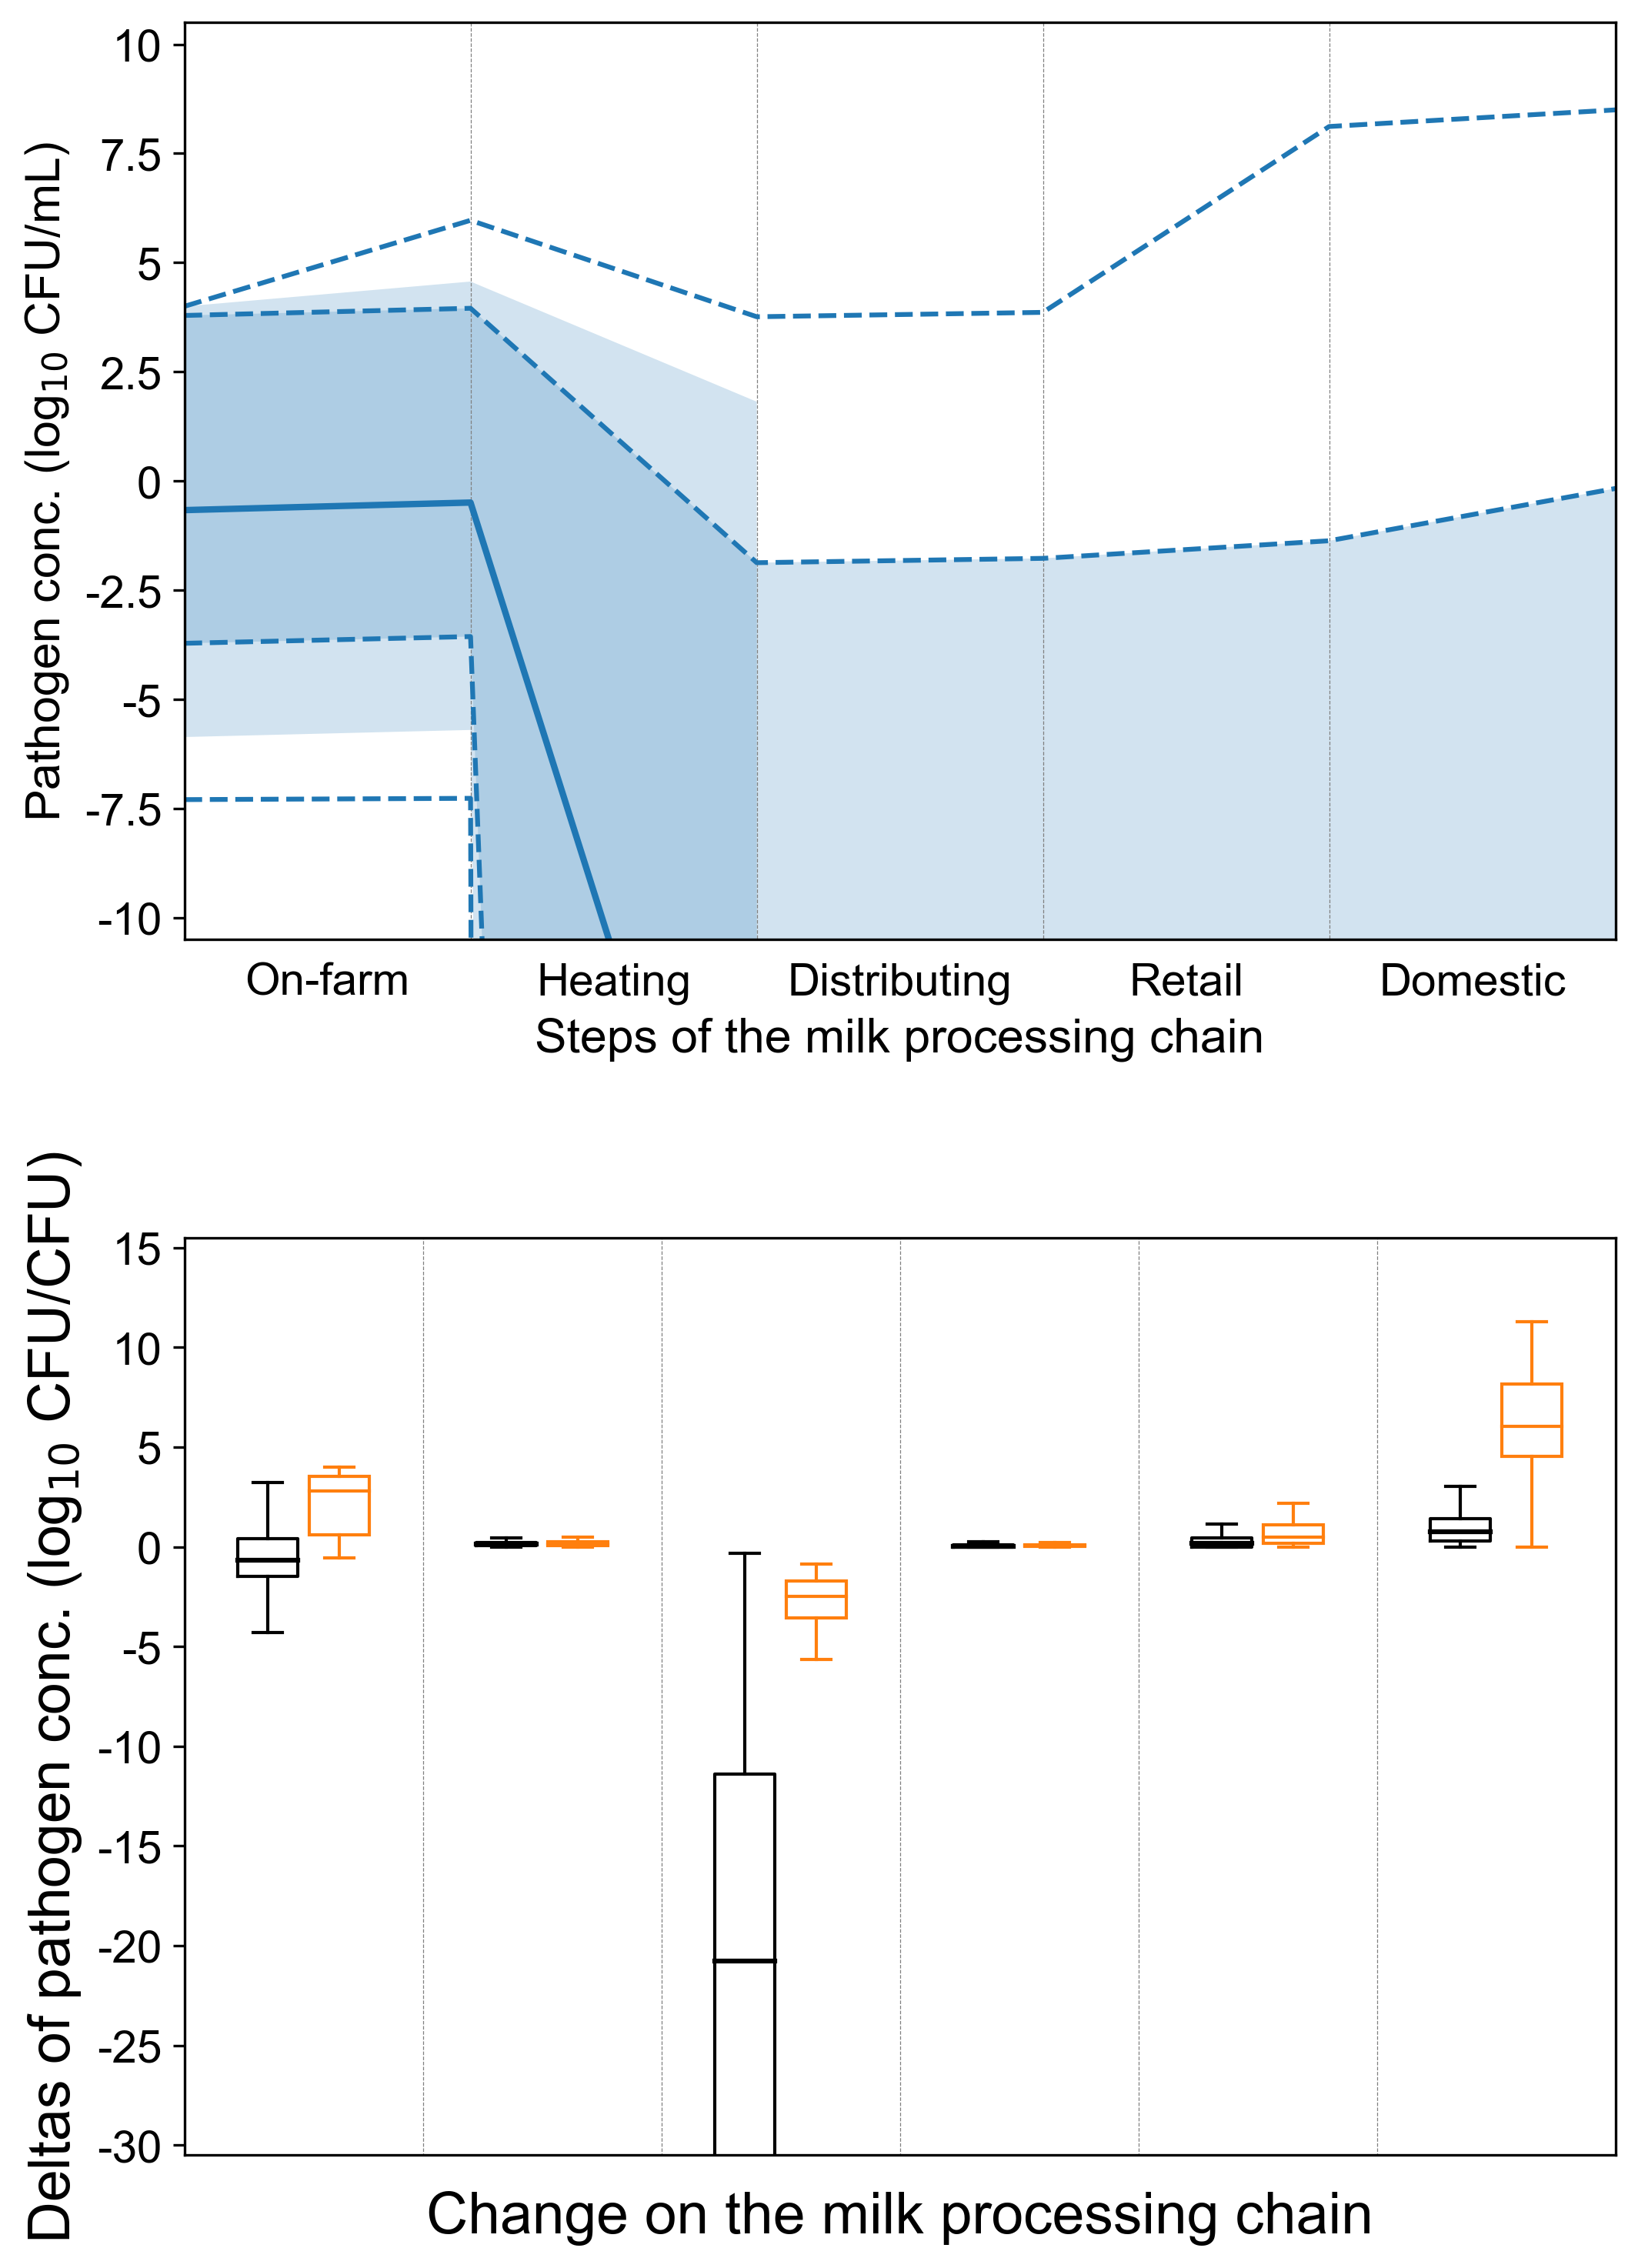

In [78]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 1]},figsize=(8,12), dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.325)
plt.rcParams["font.family"] = "Arial"



ax[0].set_xticks([0.5, 1.5, 2.5, 3.5, 4.5])
ax[0].set_yticks([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10])
ax[0].set_xticklabels(["On-farm",
                       "Heating",
                       "Distributing",
                       "Retail",
                       "Domestic"], size = 14)
ax[0].set_yticklabels([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10], size = 14)
ax[0].tick_params(bottom=False)
ax[0].set_ylim([-10.5,10.5])
ax[0].set_xlim([-0, 5])



ax[0].set_xlabel("Steps of the milk processing chain",size=15,fontname="Arial")
ax[0].set_ylabel("Pathogen conc. (log$_{10}$ CFU/mL)",size=15,fontname="Arial")


for i in range(5):
    ax[0].axvline(x = i, ymin = -100, ymax = 100, color = "gray", lw = 0.3, linestyle='--')

ax[0].fill_between([0,1,2,3,4,5], 
                 [logN0_qtl[0], logN_pre_qtl[0], logN_heat_qtl[0], logN_dist_qtl[0], logN_retail_qtl[0], 
                  logN_domestic_qtl[0]], [logN0_qtl[2], logN_pre_qtl[2], logN_heat_qtl[2], logN_dist_qtl[2],
                                          logN_retail_qtl[2], logN_domestic_qtl[2]], facecolor=Palette[0], 
                 alpha=0.2)

ax[0].fill_between([0,1,2,3,4,5], 
                 [logN0_9999[0], logN_pre_9999[0], logN_heat_9999[0], logN_dist_9999[0], logN_retail_9999[0], 
                  logN_domestic_9999[0]], [logN0_9999[1], logN_pre_9999[1], logN_heat_9999[1], logN_dist_9999[1],
                                          logN_retail_9999[1], logN_domestic_9999[1]], facecolor=Palette[0], 
                 alpha=0.2)

ax[0].plot([0,1,2,3,4,5], 
         [logN0_qtl[0], logN_pre_qtl[0], logN_heat_qtl[0], logN_dist_qtl[0], logN_retail_qtl[0], 
          logN_domestic_qtl[0]], color=Palette[0], linestyle='--')
ax[0].plot([0,1,2,3,4,5], 
         [logN0_qtl[1], logN_pre_qtl[1], logN_heat_qtl[1], logN_dist_qtl[1], logN_retail_qtl[1], 
          logN_domestic_qtl[1]], color=Palette[0], lw=2)
ax[0].plot([0,1,2,3,4,5], 
         [logN0_qtl[2], logN_pre_qtl[2], logN_heat_qtl[2], logN_dist_qtl[2], logN_retail_qtl[2], 
          logN_domestic_qtl[2]], color=Palette[0], linestyle='--')

ax[0].plot([0,1,2,3,4,5], logC_maxs, color=Palette[0], linestyle='--')
ax[0].plot([0,1,2,3,4,5], logC_mins, color=Palette[0], linestyle='--')












for i in range(5):
    ax[1].axvline(x = i+1.5, ymin = -100, ymax = 100, color = "gray", lw = 0.3, linestyle='--')


ax[1].set_xlim([0.5, 6.5])
ax[1].set_ylim([-30.5, 15.5])
ax[1].set_xticks([1,2,3,4,5,6])
ax[1].set_xticklabels(["Initial\nlevel", 
                       "Growth\non farm", 
                       "Reduction\nby heating", 
                       "Growth on\ndistributing", 
                       "Growth\non retail", 
                       "Growth on\ndomestic"], size = 14)
ax[1].set_yticks([-30, -25, -20, -15, -10, -5, 0, 5, 10, 15])
ax[1].set_yticklabels([-30, -25, -20, -15, -10, -5, 0, 5, 10, 15], size = 14)
ax[1].tick_params(bottom=False)
medi_style = dict(color = 'black', lw = 1.5)
ax[1].boxplot(Deltas, sym = "", medianprops = medi_style, positions=[0.85, 1.85, 2.85, 3.85, 4.85, 5.85], 
              widths = 0.25,
              labels=["", 
                      "", 
                      "", 
                      "", 
                      "",
                      ""])
c = Palette[1]
ax[1].boxplot(Deltas_ill, sym = "", labels=["", 
                                            "", 
                                            "", 
                                            "", 
                                            "", 
                                            ""], 
              patch_artist=True,positions=[1.15, 2.15, 3.15, 4.15, 5.15, 6.15],
              widths = 0.25,
              boxprops=dict(facecolor="white", color=c),
              capprops=dict(color=c),
              whiskerprops=dict(color=c),
              flierprops=dict(color=c, markeredgecolor=c),
              medianprops=dict(color=c))

ax[1].set_xlabel("Change on the milk processing chain", size=18, fontname="Arial")
ax[1].set_ylabel("Deltas of pathogen conc. (log$_{10}$ CFU/CFU)", size=18, fontname="Arial")
plt.savefig("Fig. 1b (0.9999).pdf", bbox_inches="tight")
plt.show()

In [79]:
np.sum(np.min(logN_dist[prevalence_or_not==1]))

-inf

In [80]:
[logN0_qtl[0], logN_pre_qtl[0], logN_heat_qtl[0], logN_dist_qtl[0], logN_retail_qtl[0], 
                  logN_domestic_qtl[0]]

[-3.7144378306281656,
 -3.560098295679861,
 -175.2724077969801,
 -1e+16,
 -1e+16,
 -1e+16]

In [81]:
logC_mins

array([-7.29302028e+00, -7.26366583e+00, -1.92331009e+03, -1.00000000e+16,
       -1.00000000e+16, -1.00000000e+16])

In [82]:
logC_maxs

array([3.99999986, 5.96975118, 3.76186153, 3.86247051, 8.11731124,
       8.49800165])

In [83]:
np.max(logN0[prevalence_or_not==1] )

3.9999973729731657

In [84]:
np.min(logN0[prevalence_or_not==1] )

-7.29200256136561

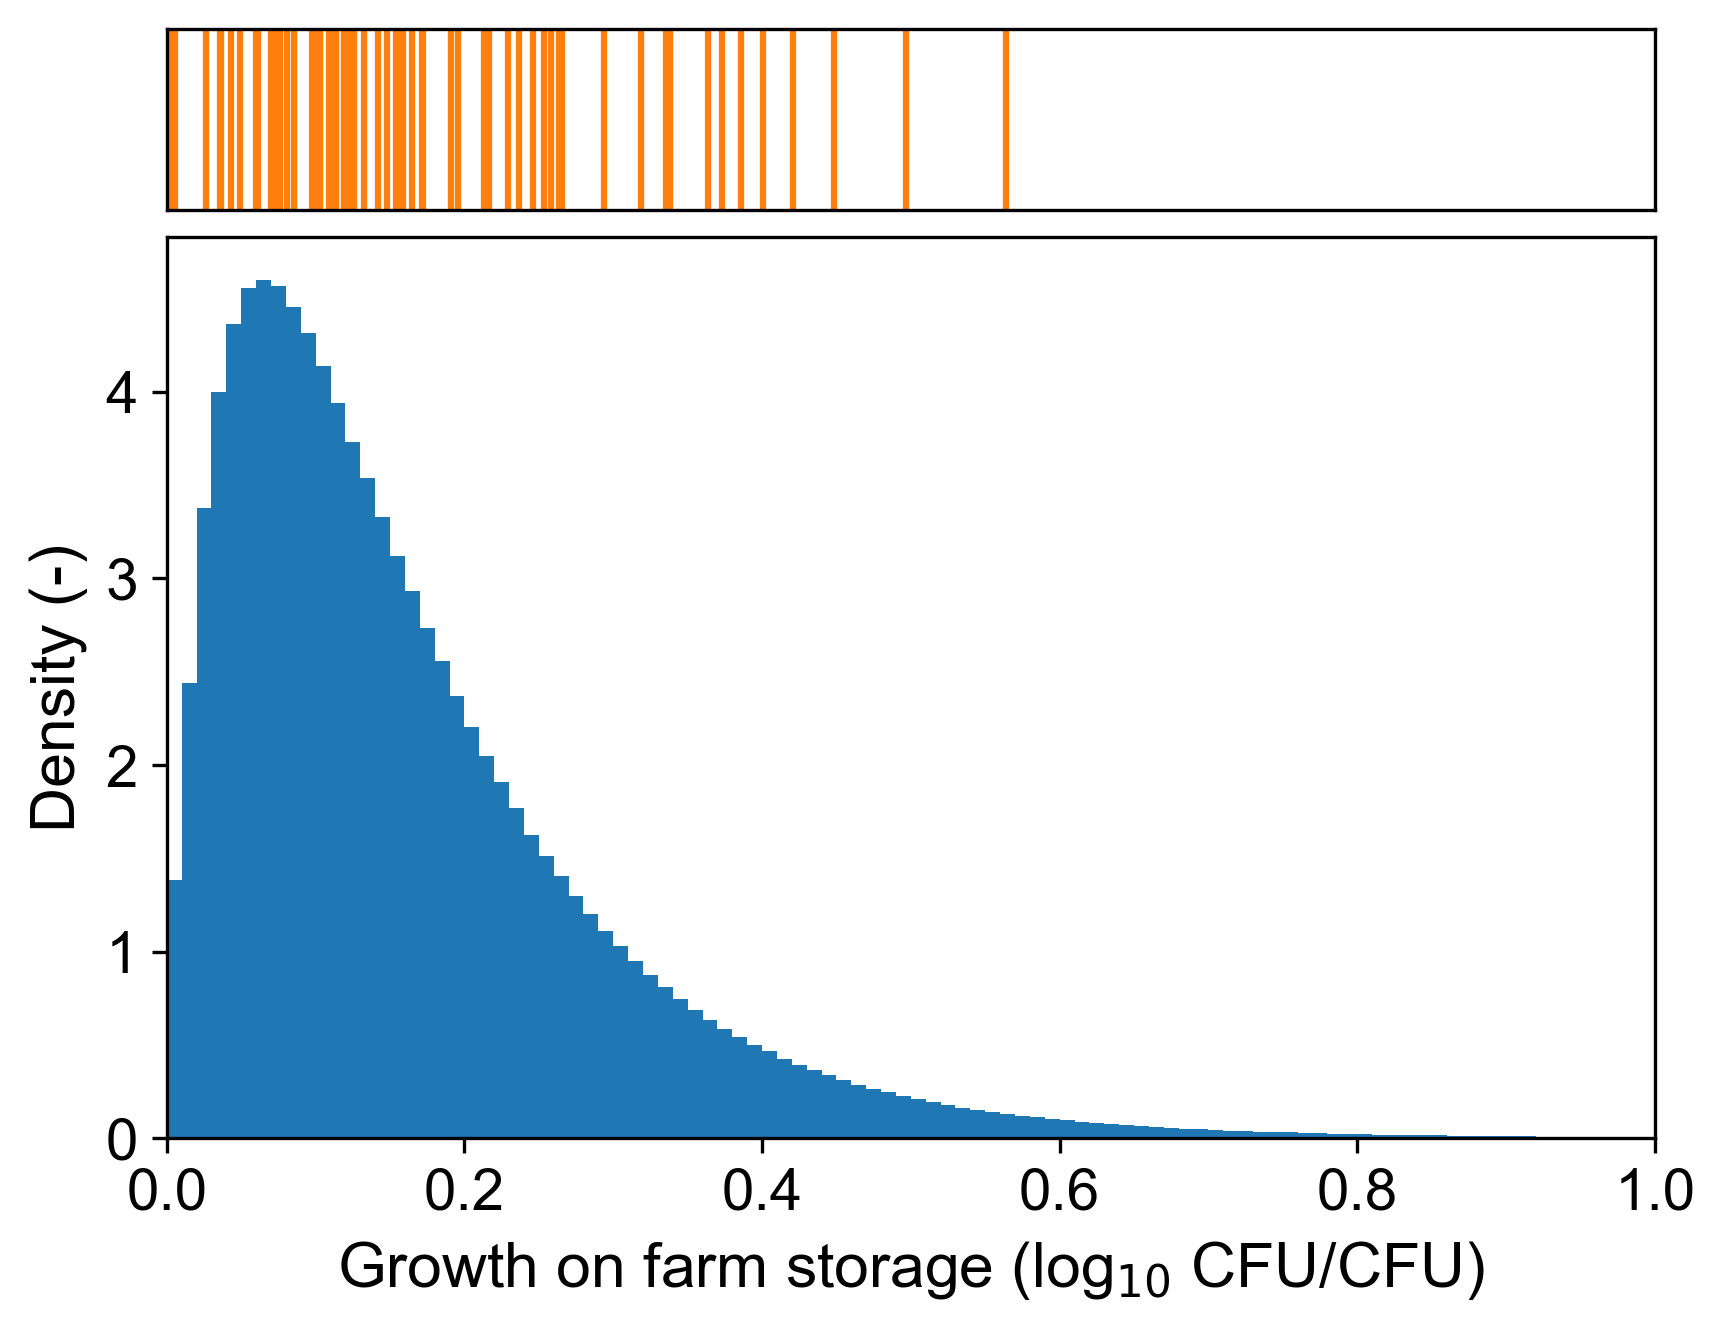

In [85]:


fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["xtick.major.size"] = 3.5
plt.rcParams["ytick.major.size"] = 3.5
plt.rcParams["xtick.minor.size"] = 3.5
plt.rcParams["ytick.minor.size"] = 3.5    


plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-0, 1])
ax[1].set_xlim([-0, 1])
for i in range(len(delta_pre_ill)):
    ax[0].axvline(x = delta_pre_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(delta_pre, density="TRUE", range = (0, 2), bins = 200)
ax[1].set_xlabel("Growth on farm storage (log$_{10}$ CFU/CFU)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")
plt.savefig("Fig. 3b.pdf", bbox_inches="tight")
plt.show()

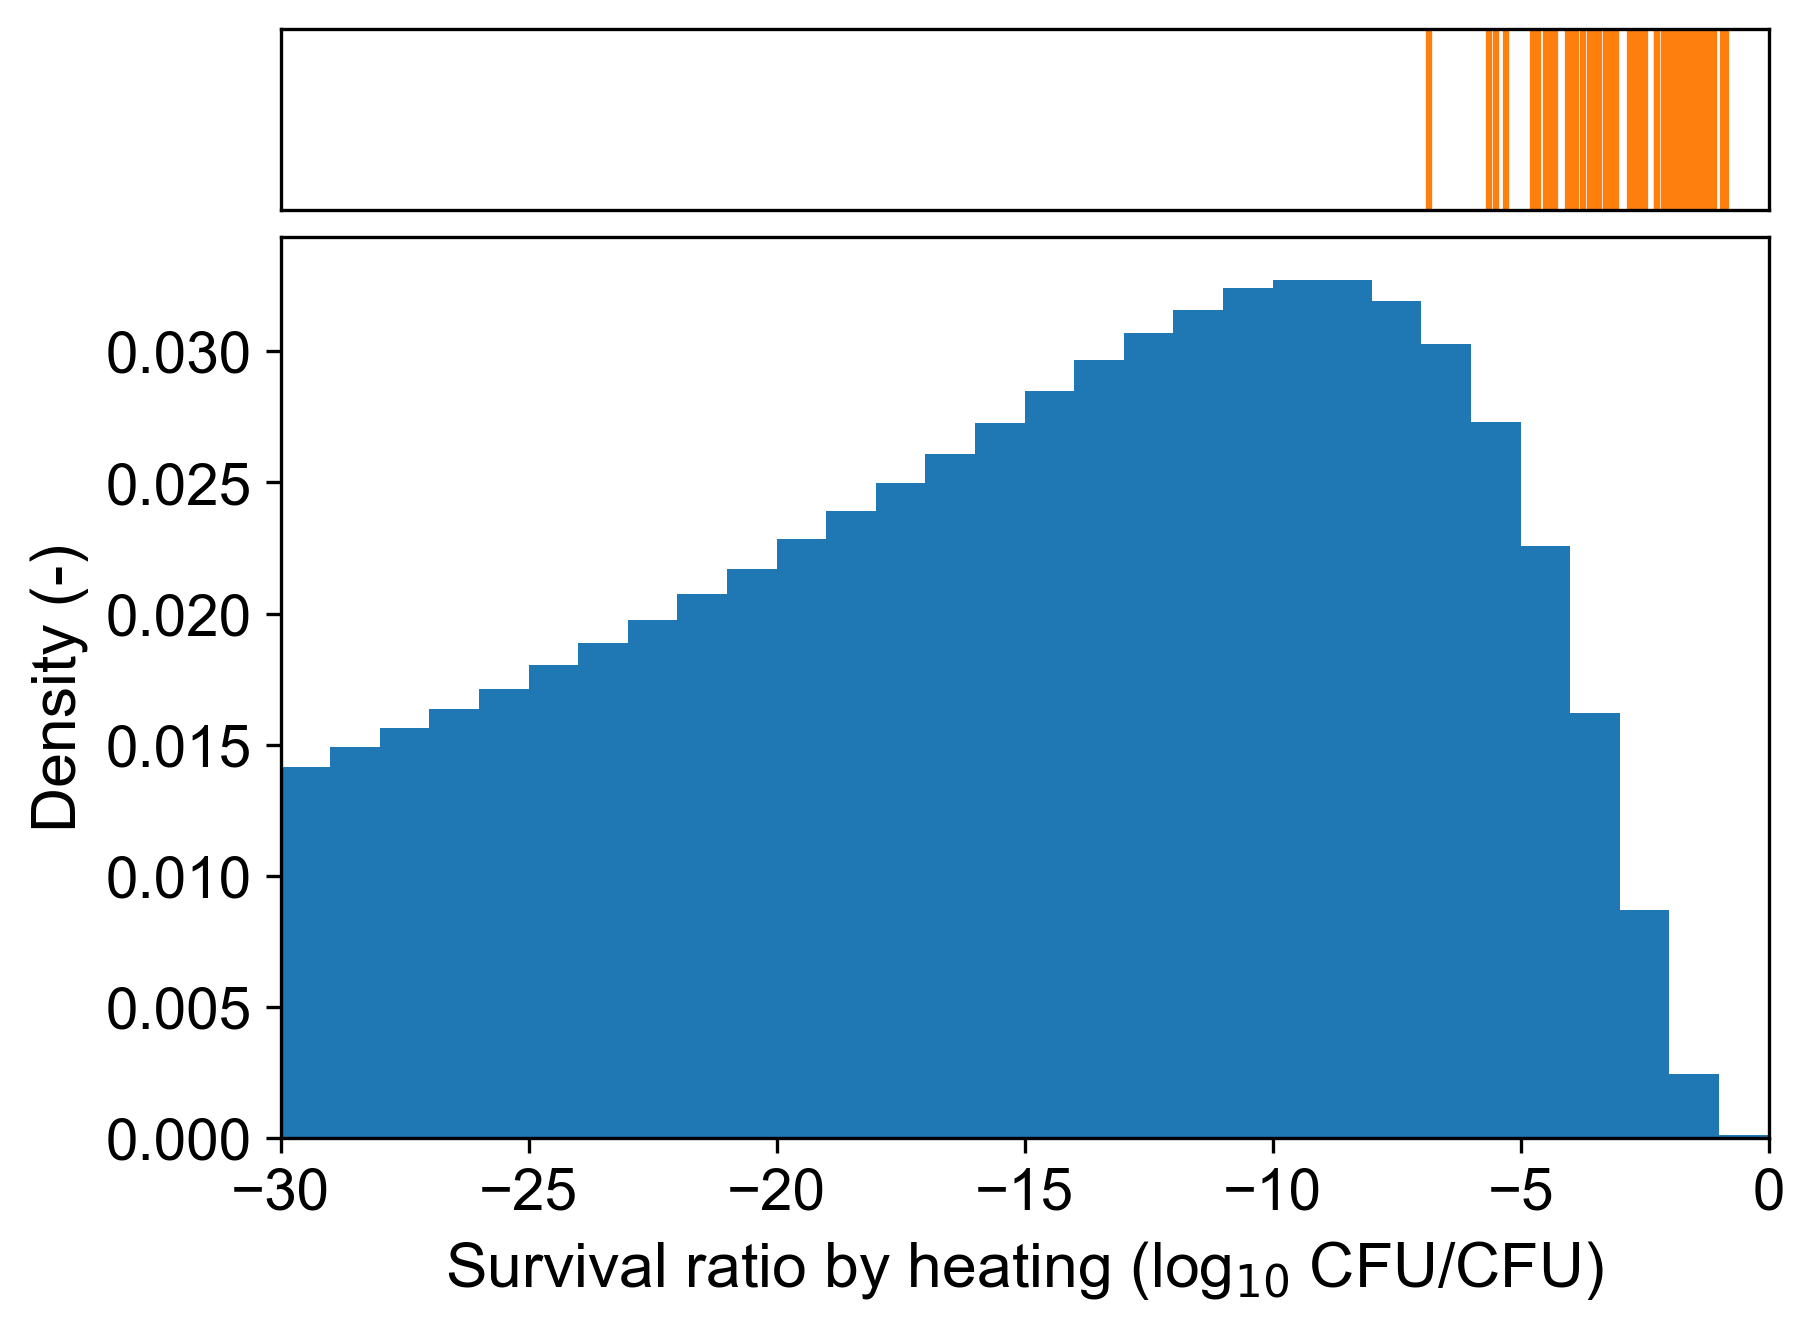

In [86]:

fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-30, 0])
ax[1].set_xlim([-30, 0])
for i in range(len(delta_heat_ill)):
    ax[0].axvline(x = delta_heat_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(delta_heat, density="TRUE", range = (-800, 0), bins = 800)
ax[1].set_xlabel("Survival ratio by heating (log$_{10}$ CFU/CFU)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")
plt.savefig("Fig. 3c.pdf", bbox_inches="tight")

plt.show()

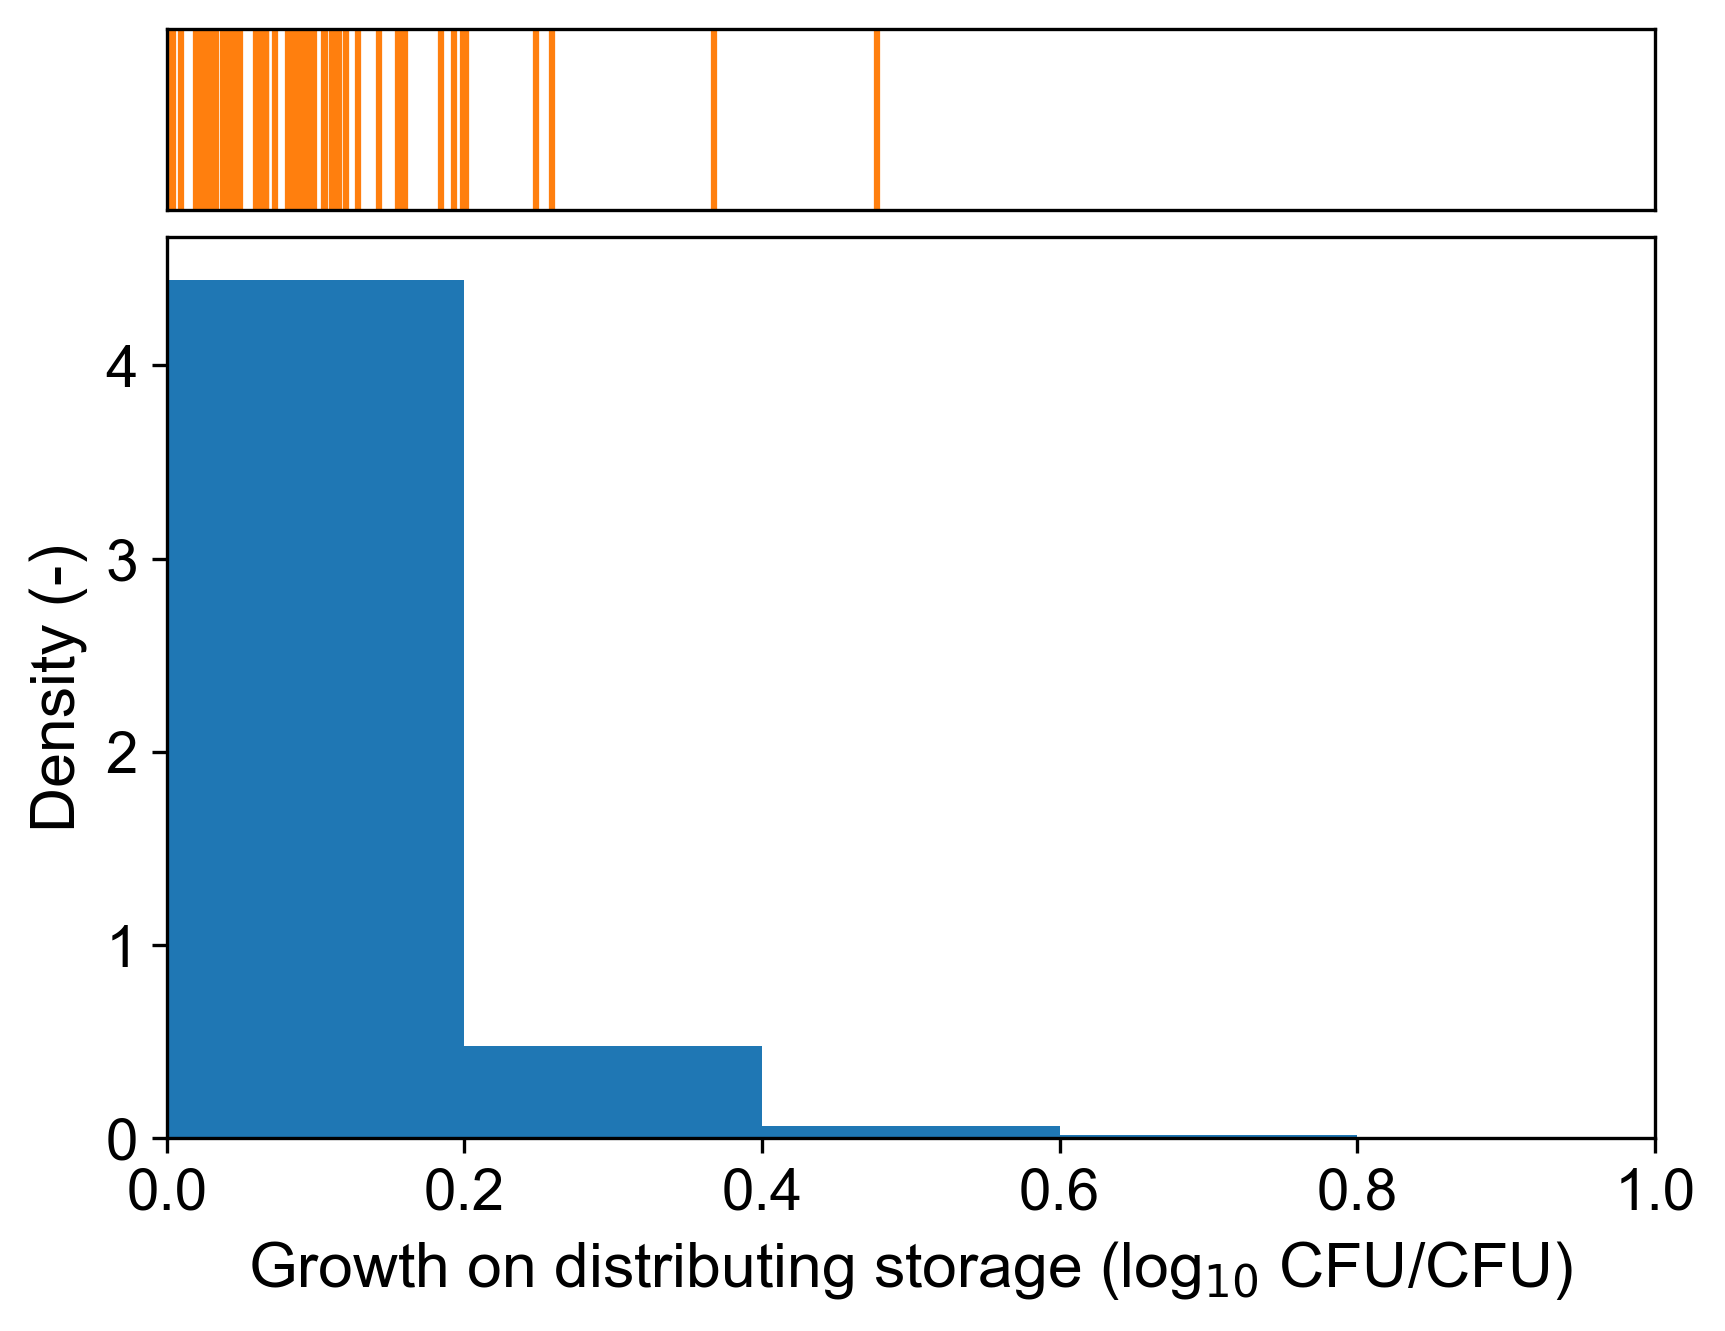

In [87]:


fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-0, 1])
ax[1].set_xlim([-0, 1])
for i in range(len(delta_dist_ill)):
    ax[0].axvline(x = delta_dist_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(delta_dist, density="TRUE", range = (0, 1), bins = 5)
ax[1].set_xlabel("Growth on distributing storage (log$_{10}$ CFU/CFU)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")
plt.savefig("Fig. 3d.pdf", bbox_inches="tight")
plt.show()

(array([9.58713498e+00, 2.47751383e+00, 1.26604459e+00, 4.68001450e-01,
       8.44526064e-01, 1.14200382e-01, 2.50541653e-02, 1.49353900e-01,
       9.12826179e-03, 3.89731461e-02, 1.17825790e-02, 5.04967673e-03,
       2.00692280e-03, 6.47394453e-04, 5.82655008e-04]), array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
       0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
       0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
       1.        ]), <BarContainer object of 15 artists>)


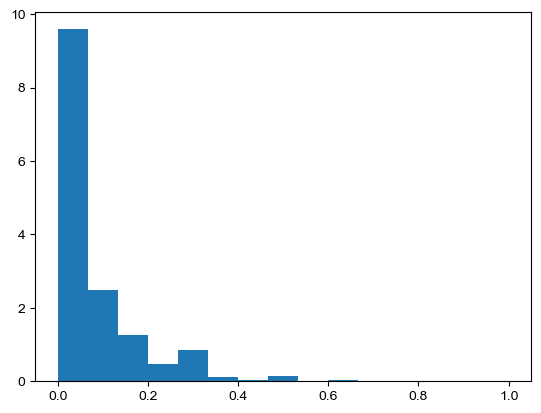

In [88]:
ret = plt.hist(delta_dist, density="TRUE", range = (0, 1), bins = 15)
print(ret)

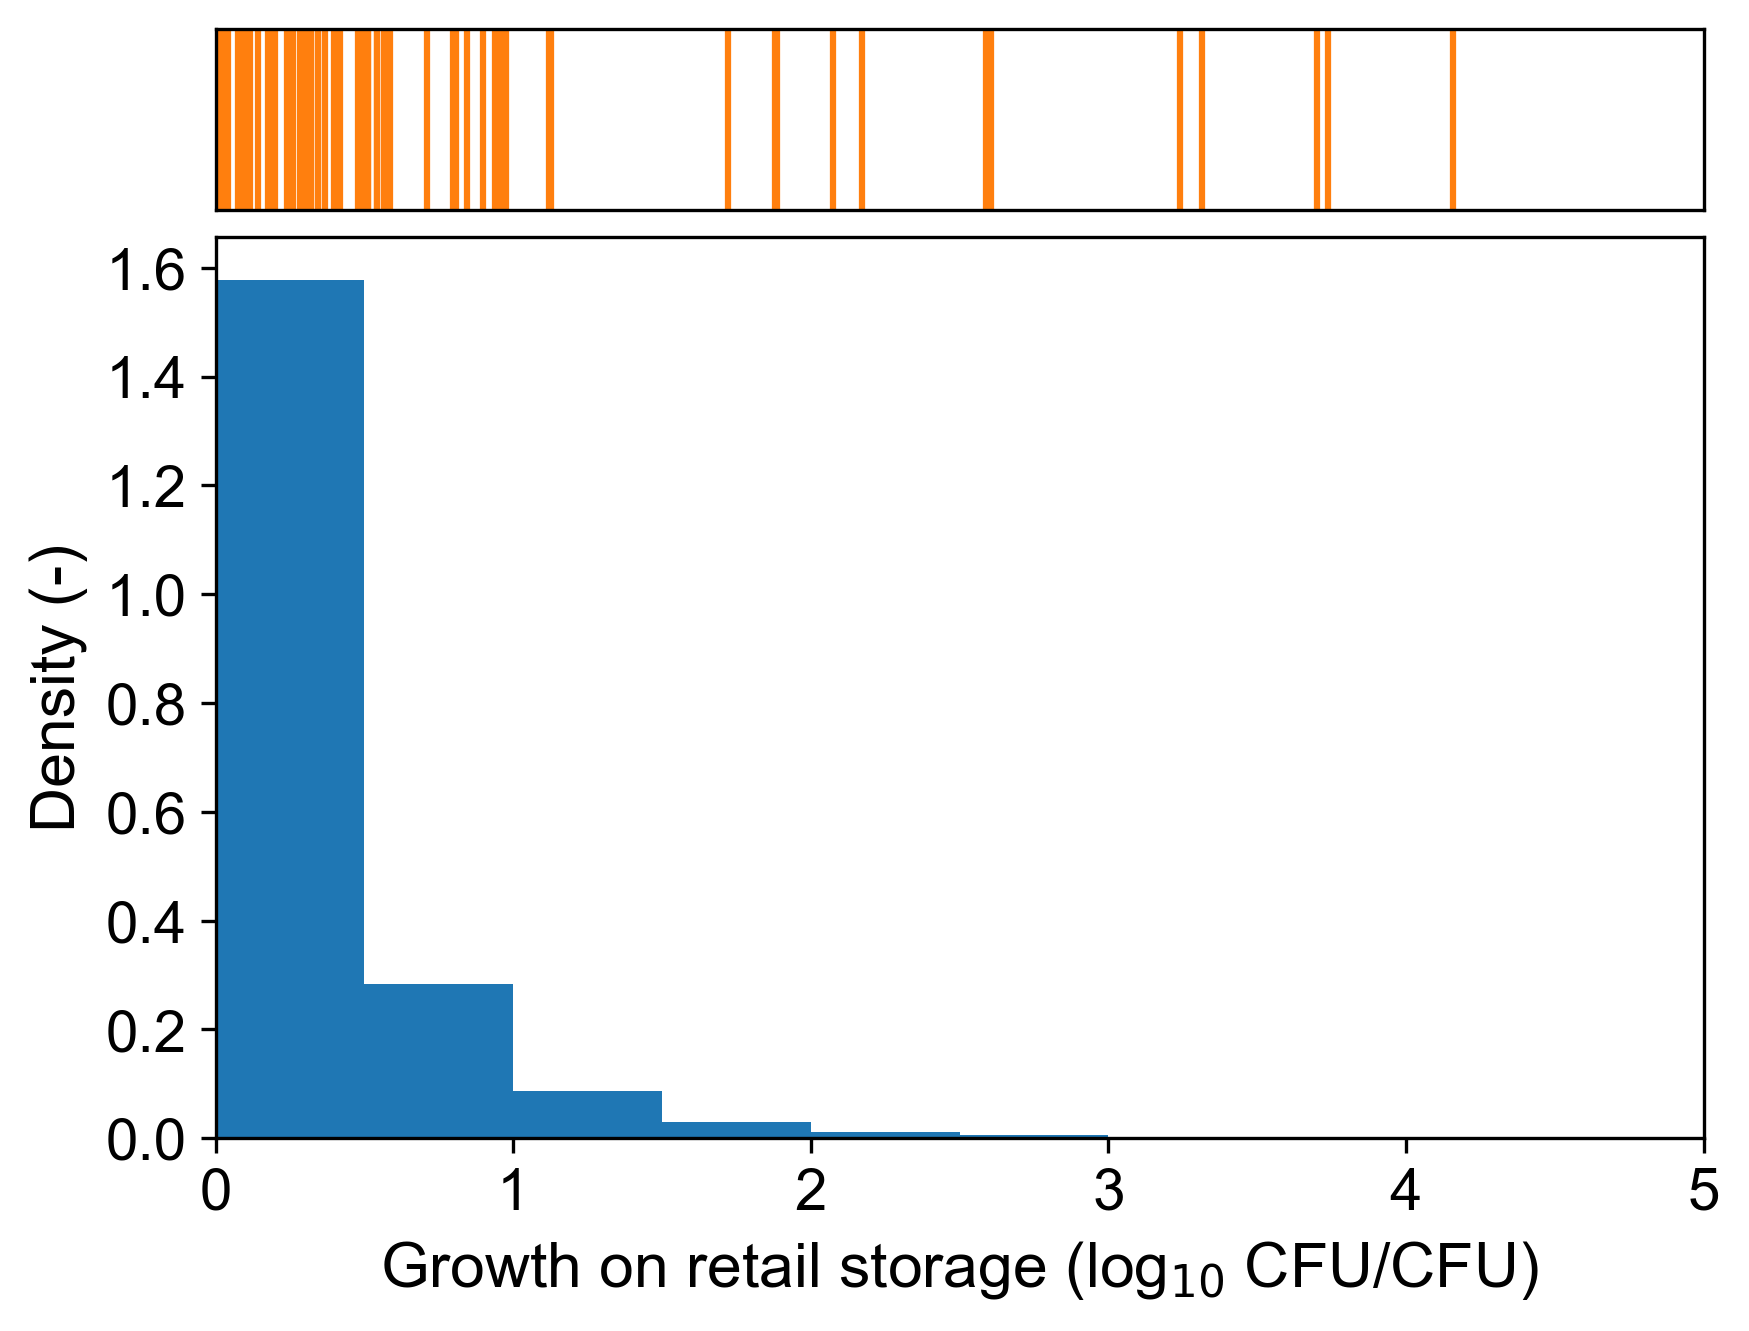

In [89]:


fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"


plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-0, 5])
ax[1].set_xlim([-0, 5])
for i in range(len(delta_retail_ill)):
    ax[0].axvline(x = delta_retail_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(delta_retail, density="TRUE", range = (0, 8), bins = 16)
ax[1].set_xlabel("Growth on retail storage (log$_{10}$ CFU/CFU)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")
plt.savefig("Fig. 3e.pdf", bbox_inches="tight")
plt.show()

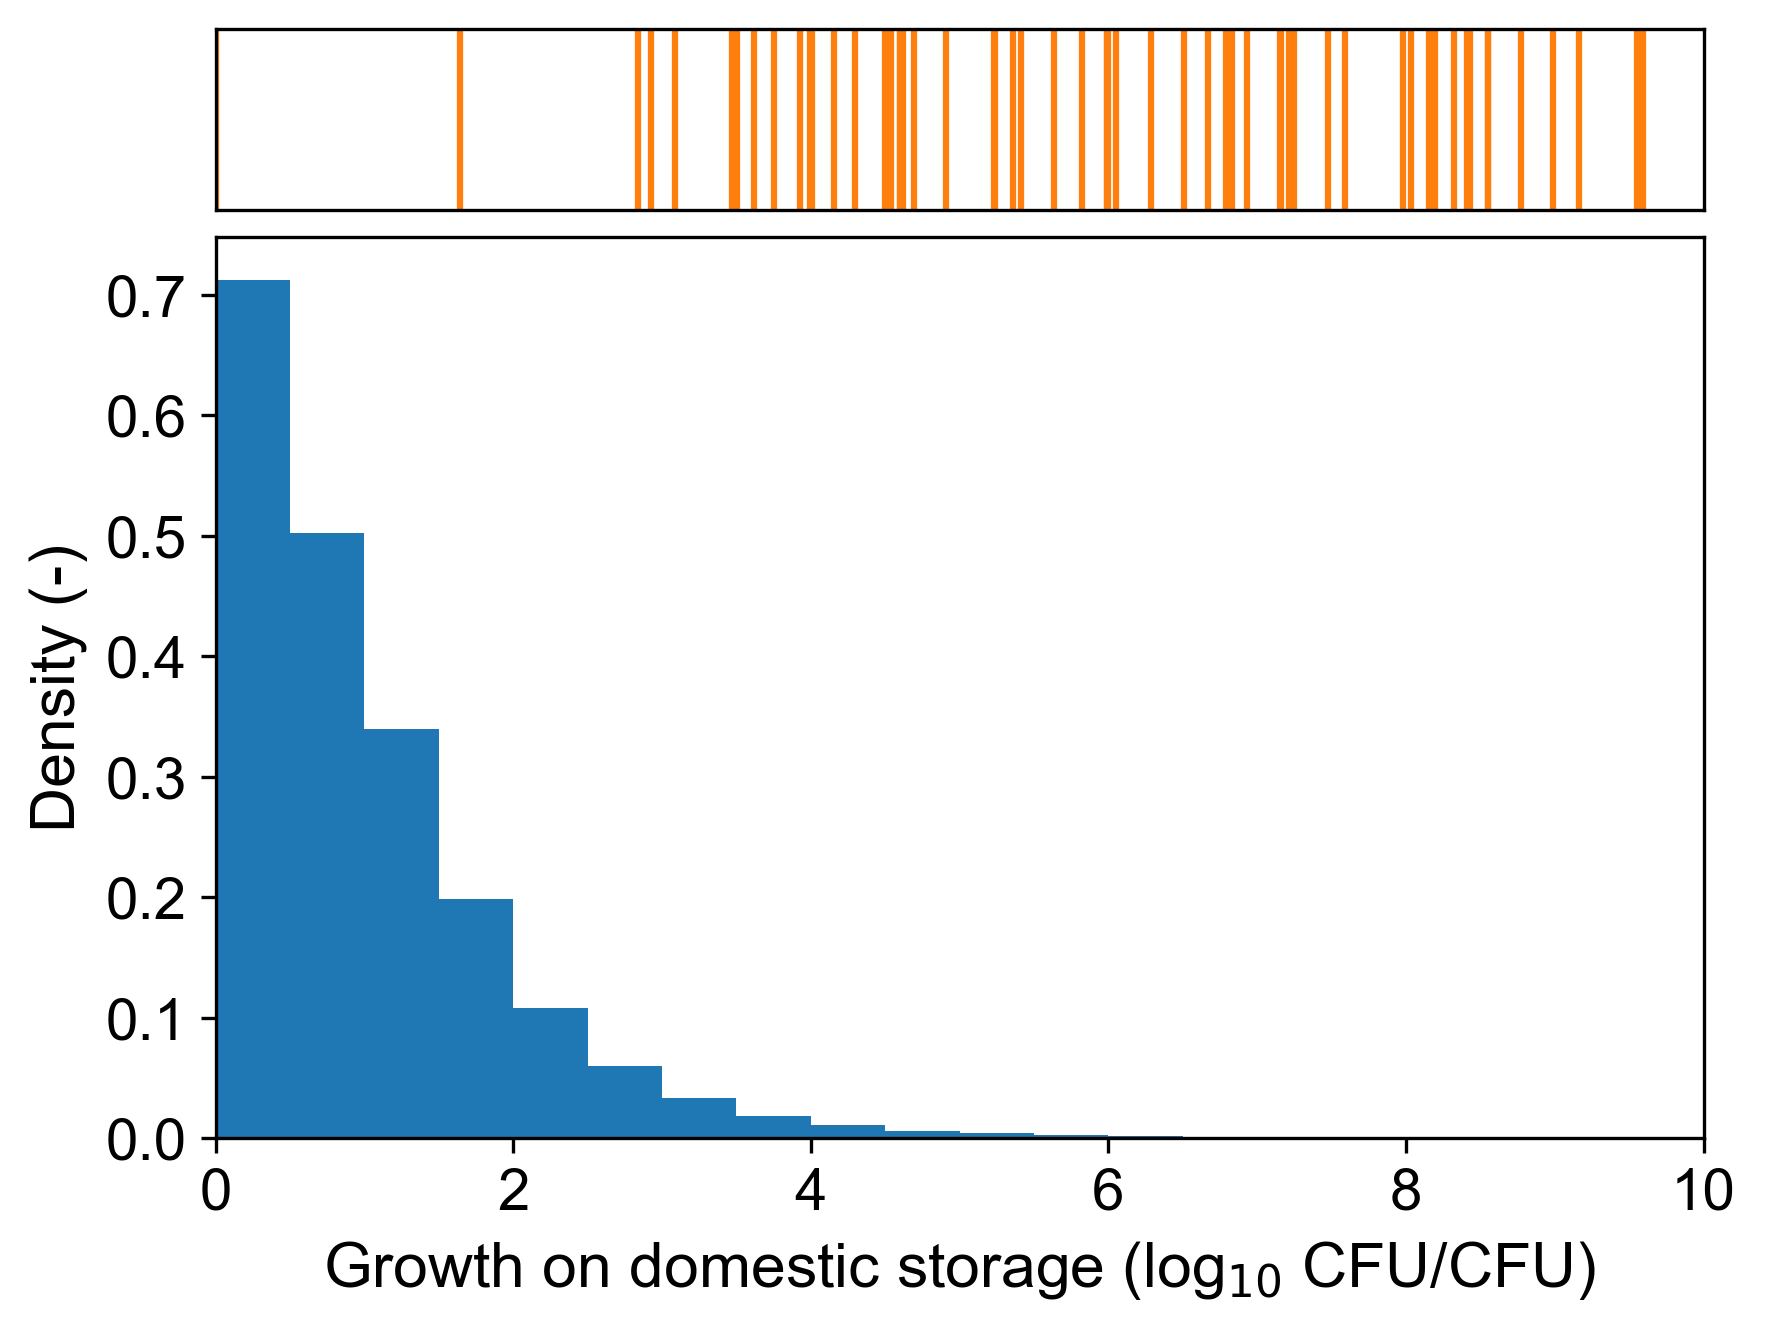

In [90]:


fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"


plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-0, 10])
ax[1].set_xlim([-0, 10])
for i in range(len(delta_domestic_ill)):
    ax[0].axvline(x = delta_domestic_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(delta_domestic, density="TRUE", range = (0, 15), bins = 30)
ax[1].set_xlabel("Growth on domestic storage (log$_{10}$ CFU/CFU)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")
plt.savefig("Fig. 3f.pdf", bbox_inches="tight")
plt.show()

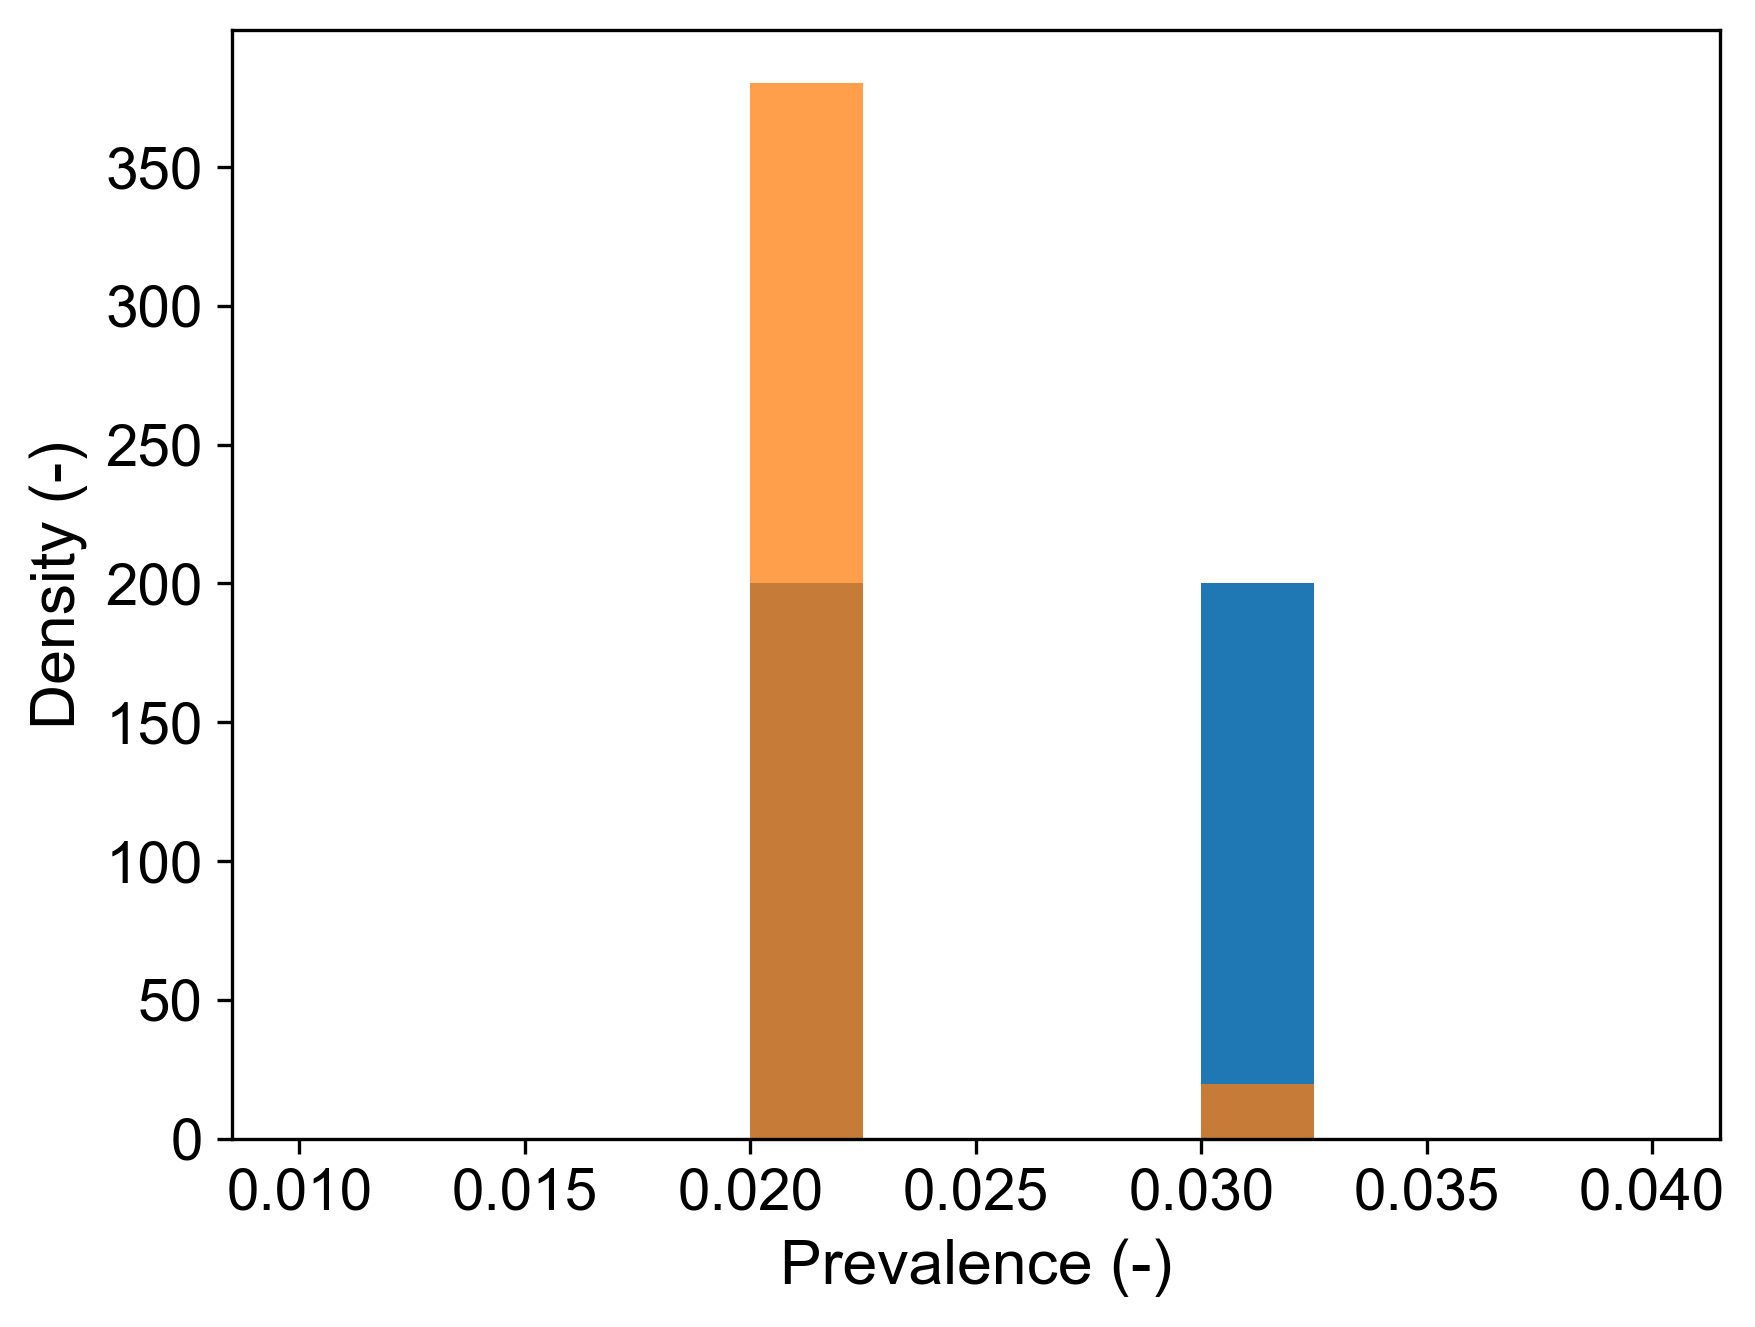

In [91]:
plt.figure(dpi=300)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Prevalence (-)",size=15,fontname="Arial")
plt.ylabel("Density (-)",size=15,fontname="Arial")
ec=""
plt.hist(prevalence, density="TRUE", bins=12, alpha = 1, range = (0.01, 0.04))
plt.hist(prevalence_ill, density="TRUE", bins=12, alpha = 0.75, range = (0.01, 0.04))
plt.show()

In [92]:
P_serve_ill

0     0.047823
1     0.999998
2     0.991856
3     0.255063
4     0.010877
        ...   
56    0.183529
57    0.437354
58    0.999942
59    1.000000
60    0.000888
Name: P_serve_ill, Length: 61, dtype: float64

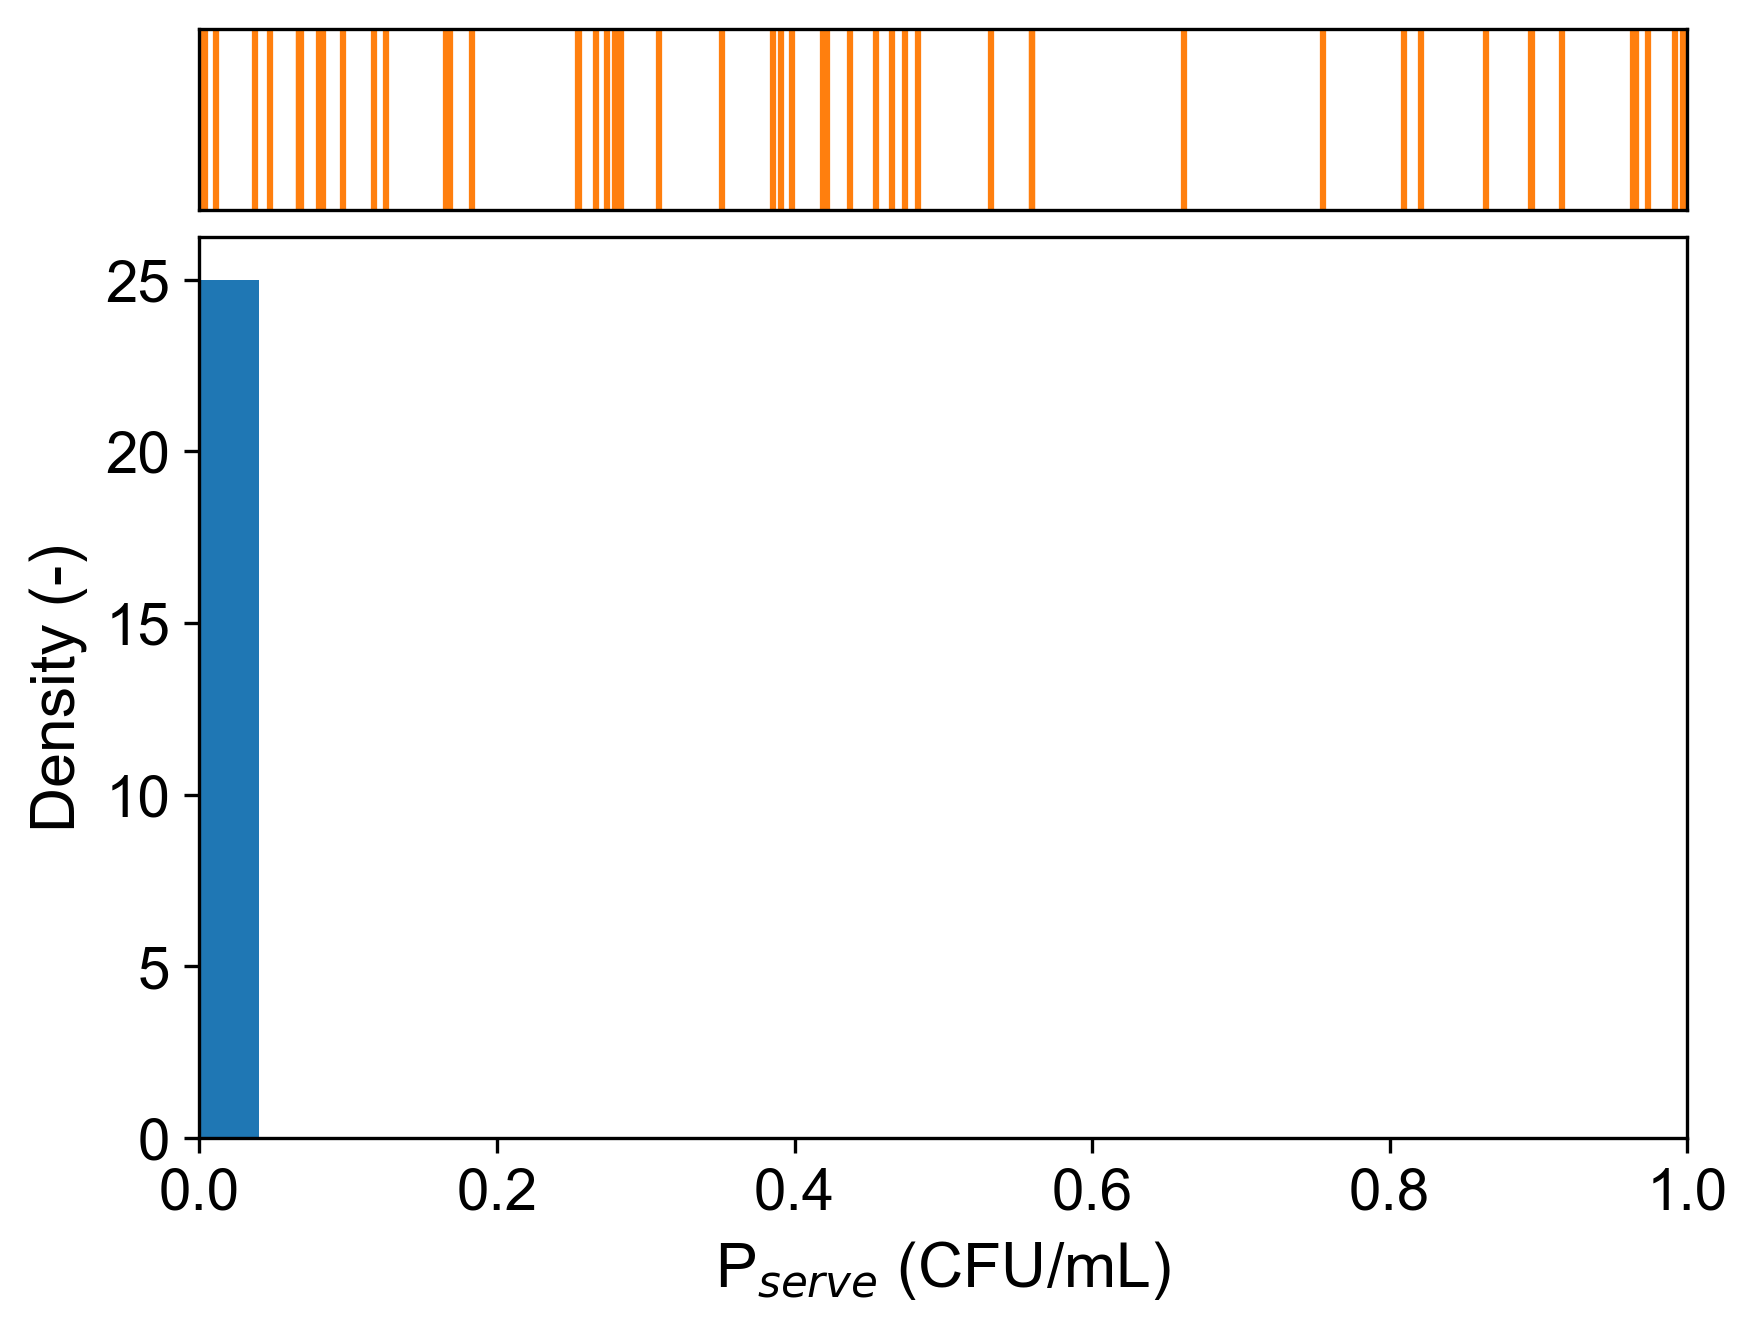

In [93]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-0., 1])
ax[1].set_xlim([-0., 1])
for i in range(len(P_serve_ill)):
    ax[0].axvline(x = P_serve_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(P_serve, density="TRUE", range = (0.0, 1), bins = 25)
ax[1].set_xlabel("P$_{serve}$ (CFU/mL)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

In [166]:
np.sum([P_serve>=0.8])/np.sum([P_serve>=0.0])

2e-09

In [94]:
logN0_ill

array([ 3.24029116,  3.11807807,  2.10008262,  2.84699881,  3.67760463,
        2.58310824,  3.85650628,  0.49206456,  0.34877188,  3.04211217,
        2.44596101,  3.90014478,  0.97526962, -0.54442081,  0.41460033,
        2.58916779,  0.91681244,  0.7551975 ,  3.88714967,  3.07053648,
        2.66922   ,  3.94527795,  1.75356627,  3.77101134,  1.586943  ,
       -0.17678598,  0.18724663,  3.18645091,  3.51810295,  0.04127359,
        3.98971887,  0.12811874,  2.97631232,  3.83596326,  1.86993382,
        3.3973486 ,  3.34947732,  0.601196  , -0.3460776 ,  3.74363458,
        0.21105286,  3.6920424 ,  0.53198592,  3.23460861, -0.18759746,
        2.85476813,  2.47013605,  3.63296824,  2.7987517 ,  3.67413146,
        1.53363986, -0.04300599,  2.79034534,  3.0651379 ,  0.46782121,
        3.31738905,  3.93803632, -0.25229175,  3.53322136,  3.97908416,
        3.92147645])

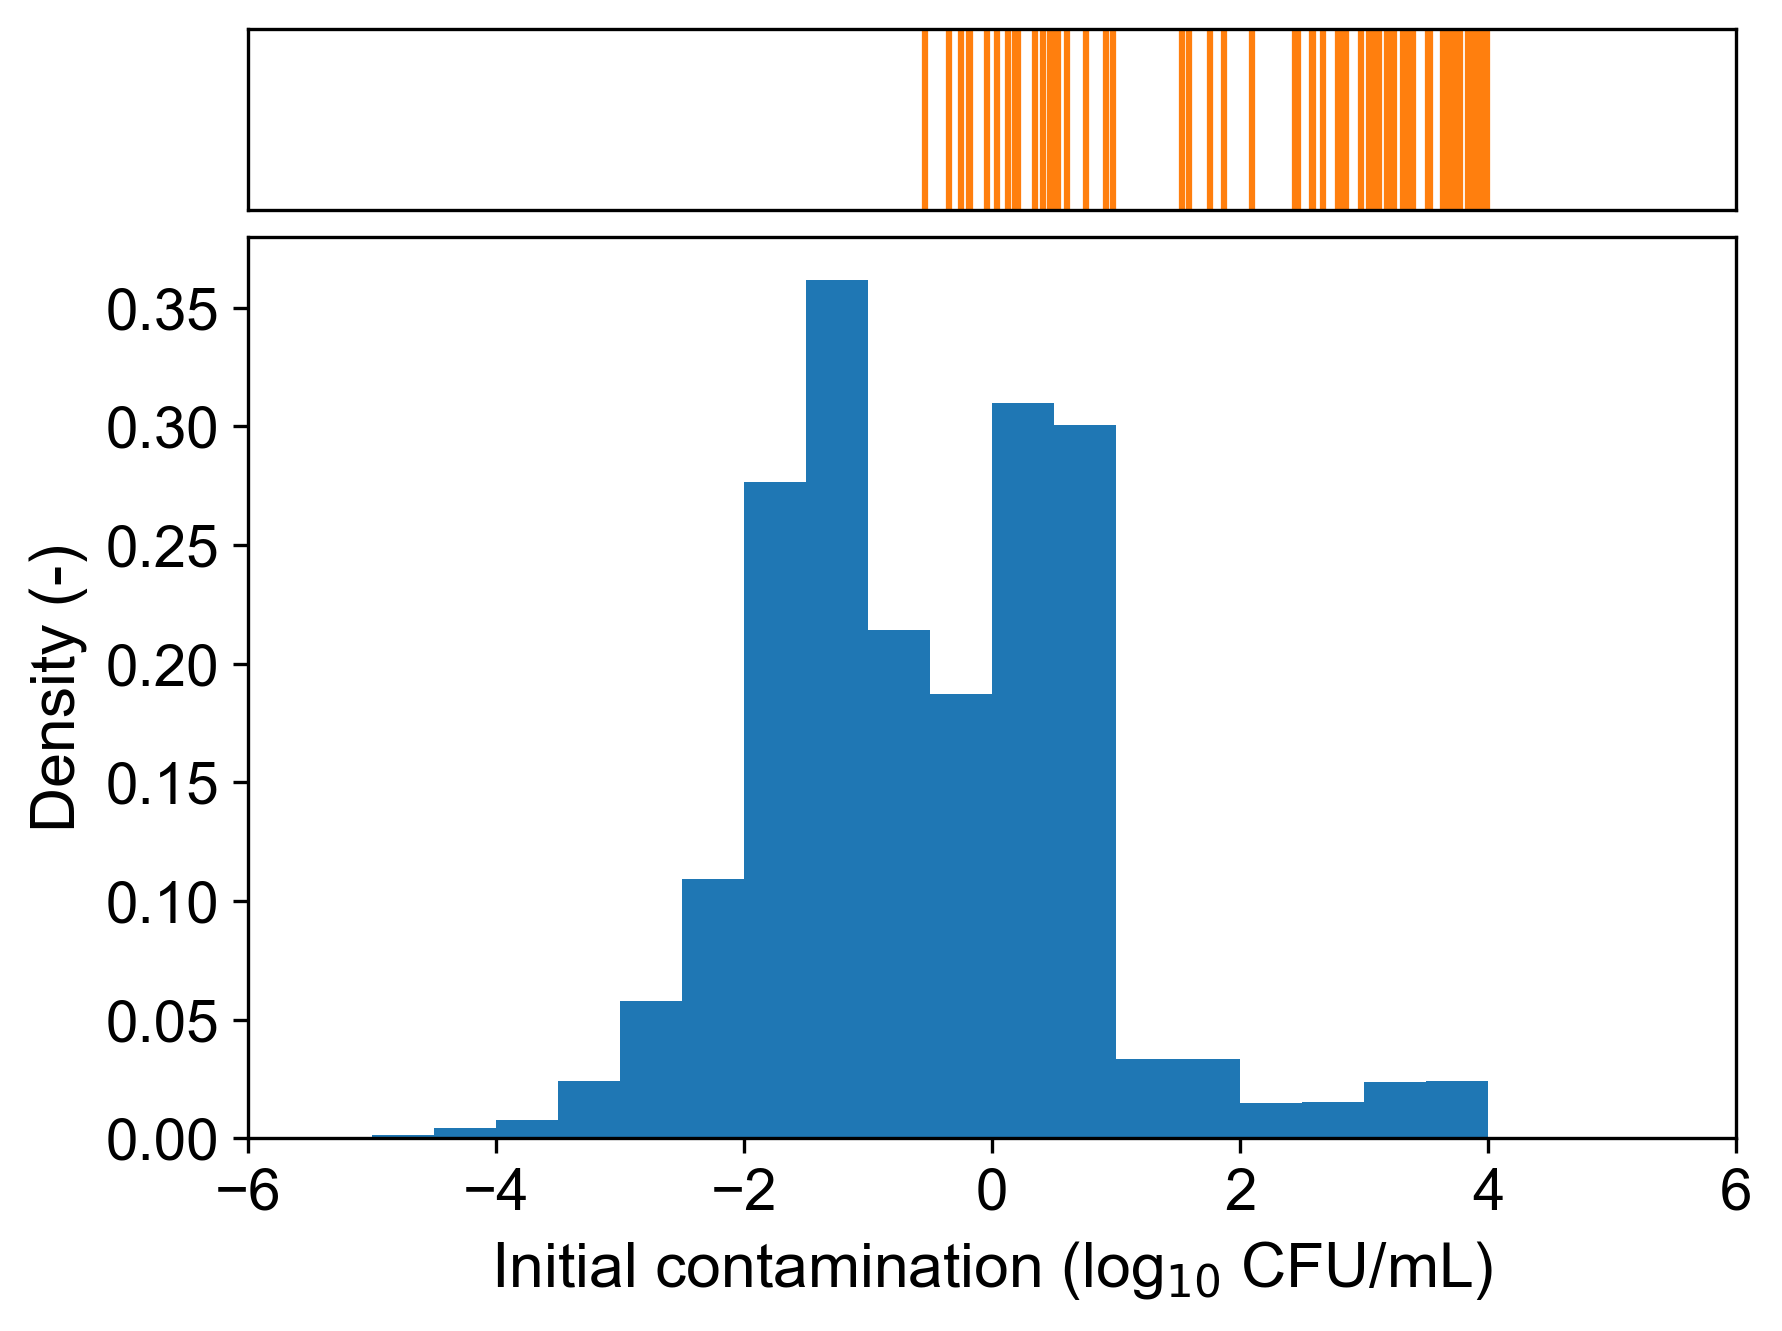

In [95]:


fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"


plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-6, 6])
ax[1].set_xlim([-6, 6])
for i in range(len(logN0_ill)):
    ax[0].axvline(x = logN0_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(logN0[prevalence_or_not==1], density="TRUE", range = (-6, 6), bins = 24)
ax[1].set_xlabel("Initial contamination (log$_{10}$ CFU/mL)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")
plt.savefig("Fig. 3a.pdf", bbox_inches="tight")
plt.show()

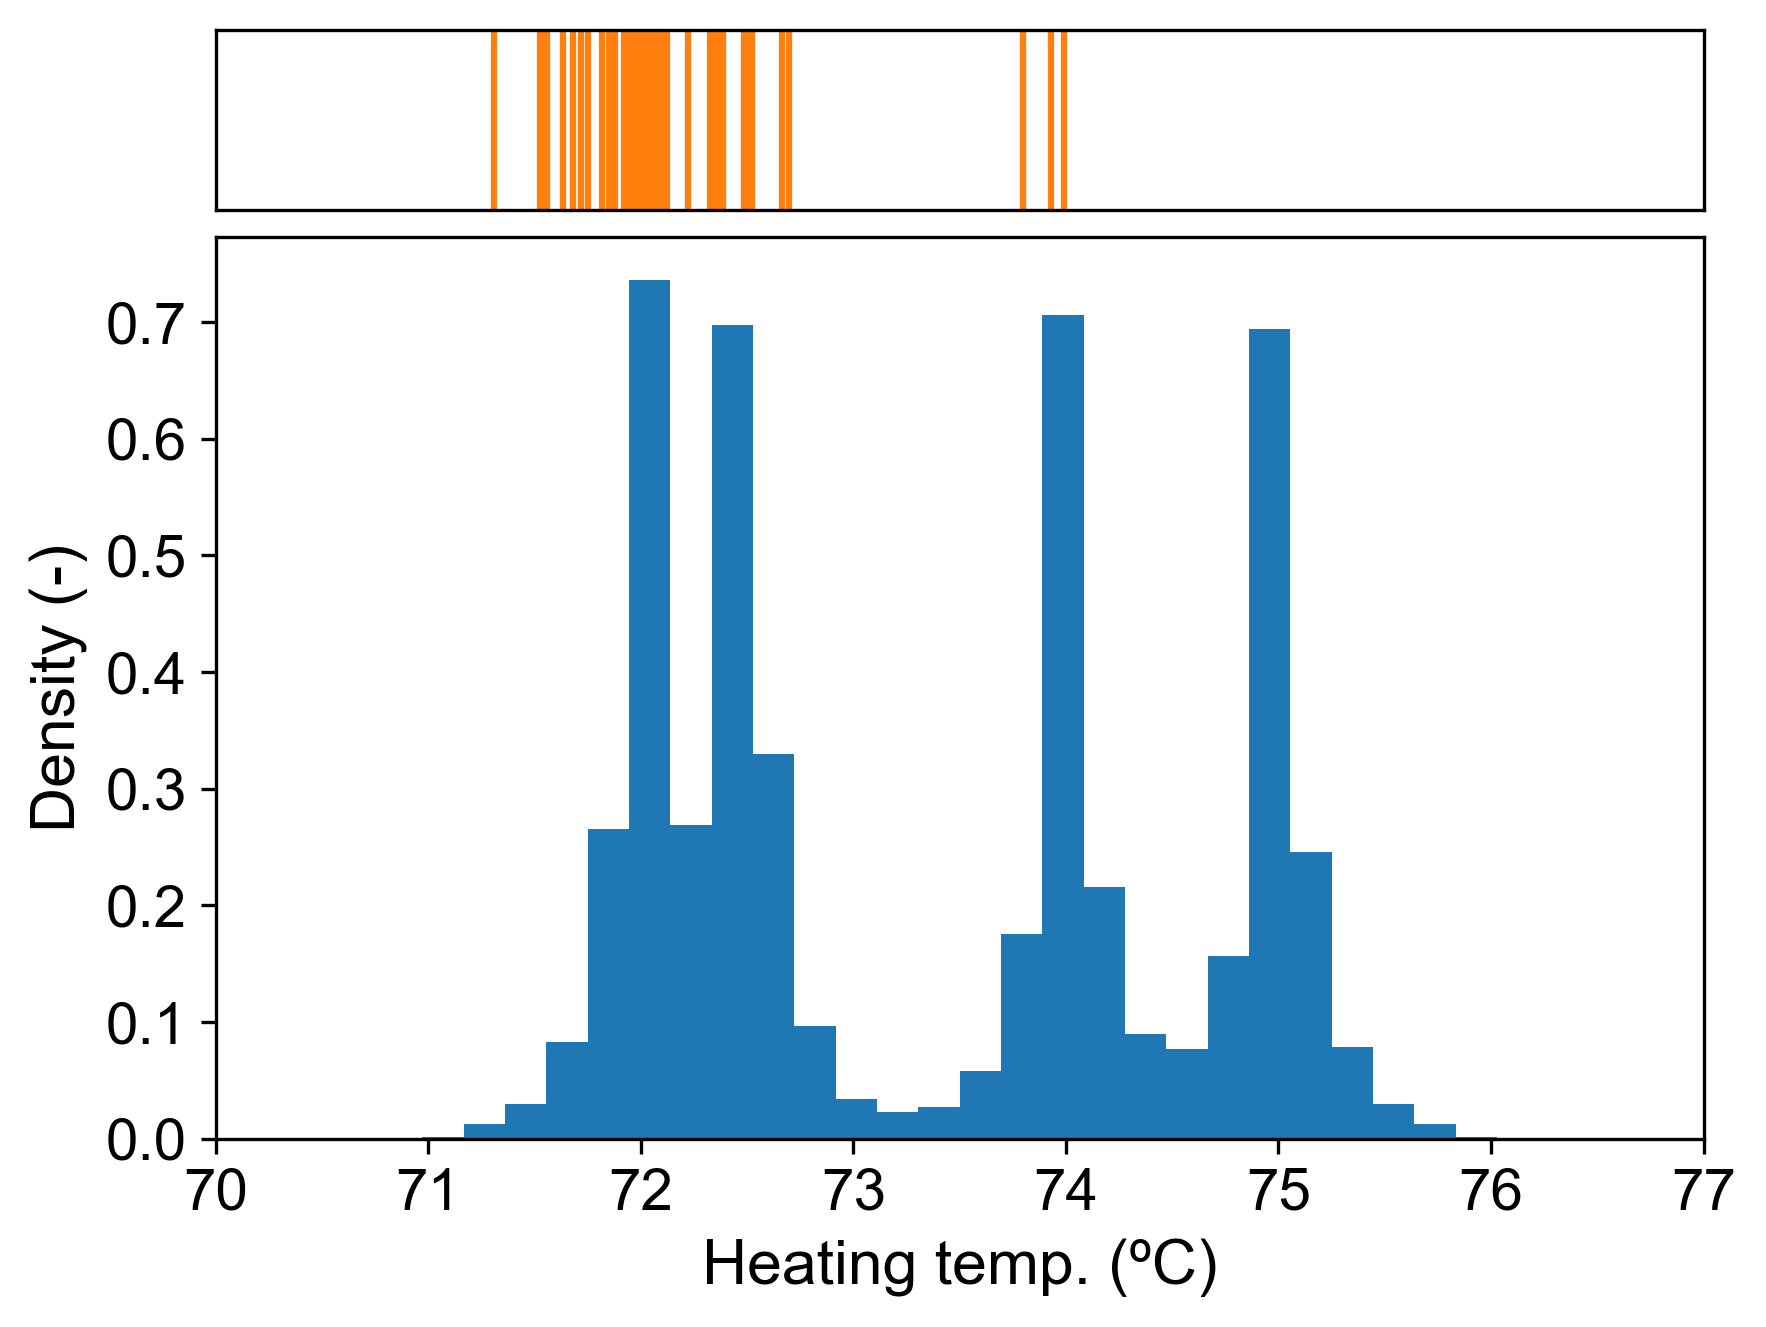

In [96]:



fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"


plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([70, 77])
ax[1].set_xlim([70, 77])
for i in range(len(temp_heat_ill)):
    ax[0].axvline(x = temp_heat_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(temp_heat[prevalence_or_not==1], density="TRUE", range = (70, 77), bins = 36)
ax[1].set_xlabel("Heating temp. (ºC)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")
plt.savefig("Fig. 5a.pdf", bbox_inches="tight")
plt.show()

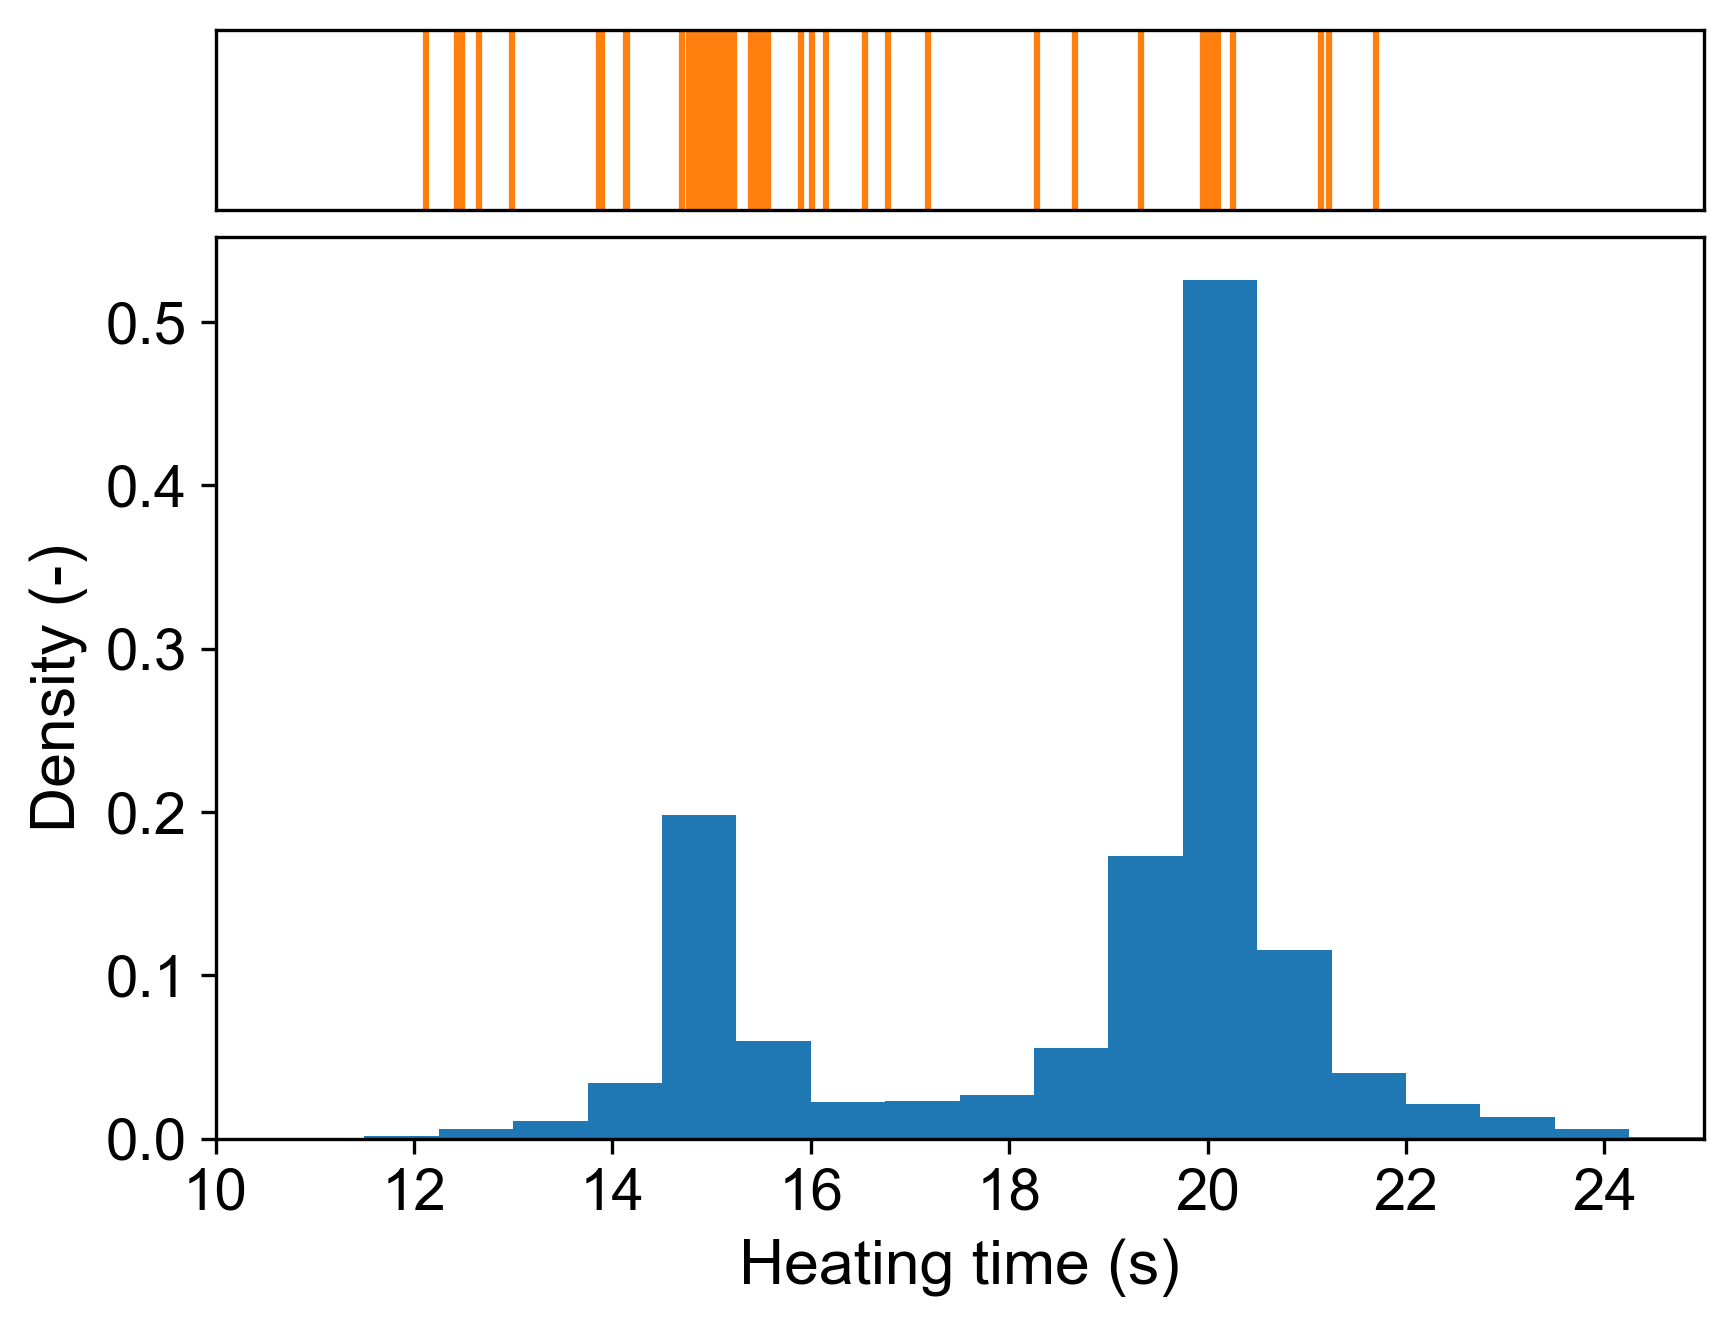

In [97]:



fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"


plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([10, 25])
ax[1].set_xlim([10, 25])
for i in range(len(time_heat_ill)):
    ax[0].axvline(x = time_heat_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(time_heat[prevalence_or_not==1], density="TRUE", range = (10, 25), bins = 20)
ax[1].set_xlabel("Heating time (s)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")
plt.savefig("Fig. 5b.pdf", bbox_inches="tight")
plt.show()

In [98]:
time_heat_ill

0     14.911867
1     14.987796
2     16.551186
3     14.859019
4     15.029709
        ...    
56    15.040588
57    14.845228
58    13.868545
59    12.983670
60    17.184473
Name: time_heat_ill, Length: 61, dtype: float64

In [99]:
temp_heat_ill

0     72.006933
1     72.090038
2     73.797769
3     71.927688
4     71.311809
        ...    
56    71.525622
57    72.003647
58    71.975569
59    72.032846
60    72.696255
Name: temp_heat_ill, Length: 61, dtype: float64

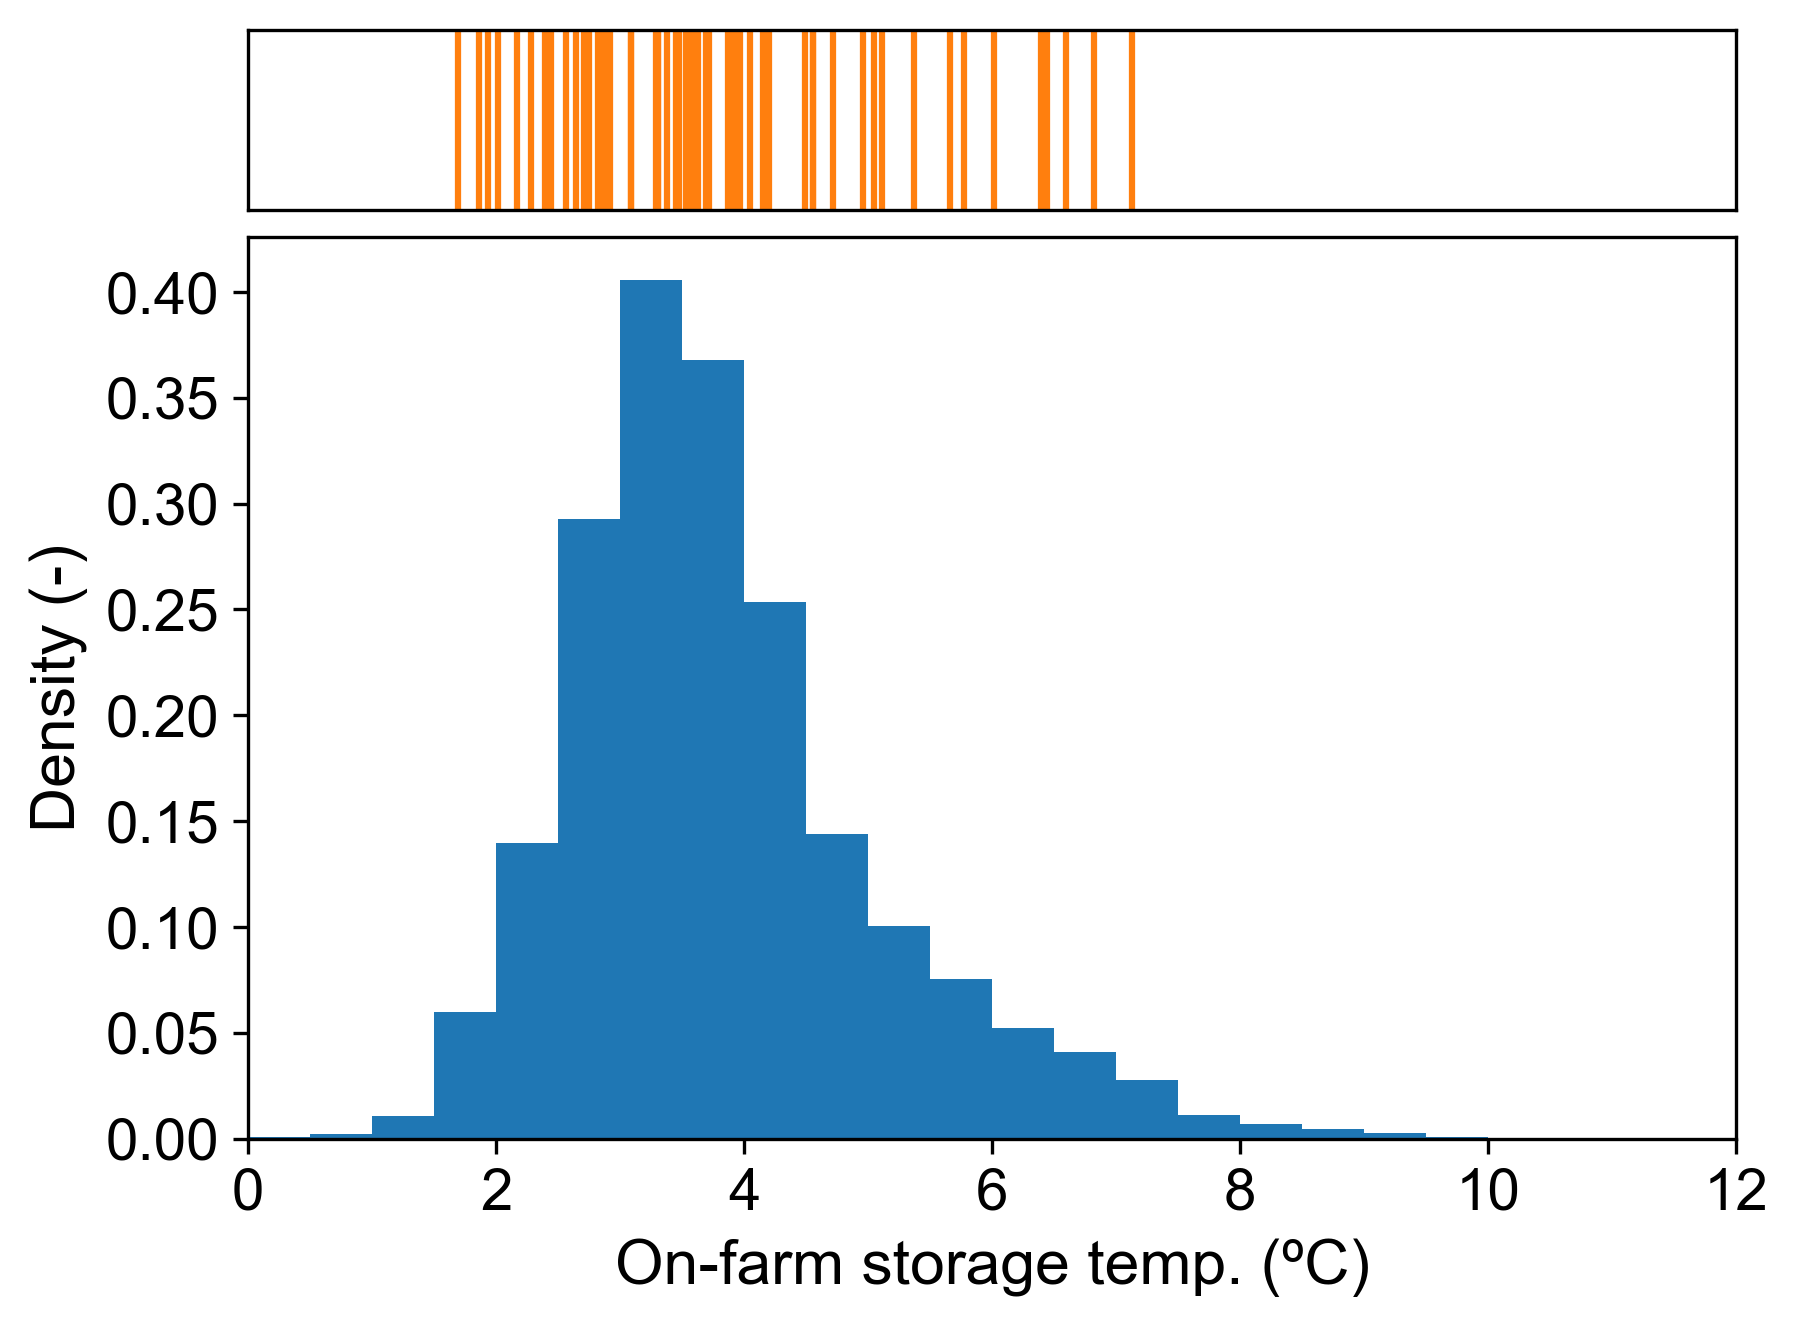

In [100]:


fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"


plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([0, 12])
ax[1].set_xlim([0, 12])
for i in range(len(temp_heat_ill)):
    ax[0].axvline(x = temp_pre_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(temp_pre[prevalence_or_not==1], density="TRUE", range = (0, 10), bins = 20)
ax[1].set_xlabel("On-farm storage temp. (ºC)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")
plt.savefig("Fig. S2a.pdf", bbox_inches="tight")
plt.show()

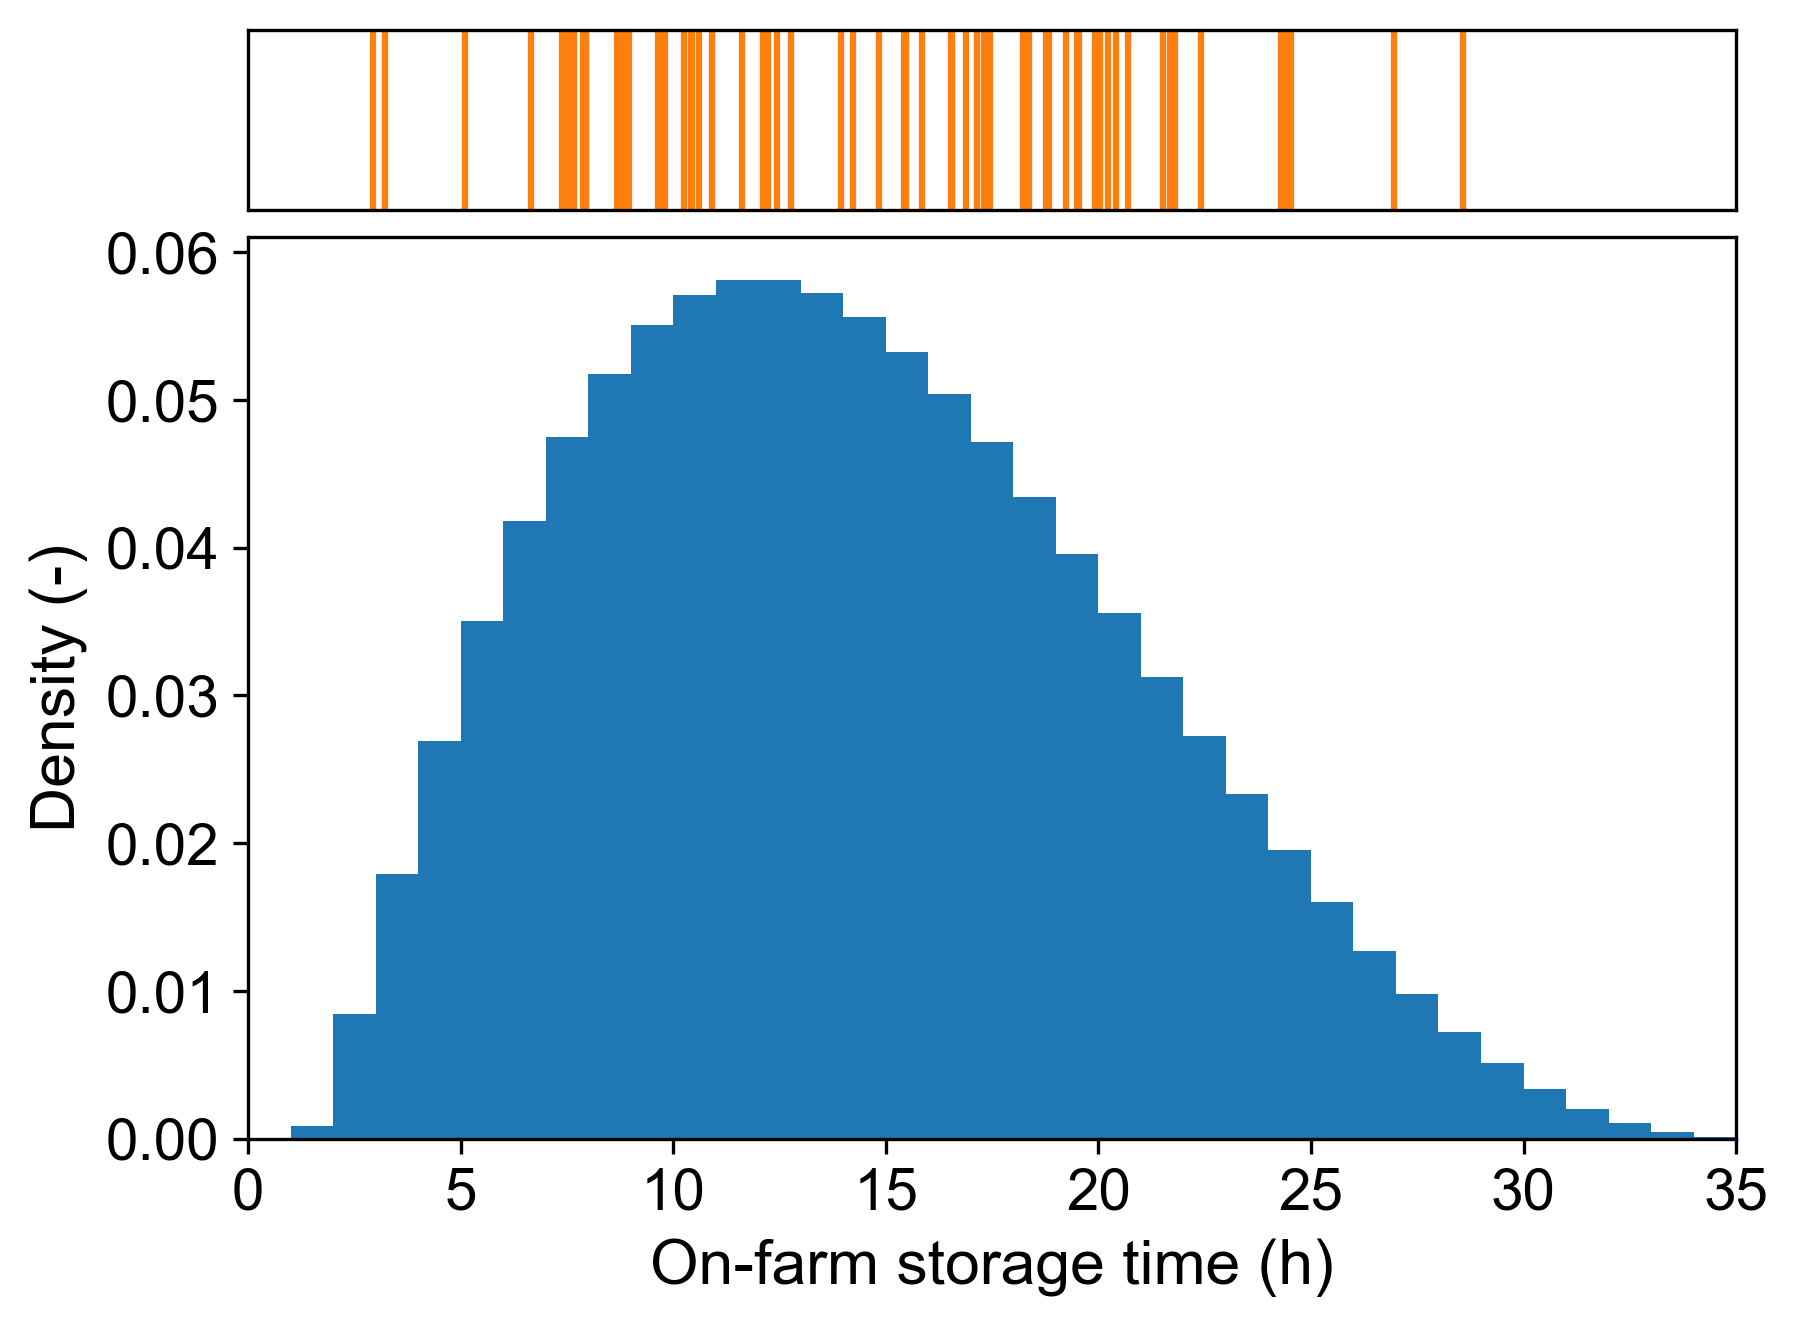

In [101]:



fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([0, 35])
ax[1].set_xlim([0, 35])
for i in range(len(temp_heat_ill)):
    ax[0].axvline(x = time_pre_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(time_pre[prevalence_or_not==1], density="TRUE", range = (0, 35), bins = 35)
ax[1].set_xlabel("On-farm storage time (h)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")
plt.savefig("Fig. S2b.pdf", bbox_inches="tight")
plt.show()

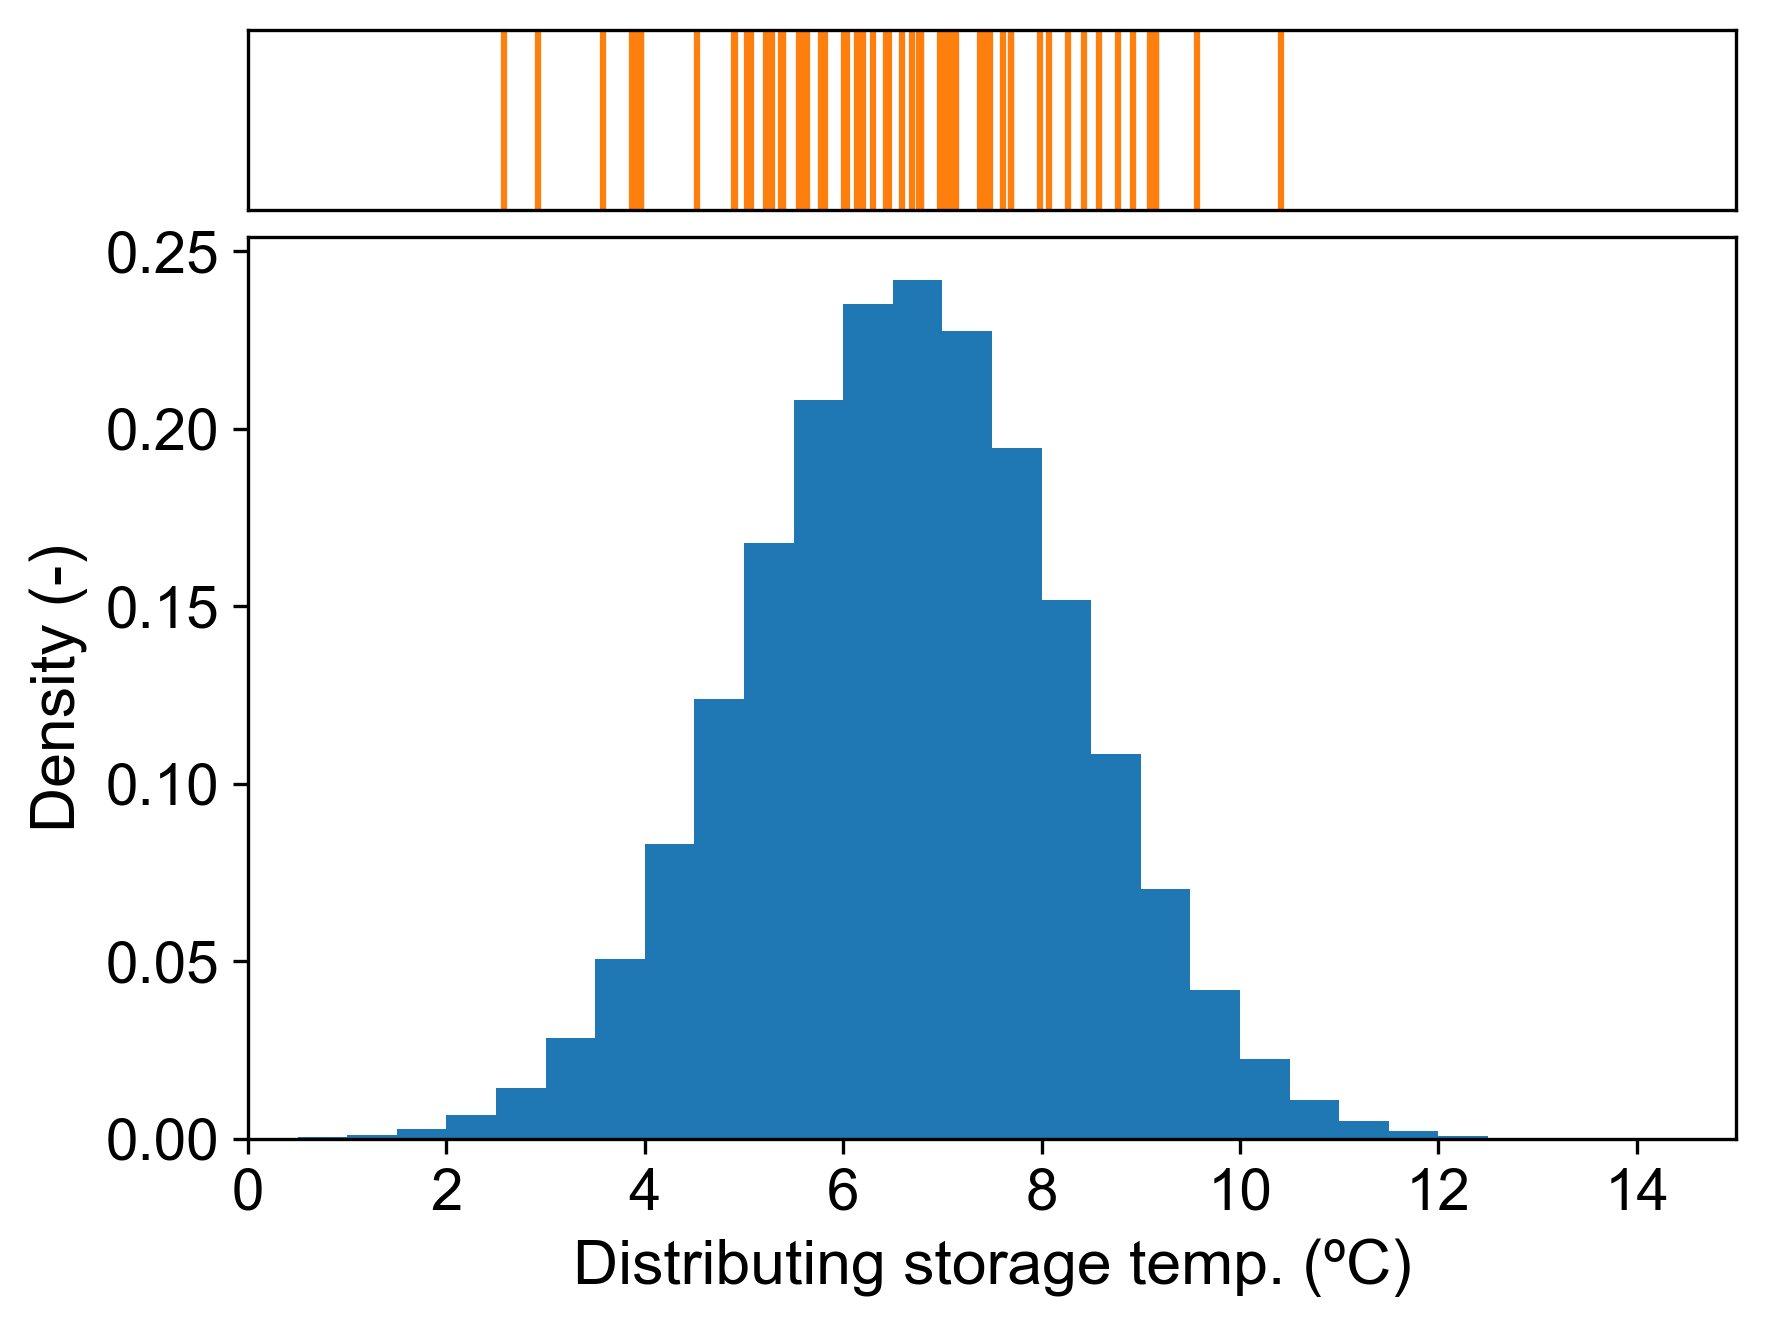

In [102]:

fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"


plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([0, 15])
ax[1].set_xlim([0, 15])
for i in range(len(temp_heat_ill)):
    ax[0].axvline(x = temp_dist_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(temp_dist[prevalence_or_not==1], density="TRUE", range = (0, 15), bins = 30)
ax[1].set_xlabel("Distributing storage temp. (ºC)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")
plt.savefig("Fig. S2c.pdf", bbox_inches="tight")
plt.show()

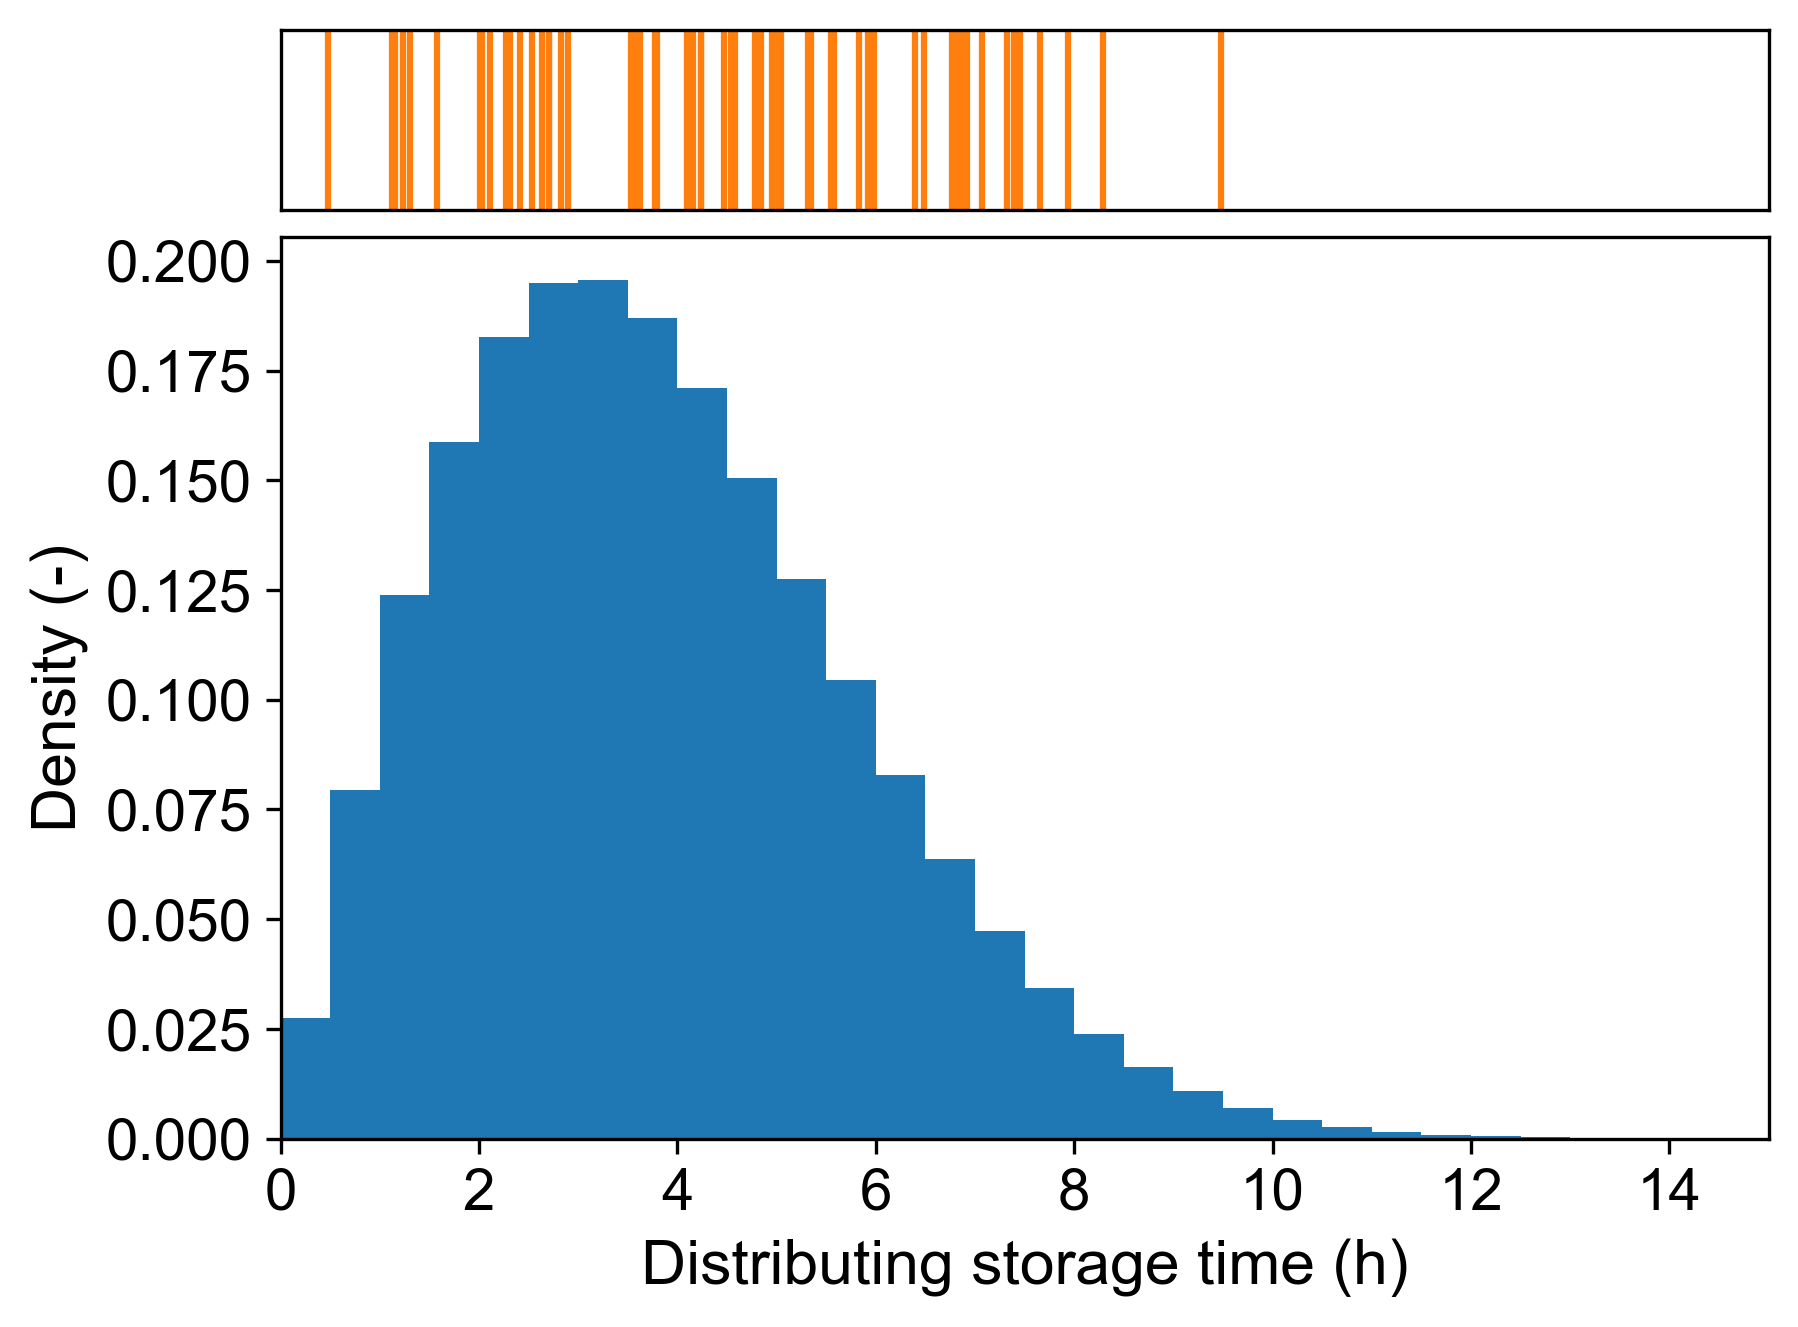

In [103]:


fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([0, 15])
ax[1].set_xlim([0, 15])
for i in range(len(temp_heat_ill)):
    ax[0].axvline(x = time_dist_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(time_dist[prevalence_or_not==1], density="TRUE", range = (0, 15), bins = 30)
ax[1].set_xlabel("Distributing storage time (h)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")
plt.savefig("Fig. S2d.pdf", bbox_inches="tight")
plt.show()

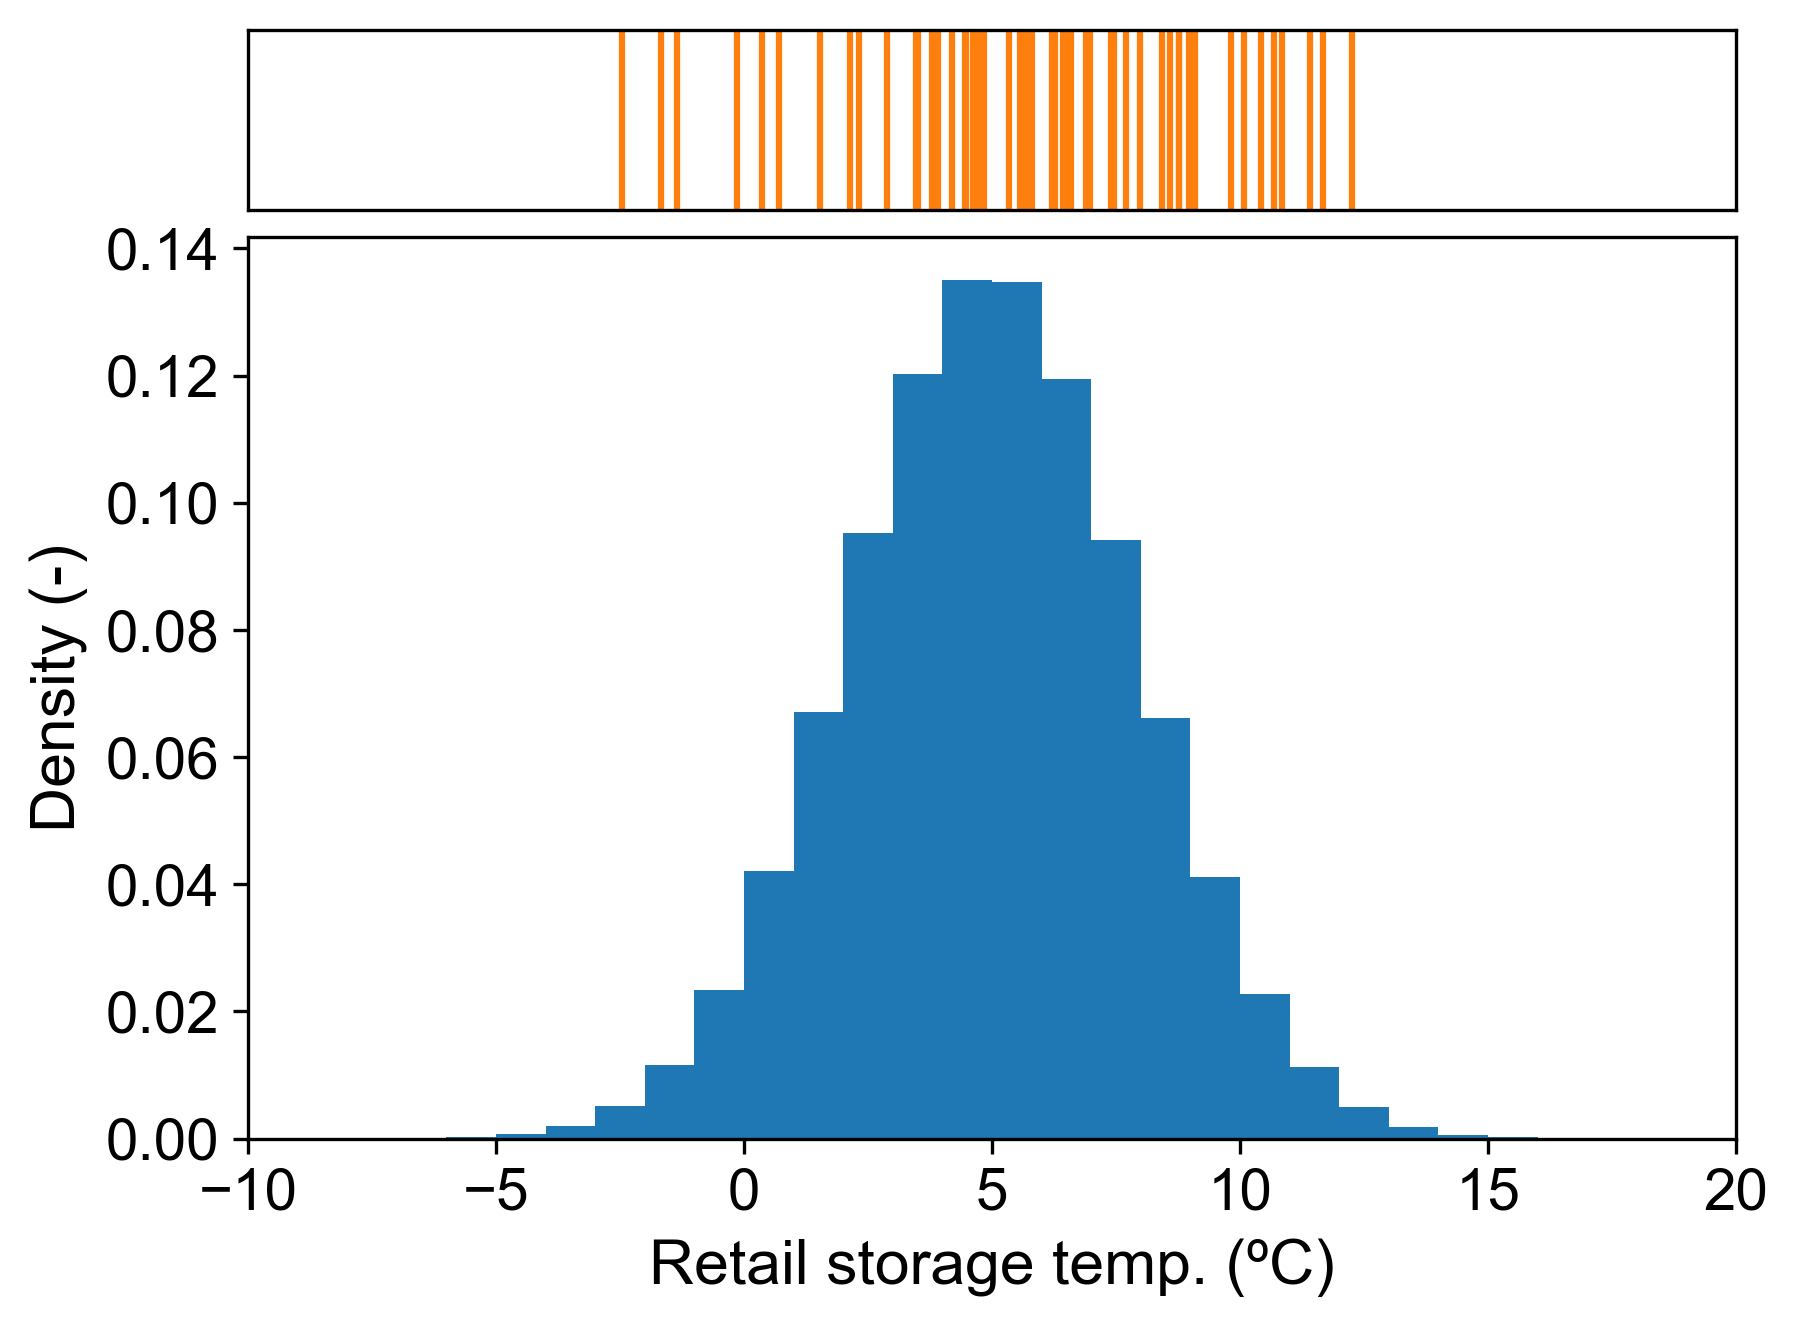

In [104]:

fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"


plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-10, 20])
ax[1].set_xlim([-10, 20])
for i in range(len(temp_heat_ill)):
    ax[0].axvline(x = temp_retail_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(temp_retail[prevalence_or_not==1], density="TRUE", range = (-10, 20), bins = 30)
ax[1].set_xlabel("Retail storage temp. (ºC)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")
plt.savefig("Fig. S2e.pdf", bbox_inches="tight")
plt.show()

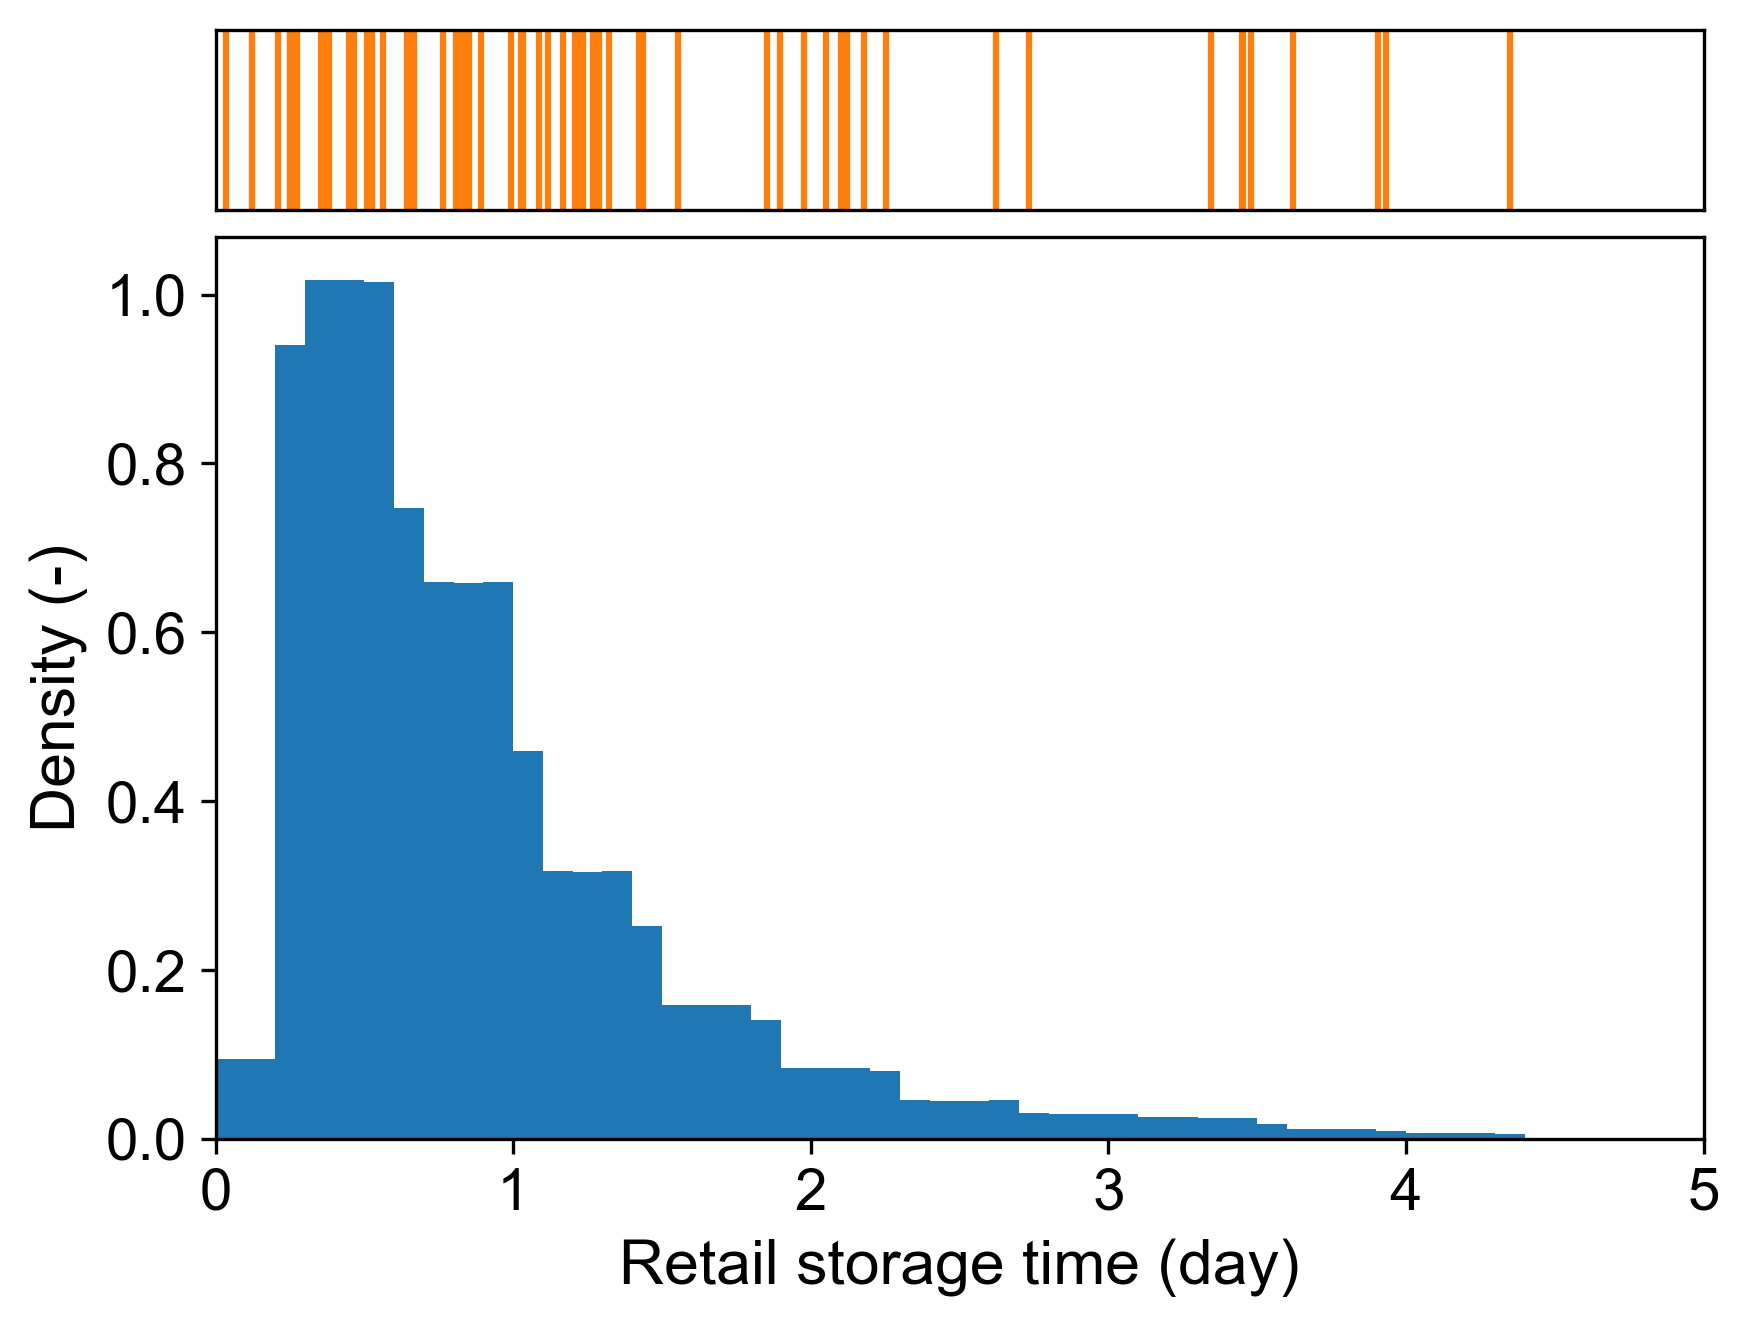

In [105]:


fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"


plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([0, 5])
ax[1].set_xlim([0, 5])
for i in range(len(temp_heat_ill)):
    ax[0].axvline(x = (time_retail_ill/24)[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(time_retail[prevalence_or_not==1]/24, density="TRUE", range = (0, 5), bins = 50)
ax[1].set_xlabel("Retail storage time (day)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")
plt.savefig("Fig. S2f.pdf", bbox_inches="tight")
plt.show()

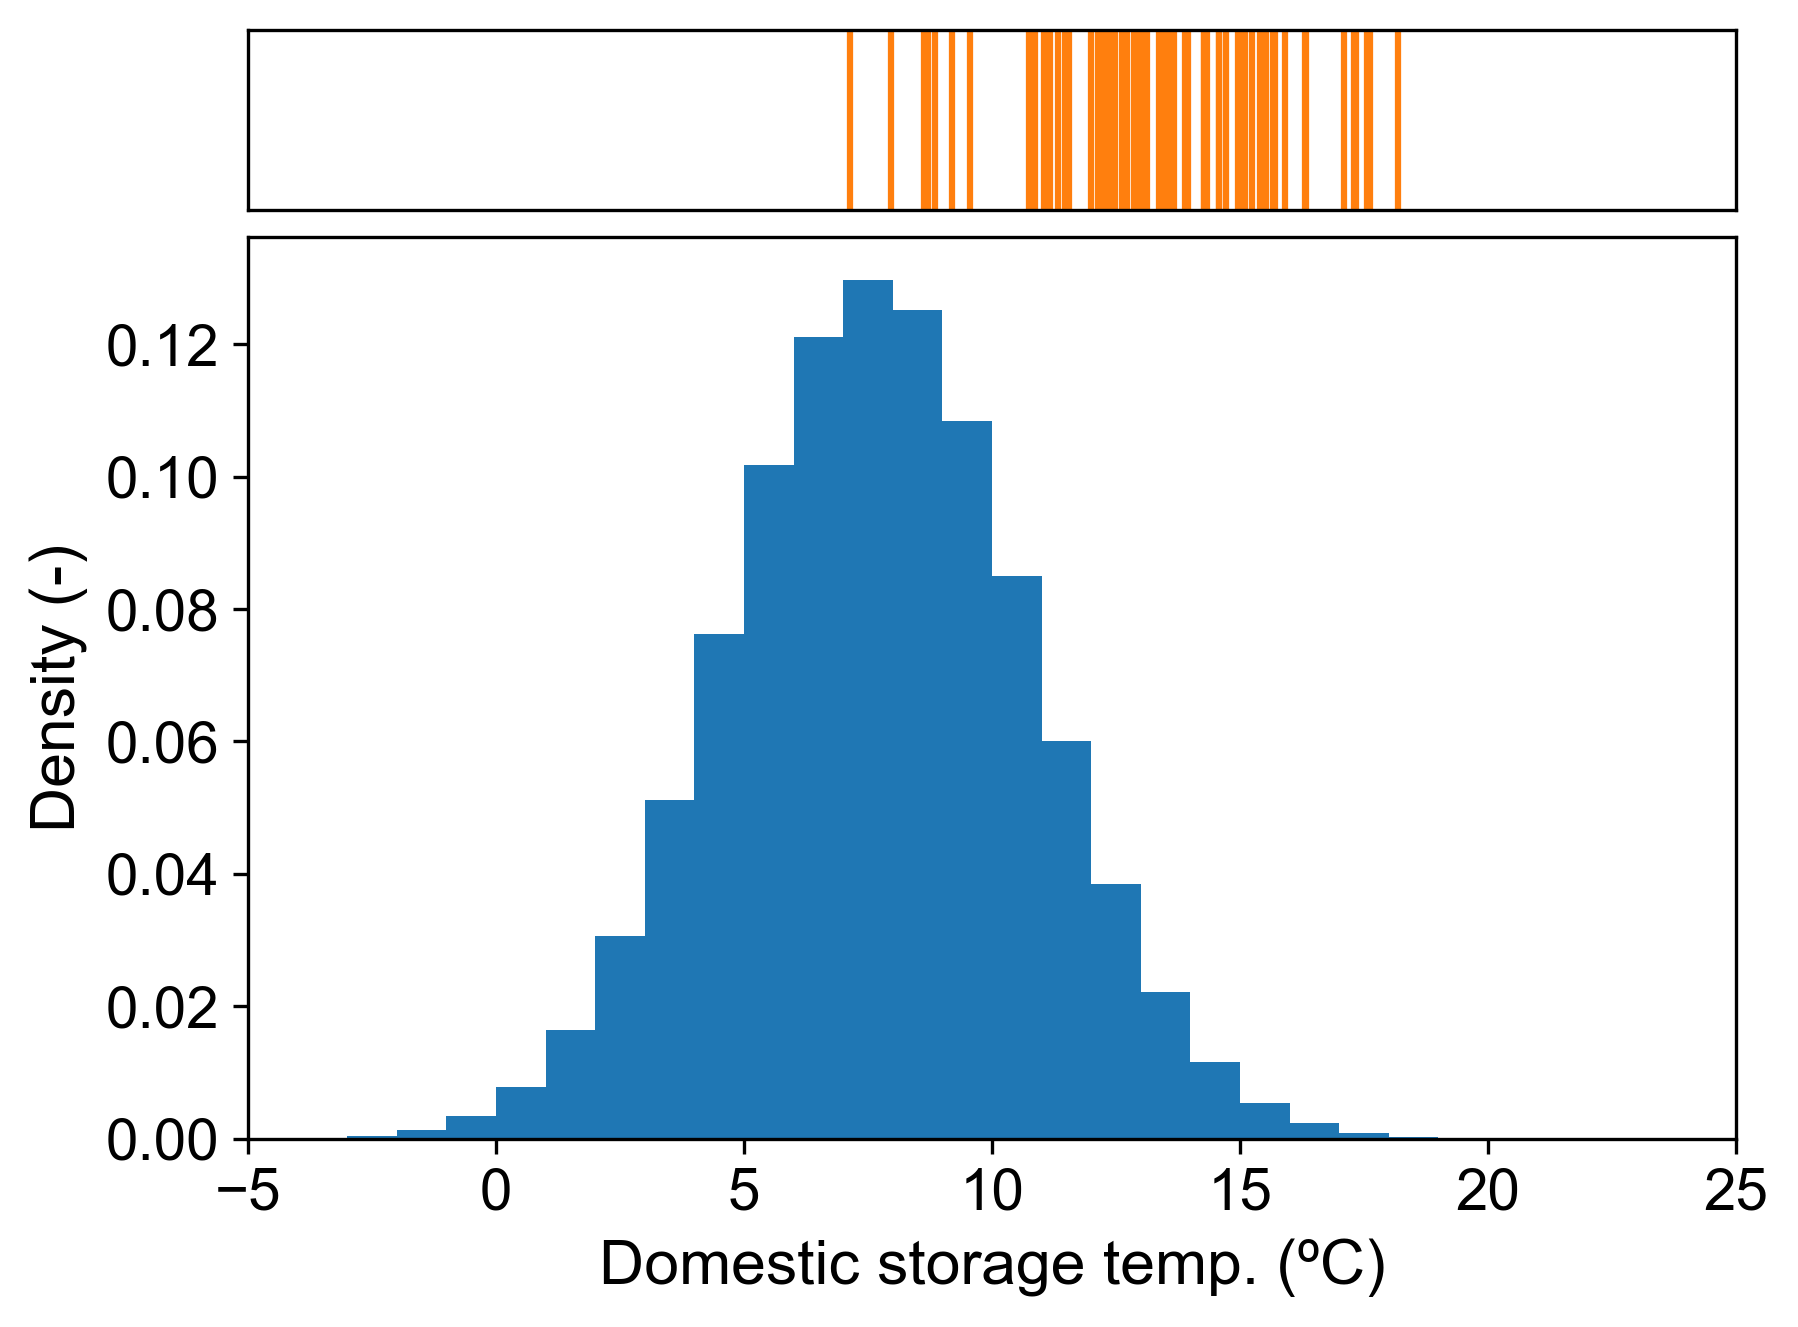

In [106]:


fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-5, 25])
ax[1].set_xlim([-5, 25])
for i in range(len(temp_heat_ill)):
    ax[0].axvline(x = temp_domestic_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(temp_domestic[prevalence_or_not==1], density="TRUE", range = (-5, 25), bins = 30)
ax[1].set_xlabel("Domestic storage temp. (ºC)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")
plt.savefig("Fig. 6a.pdf", bbox_inches="tight")
plt.show()

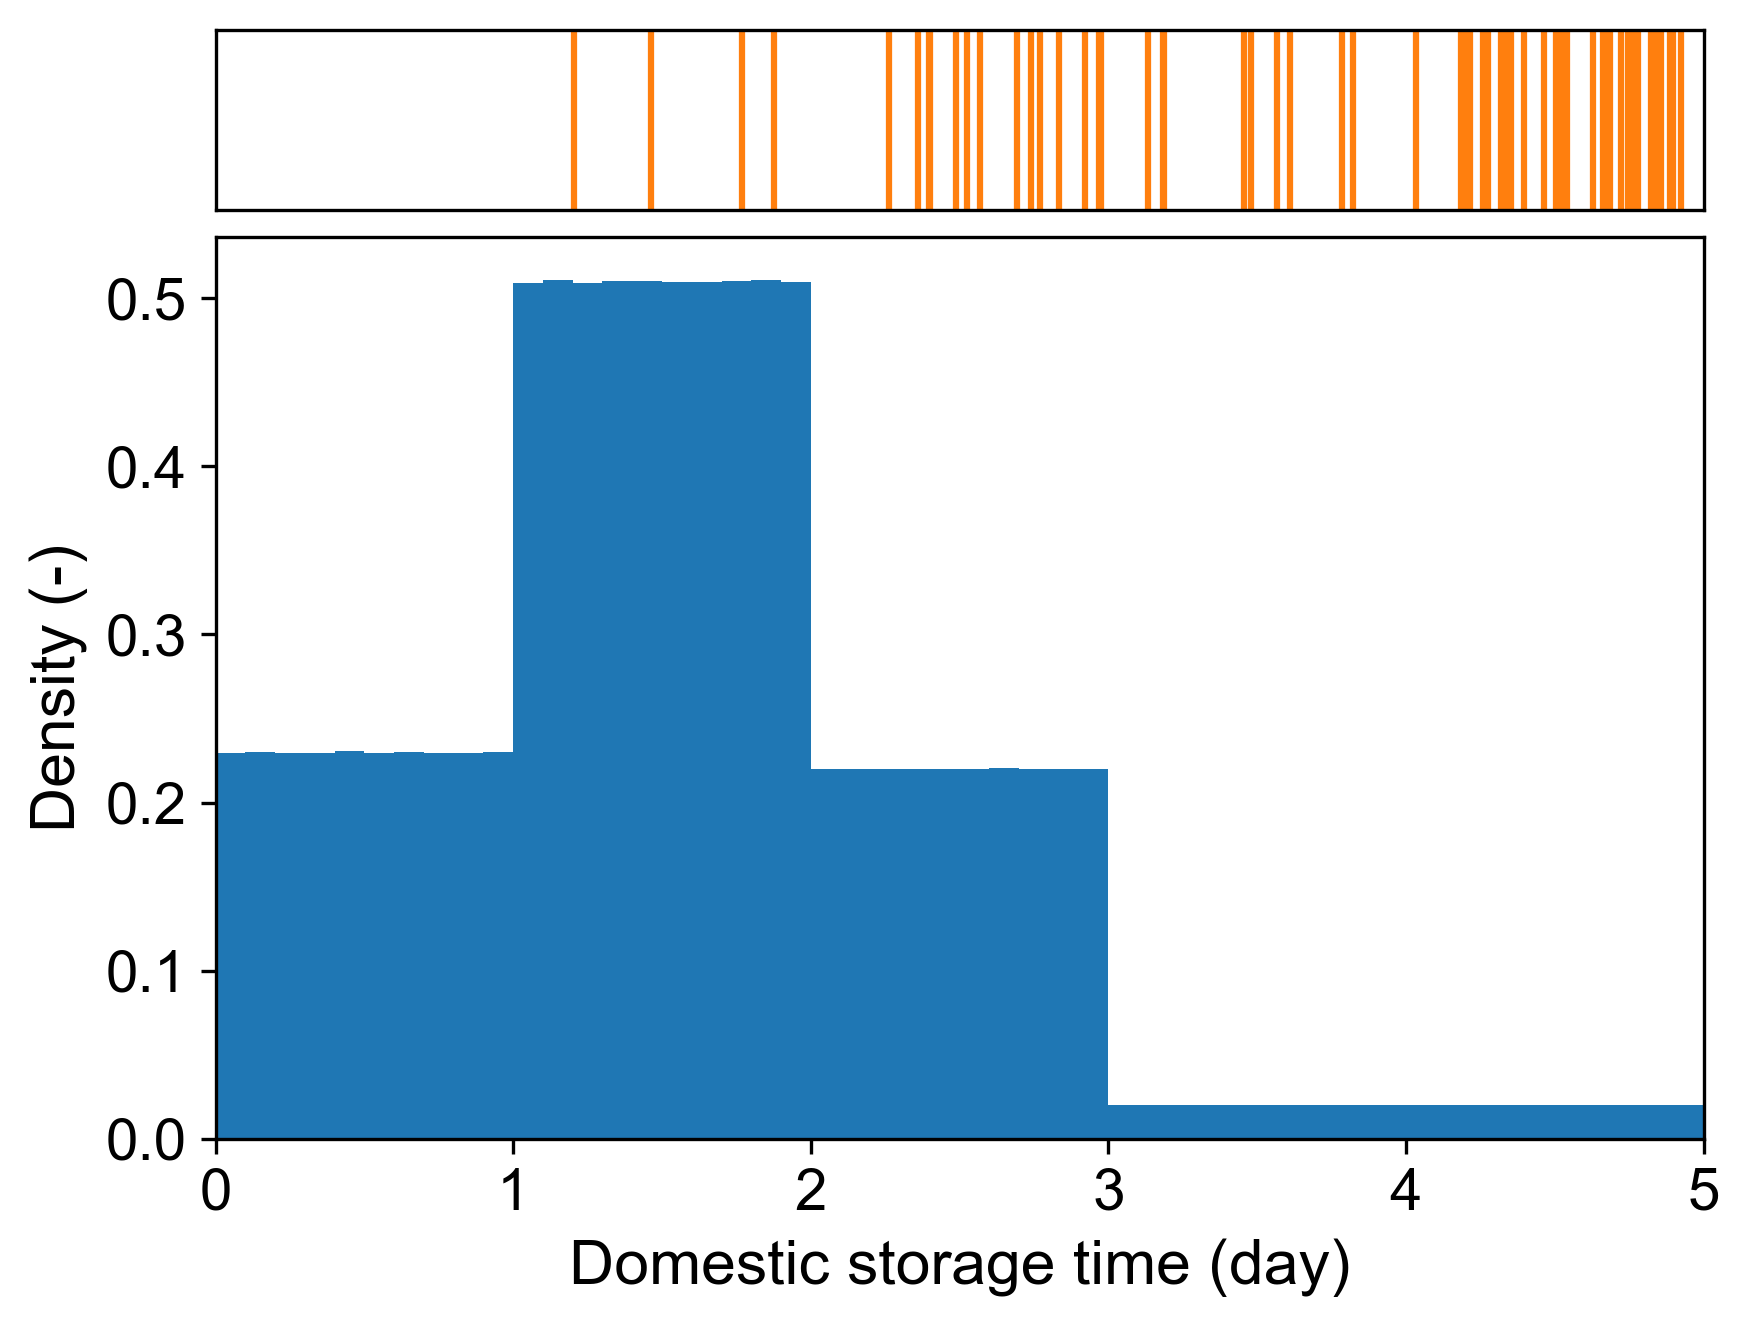

In [107]:

fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"


plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([0, 5])
ax[1].set_xlim([0, 5])
for i in range(len(temp_heat_ill)):
    ax[0].axvline(x = (time_domestic_ill/24)[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(time_domestic[prevalence_or_not==1]/24, density="TRUE", range = (0, 5), bins = 50)
ax[1].set_xlabel("Domestic storage time (day)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")
plt.savefig("Fig. 6b.pdf", bbox_inches="tight")
plt.show()

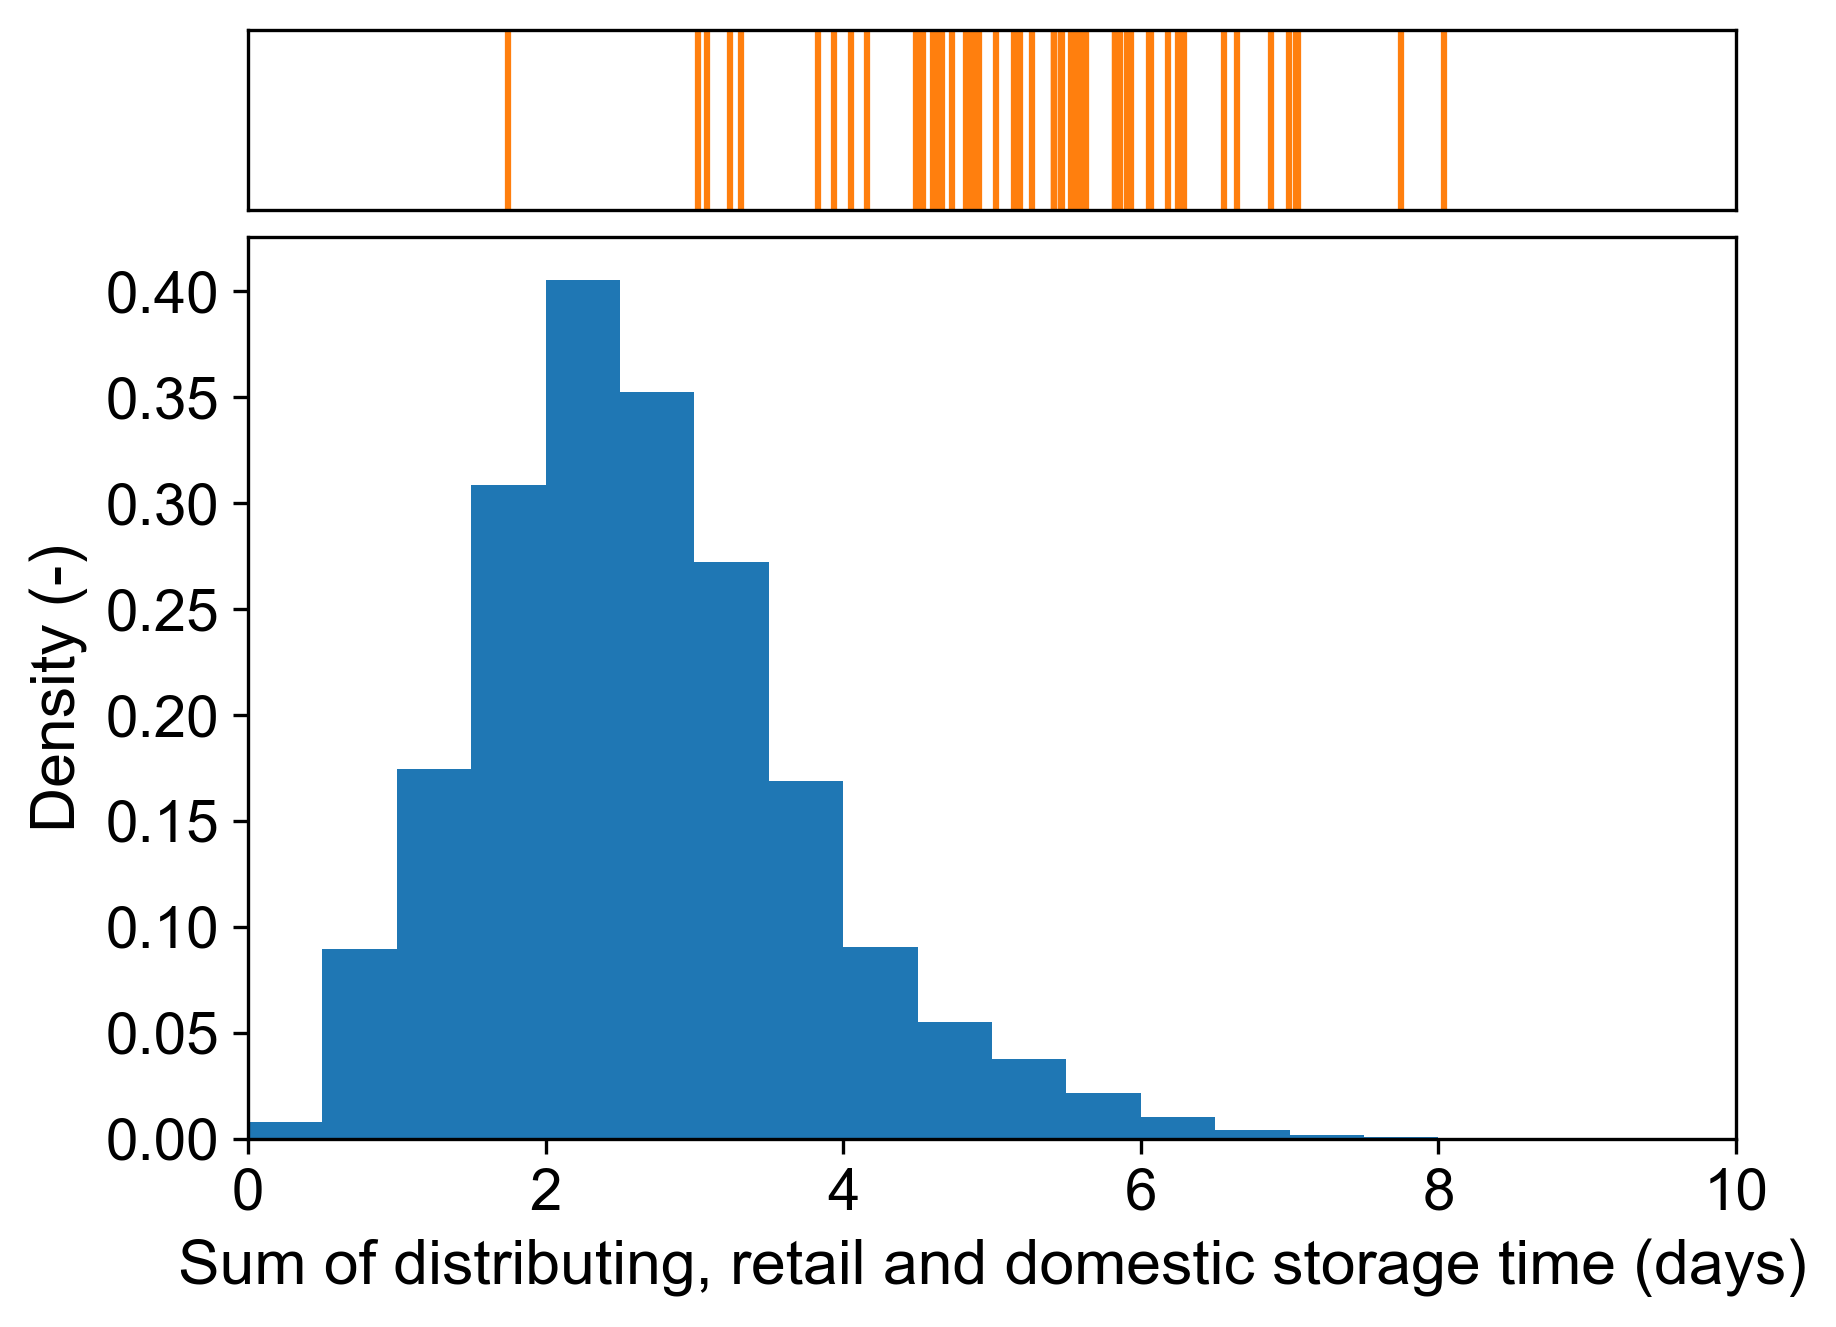

In [108]:


fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([0, 10])
ax[1].set_xlim([0, 10])
for i in range(len(((time_dist_ill+time_retail_ill+time_domestic_ill)/24))):
    ax[0].axvline(x = ((time_dist_ill+time_retail_ill+time_domestic_ill)/24)[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist((time_dist[prevalence_or_not==1]+time_retail[prevalence_or_not==1]+time_domestic[prevalence_or_not==1])/24, density="TRUE", range = (0, 10), bins = 20)
ax[1].set_xlabel("Sum of distributing, retail and domestic storage time (days)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")
plt.savefig("Fig. 8.pdf", bbox_inches="tight")
plt.show()

In [109]:
(time_dist_ill+time_retail_ill+time_domestic_ill)/24

0     5.023722
1     5.471501
2     4.526642
3     4.633399
4     7.046186
        ...   
56    3.081860
57    5.419266
58    4.485778
59    5.144023
60    6.056674
Length: 61, dtype: float64

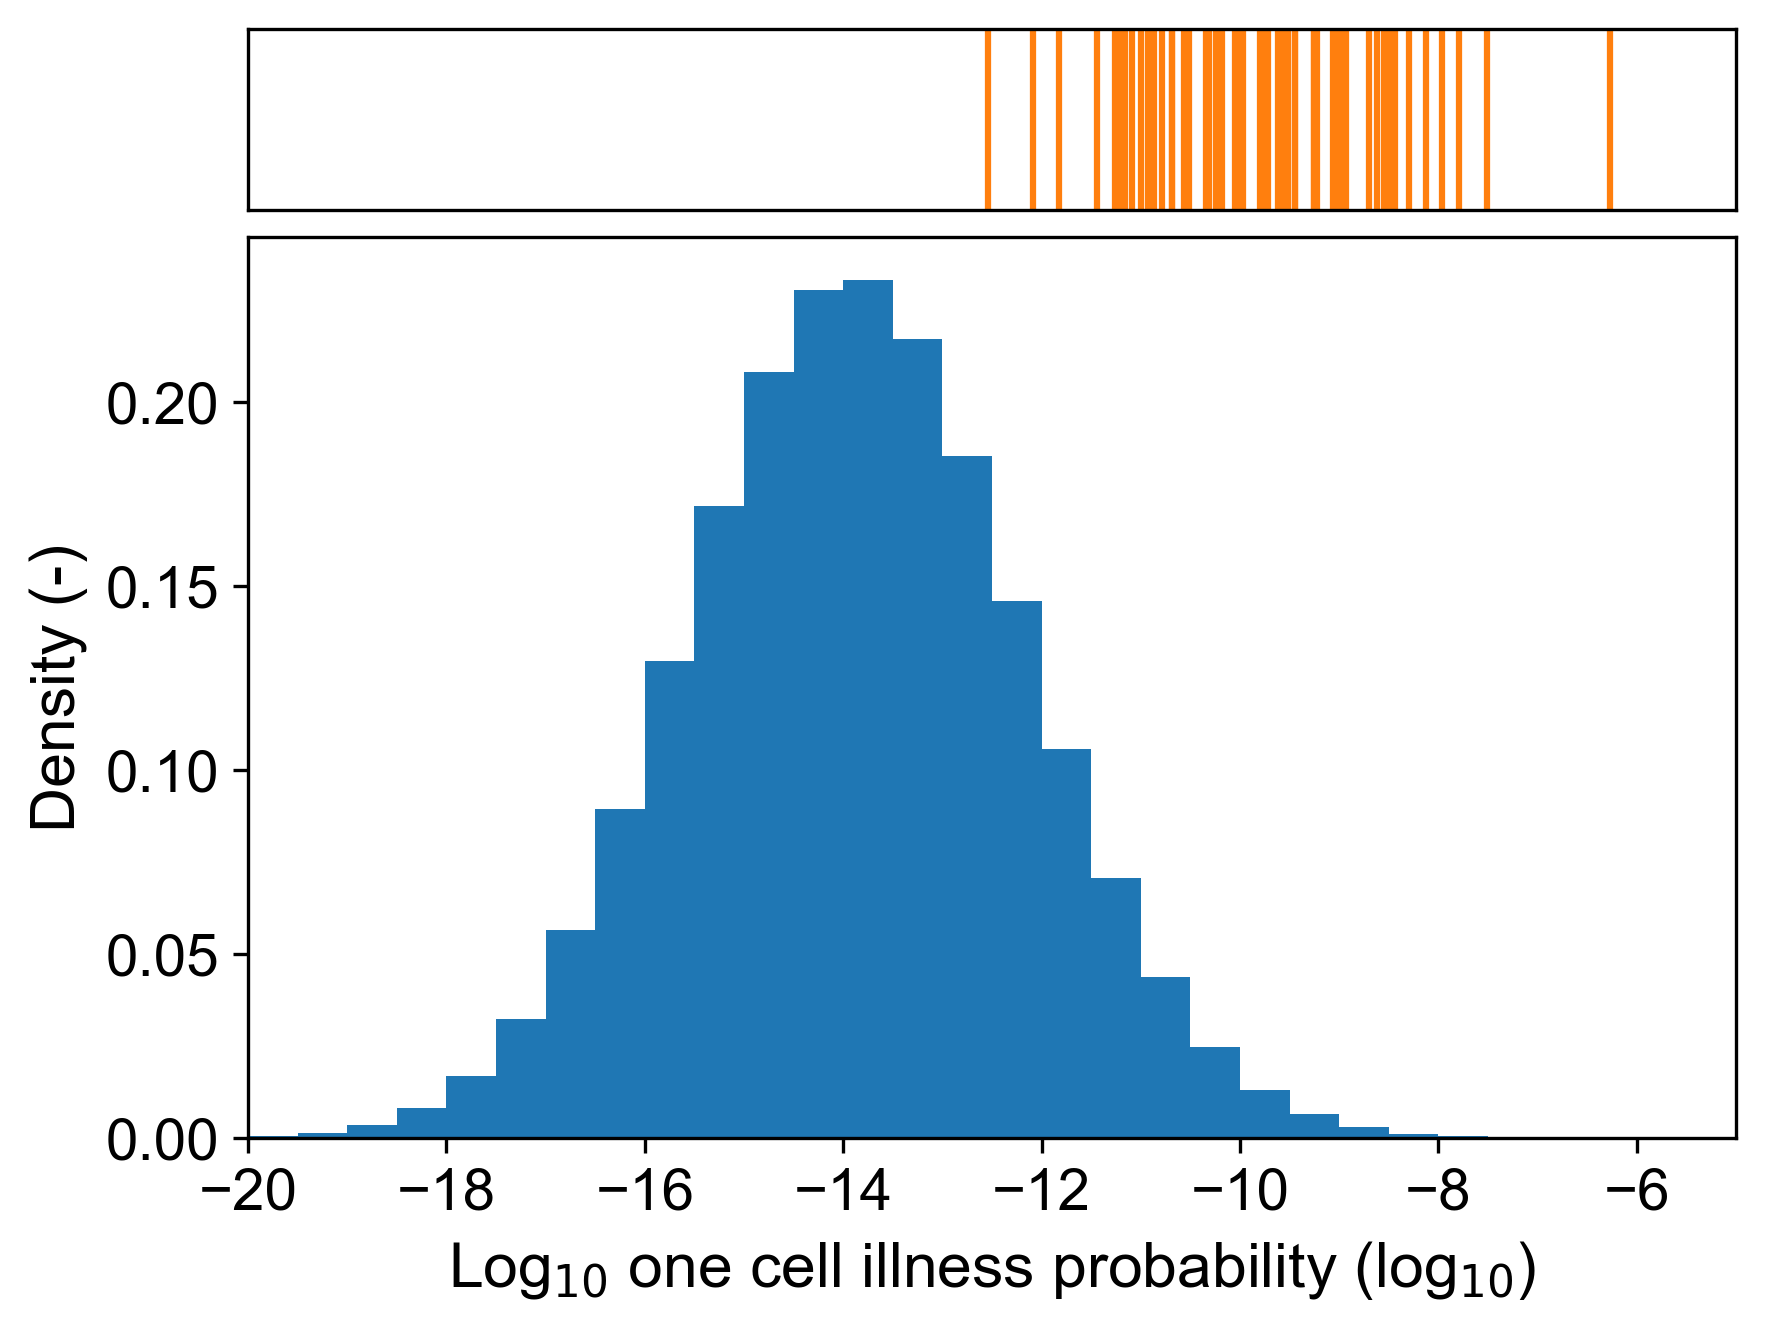

In [110]:


fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"


plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-20, -5])
ax[1].set_xlim([-20, -5])
for i in range(len(subj_class_ill[subj_class_ill==1])):
    ax[0].axvline(x = np.log10(list(para_r_ill[subj_class_ill==1])[i]), ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)

for i in range(len(subj_class_ill[subj_class_ill==3])):
    ax[0].axvline(x = np.log10(list(para_r_ill[subj_class_ill==3])[i]), ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
        
for i in range(len(subj_class_ill[subj_class_ill==2])):
    ax[0].axvline(x = np.log10(list(para_r_ill[subj_class_ill==2])[i]), ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)

        
ax[1].hist(np.log10(para_r[prevalence_or_not==1]), density="TRUE", range = (-20, -5), bins = 30)
ax[1].set_xlabel("Log$_{10}$ one cell illness probability (log$_{10}$)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")
plt.savefig("Fig. 7c.pdf", bbox_inches="tight")
plt.show()

In [111]:
list(para_r_ill[subj_class_ill==2])[0]

1.0273661591537012e-09

In [112]:
np.log10(para_r_ill)

0    -10.687813
1     -8.988275
2     -8.128913
3     -9.226948
4    -12.545265
        ...    
56    -9.737877
57   -10.513788
58    -9.449247
59    -6.266430
60   -10.335606
Name: para_r_ill, Length: 61, dtype: float64

In [113]:
np.max(logN_domestic)

8.438768041322955

In [114]:
Cases_iter = np.sum(Ill_or_not)
print(Cases_iter/Iteration)

2e-08


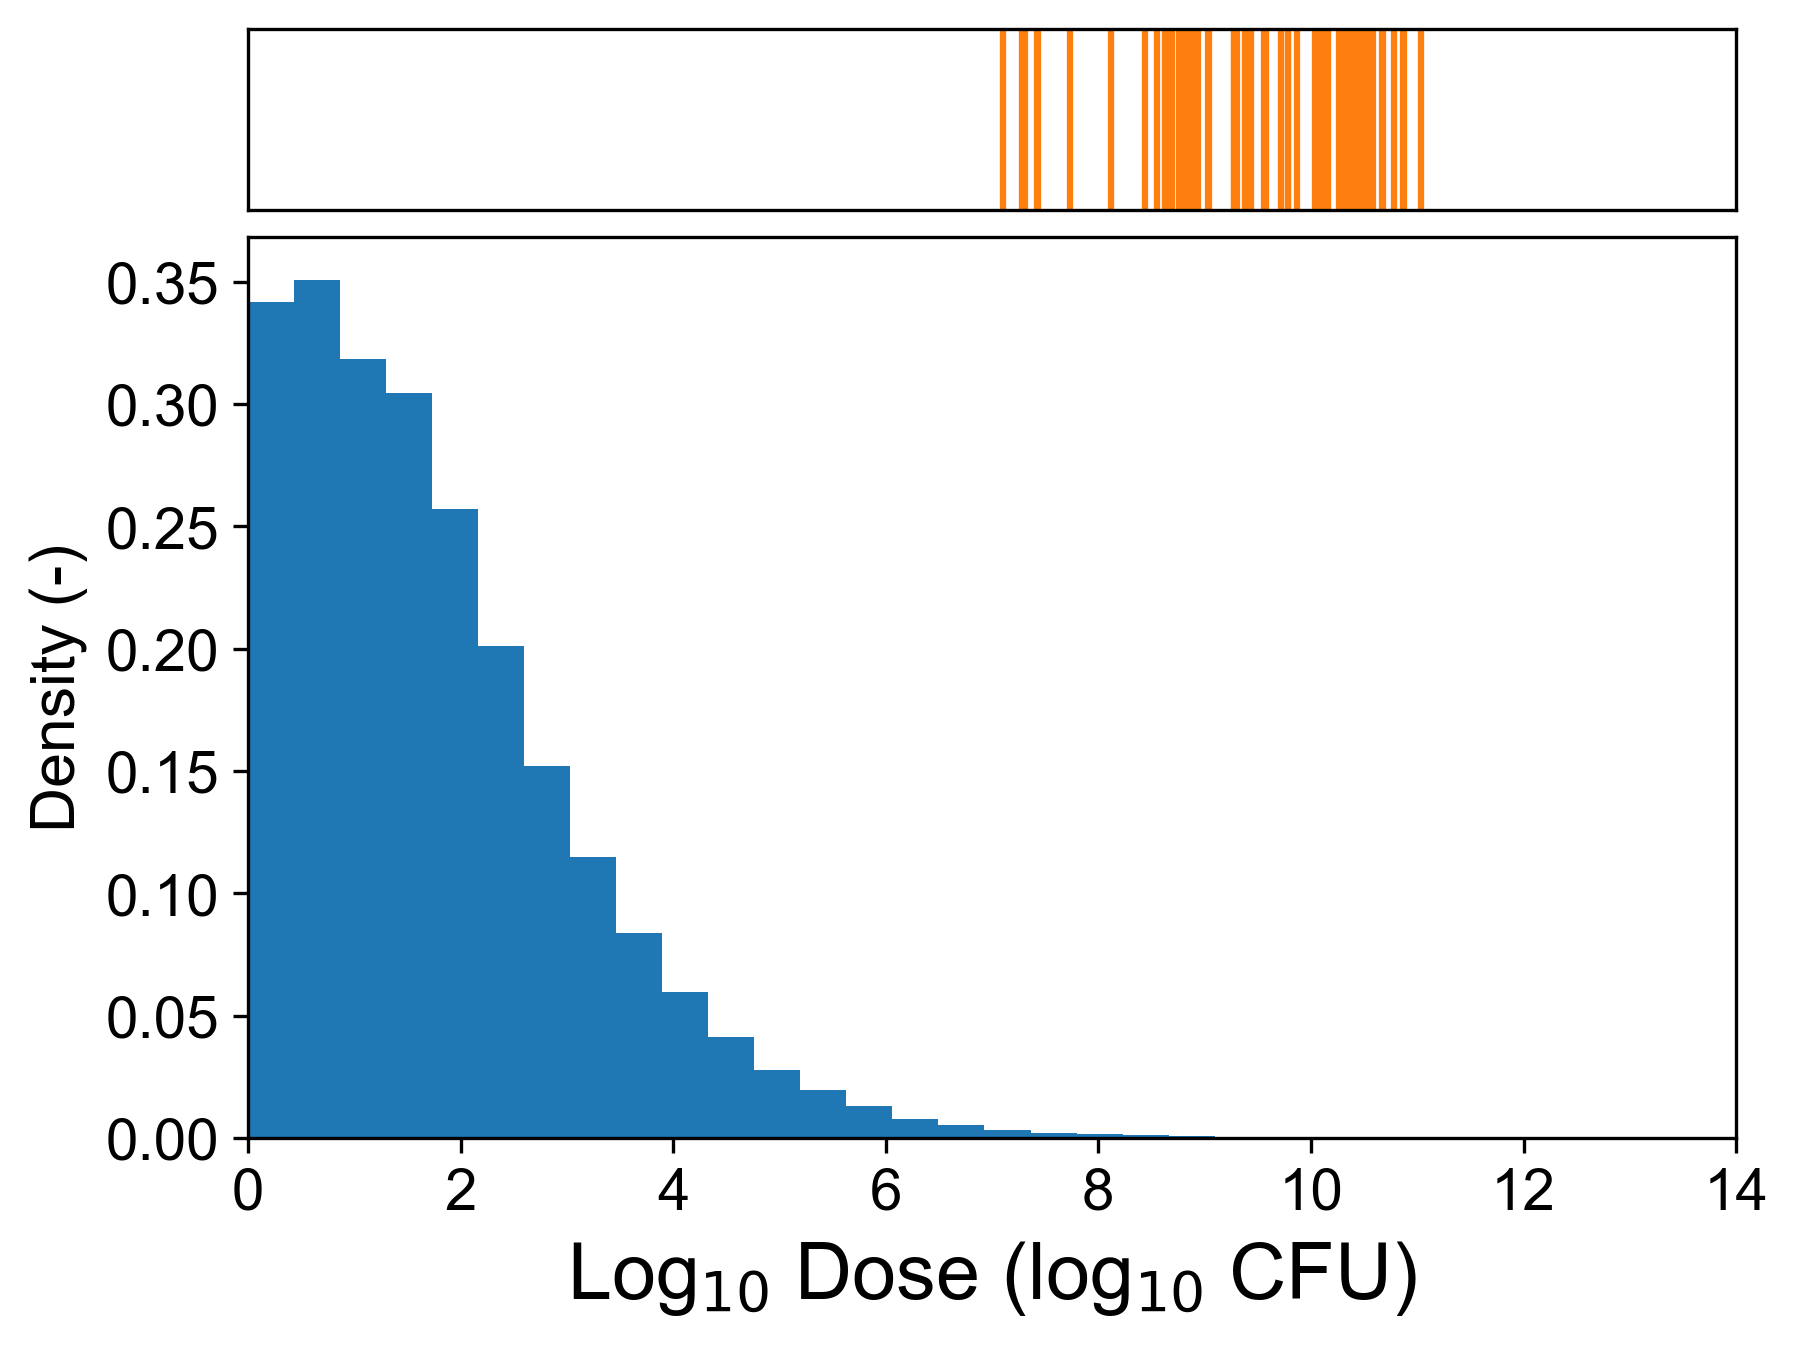

In [115]:

fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"


plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([0, 14])
ax[1].set_xlim([0, 14])
for i in range(len(logN_dose_ill)):
    ax[0].axvline(x = logN_dose_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(logN_dose[logN_dose!=float('-inf')], density="TRUE", bins = 25)
ax[1].set_xlabel("Log$_{10}$ Dose (log$_{10}$ CFU)",size=19,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")
plt.savefig("Fig. 2.pdf", bbox_inches="tight")
plt.show()

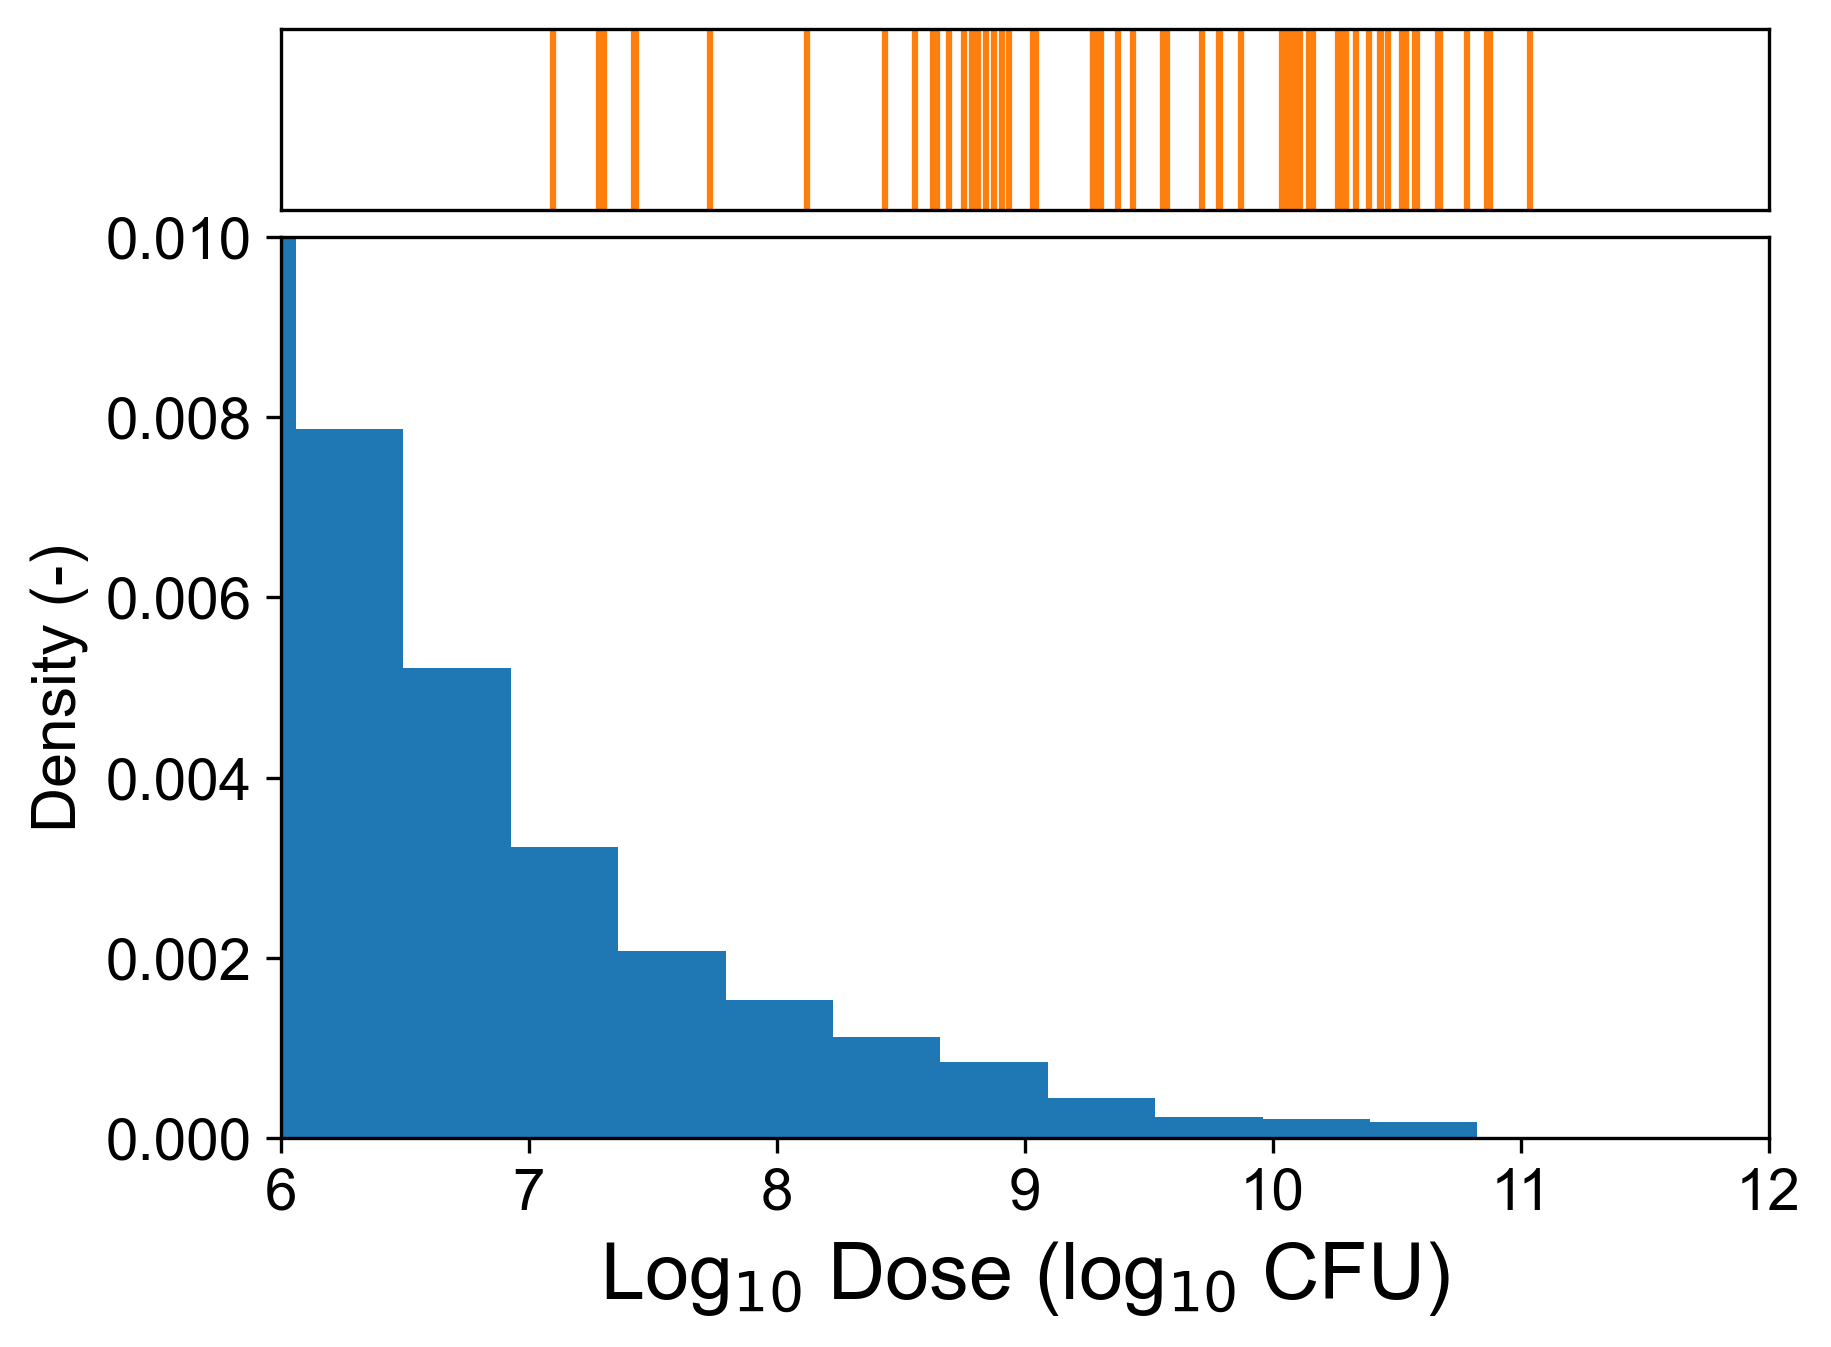

In [116]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([6, 12])
ax[1].set_xlim([6, 12])
ax[1].set_ylim([0, 0.010])
for i in range(len(logN_dose_ill)):
    ax[0].axvline(x = logN_dose_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(logN_dose[logN_dose!=float('-inf')], density="TRUE", bins = 25)
ax[1].set_xlabel("Log$_{10}$ Dose (log$_{10}$ CFU)",size=19,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

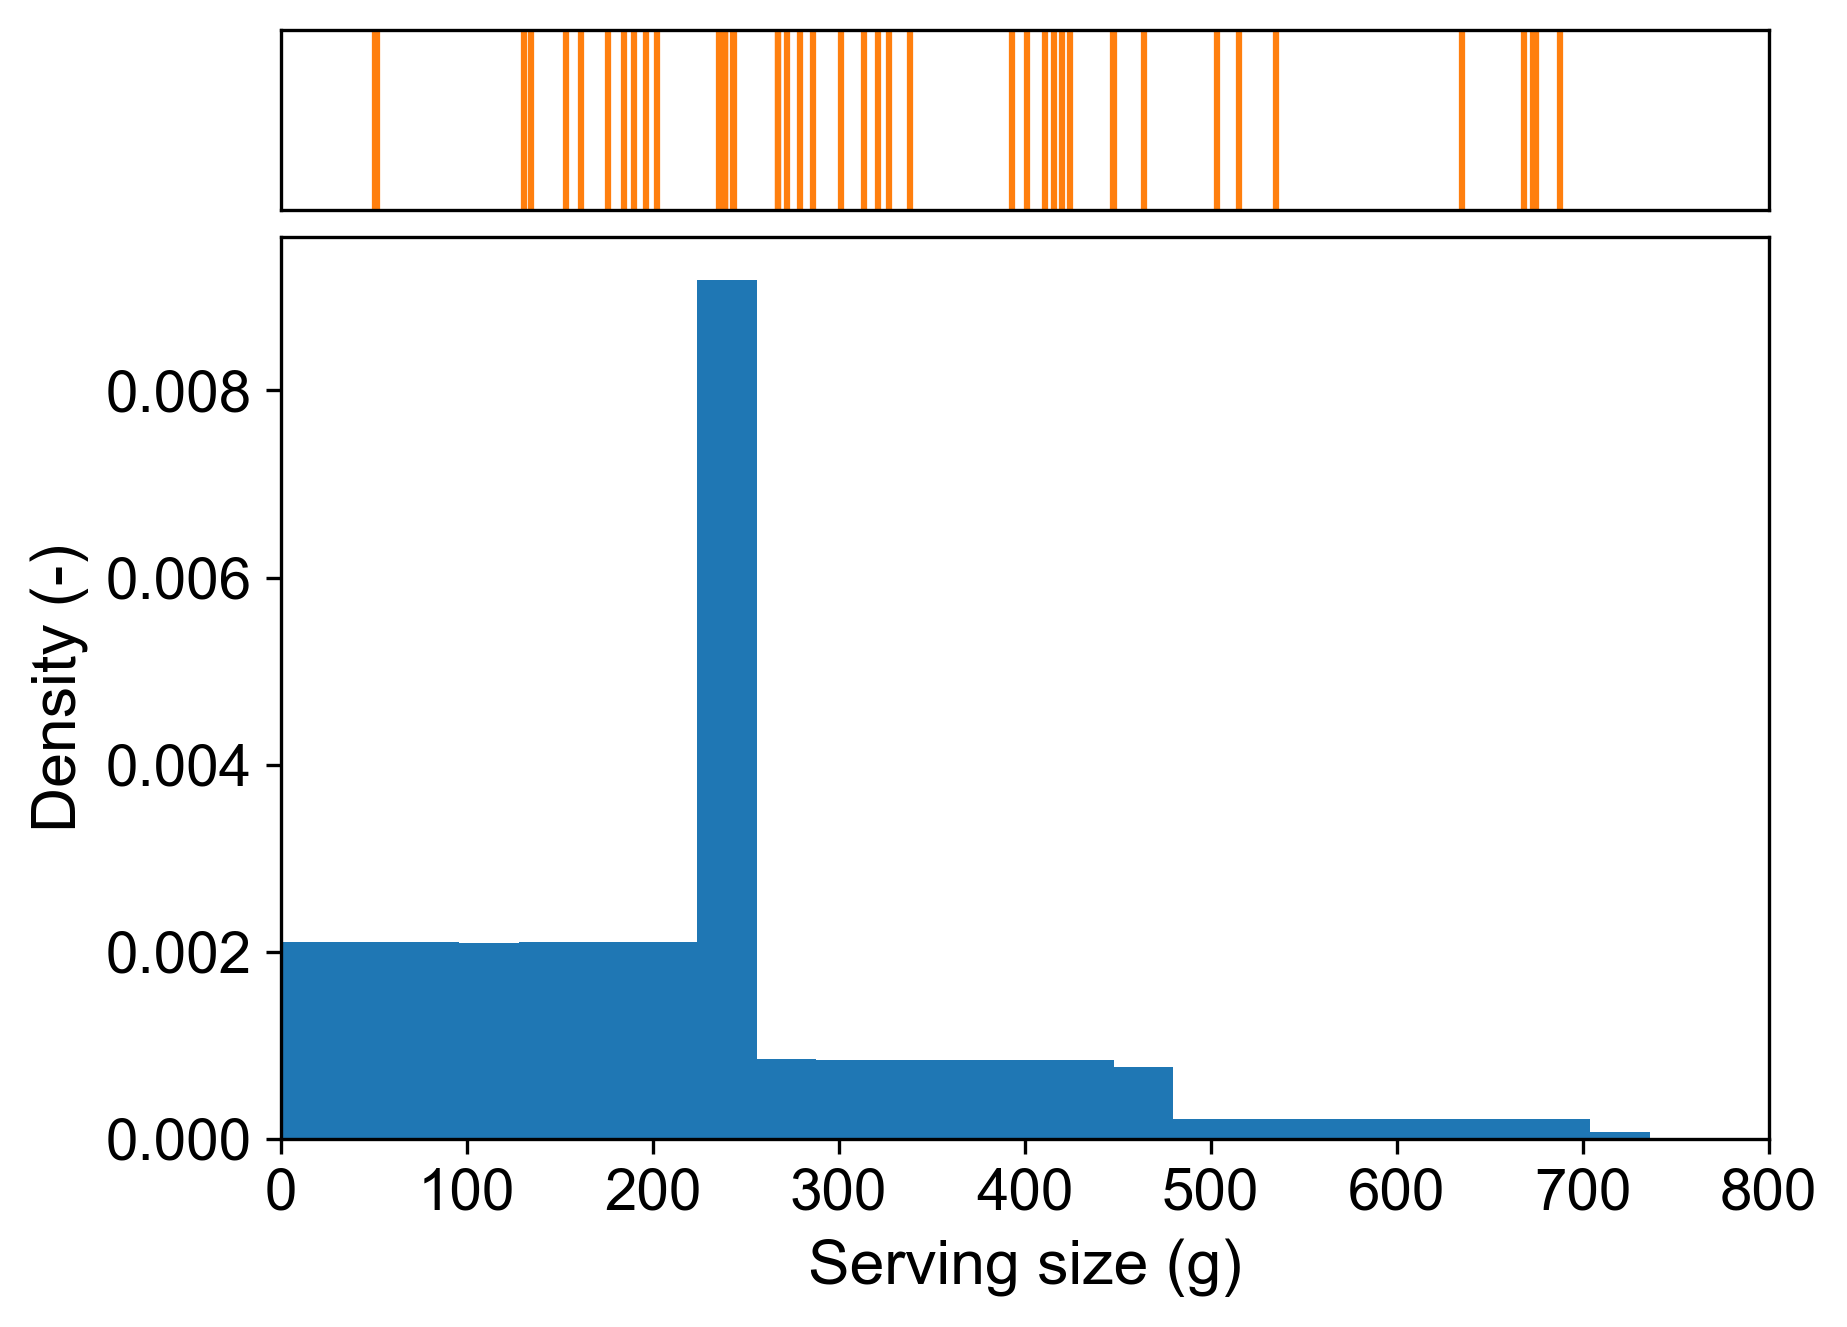

In [117]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([0, 800])
ax[1].set_xlim([0, 800])
for i in range(len(size_serve_ill)):
    ax[0].axvline(x = size_serve_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(size_serve[prevalence_or_not==1],density="TRUE", range = (0, 800), bins = 25)
ax[1].set_xlabel("Serving size (g)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

In [118]:
np.mean(size_serve[prevalence_or_not==1])

220.46618819241547

In [119]:
42*1000/np.mean(size_serve[prevalence_or_not==1])*17000000

3238591848.7275915

In [120]:
42*1000/np.mean(size_serve[prevalence_or_not==1])*17000000*len(para_r_ill)/Iteration/CopyNum

19.75541027723831

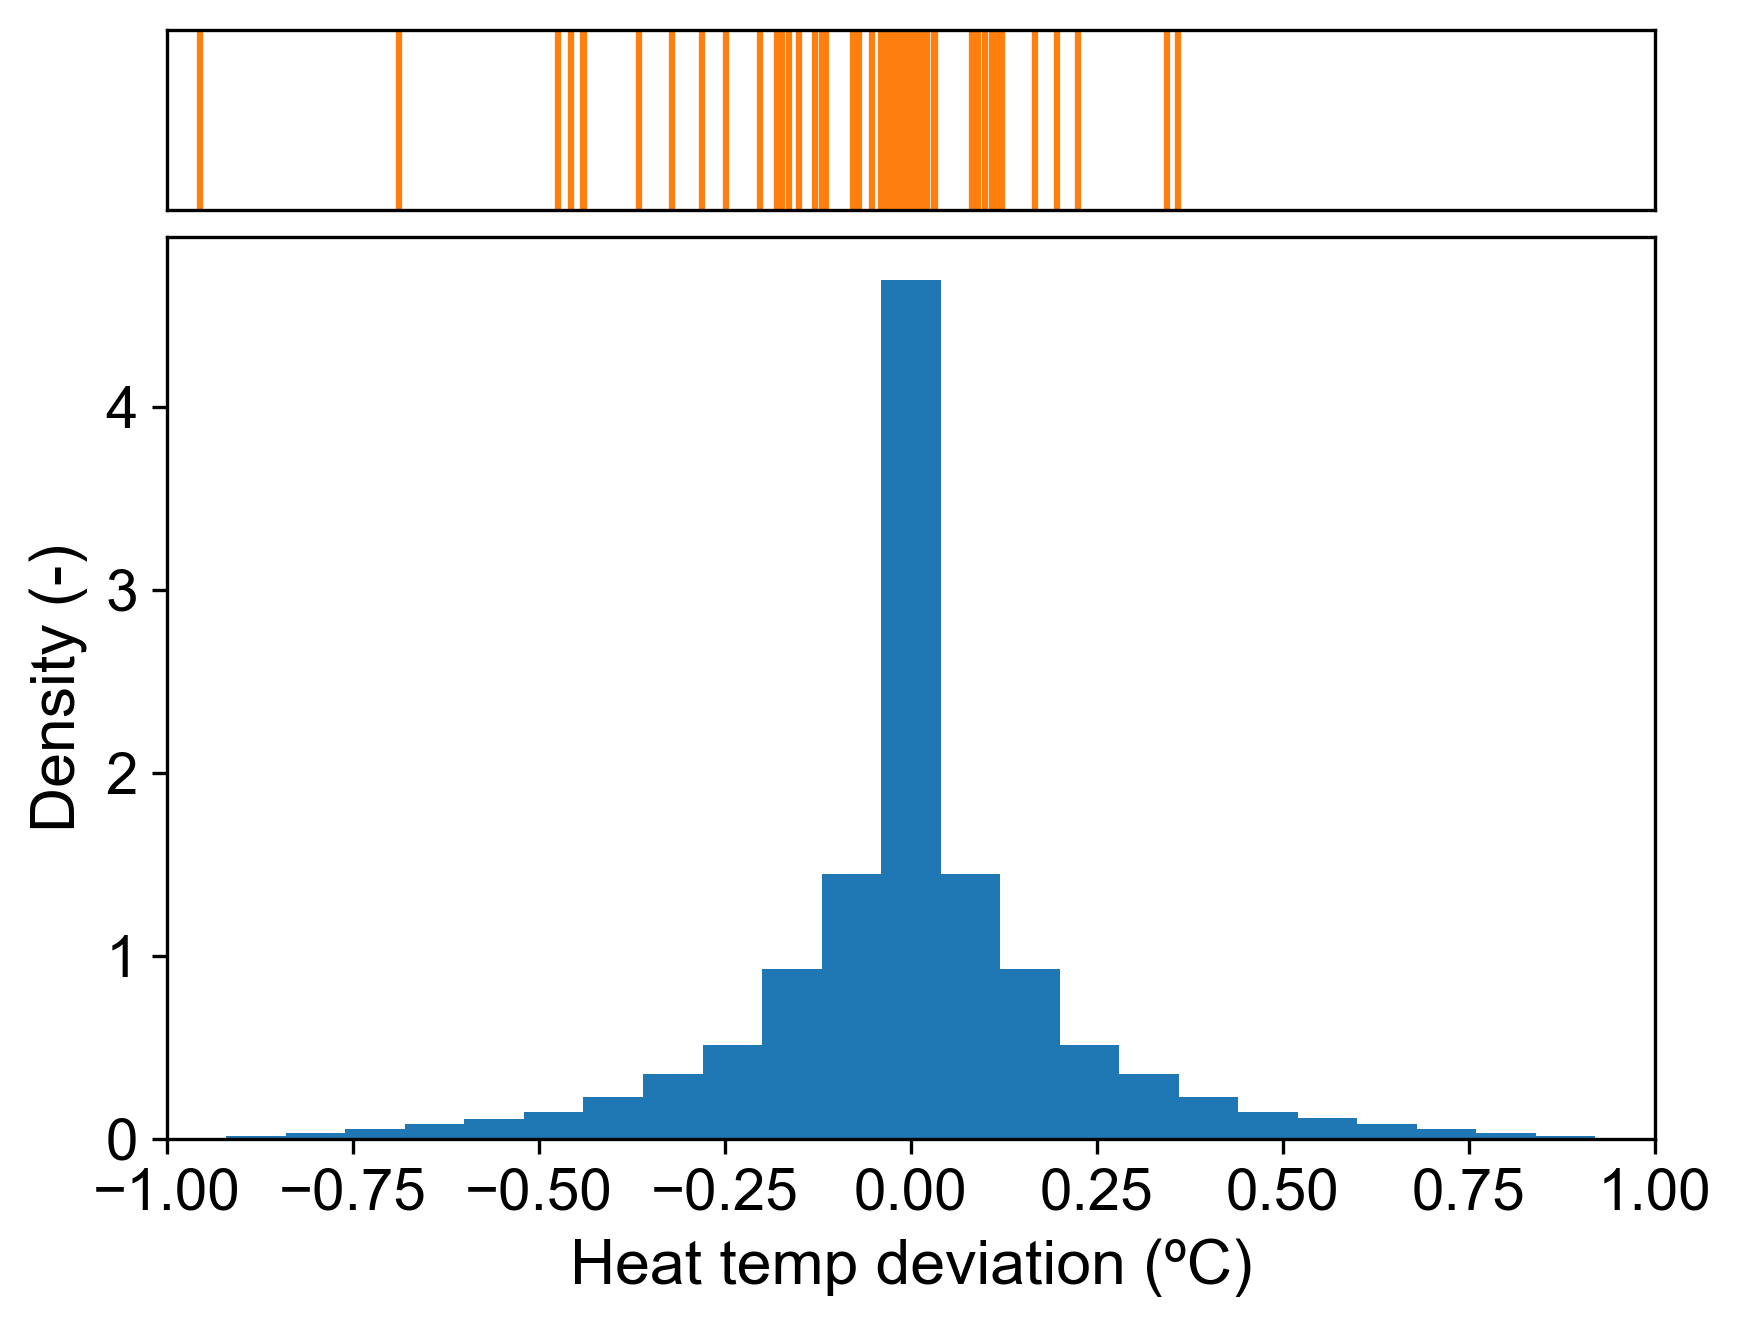

In [121]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-1, 1])
ax[1].set_xlim([-1, 1])
for i in range(len(size_serve_ill)):
    ax[0].axvline(x = heat_temp_uncertainty_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(heat_temp_uncertainty[prevalence_or_not==1],density="TRUE", range = (-1, 1), bins = 25)
ax[1].set_xlabel("Heat temp deviation (ºC)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.savefig("Fig. S4a.pdf", bbox_inches="tight")
plt.show()

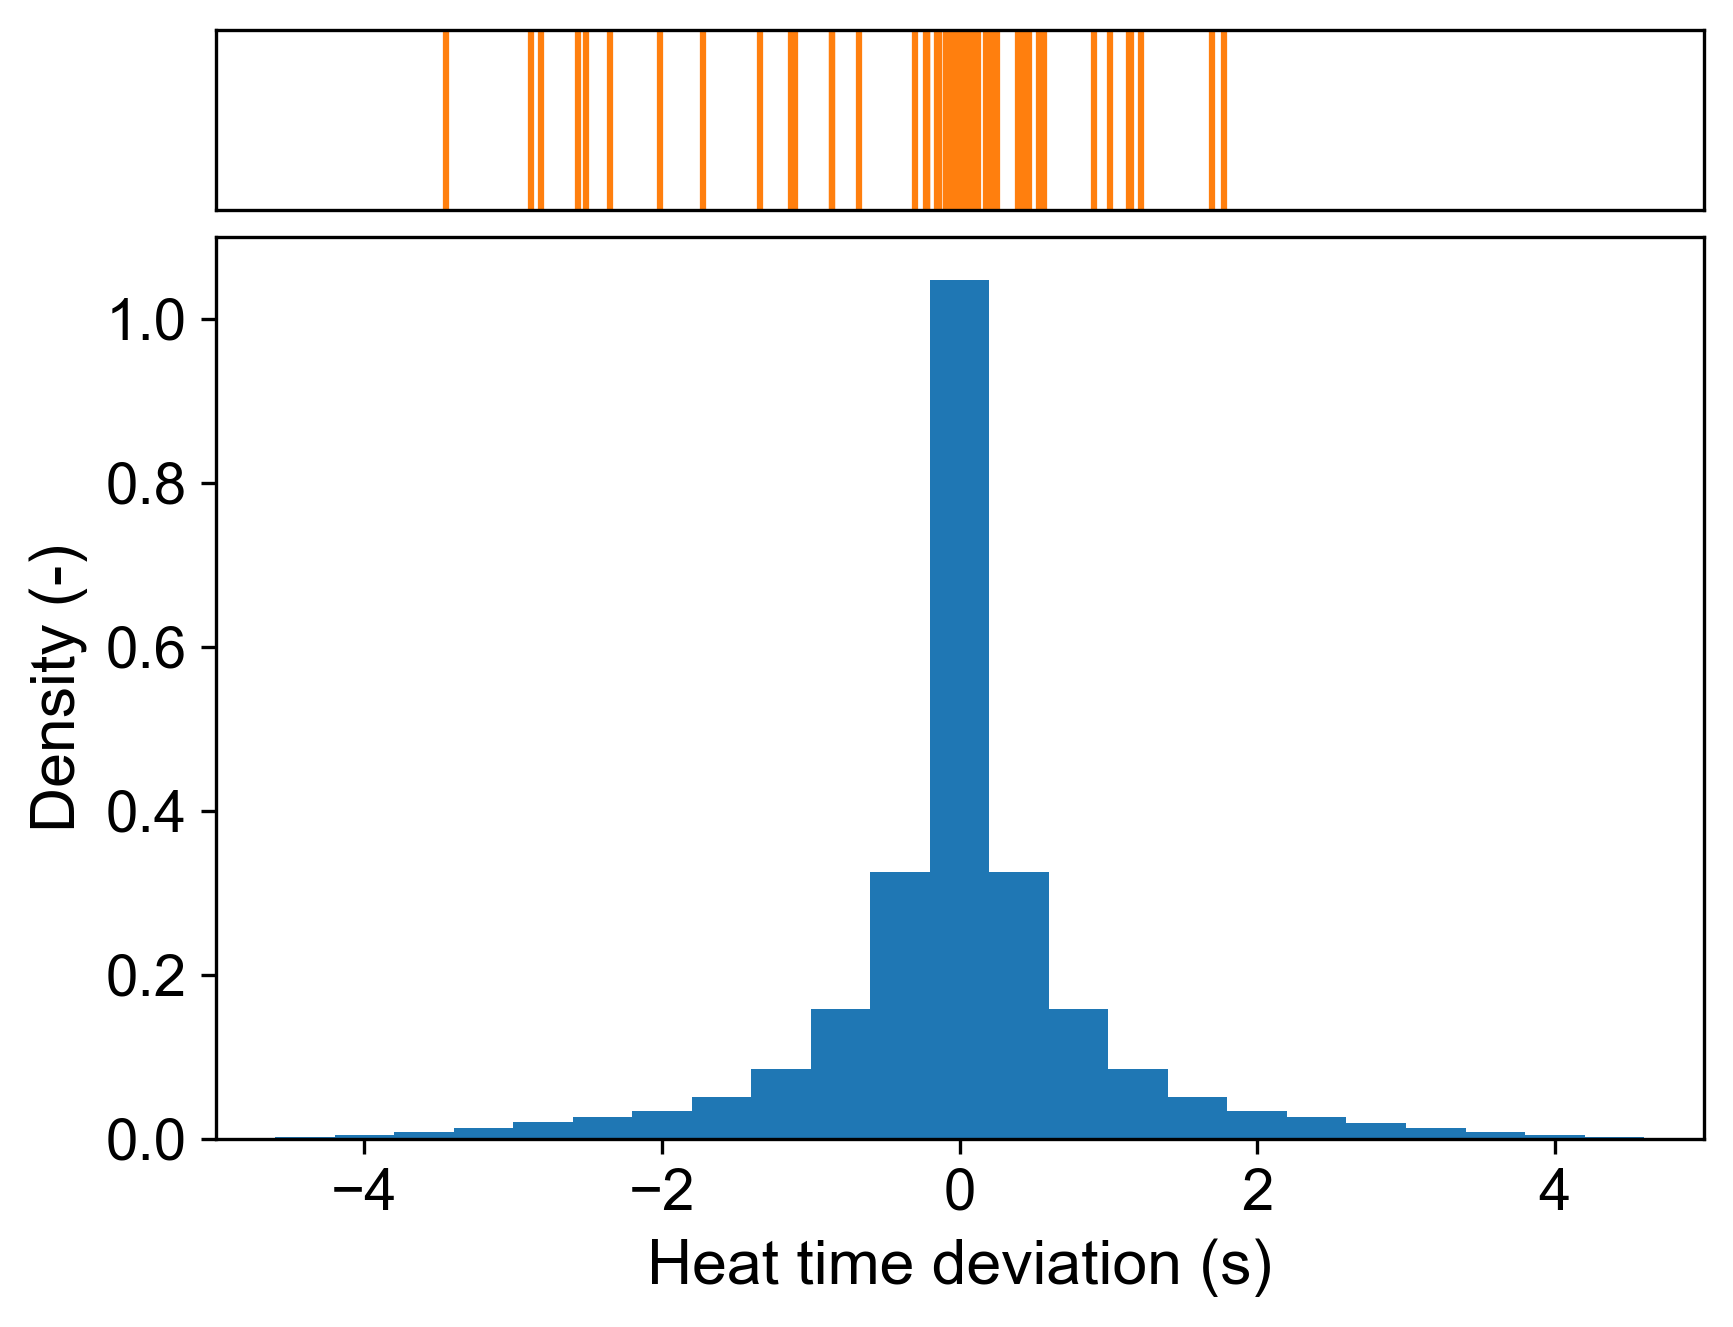

In [122]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"


plt.xticks(size=14)
plt.yticks(size=14)


ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-5, 5])
ax[1].set_xlim([-5, 5])
for i in range(len(size_serve_ill)):
    ax[0].axvline(x = heat_time_variability_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(heat_time_variability[prevalence_or_not==1],density="TRUE", range = (-5, 5), bins = 25)
ax[1].set_xlabel("Heat time deviation (s)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.savefig("Fig. S4b.pdf", bbox_inches="tight")
plt.show()

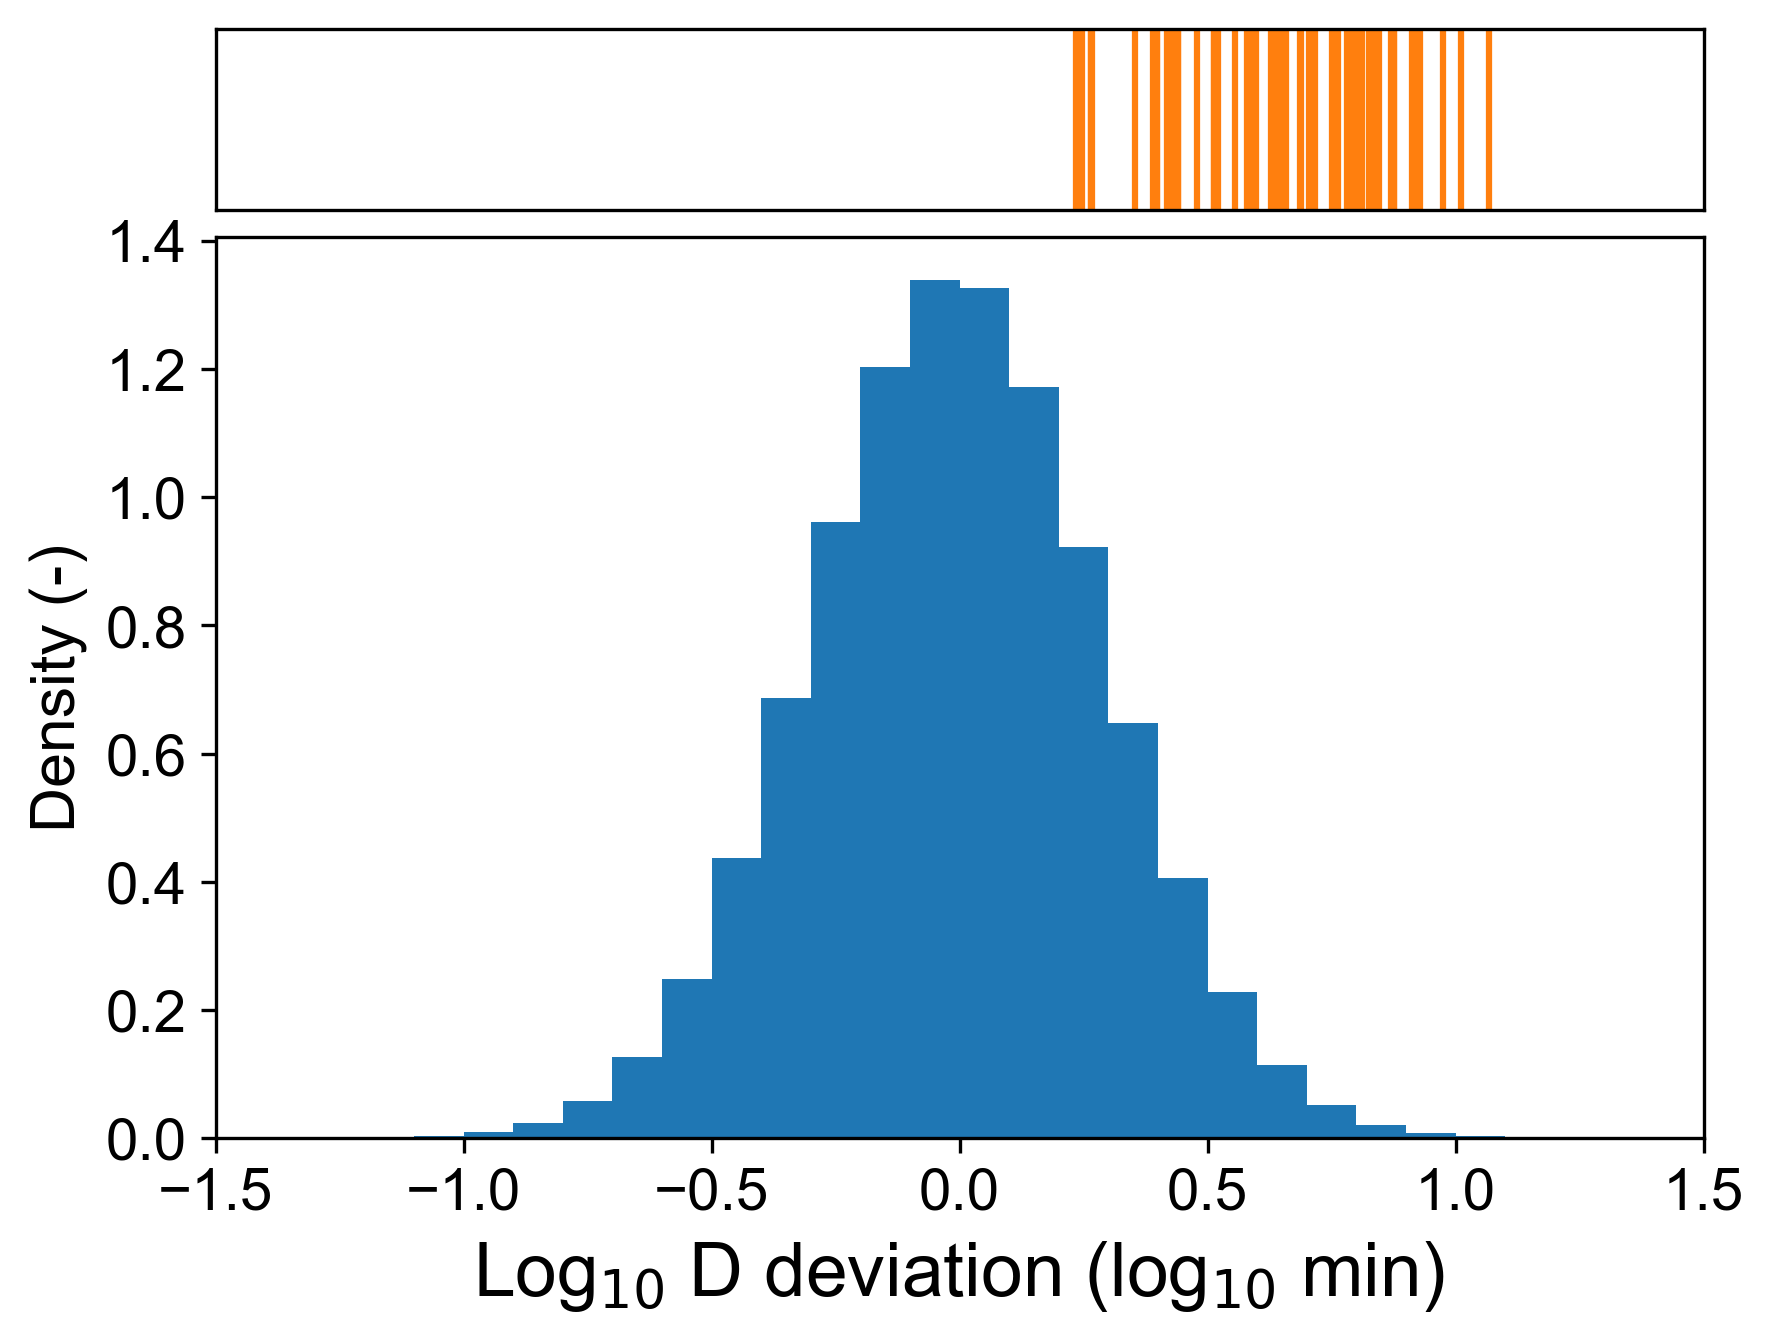

In [123]:


fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)


ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-1.5, 1.5])
ax[1].set_xlim([-1.5, 1.5])
for i in range(len(logD_variability_ill)):
    ax[0].axvline(x = logD_variability_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(logD_variability[prevalence_or_not==1],density="TRUE", range = (-1.5, 1.5), bins = 30)
ax[1].set_xlabel("Log$_{10}$ D deviation (log$_{10}$ min)", size=18, fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")
plt.savefig("Fig. 7a.pdf", bbox_inches="tight")
plt.show()

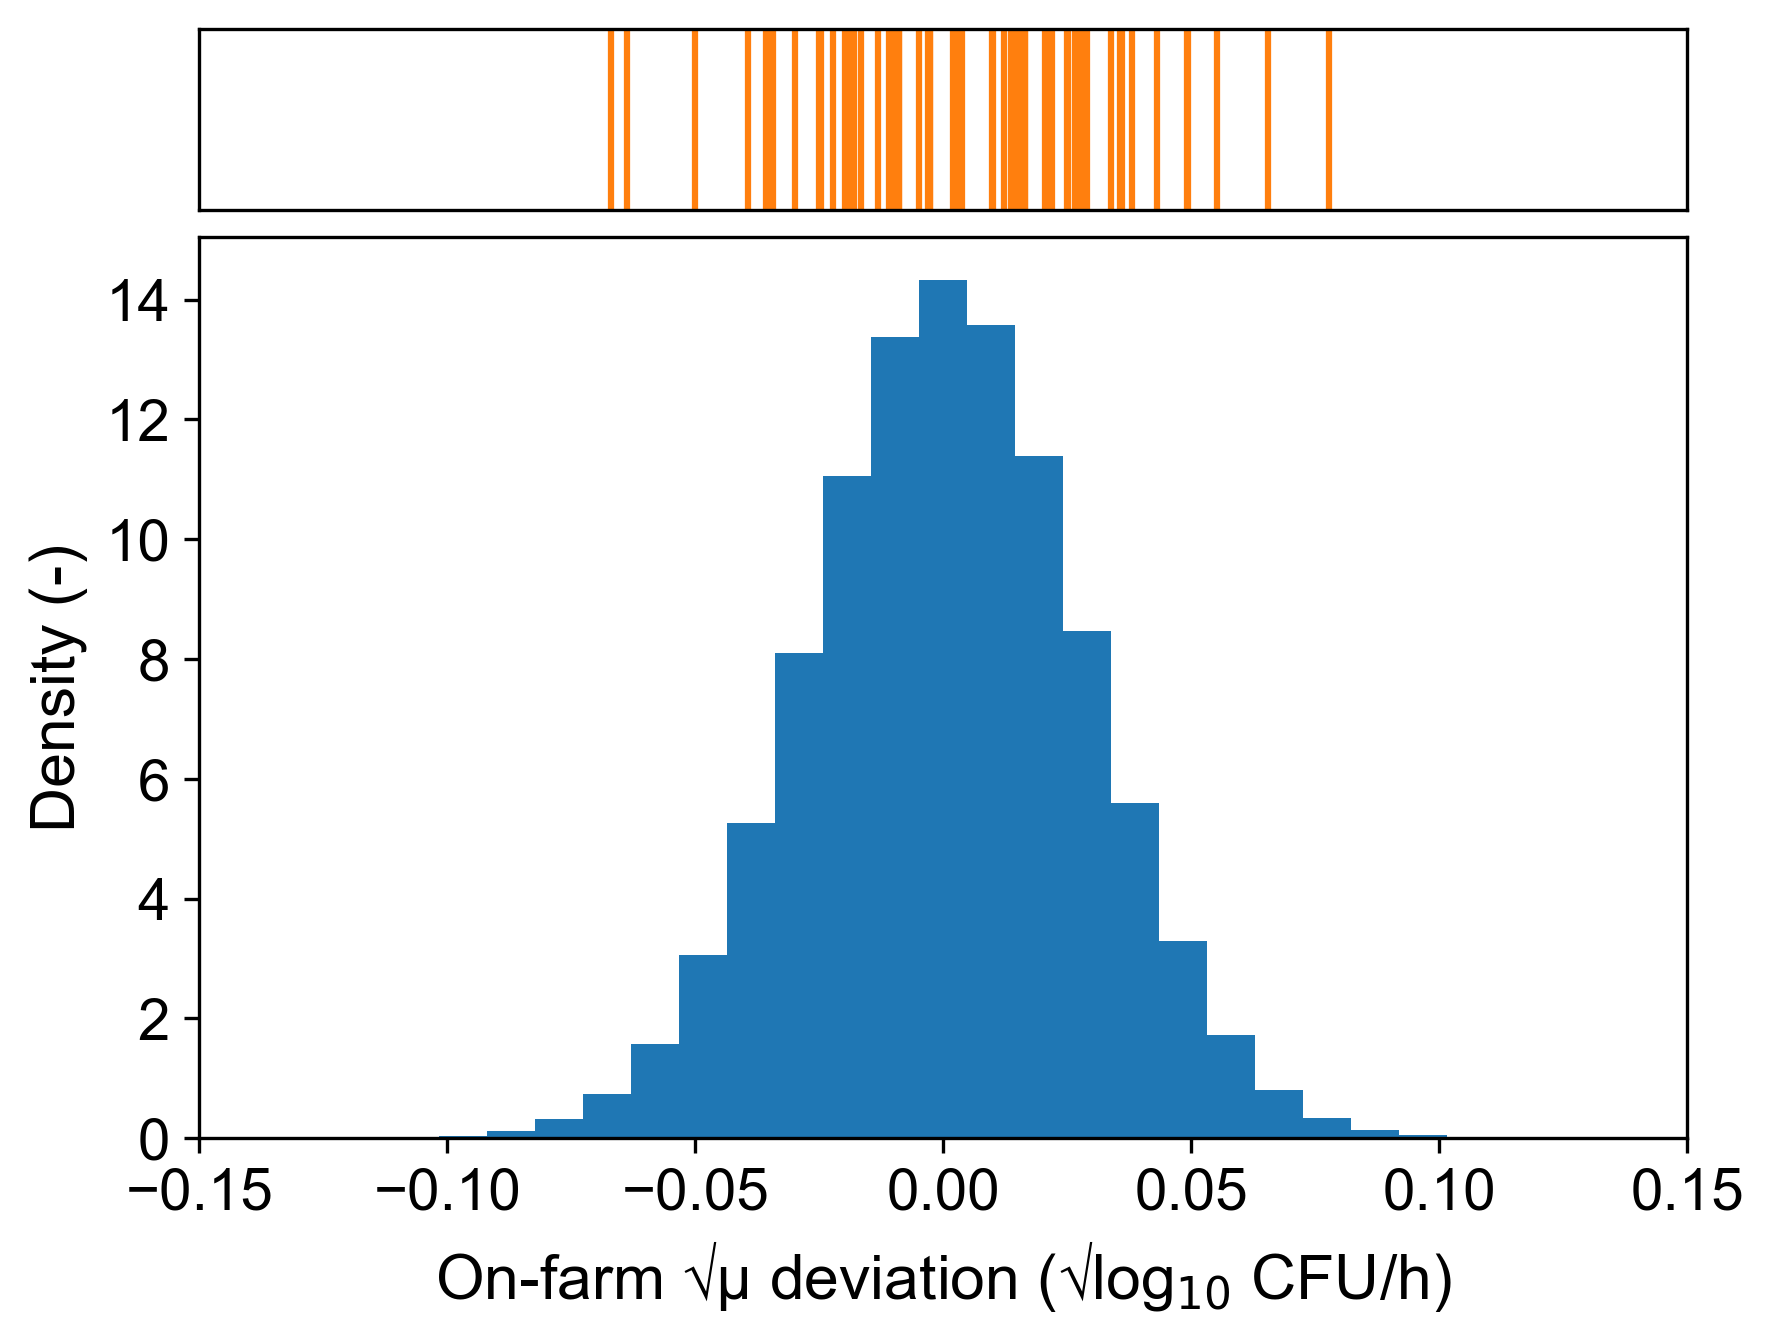

In [124]:

fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"
plt.xticks(size=14)
plt.yticks(size=14)


ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-0.15, 0.15])
ax[1].set_xlim([-0.15, 0.15])
for i in range(len(mu_pre_variability_ill)):
    ax[0].axvline(x = mu_pre_variability_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(mu_pre_variability[prevalence_or_not==1],density="TRUE", range = (-0.15, 0.15), bins = 31)
ax[1].set_xlabel("On-farm √µ deviation (√log$_{10}$ CFU/h)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")
plt.savefig("Fig. S3a.pdf", bbox_inches="tight")
plt.show()

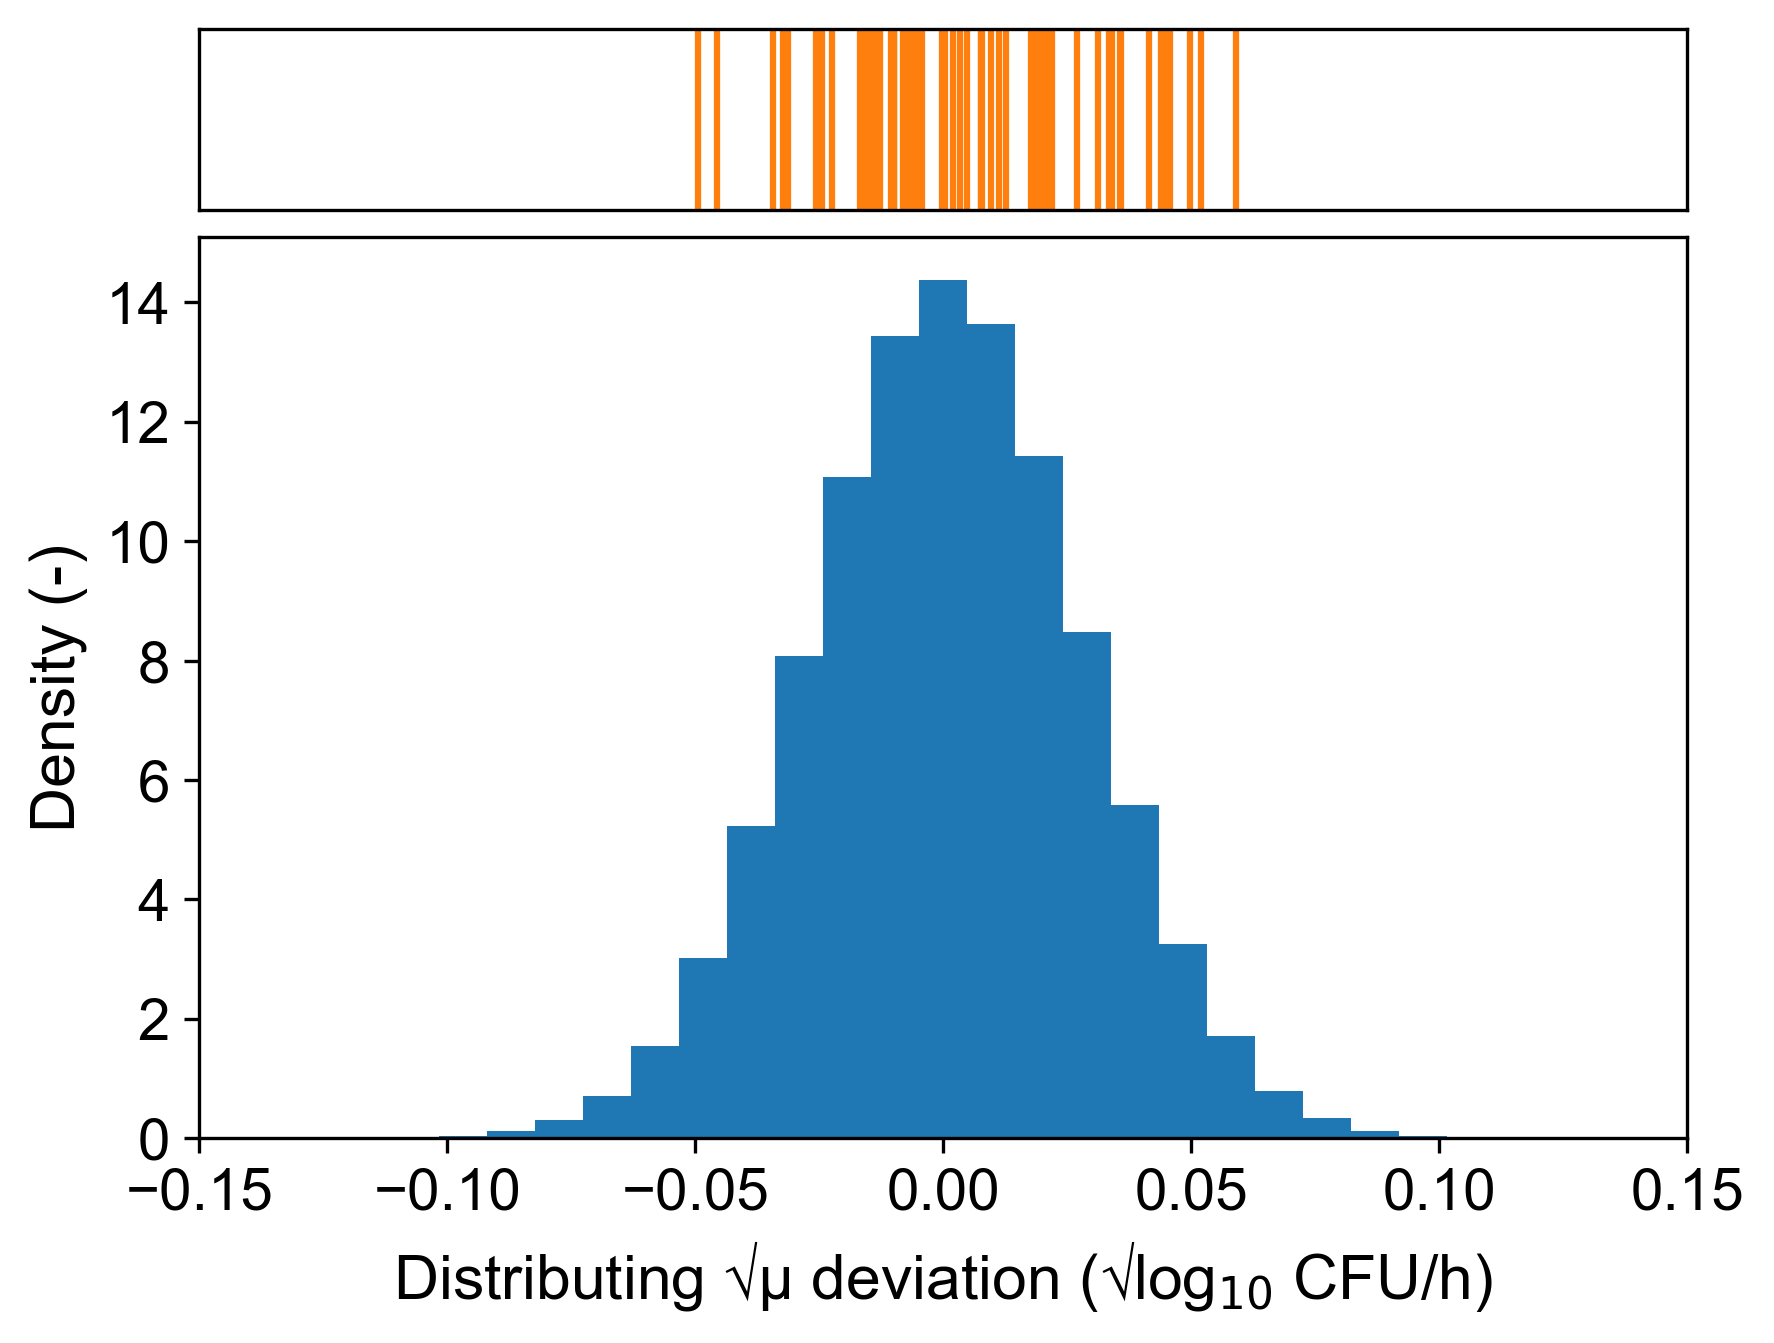

In [125]:

fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)


ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-0.15, 0.15])
ax[1].set_xlim([-0.15, 0.15])
for i in range(len(mu_pre_variability_ill)):
    ax[0].axvline(x = mu_dist_variability_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(mu_dist_variability[prevalence_or_not==1],density="TRUE", range = (-0.15, 0.15), bins = 31)
ax[1].set_xlabel("Distributing √µ deviation (√log$_{10}$ CFU/h)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")
plt.savefig("Fig. S3b.pdf", bbox_inches="tight")
plt.show()

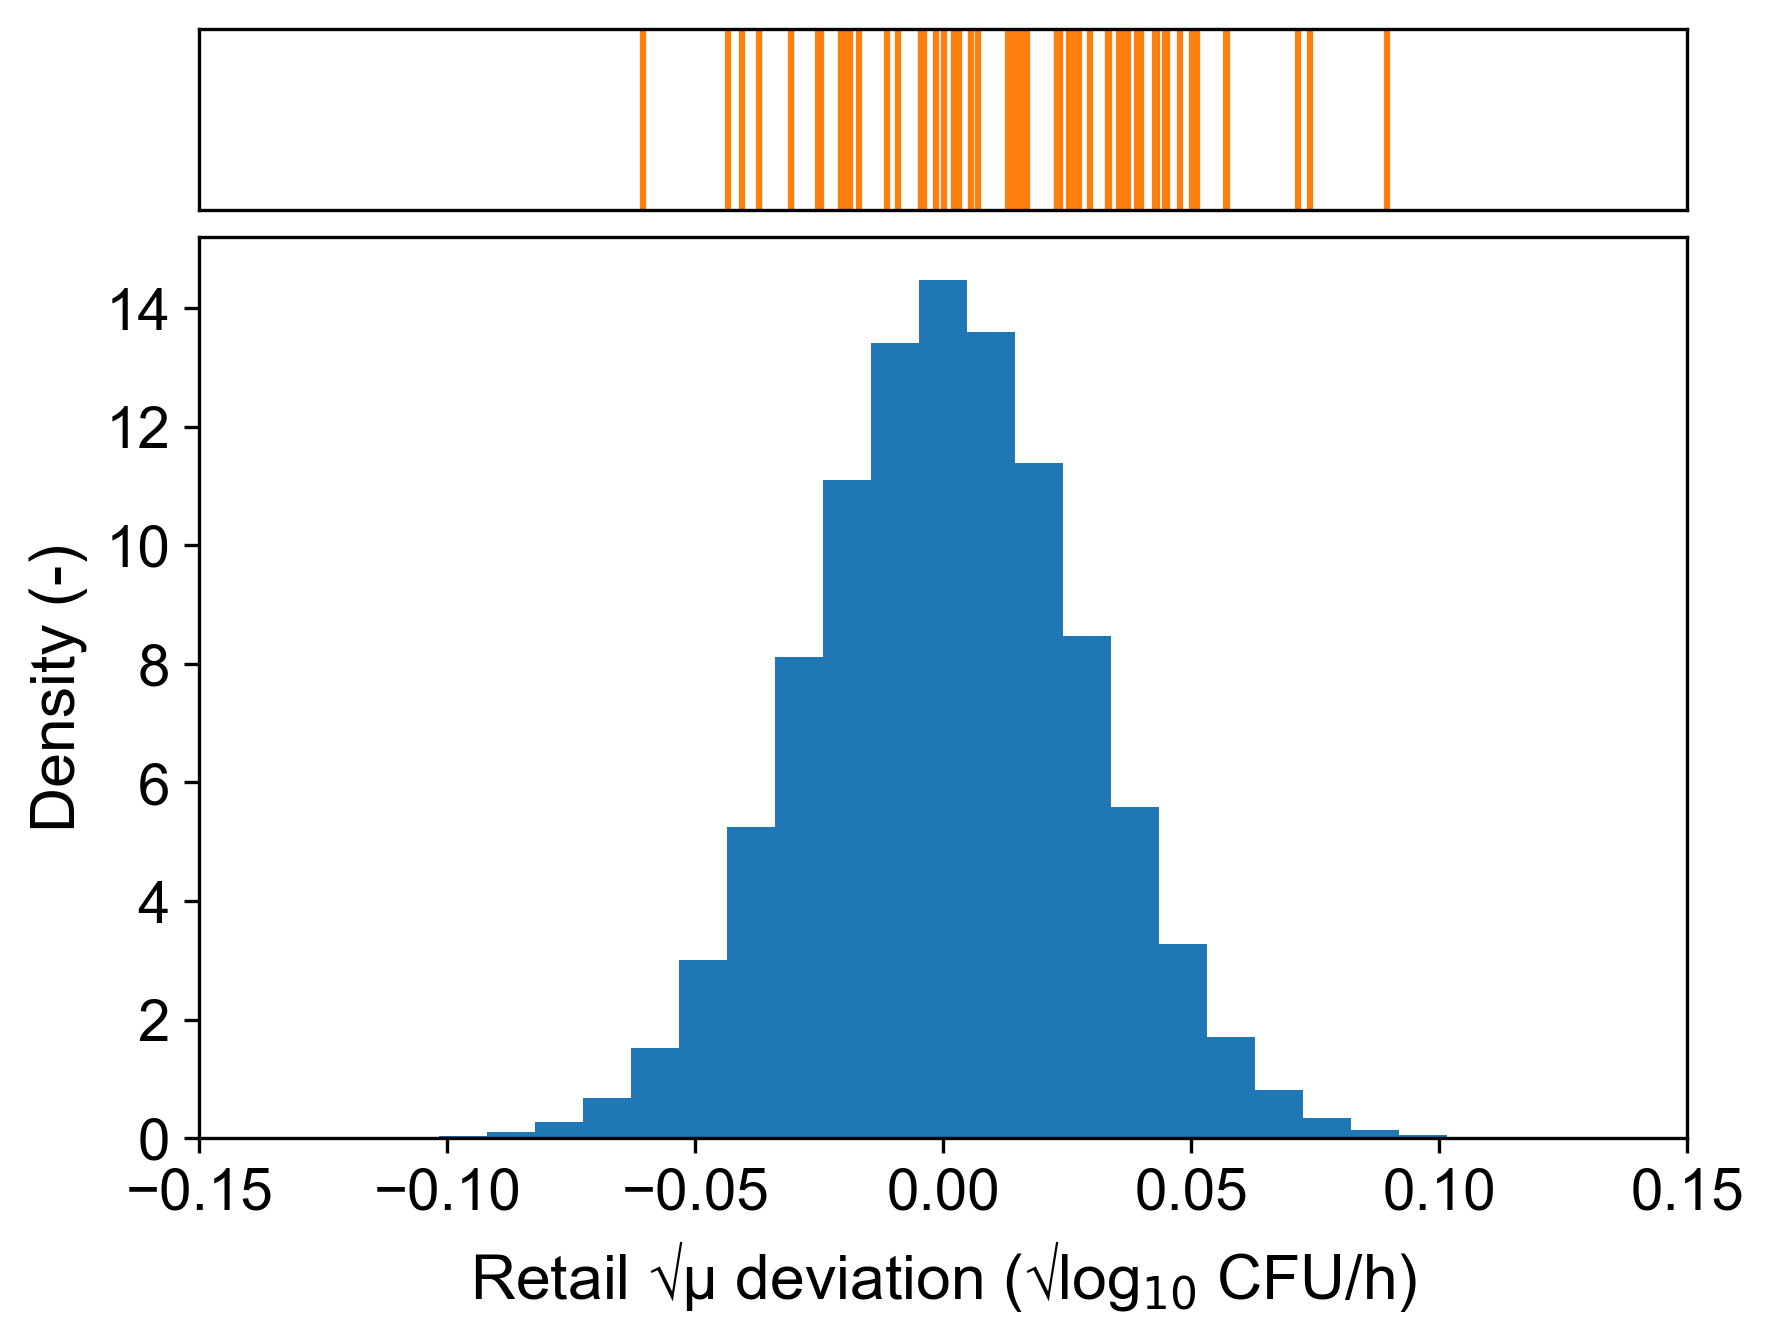

In [126]:


fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)


ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-0.15, 0.15])
ax[1].set_xlim([-0.15, 0.15])
for i in range(len(mu_pre_variability_ill)):
    ax[0].axvline(x = mu_retail_variability_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(mu_retail_variability[prevalence_or_not==1],density="TRUE", range = (-0.15, 0.15), bins = 31)
ax[1].set_xlabel("Retail √µ deviation (√log$_{10}$ CFU/h)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")
plt.savefig("Fig. S3c.pdf", bbox_inches="tight")
plt.show()

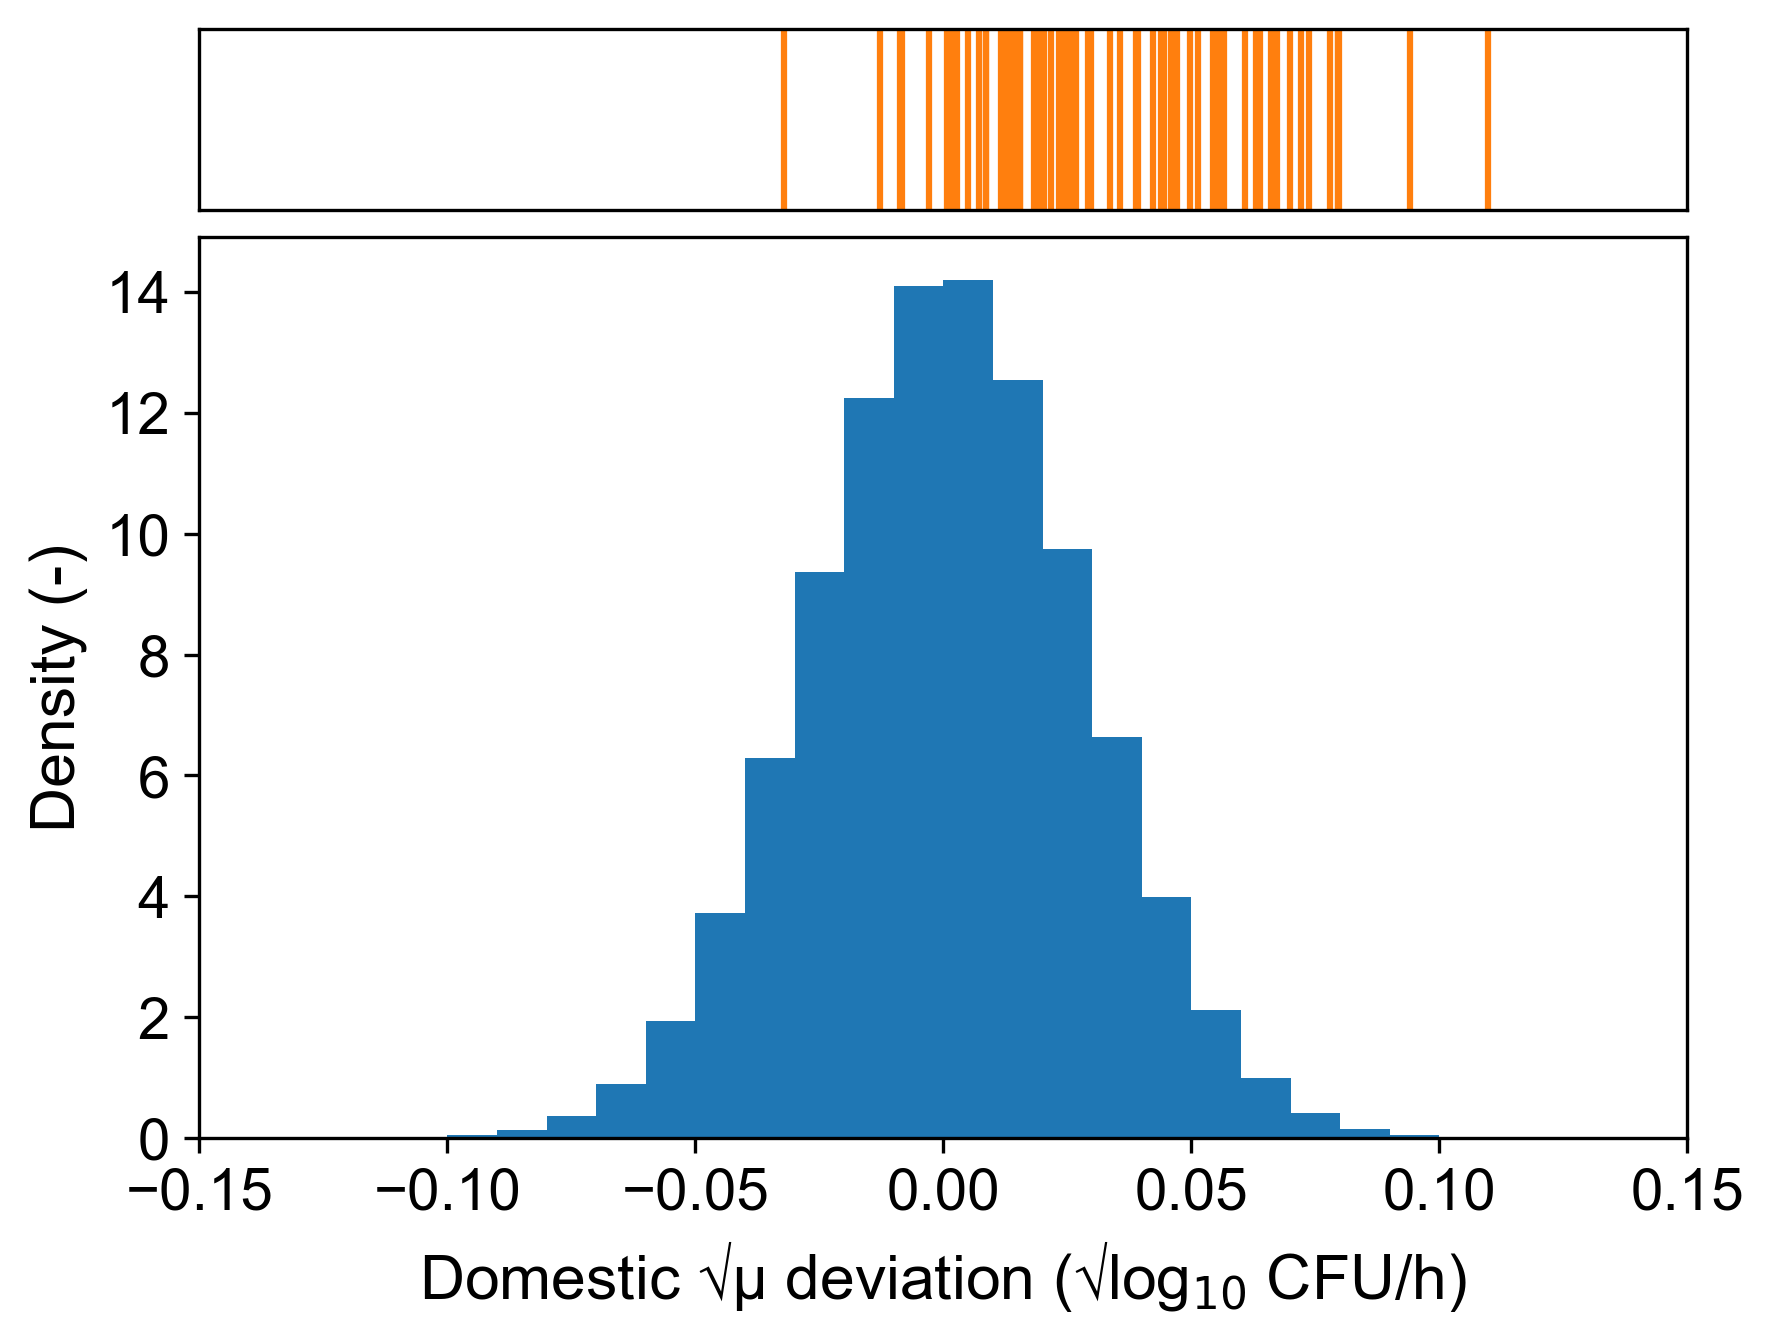

In [127]:


fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)


ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-0.15, 0.15])
ax[1].set_xlim([-0.15, 0.15])
for i in range(len(mu_domestic_variability_ill)):
    ax[0].axvline(x = mu_domestic_variability_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(mu_domestic_variability[prevalence_or_not==1],density="TRUE", range = (-0.15, 0.15), bins = 30)
ax[1].set_xlabel("Domestic √µ deviation (√log$_{10}$ CFU/h)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")
plt.savefig("Fig. S3d.pdf", bbox_inches="tight")
plt.show()

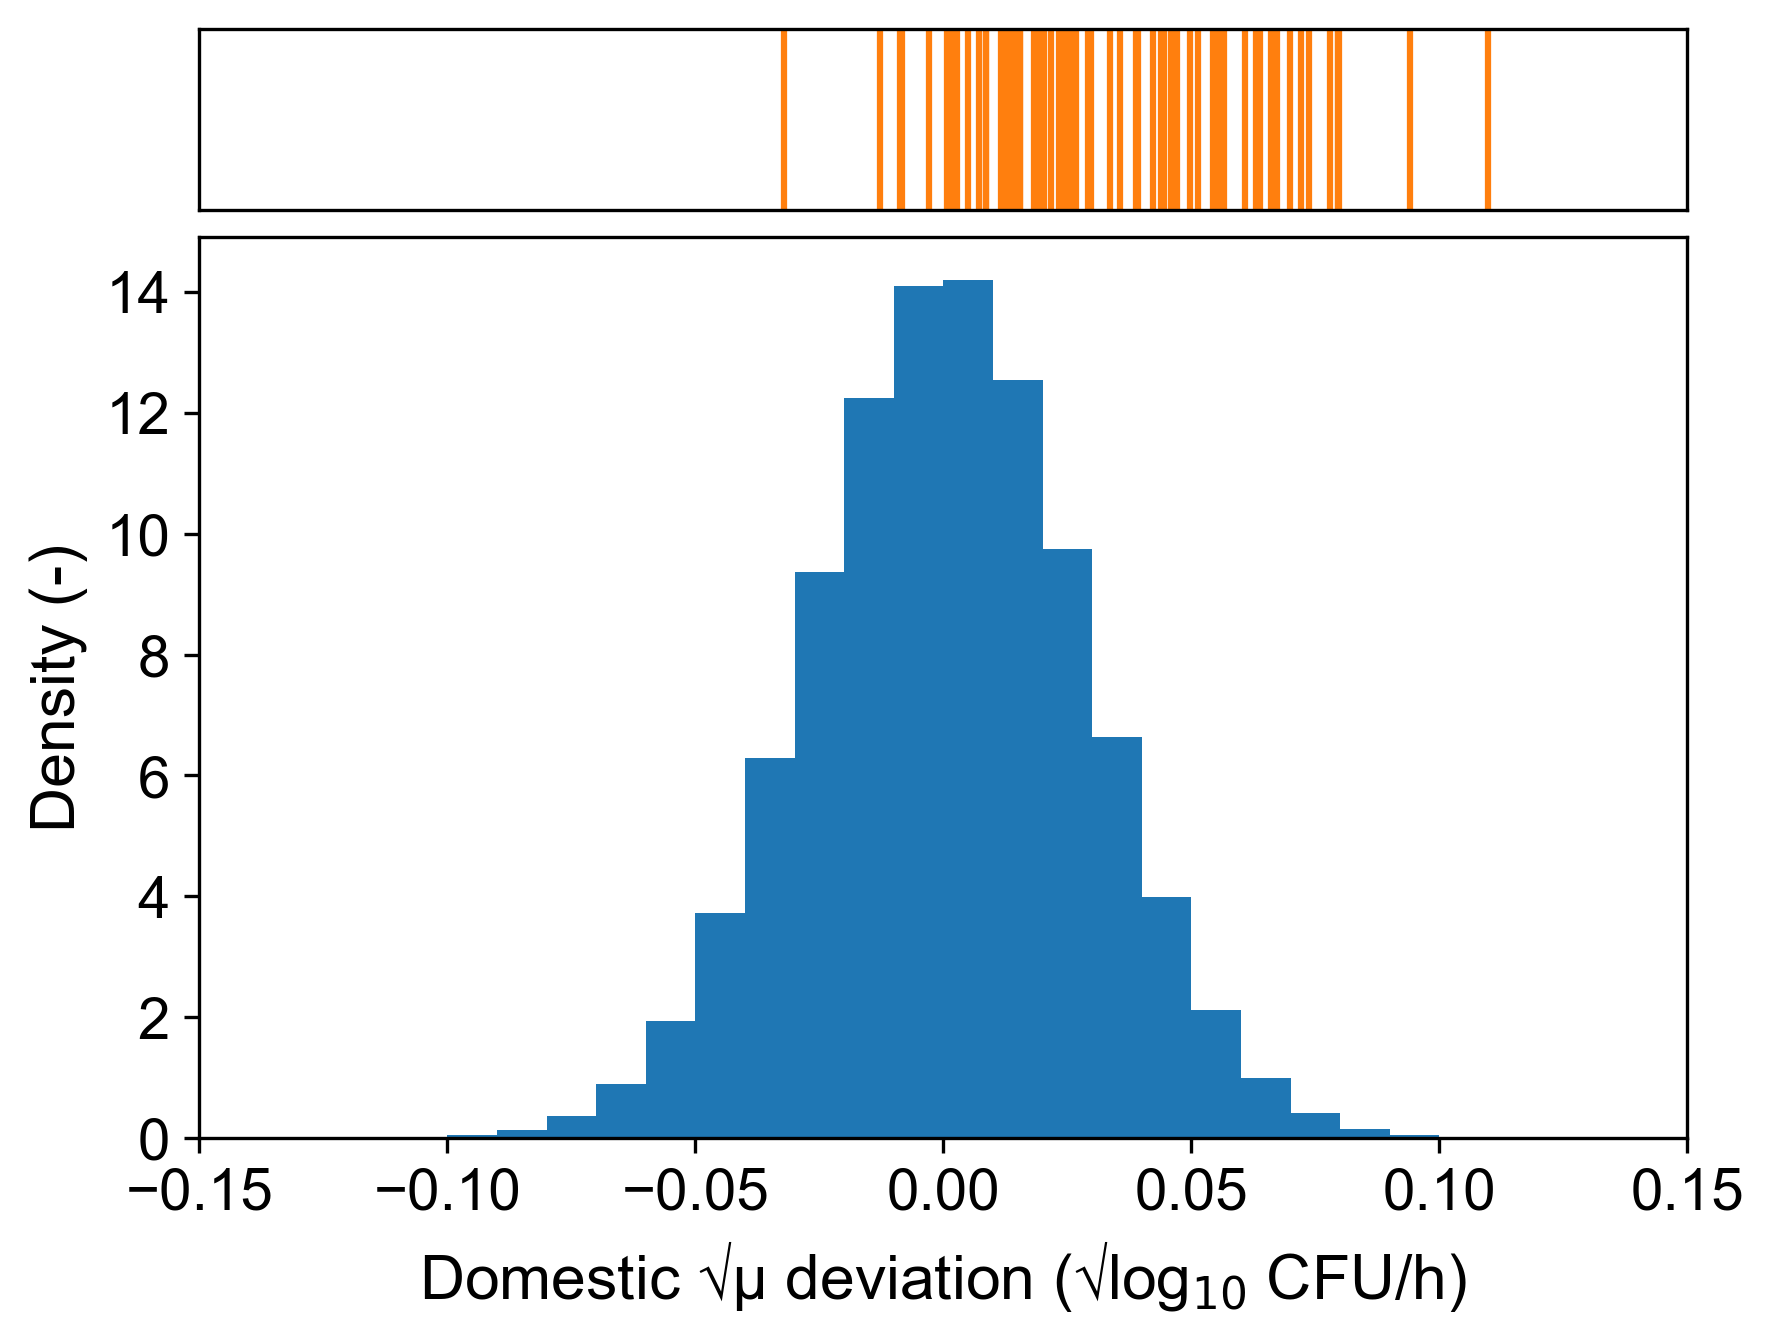

In [128]:


fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)


ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-0.15, 0.15])
ax[1].set_xlim([-0.15, 0.15])
for i in range(len(mu_domestic_variability_ill)):
    ax[0].axvline(x = mu_domestic_variability_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(mu_domestic_variability[prevalence_or_not==1],density="TRUE", range = (-0.15, 0.15), bins = 30)
ax[1].set_xlabel("Domestic √µ deviation (√log$_{10}$ CFU/h)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")
plt.savefig("Fig. 7b.pdf", bbox_inches="tight")
plt.show()

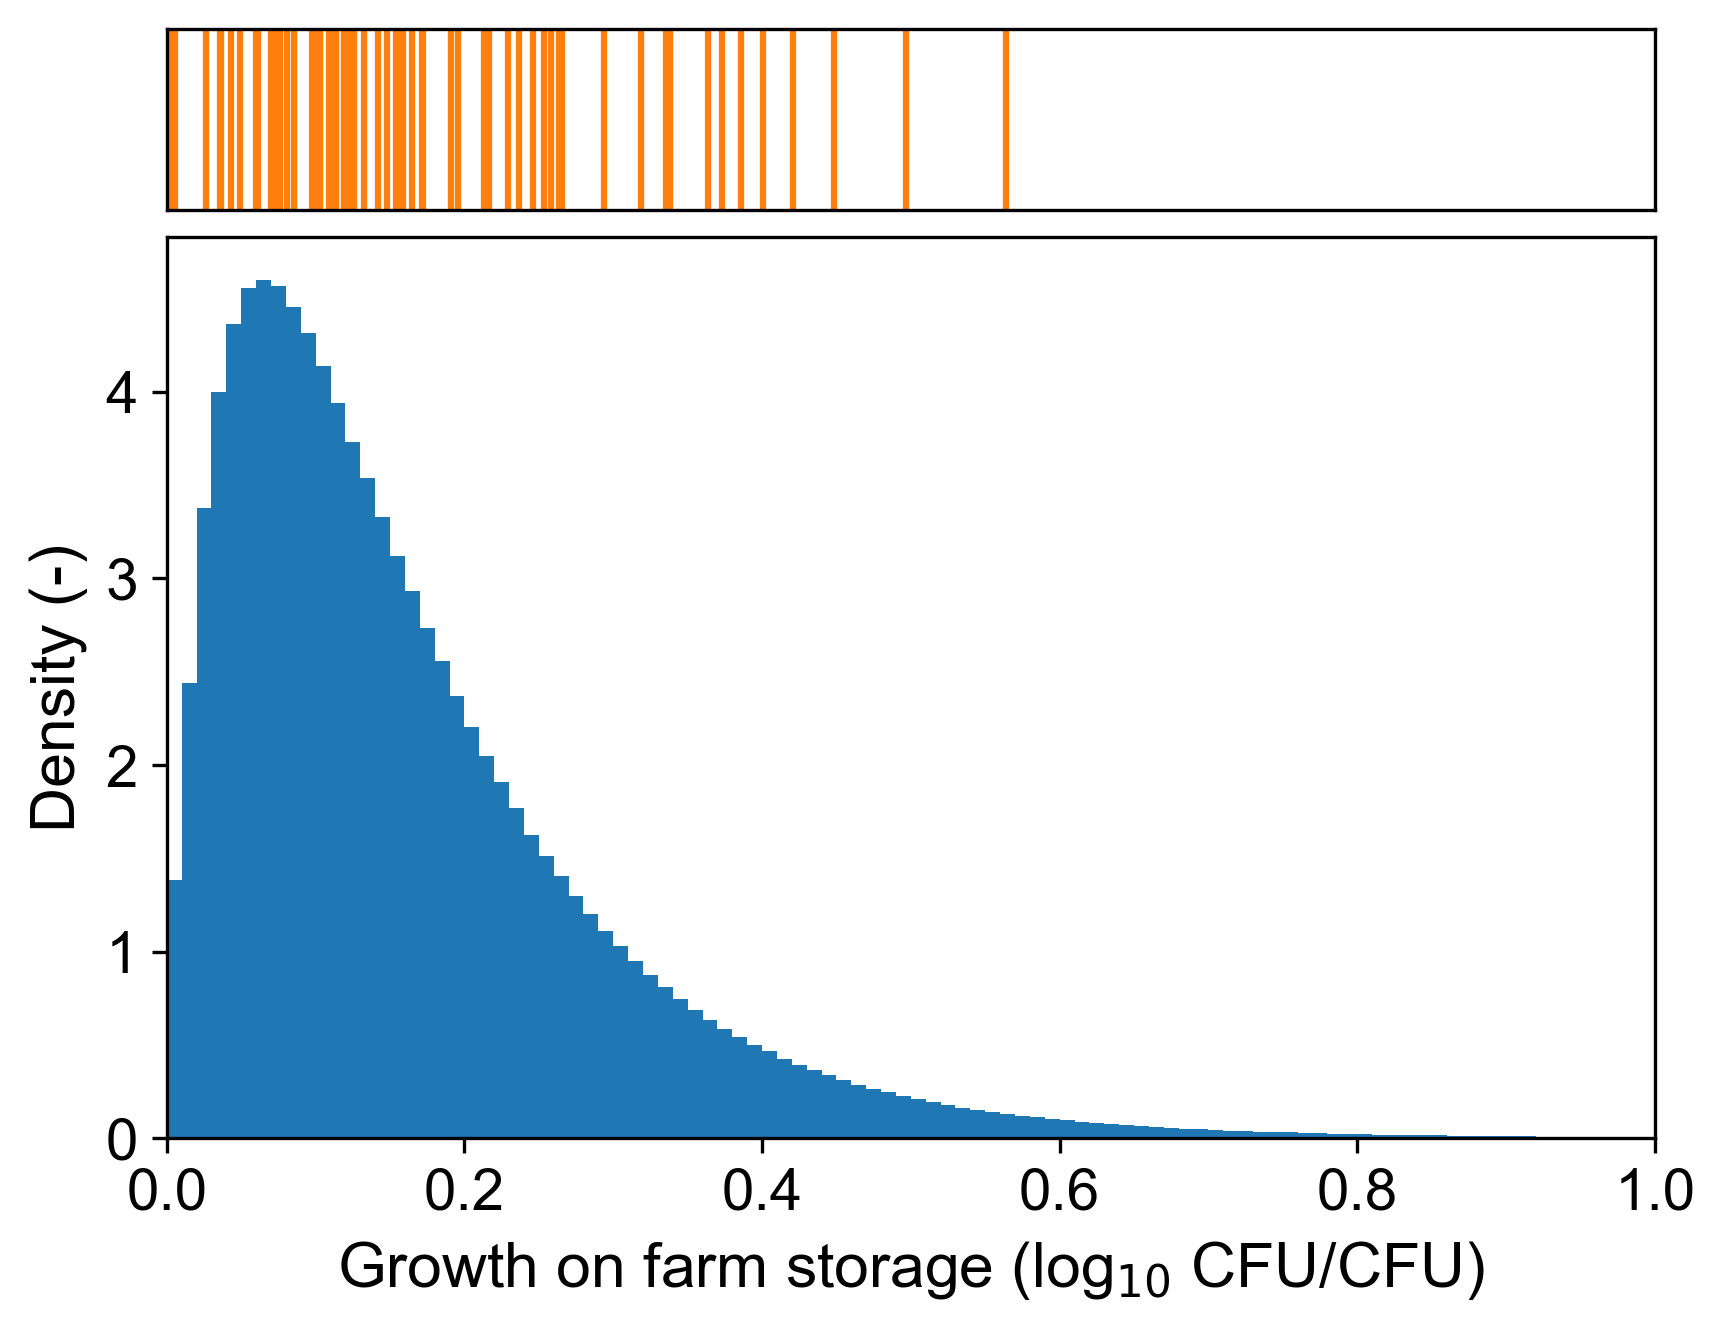

In [129]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["xtick.major.size"] = 3.5
plt.rcParams["ytick.major.size"] = 3.5
plt.rcParams["xtick.minor.size"] = 3.5
plt.rcParams["ytick.minor.size"] = 3.5    


plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-0, 1])
ax[1].set_xlim([-0, 1])
for i in range(len(delta_pre_ill)):
    ax[0].axvline(x = delta_pre_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(delta_pre, density="TRUE", range = (0, 2), bins = 200)
ax[1].set_xlabel("Growth on farm storage (log$_{10}$ CFU/CFU)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

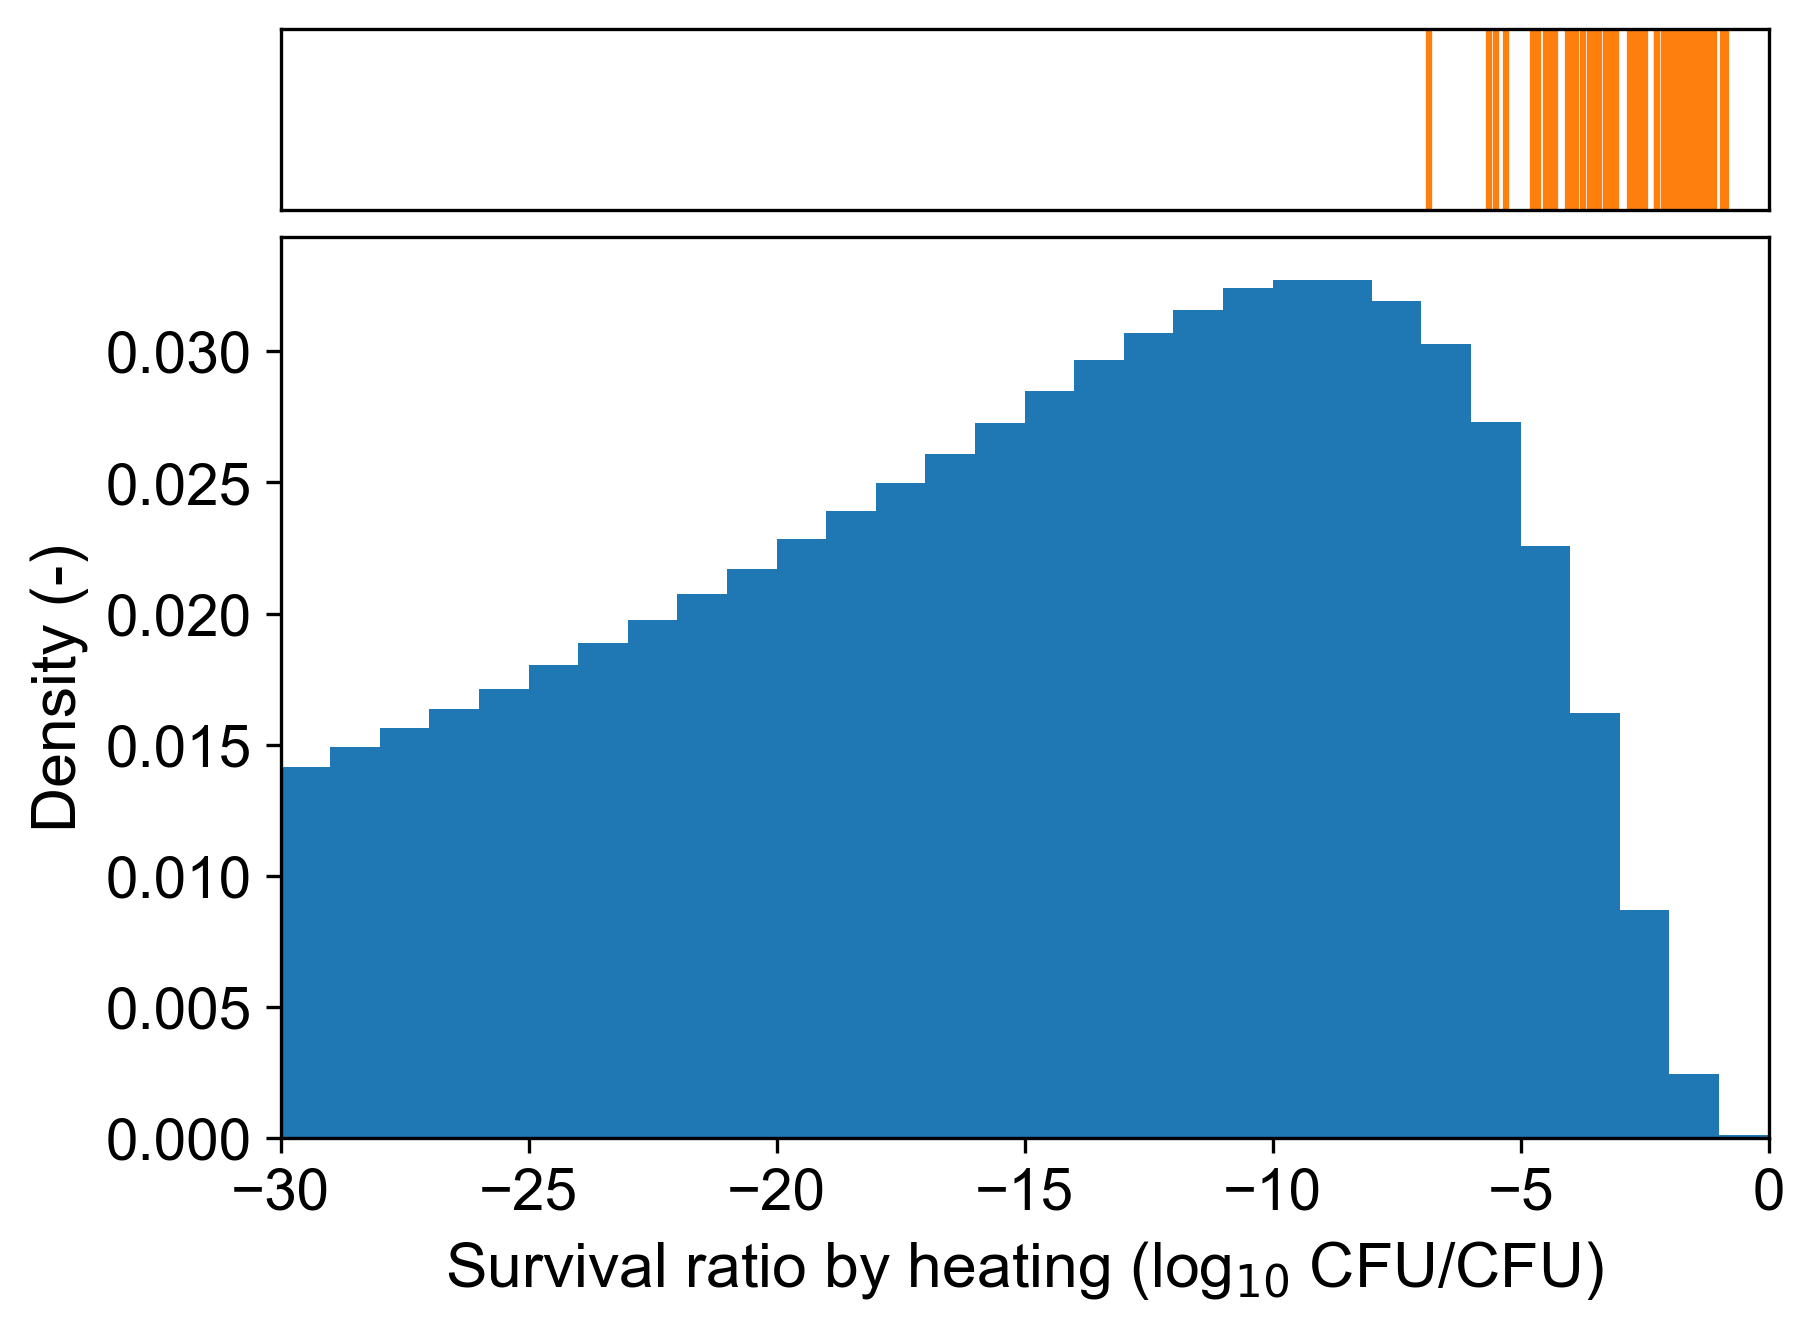

In [134]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-30, 0])
ax[1].set_xlim([-30, 0])
for i in range(len(delta_heat_ill)):
    ax[0].axvline(x = delta_heat_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(delta_heat, density="TRUE", range = (-800, 0), bins = 800)
ax[1].set_xlabel("Survival ratio by heating (log$_{10}$ CFU/CFU)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

In [158]:
np.max(delta_heat)

-0.31036838867253985

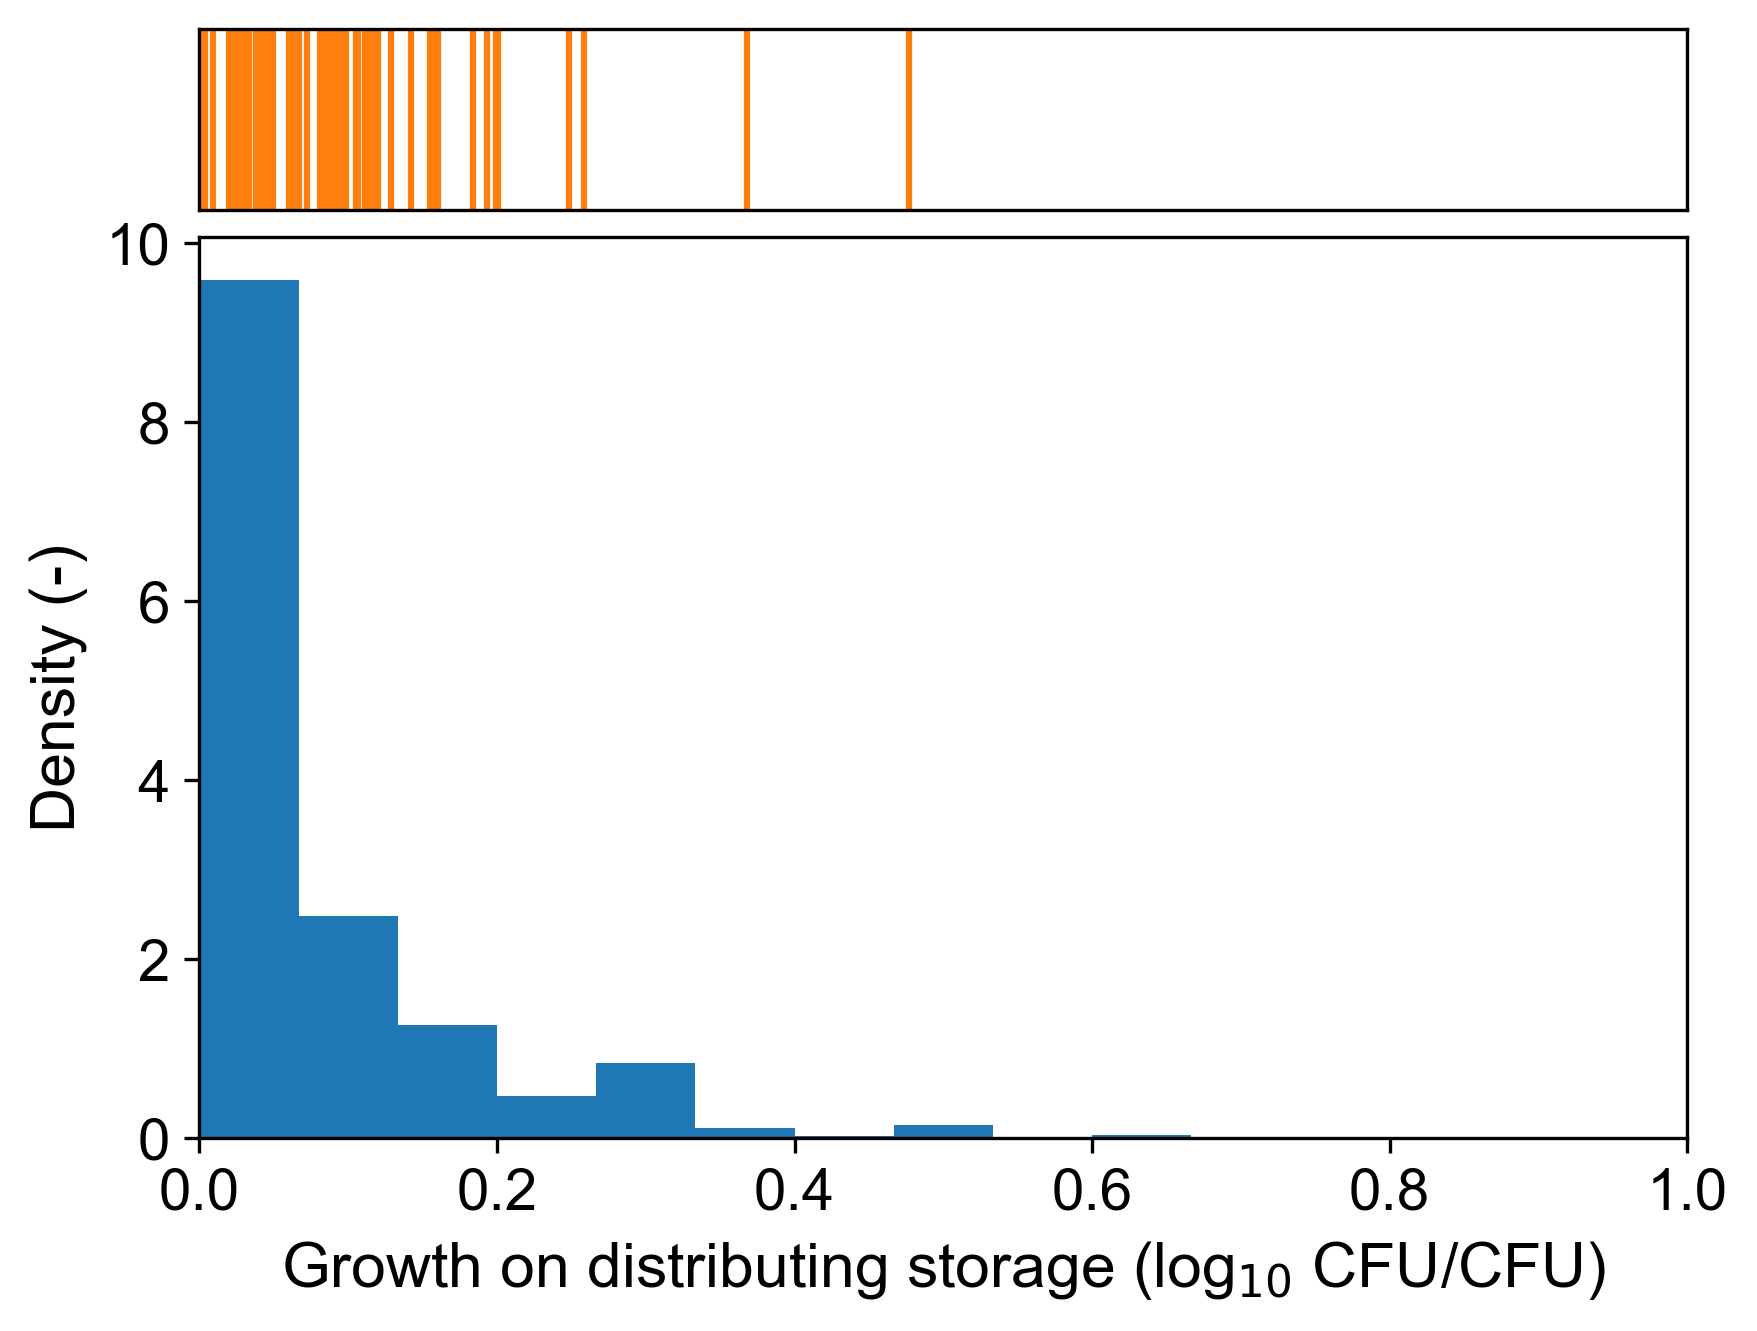

In [131]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-0, 1])
ax[1].set_xlim([-0, 1])
for i in range(len(delta_dist_ill)):
    ax[0].axvline(x = delta_dist_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(delta_dist, density="TRUE", range = (0, 1), bins = 15)
ax[1].set_xlabel("Growth on distributing storage (log$_{10}$ CFU/CFU)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

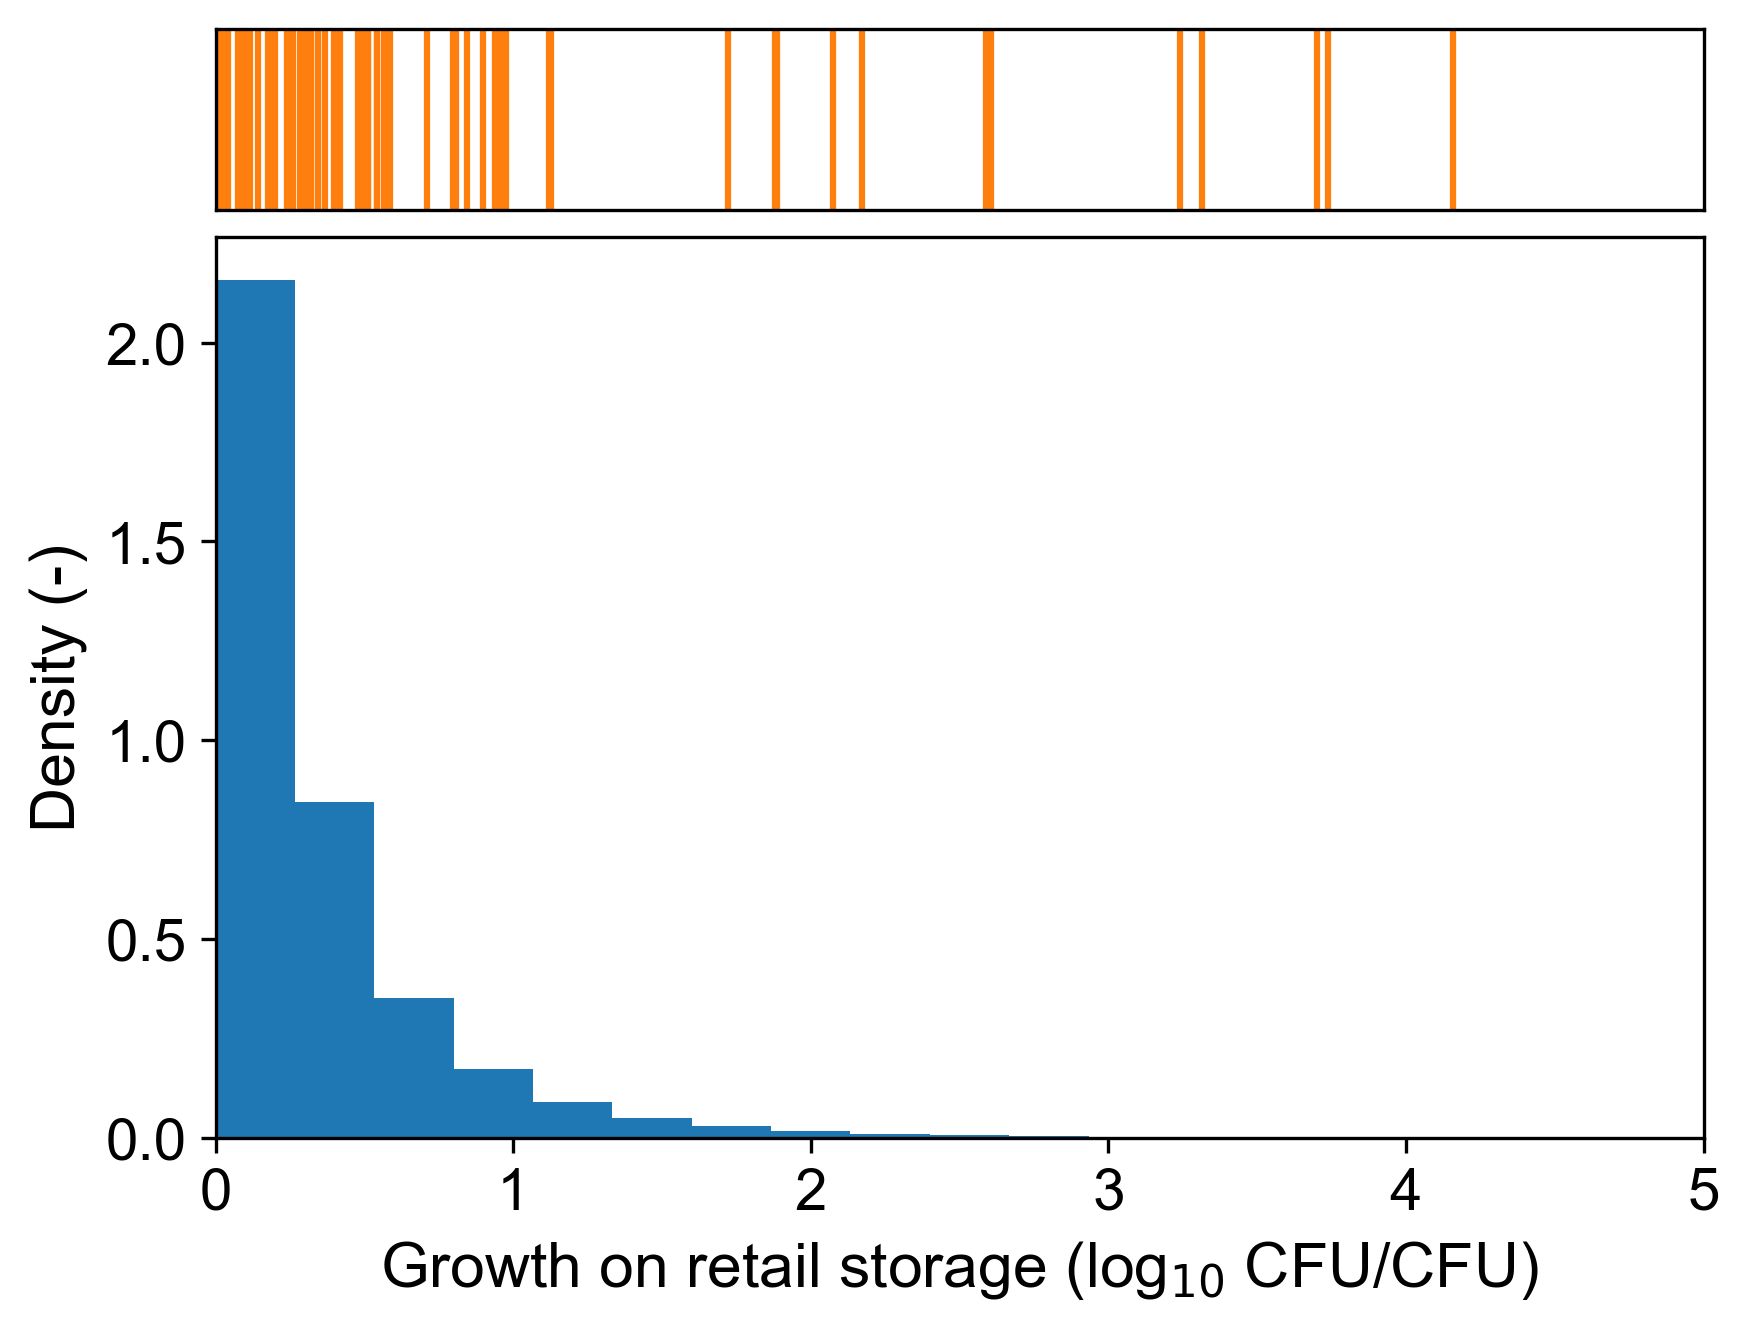

In [132]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-0, 5])
ax[1].set_xlim([-0, 5])
for i in range(len(delta_retail_ill)):
    ax[0].axvline(x = delta_retail_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(delta_retail, density="TRUE", range = (0, 8), bins = 30)
ax[1].set_xlabel("Growth on retail storage (log$_{10}$ CFU/CFU)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

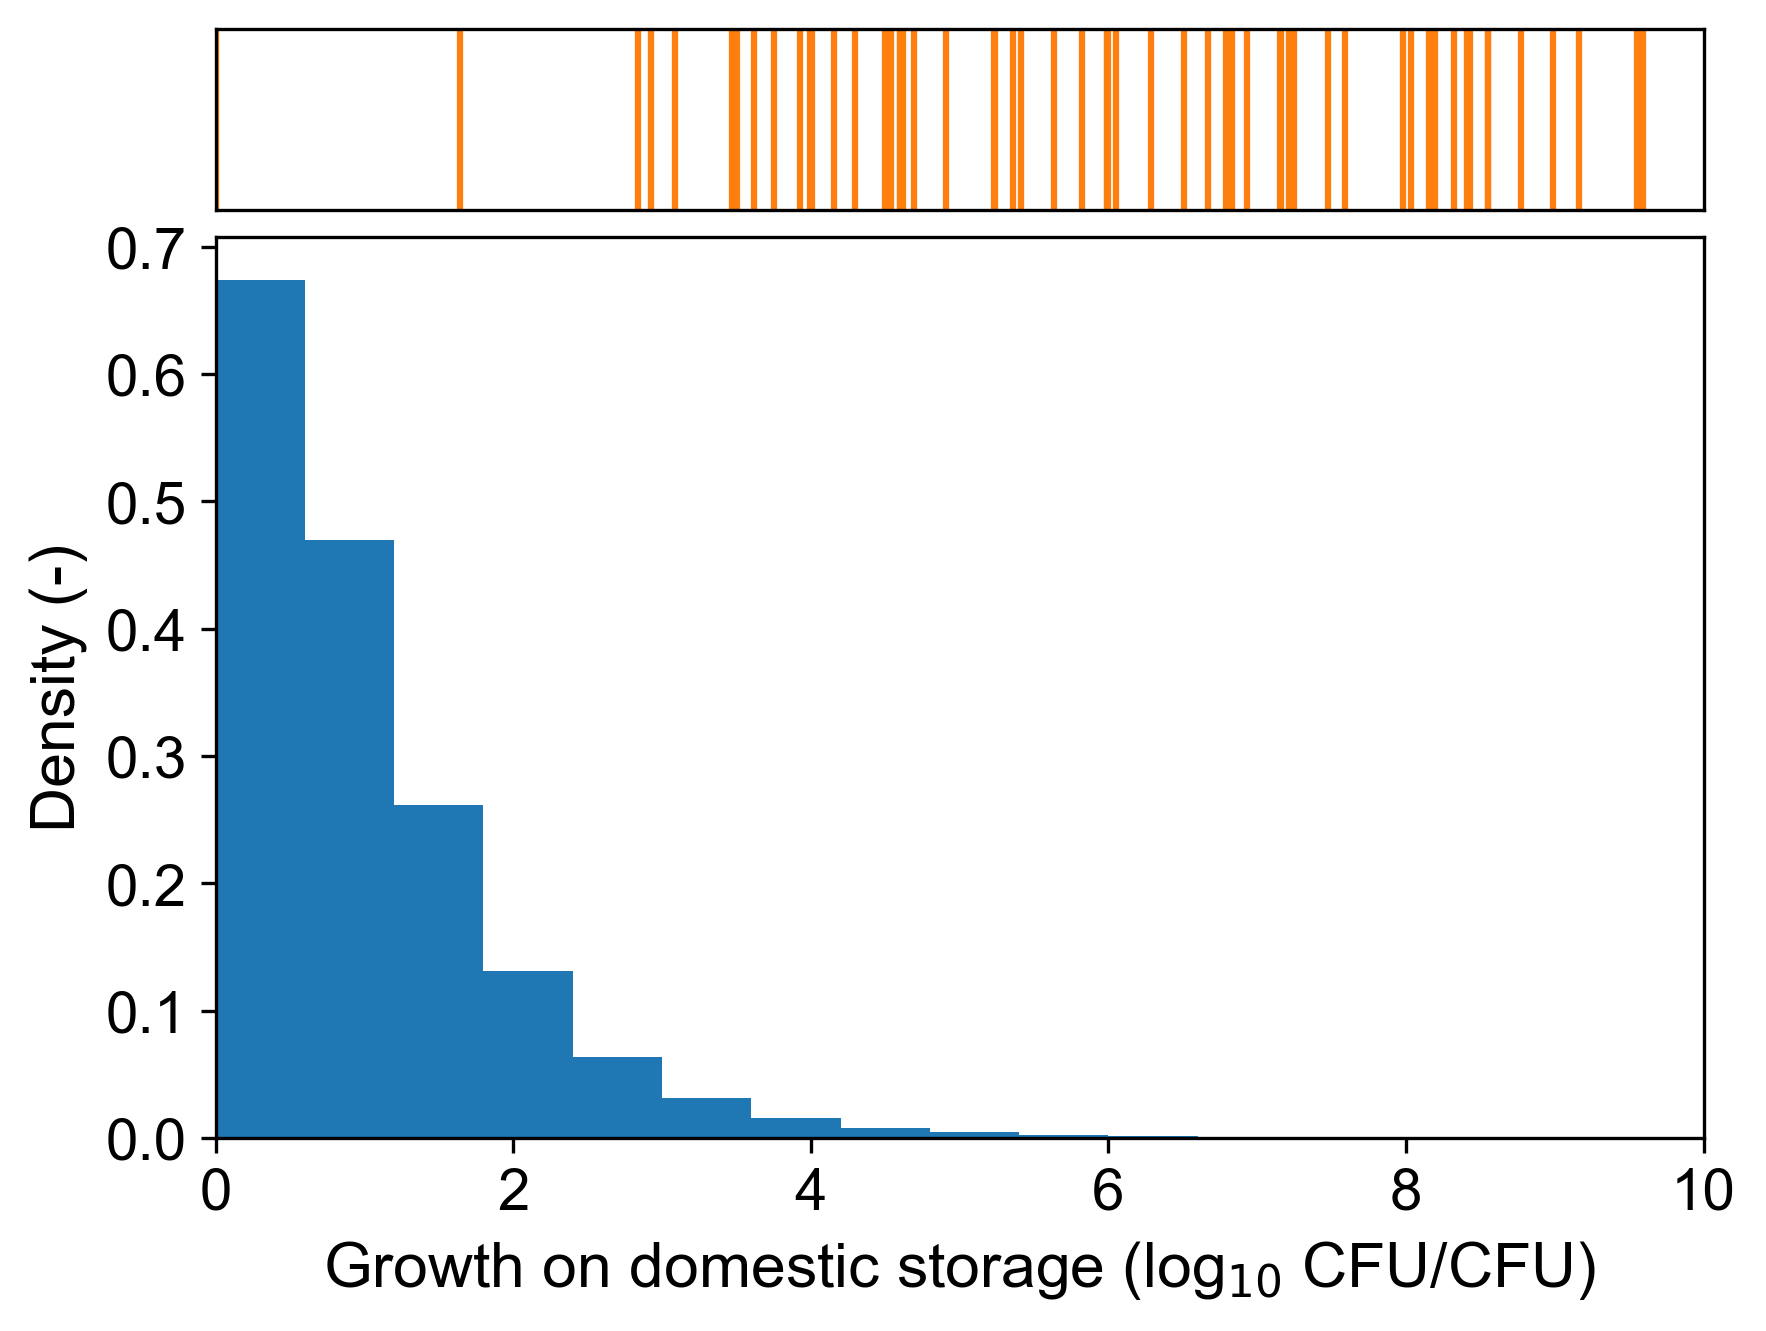

In [133]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-0, 10])
ax[1].set_xlim([-0, 10])
for i in range(len(delta_domestic_ill)):
    ax[0].axvline(x = delta_domestic_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(delta_domestic, density="TRUE", range = (0, 15), bins = 25)
ax[1].set_xlabel("Growth on domestic storage (log$_{10}$ CFU/CFU)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

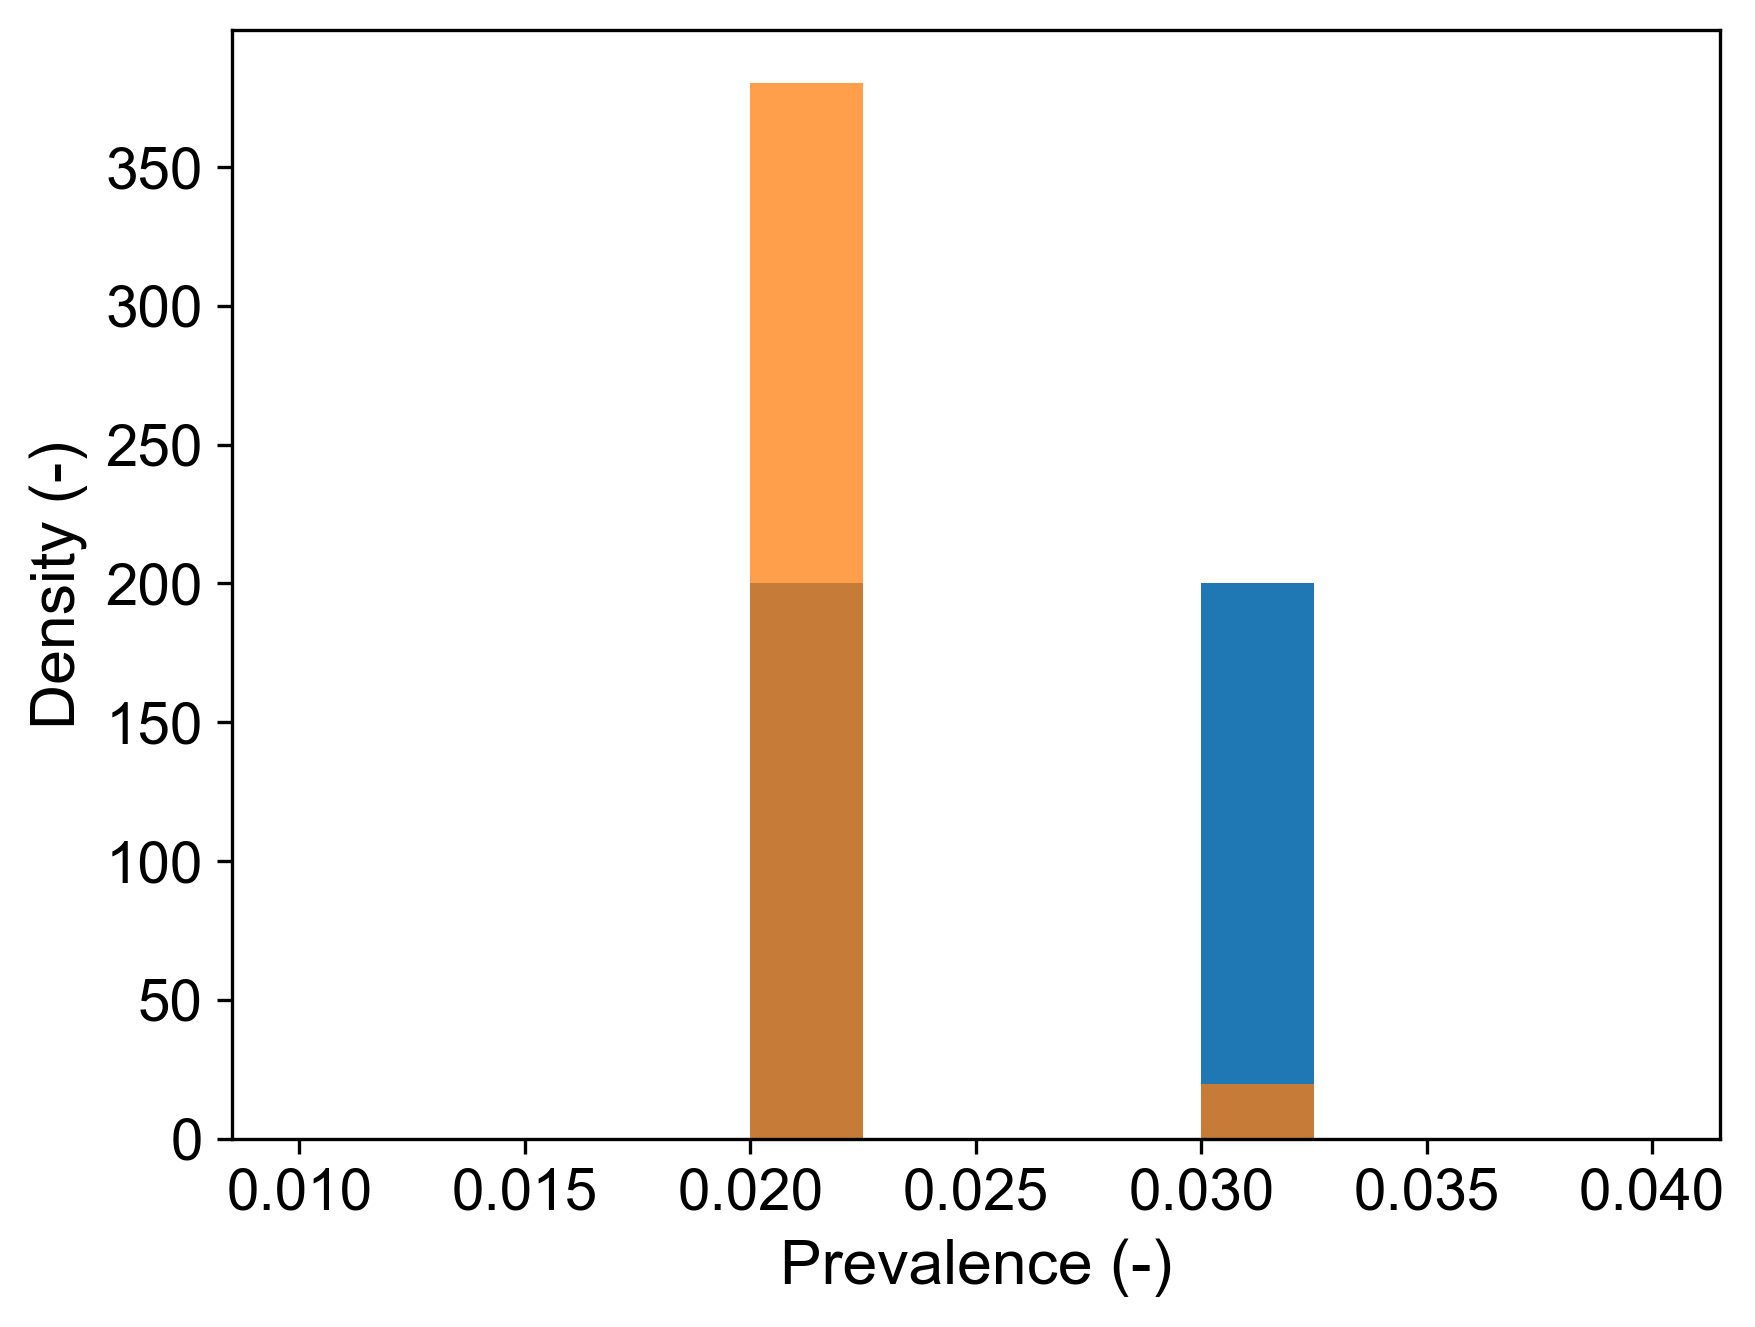

In [135]:
plt.figure(dpi=300)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Prevalence (-)",size=15,fontname="Arial")
plt.ylabel("Density (-)",size=15,fontname="Arial")
ec=""
plt.hist(prevalence, density="TRUE", bins=12, alpha = 1, range = (0.01, 0.04))
plt.hist(prevalence_ill, density="TRUE", bins=12, alpha = 0.75, range = (0.01, 0.04))
plt.show()

In [136]:
P_serve_ill

0     0.047823
1     0.999998
2     0.991856
3     0.255063
4     0.010877
        ...   
56    0.183529
57    0.437354
58    0.999942
59    1.000000
60    0.000888
Name: P_serve_ill, Length: 61, dtype: float64

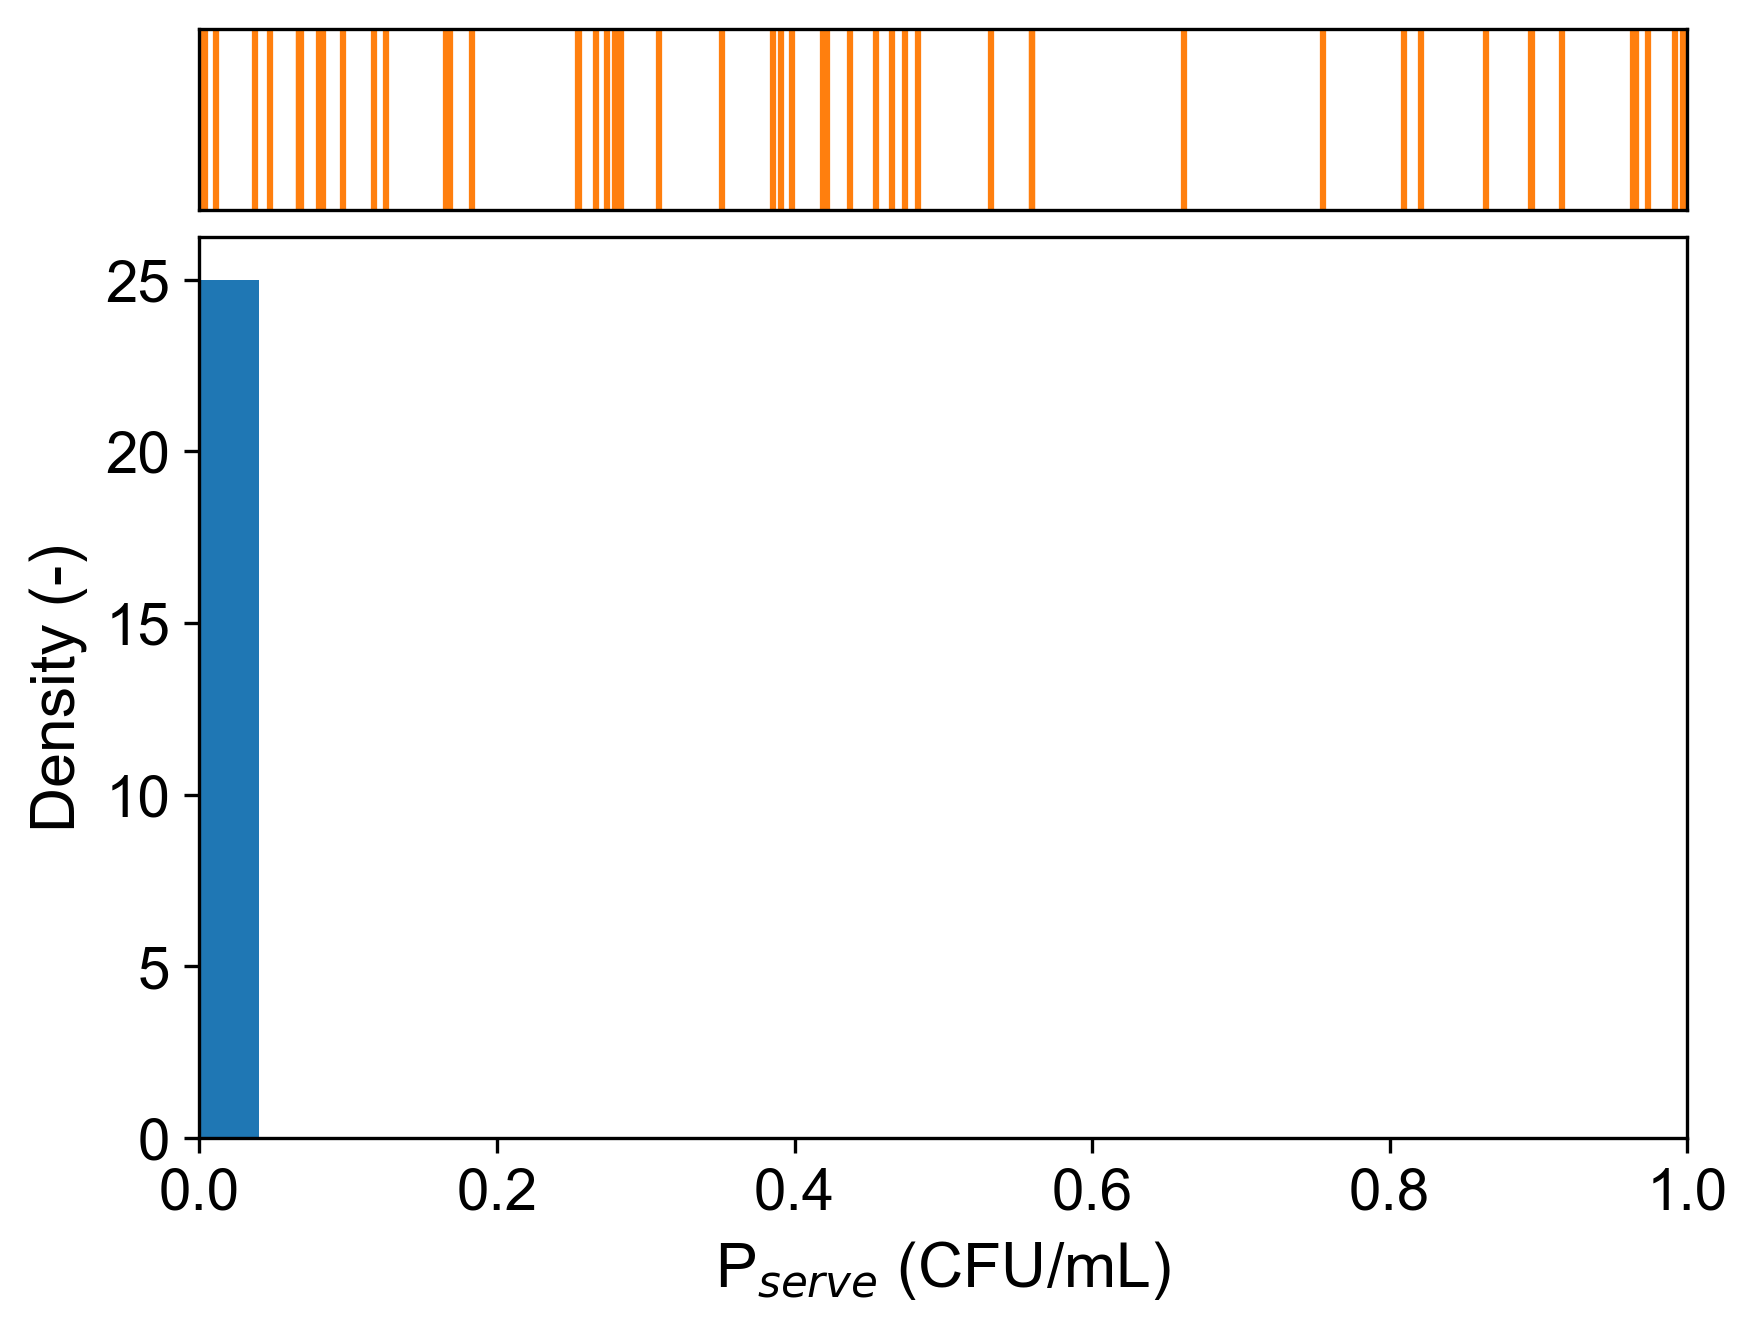

In [137]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-0., 1])
ax[1].set_xlim([-0., 1])
for i in range(len(P_serve_ill)):
    ax[0].axvline(x = P_serve_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(P_serve, density="TRUE", range = (0.0, 1), bins = 25)
ax[1].set_xlabel("P$_{serve}$ (CFU/mL)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

In [138]:
logN0_ill

array([ 3.24029116,  3.11807807,  2.10008262,  2.84699881,  3.67760463,
        2.58310824,  3.85650628,  0.49206456,  0.34877188,  3.04211217,
        2.44596101,  3.90014478,  0.97526962, -0.54442081,  0.41460033,
        2.58916779,  0.91681244,  0.7551975 ,  3.88714967,  3.07053648,
        2.66922   ,  3.94527795,  1.75356627,  3.77101134,  1.586943  ,
       -0.17678598,  0.18724663,  3.18645091,  3.51810295,  0.04127359,
        3.98971887,  0.12811874,  2.97631232,  3.83596326,  1.86993382,
        3.3973486 ,  3.34947732,  0.601196  , -0.3460776 ,  3.74363458,
        0.21105286,  3.6920424 ,  0.53198592,  3.23460861, -0.18759746,
        2.85476813,  2.47013605,  3.63296824,  2.7987517 ,  3.67413146,
        1.53363986, -0.04300599,  2.79034534,  3.0651379 ,  0.46782121,
        3.31738905,  3.93803632, -0.25229175,  3.53322136,  3.97908416,
        3.92147645])

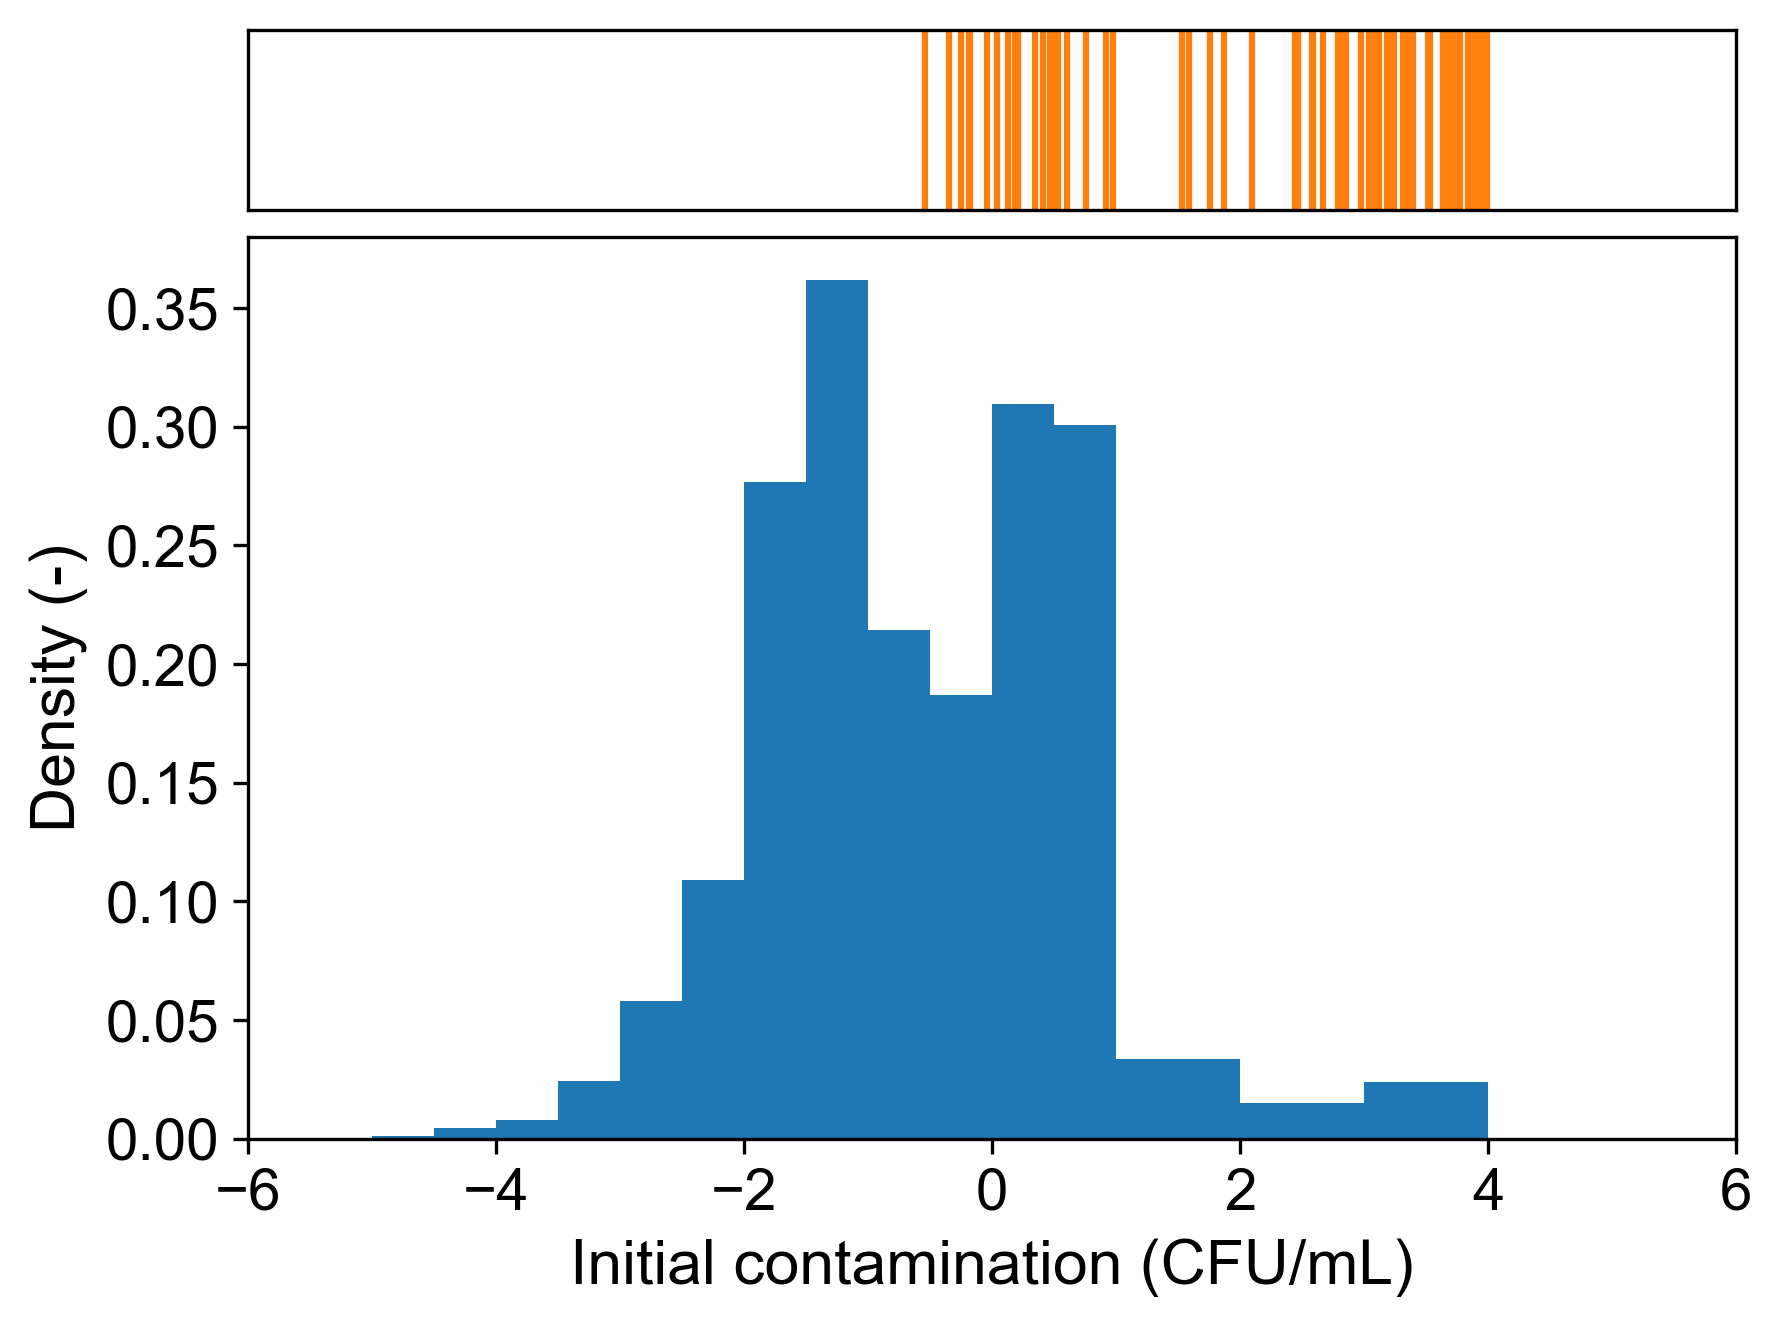

In [139]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-6, 6])
ax[1].set_xlim([-6, 6])
for i in range(len(logN0_ill)):
    ax[0].axvline(x = logN0_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(logN0[prevalence_or_not==1], density="TRUE", range = (-6, 6), bins = 24)
ax[1].set_xlabel("Initial contamination (CFU/mL)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

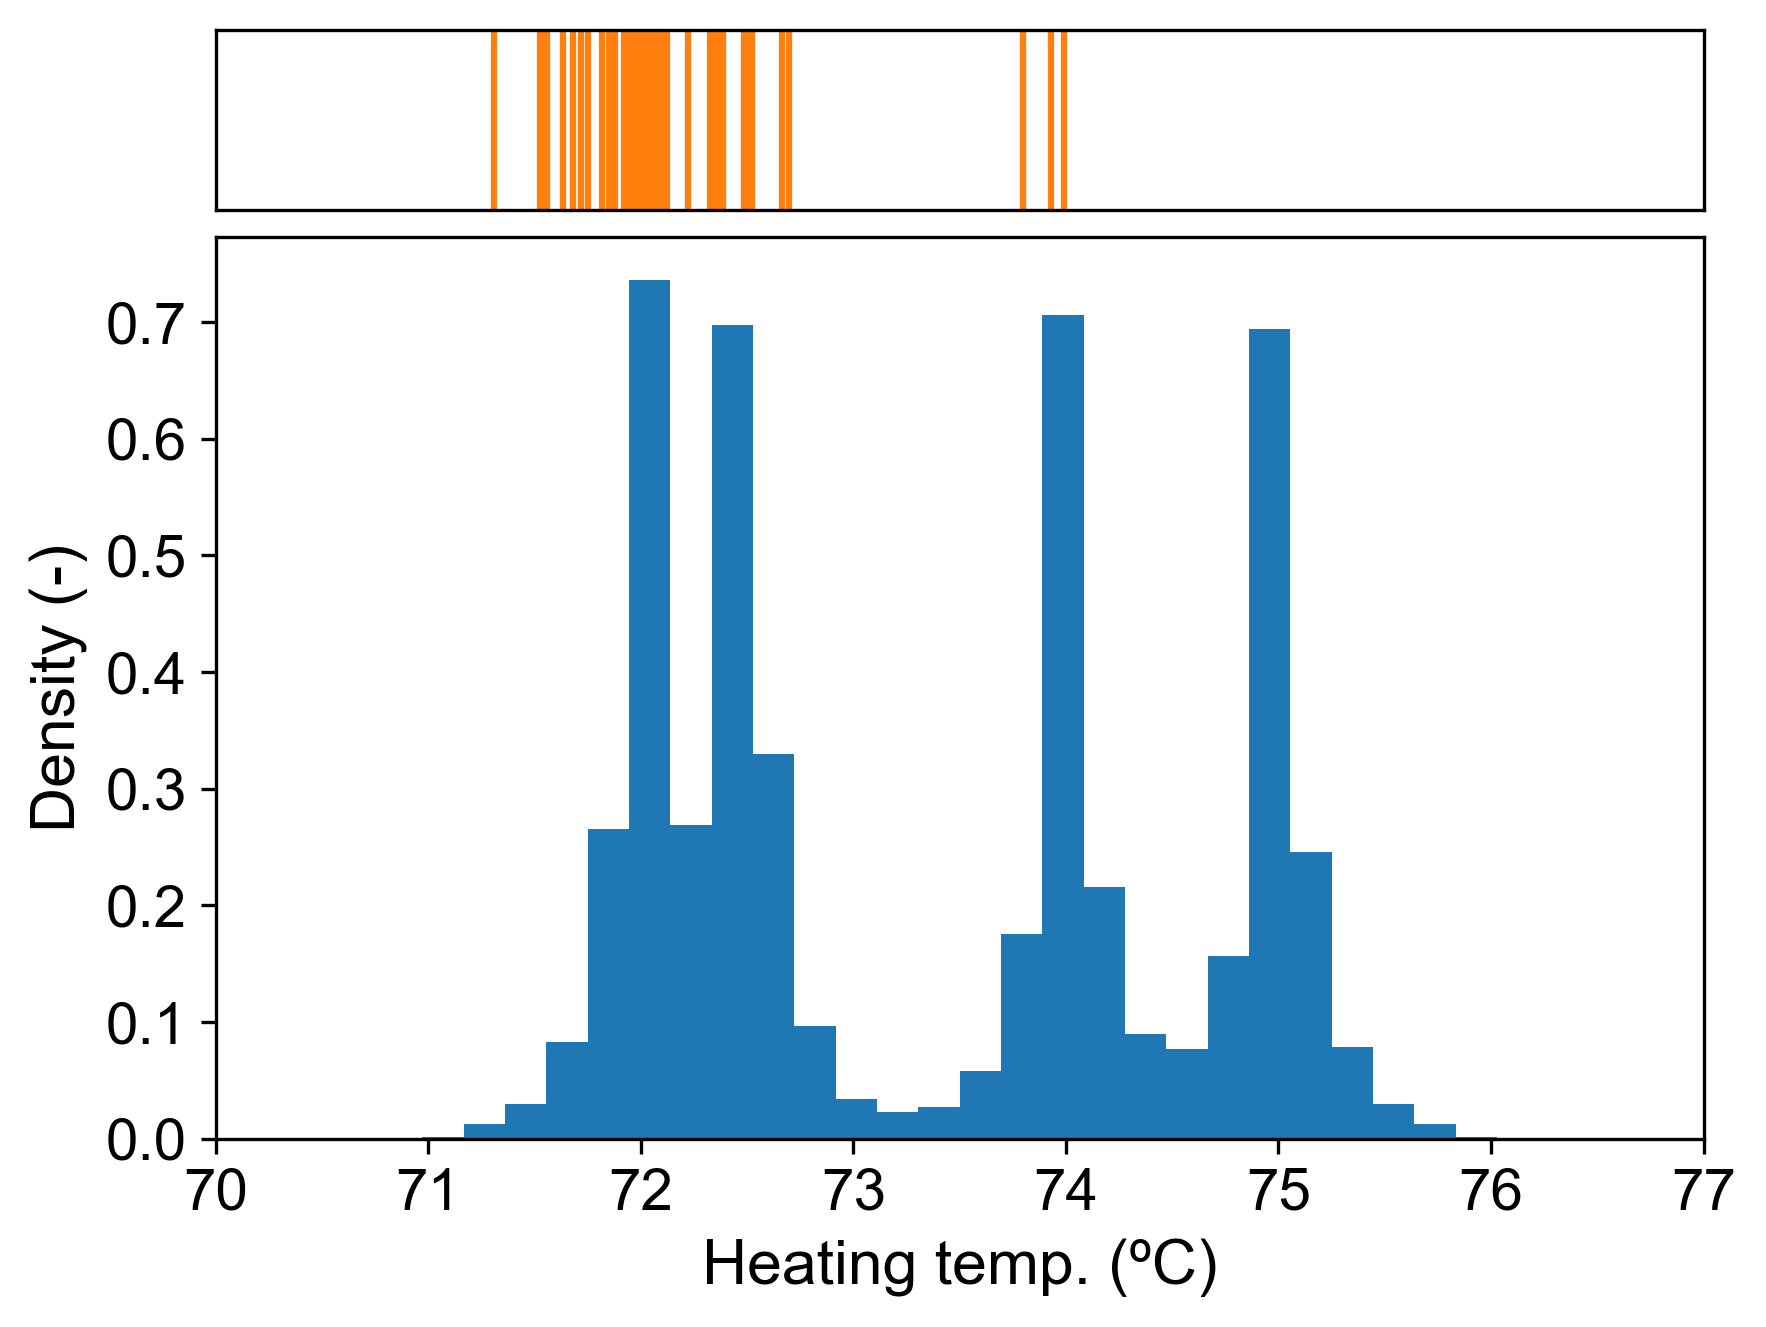

In [140]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([70, 77])
ax[1].set_xlim([70, 77])
for i in range(len(temp_heat_ill)):
    ax[0].axvline(x = temp_heat_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(temp_heat[prevalence_or_not==1], density="TRUE", range = (70, 77), bins = 36)
ax[1].set_xlabel("Heating temp. (ºC)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

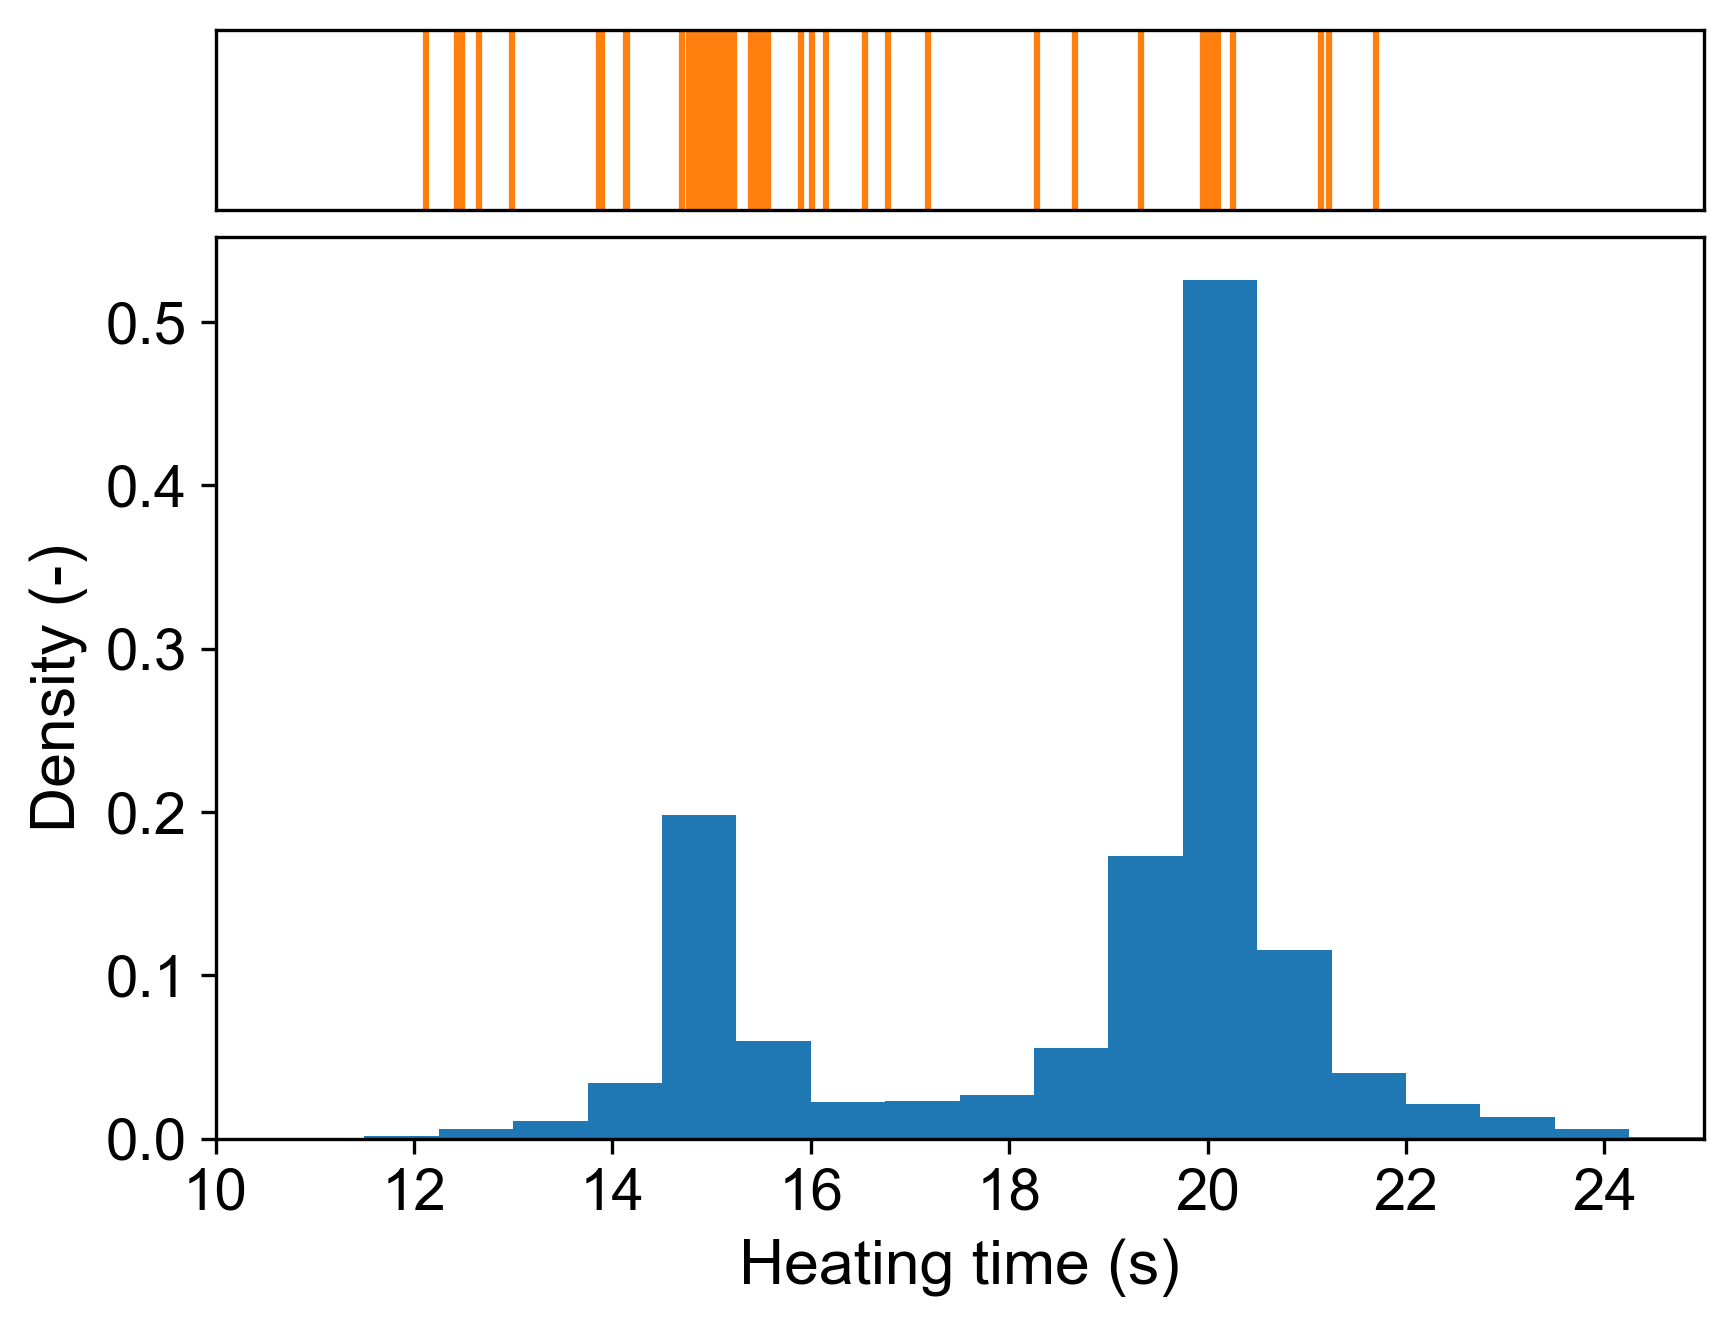

In [141]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([10, 25])
ax[1].set_xlim([10, 25])
for i in range(len(time_heat_ill)):
    ax[0].axvline(x = time_heat_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(time_heat[prevalence_or_not==1], density="TRUE", range = (10, 25), bins = 20)
ax[1].set_xlabel("Heating time (s)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

In [142]:
time_heat_ill

0     14.911867
1     14.987796
2     16.551186
3     14.859019
4     15.029709
        ...    
56    15.040588
57    14.845228
58    13.868545
59    12.983670
60    17.184473
Name: time_heat_ill, Length: 61, dtype: float64

In [143]:
temp_heat_ill

0     72.006933
1     72.090038
2     73.797769
3     71.927688
4     71.311809
        ...    
56    71.525622
57    72.003647
58    71.975569
59    72.032846
60    72.696255
Name: temp_heat_ill, Length: 61, dtype: float64

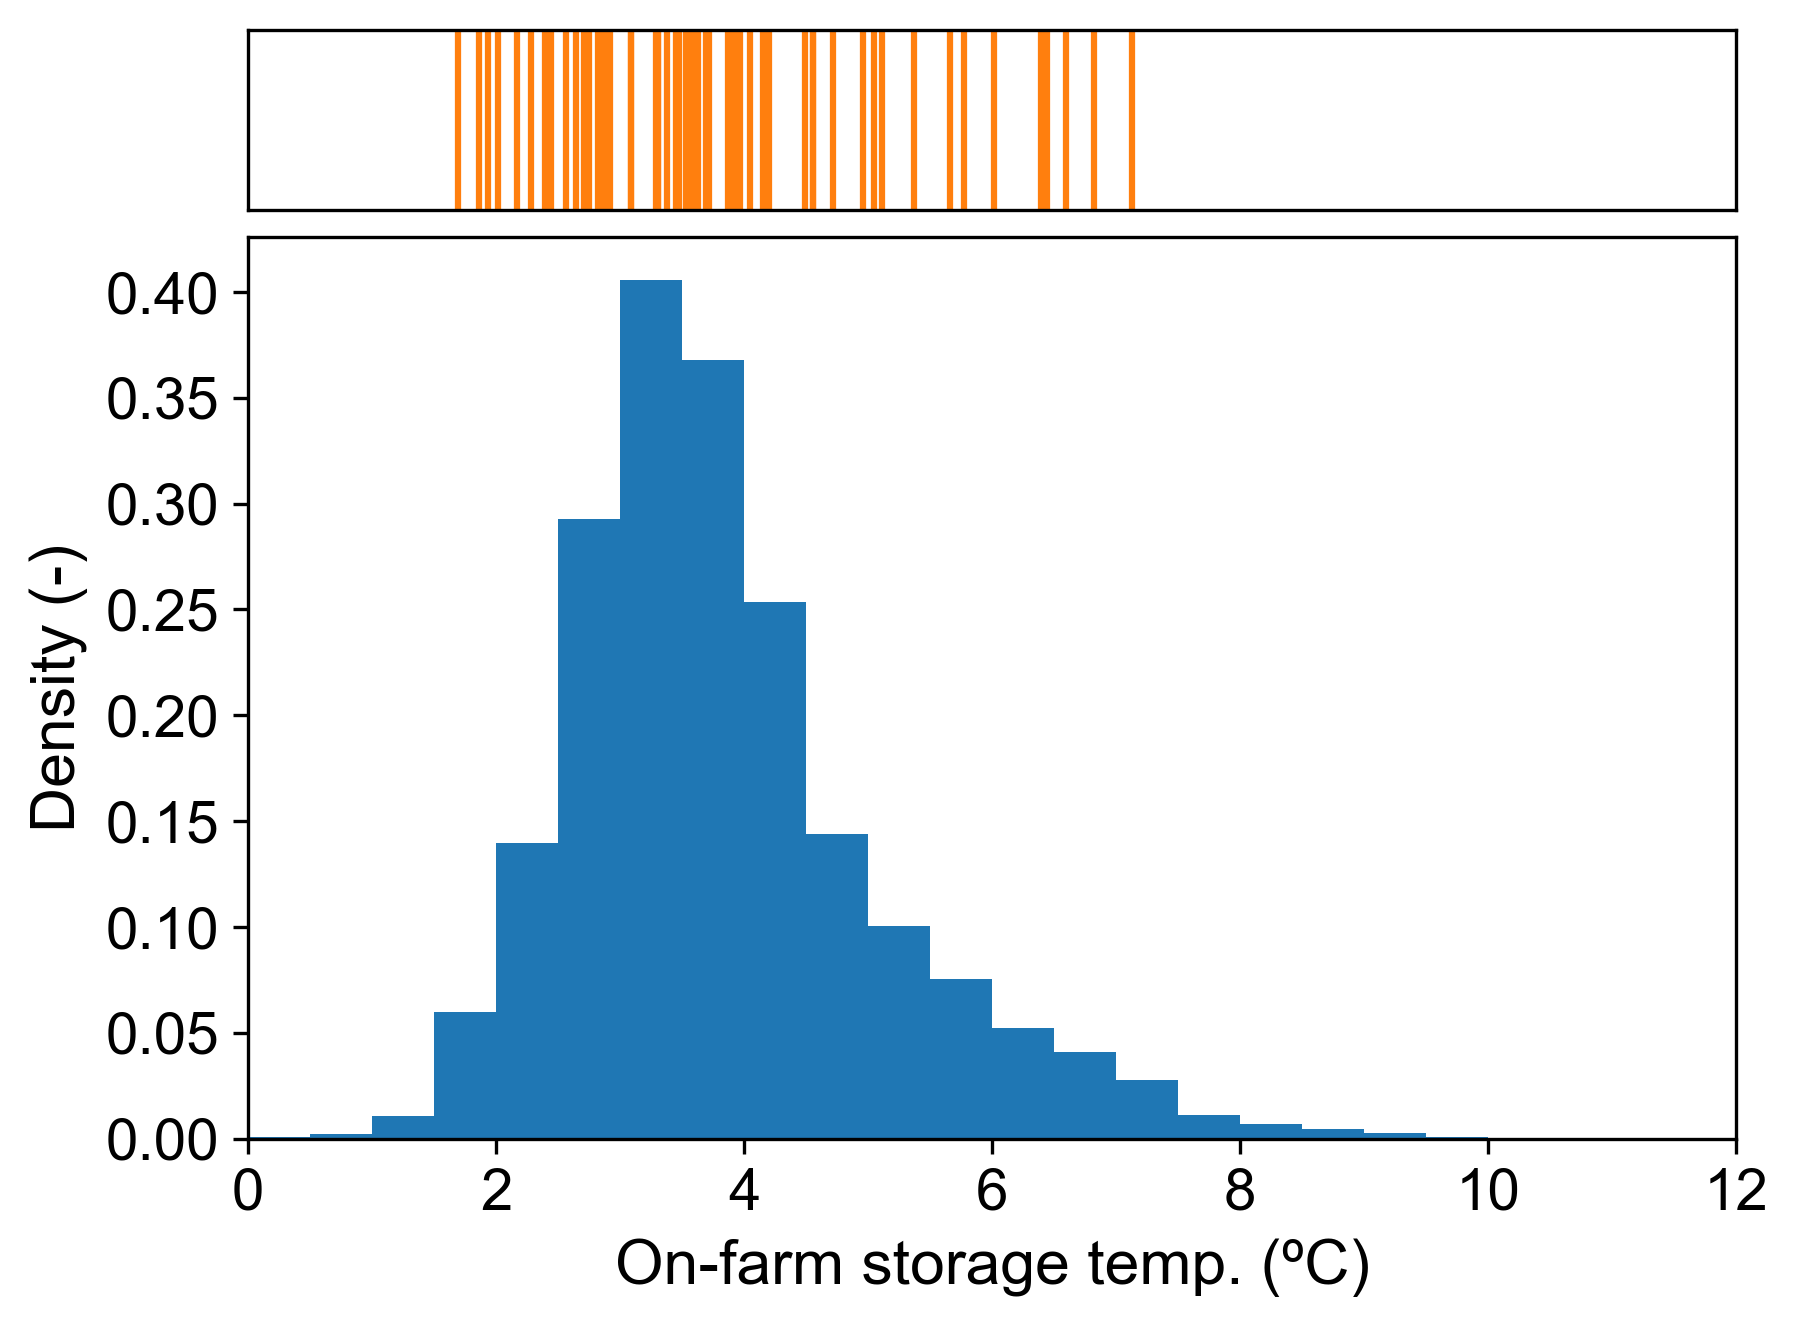

In [144]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([0, 12])
ax[1].set_xlim([0, 12])
for i in range(len(temp_heat_ill)):
    ax[0].axvline(x = temp_pre_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(temp_pre[prevalence_or_not==1], density="TRUE", range = (0, 10), bins = 20)
ax[1].set_xlabel("On-farm storage temp. (ºC)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

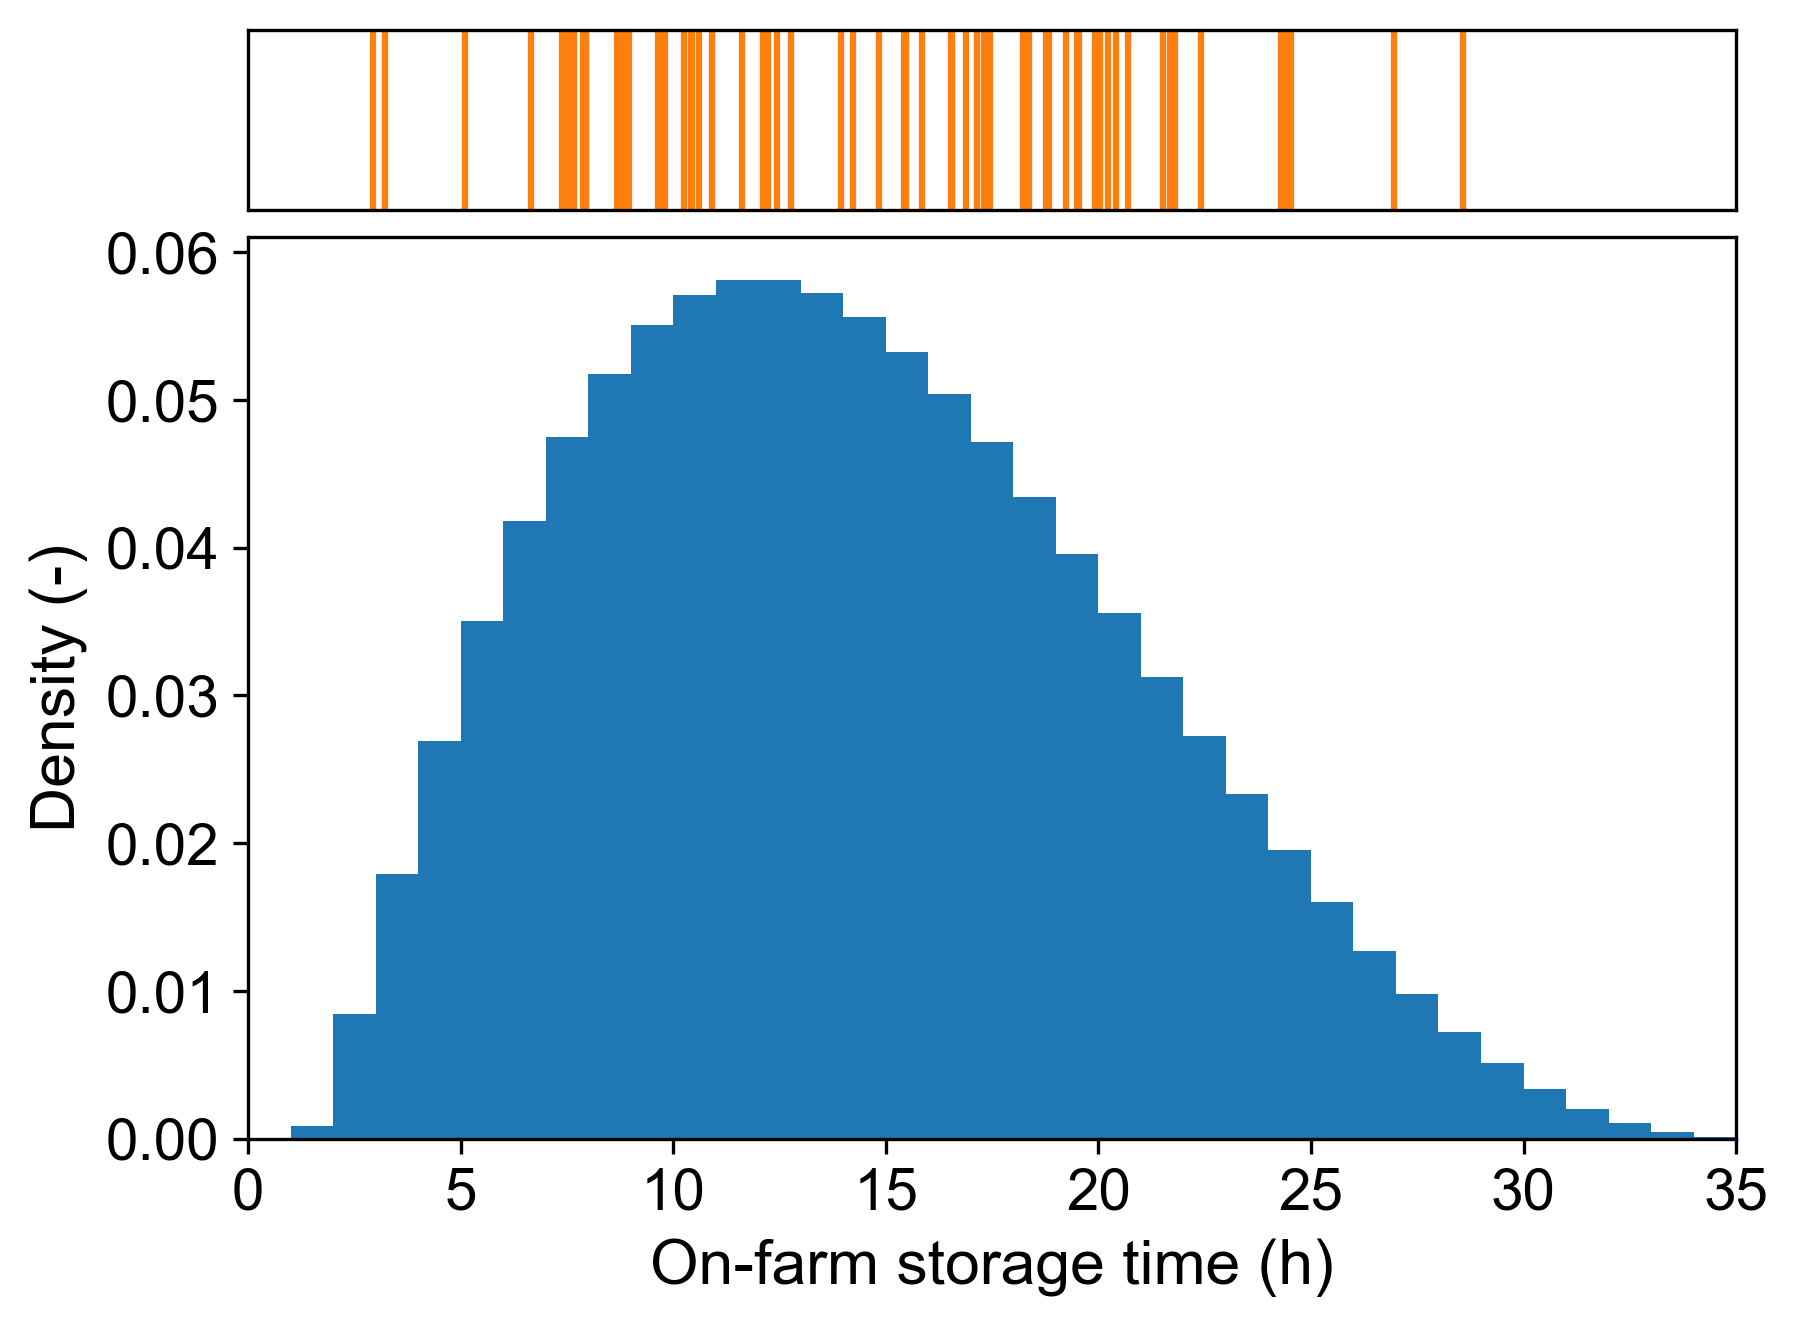

In [145]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([0, 35])
ax[1].set_xlim([0, 35])
for i in range(len(temp_heat_ill)):
    ax[0].axvline(x = time_pre_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(time_pre[prevalence_or_not==1], density="TRUE", range = (0, 35), bins = 35)
ax[1].set_xlabel("On-farm storage time (h)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

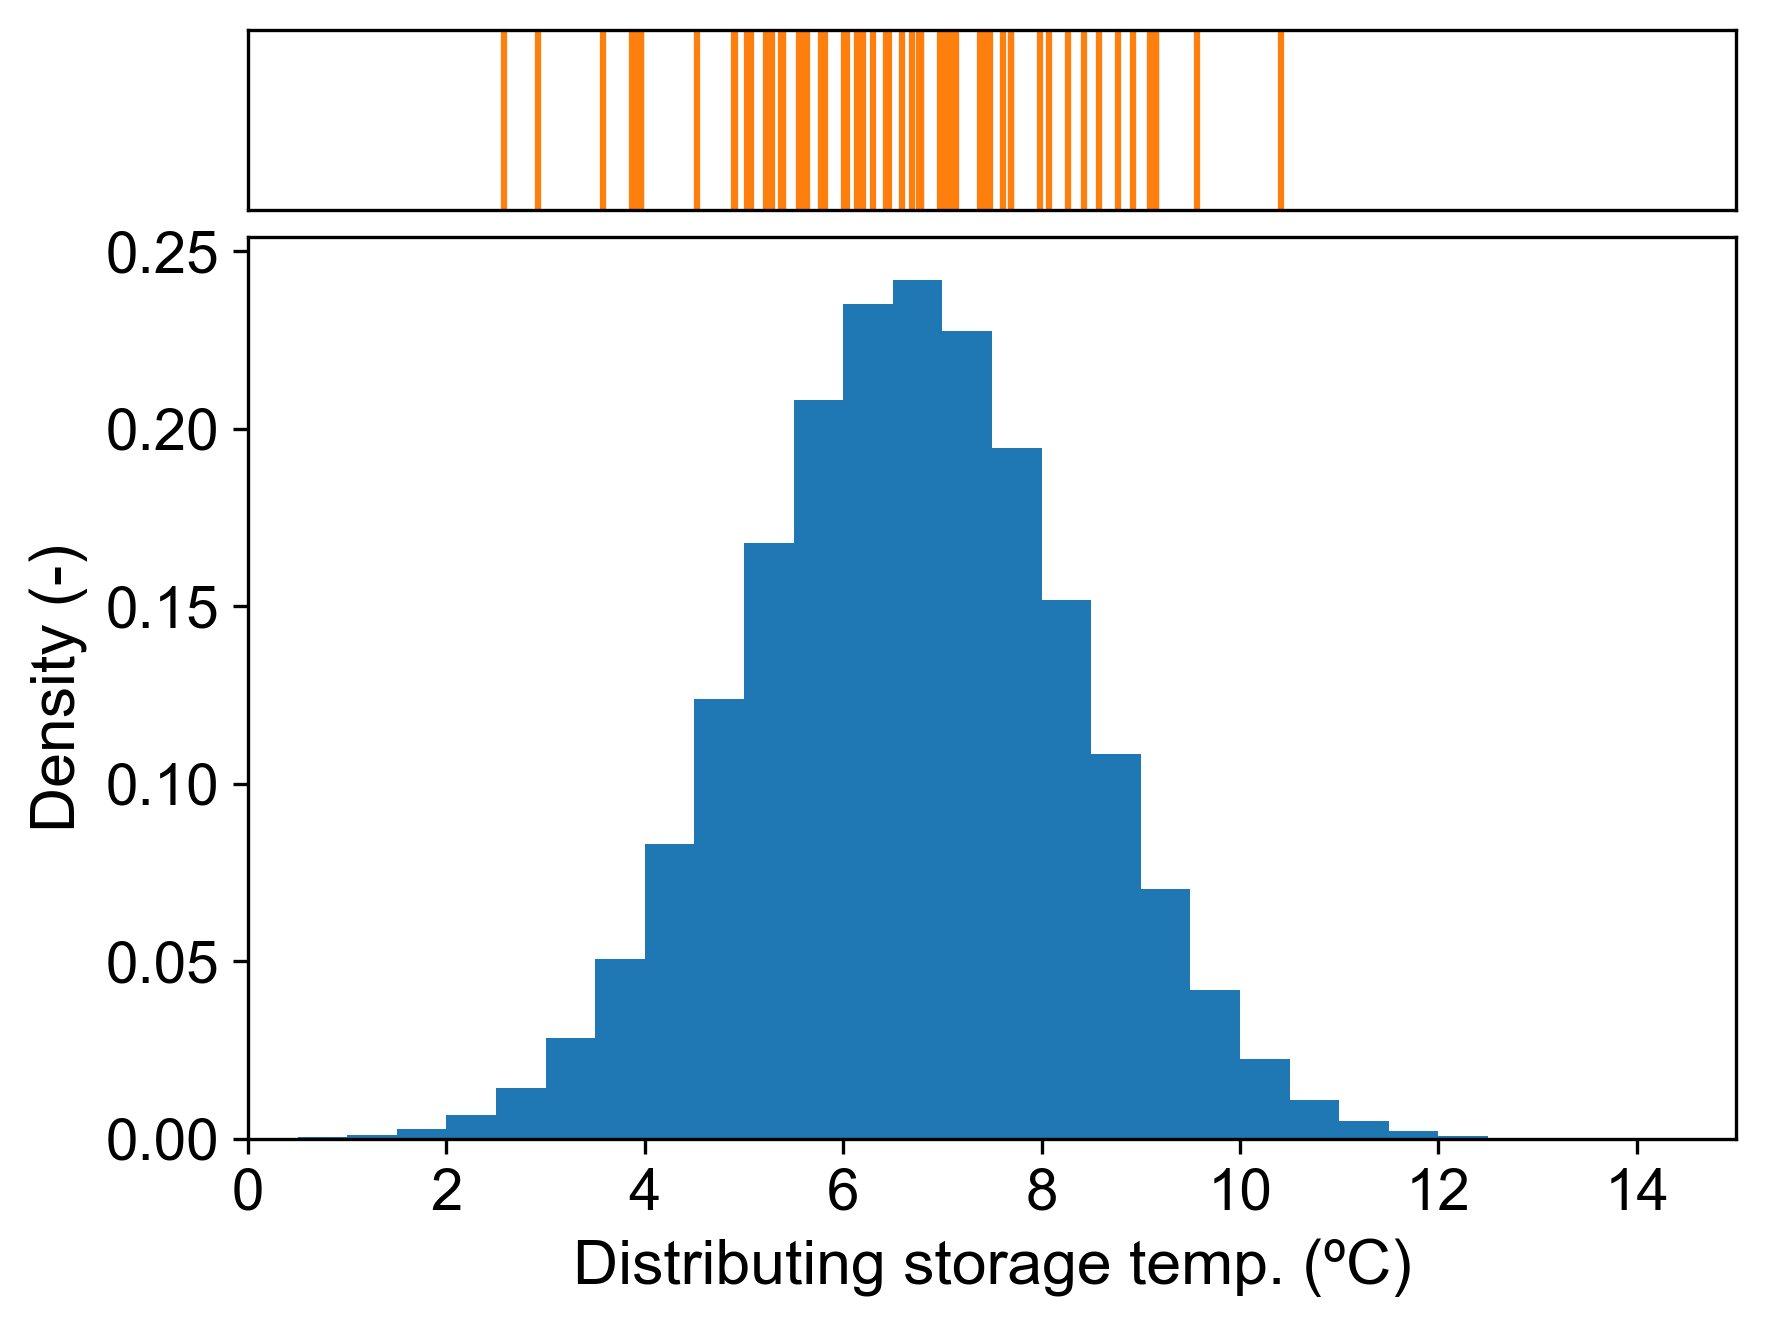

In [146]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([0, 15])
ax[1].set_xlim([0, 15])
for i in range(len(temp_heat_ill)):
    ax[0].axvline(x = temp_dist_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(temp_dist[prevalence_or_not==1], density="TRUE", range = (0, 15), bins = 30)
ax[1].set_xlabel("Distributing storage temp. (ºC)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

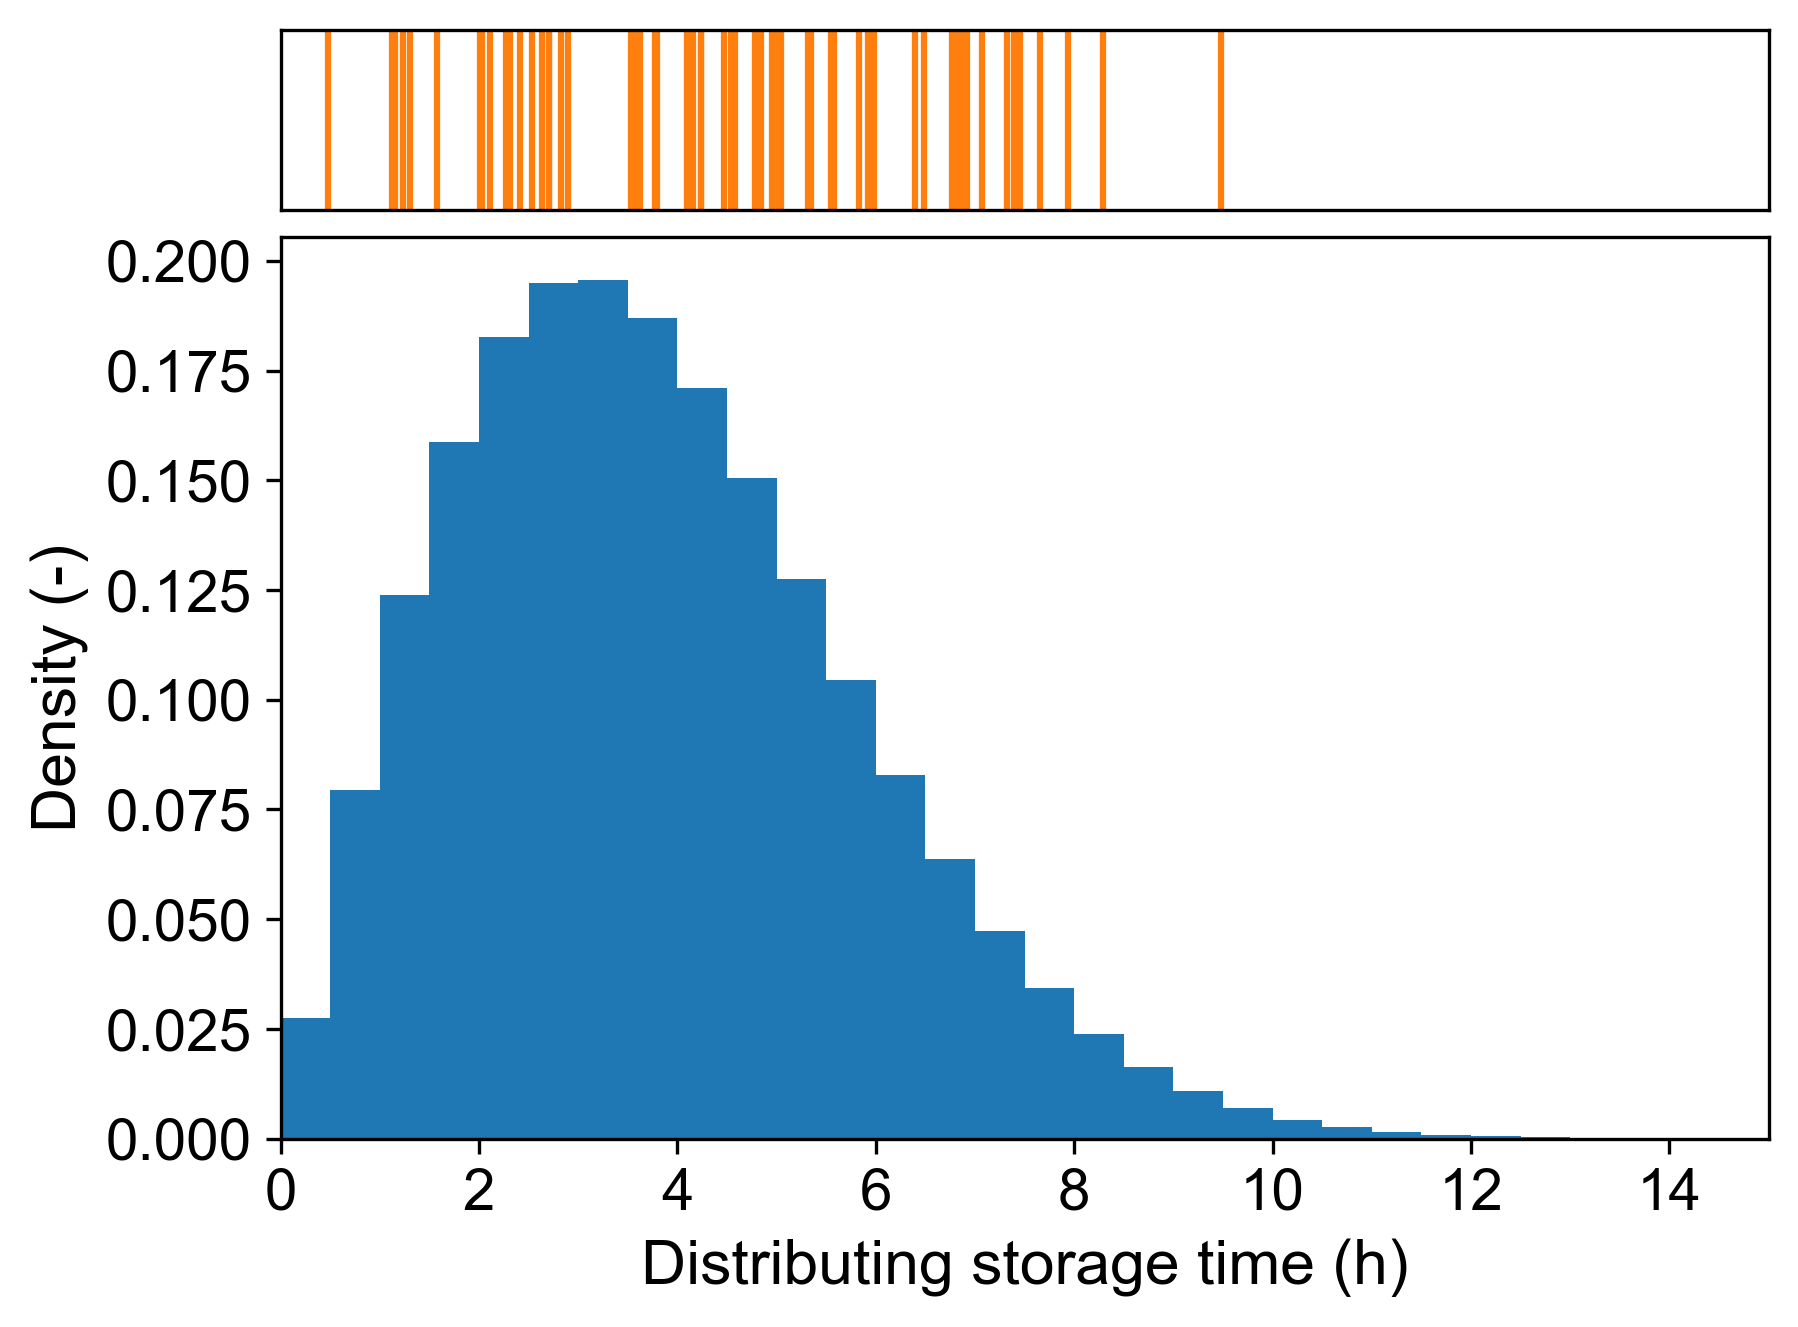

In [147]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([0, 15])
ax[1].set_xlim([0, 15])
for i in range(len(temp_heat_ill)):
    ax[0].axvline(x = time_dist_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(time_dist[prevalence_or_not==1], density="TRUE", range = (0, 15), bins = 30)
ax[1].set_xlabel("Distributing storage time (h)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

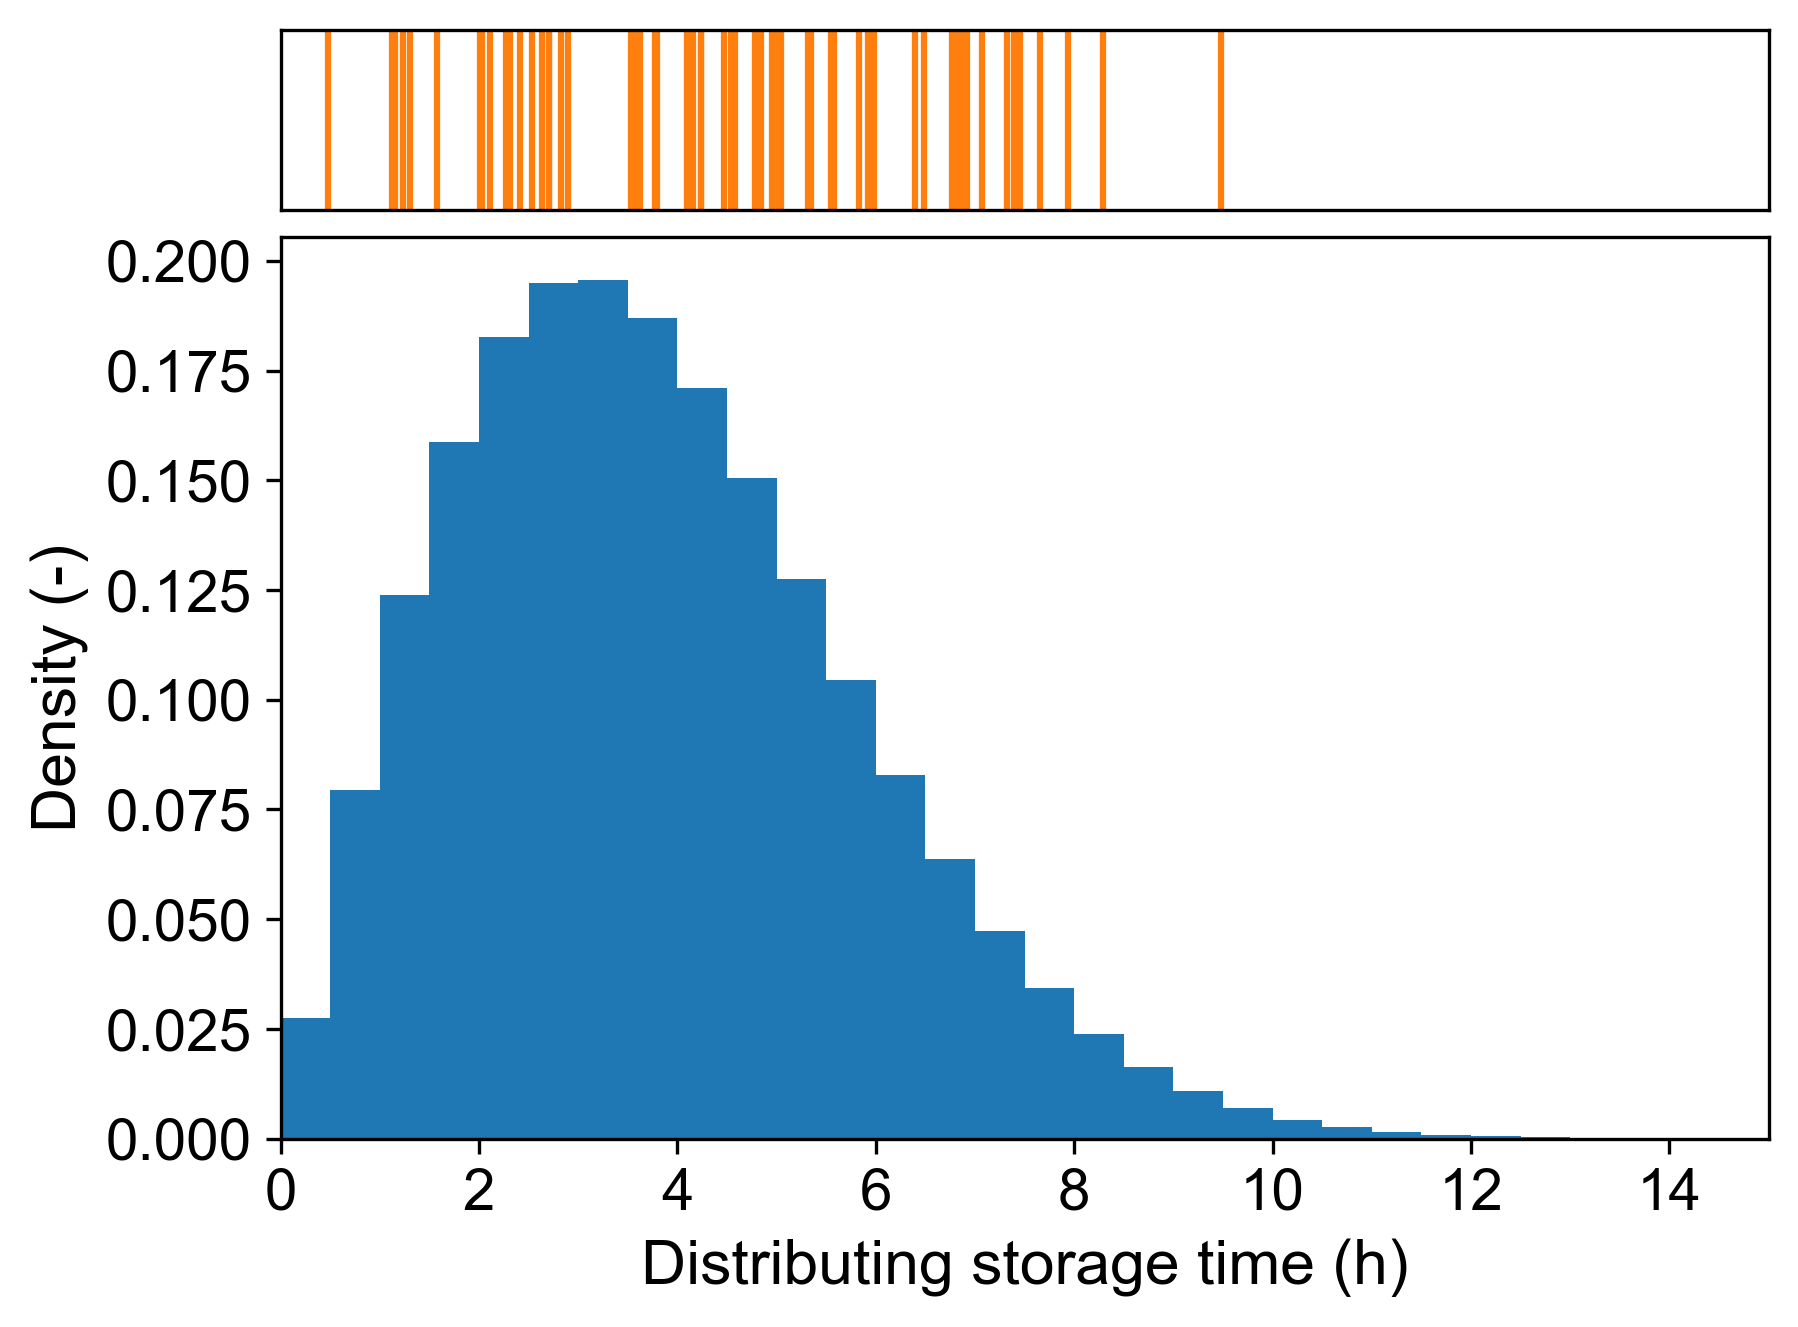

In [148]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([0, 15])
ax[1].set_xlim([0, 15])
for i in range(len(temp_heat_ill)):
    ax[0].axvline(x = time_dist_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(time_dist[prevalence_or_not==1], density="TRUE", range = (0, 15), bins = 30)
ax[1].set_xlabel("Distributing storage time (h)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

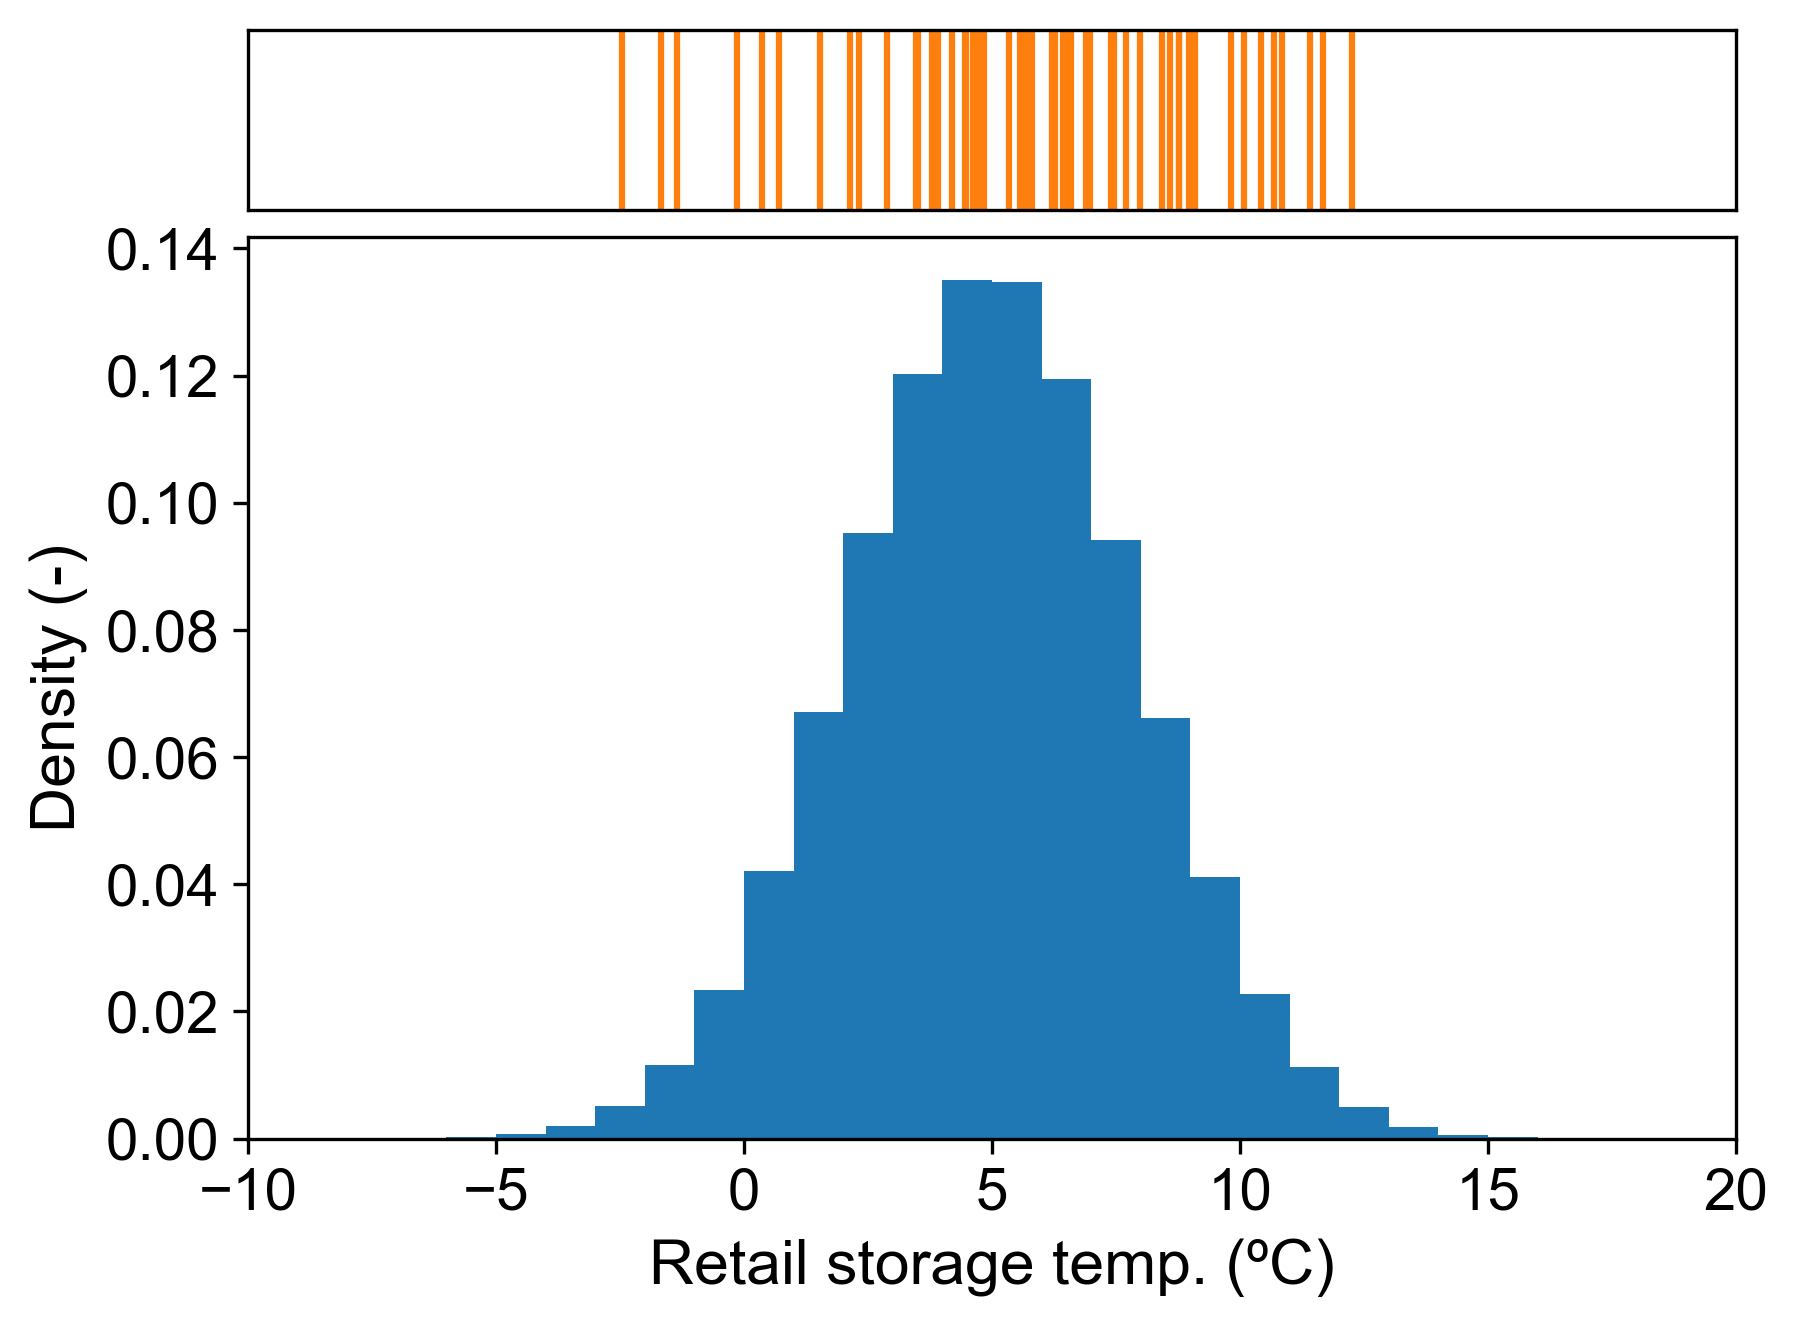

In [149]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-10, 20])
ax[1].set_xlim([-10, 20])
for i in range(len(temp_heat_ill)):
    ax[0].axvline(x = temp_retail_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(temp_retail[prevalence_or_not==1], density="TRUE", range = (-10, 20), bins = 30)
ax[1].set_xlabel("Retail storage temp. (ºC)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

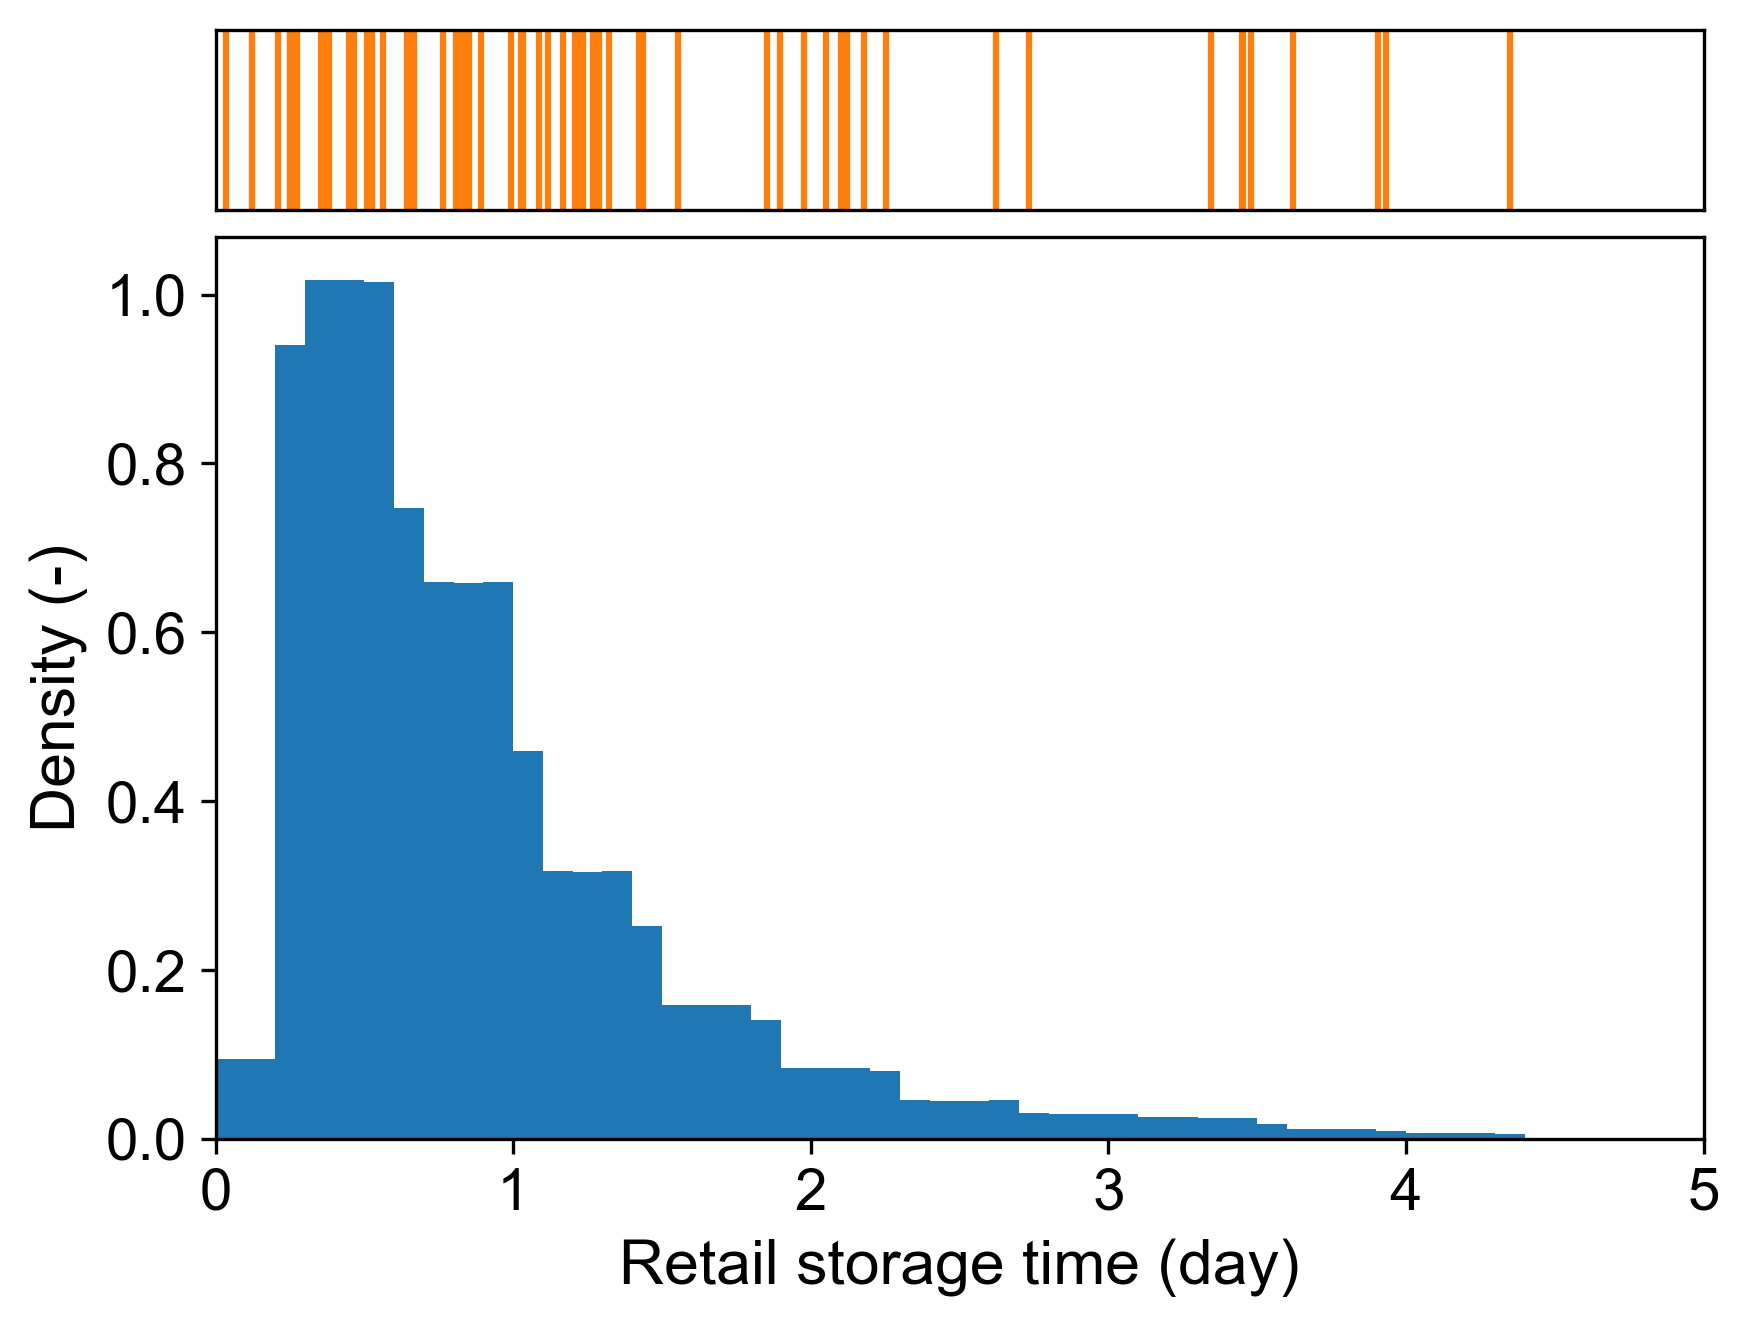

In [150]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([0, 5])
ax[1].set_xlim([0, 5])
for i in range(len(temp_heat_ill)):
    ax[0].axvline(x = (time_retail_ill/24)[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(time_retail[prevalence_or_not==1]/24, density="TRUE", range = (0, 5), bins = 50)
ax[1].set_xlabel("Retail storage time (day)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

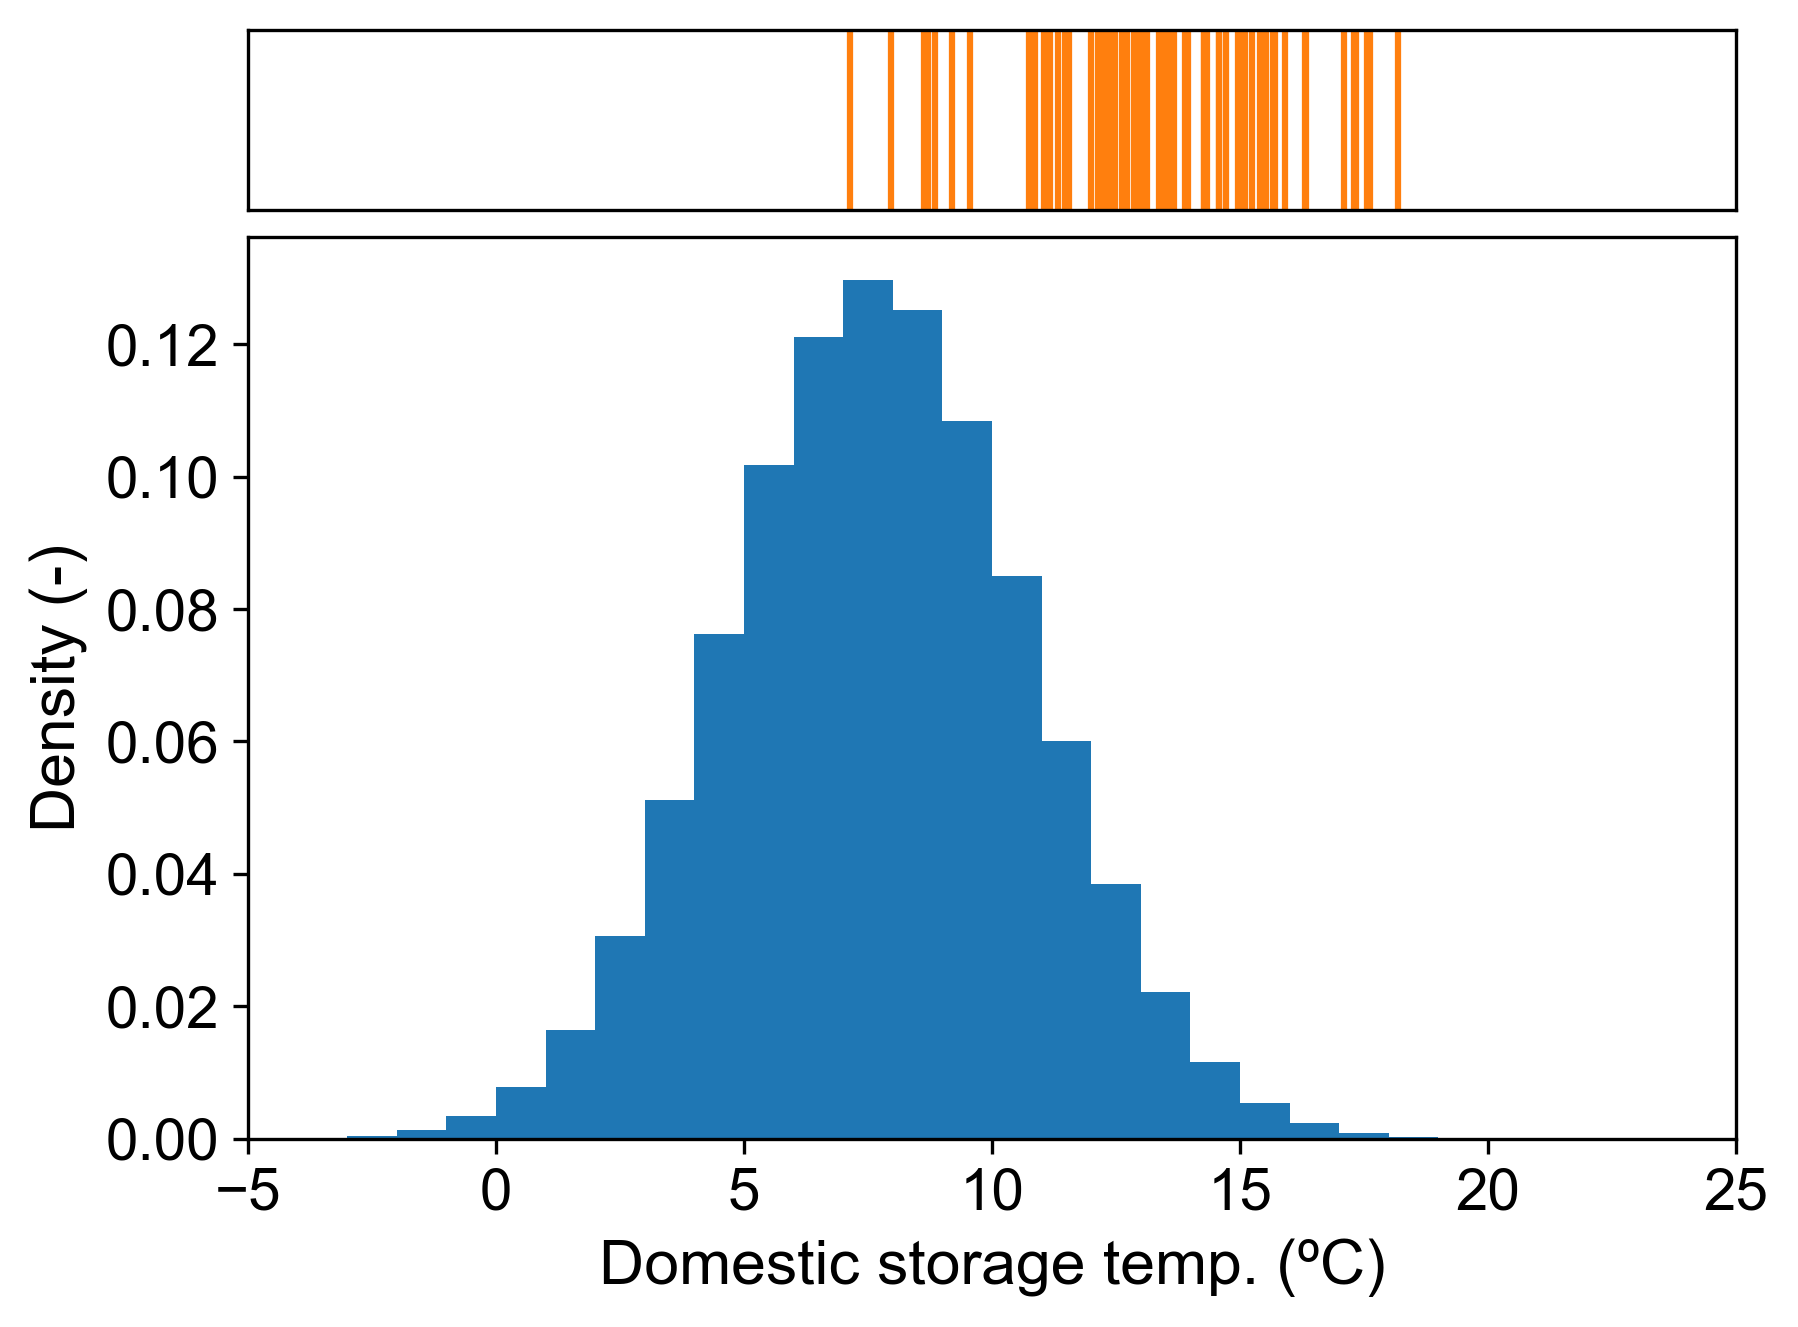

In [151]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-5, 25])
ax[1].set_xlim([-5, 25])
for i in range(len(temp_heat_ill)):
    ax[0].axvline(x = temp_domestic_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(temp_domestic[prevalence_or_not==1], density="TRUE", range = (-5, 25), bins = 30)
ax[1].set_xlabel("Domestic storage temp. (ºC)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

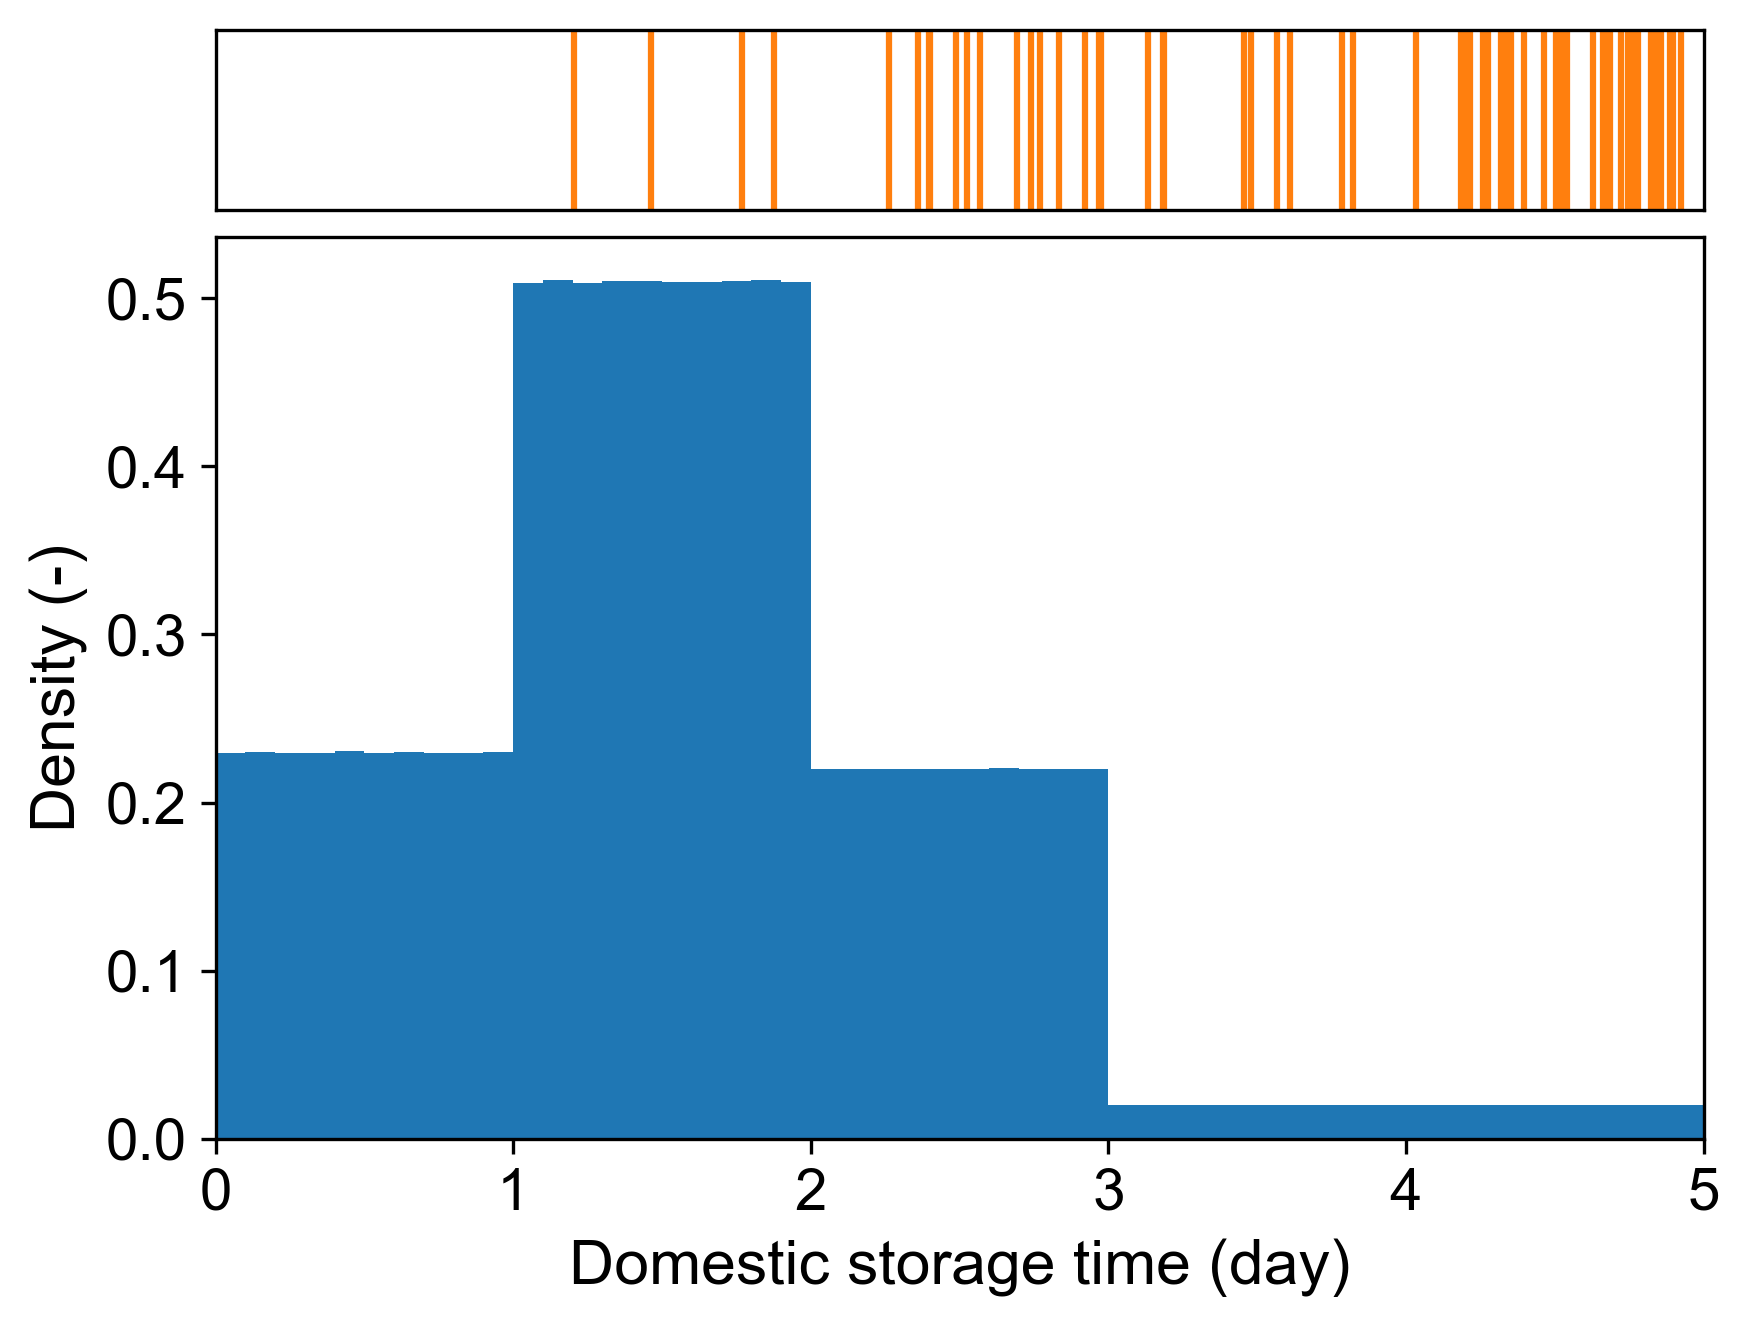

In [152]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([0, 5])
ax[1].set_xlim([0, 5])
for i in range(len(temp_heat_ill)):
    ax[0].axvline(x = (time_domestic_ill/24)[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(time_domestic[prevalence_or_not==1]/24, density="TRUE", range = (0, 5), bins = 50)
ax[1].set_xlabel("Domestic storage time (day)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

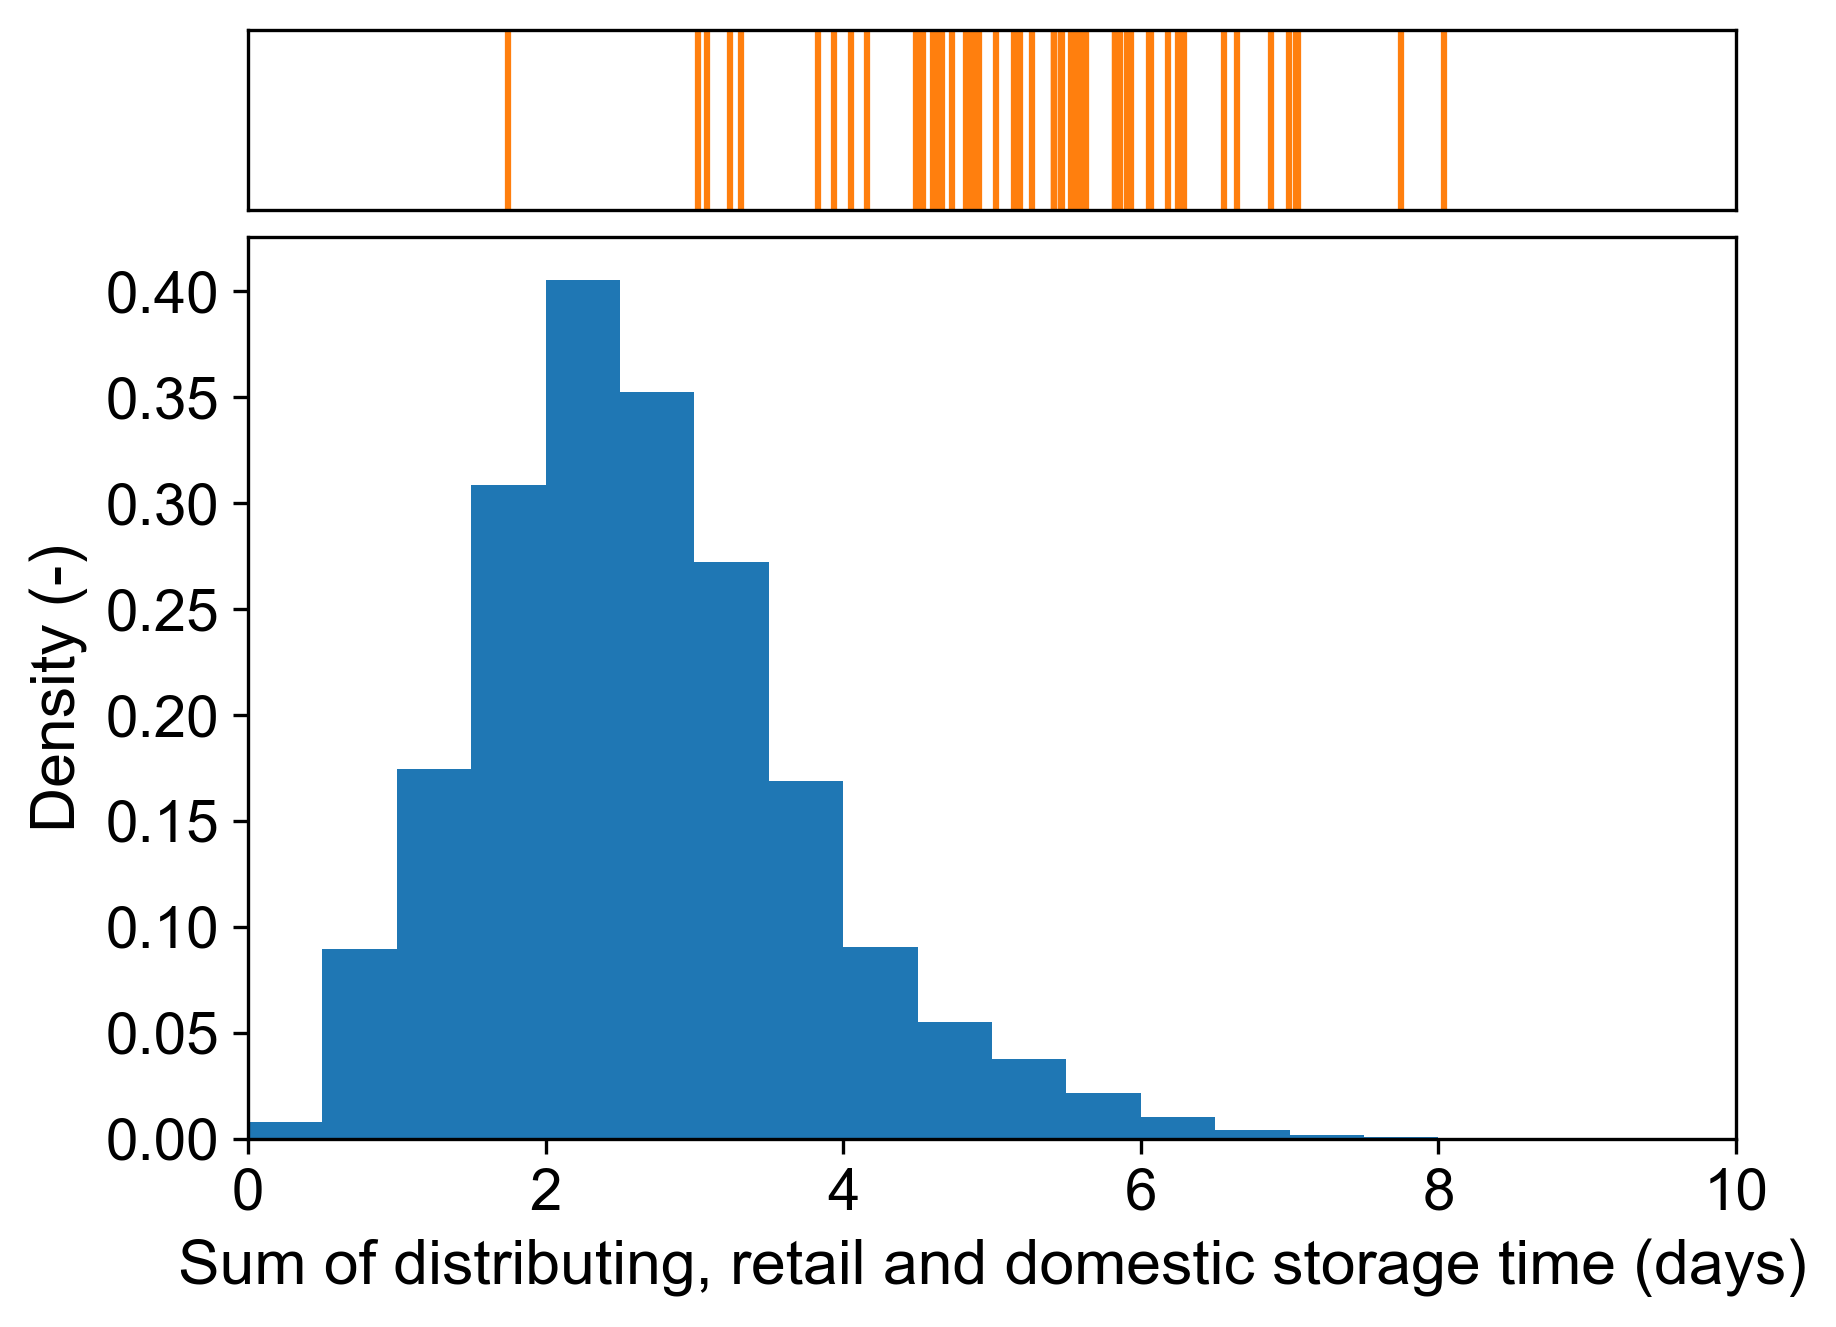

In [153]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([0, 10])
ax[1].set_xlim([0, 10])
for i in range(len(((time_dist_ill+time_retail_ill+time_domestic_ill)/24))):
    ax[0].axvline(x = ((time_dist_ill+time_retail_ill+time_domestic_ill)/24)[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist((time_dist[prevalence_or_not==1]+time_retail[prevalence_or_not==1]+time_domestic[prevalence_or_not==1])/24, density="TRUE", range = (0, 10), bins = 20)
ax[1].set_xlabel("Sum of distributing, retail and domestic storage time (days)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

In [154]:
(time_dist_ill+time_retail_ill+time_domestic_ill)/24

0     5.023722
1     5.471501
2     4.526642
3     4.633399
4     7.046186
        ...   
56    3.081860
57    5.419266
58    4.485778
59    5.144023
60    6.056674
Length: 61, dtype: float64

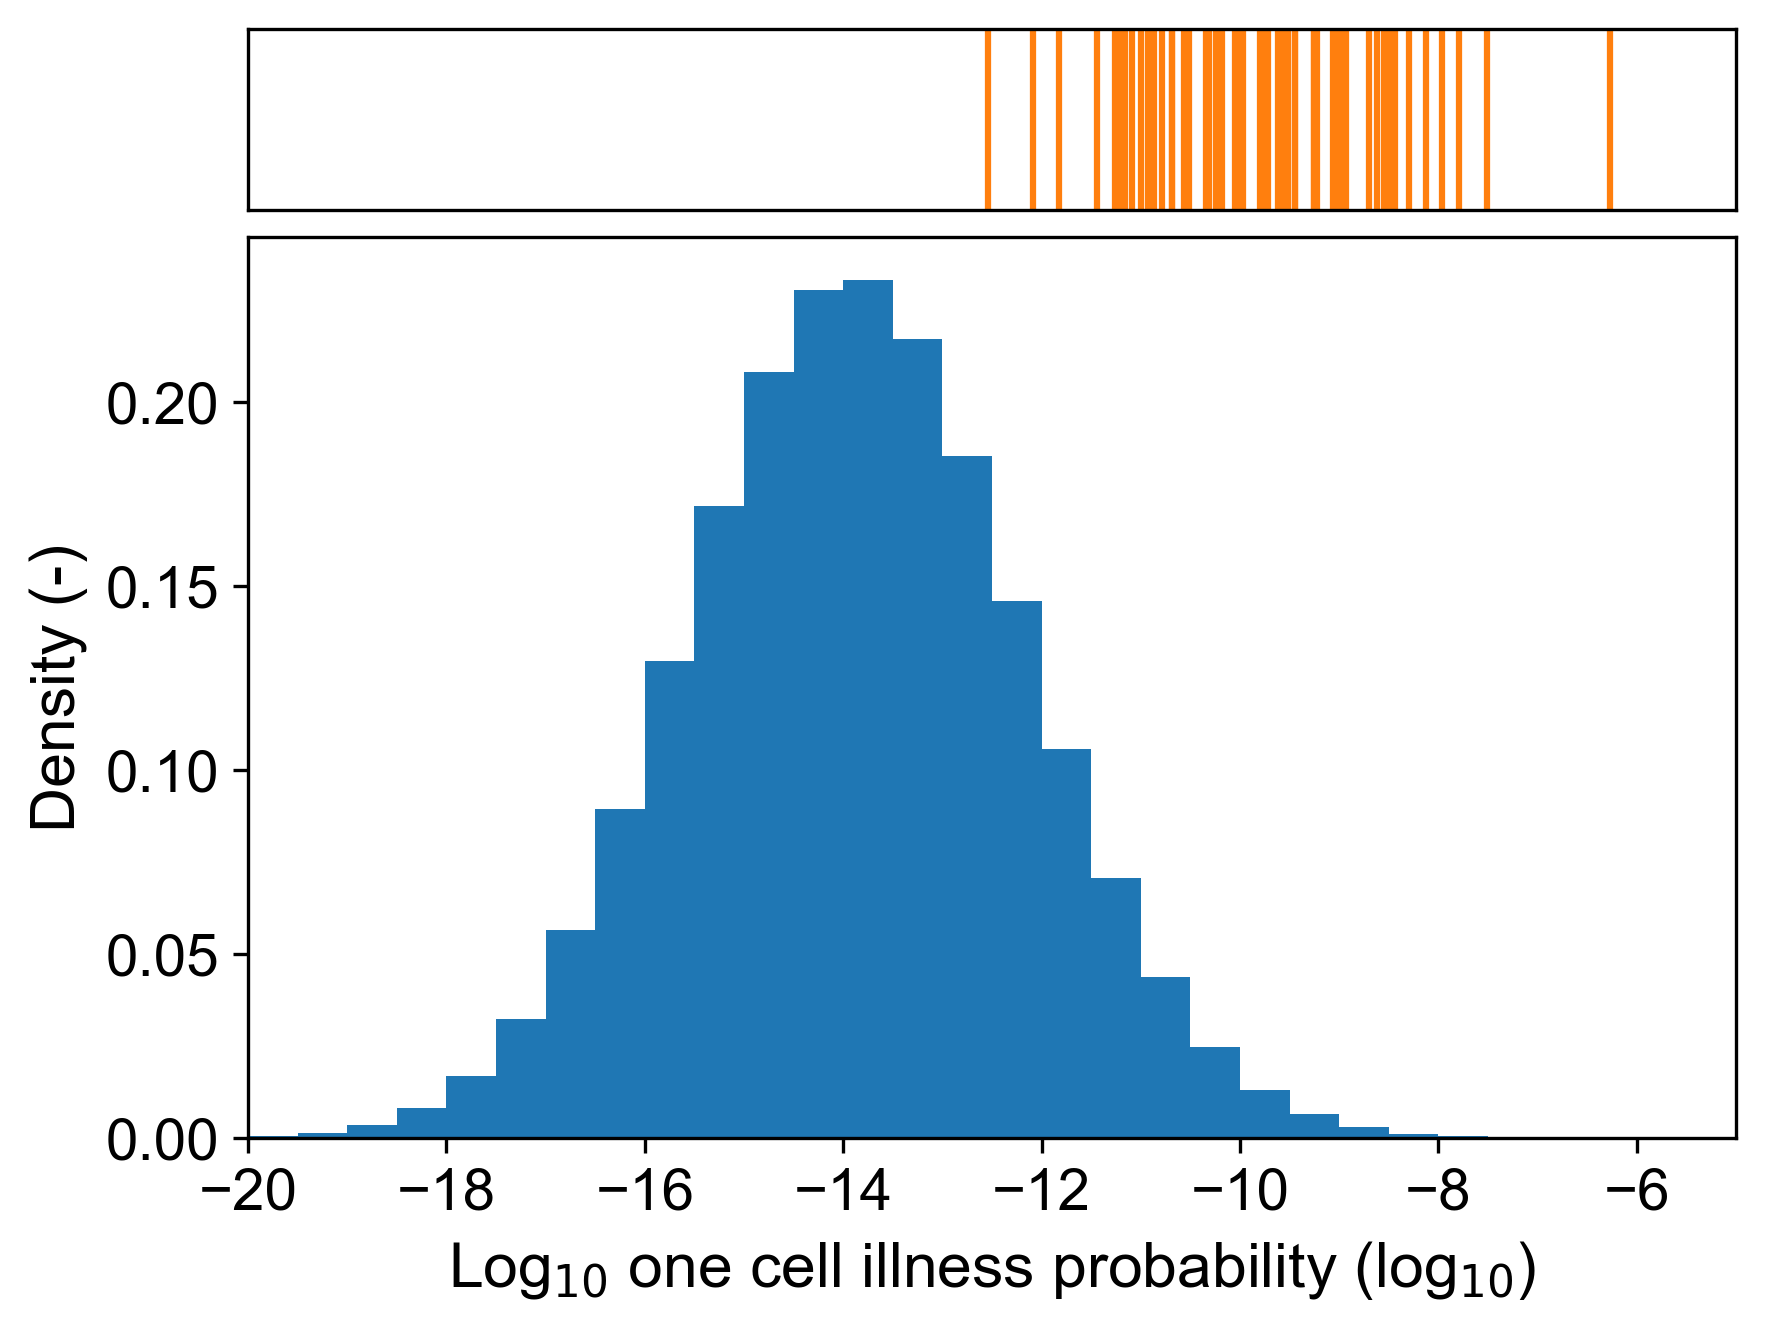

In [155]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-20, -5])
ax[1].set_xlim([-20, -5])
for i in range(len(np.log10(para_r_ill))):
    ax[0].axvline(x = np.log10(para_r_ill[i]), ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(np.log10(para_r[prevalence_or_not==1]), density="TRUE", range = (-20, -5), bins = 30)
ax[1].set_xlabel("Log$_{10}$ one cell illness probability (log$_{10}$)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

In [156]:
np.log10(para_r_ill)

0    -10.687813
1     -8.988275
2     -8.128913
3     -9.226948
4    -12.545265
        ...    
56    -9.737877
57   -10.513788
58    -9.449247
59    -6.266430
60   -10.335606
Name: para_r_ill, Length: 61, dtype: float64

In [157]:
np.max(logN_domestic)

8.438768041322955

In [144]:
Cases_iter = np.sum(Ill_or_not)
print(Cases_iter/Iteration)

2e-08


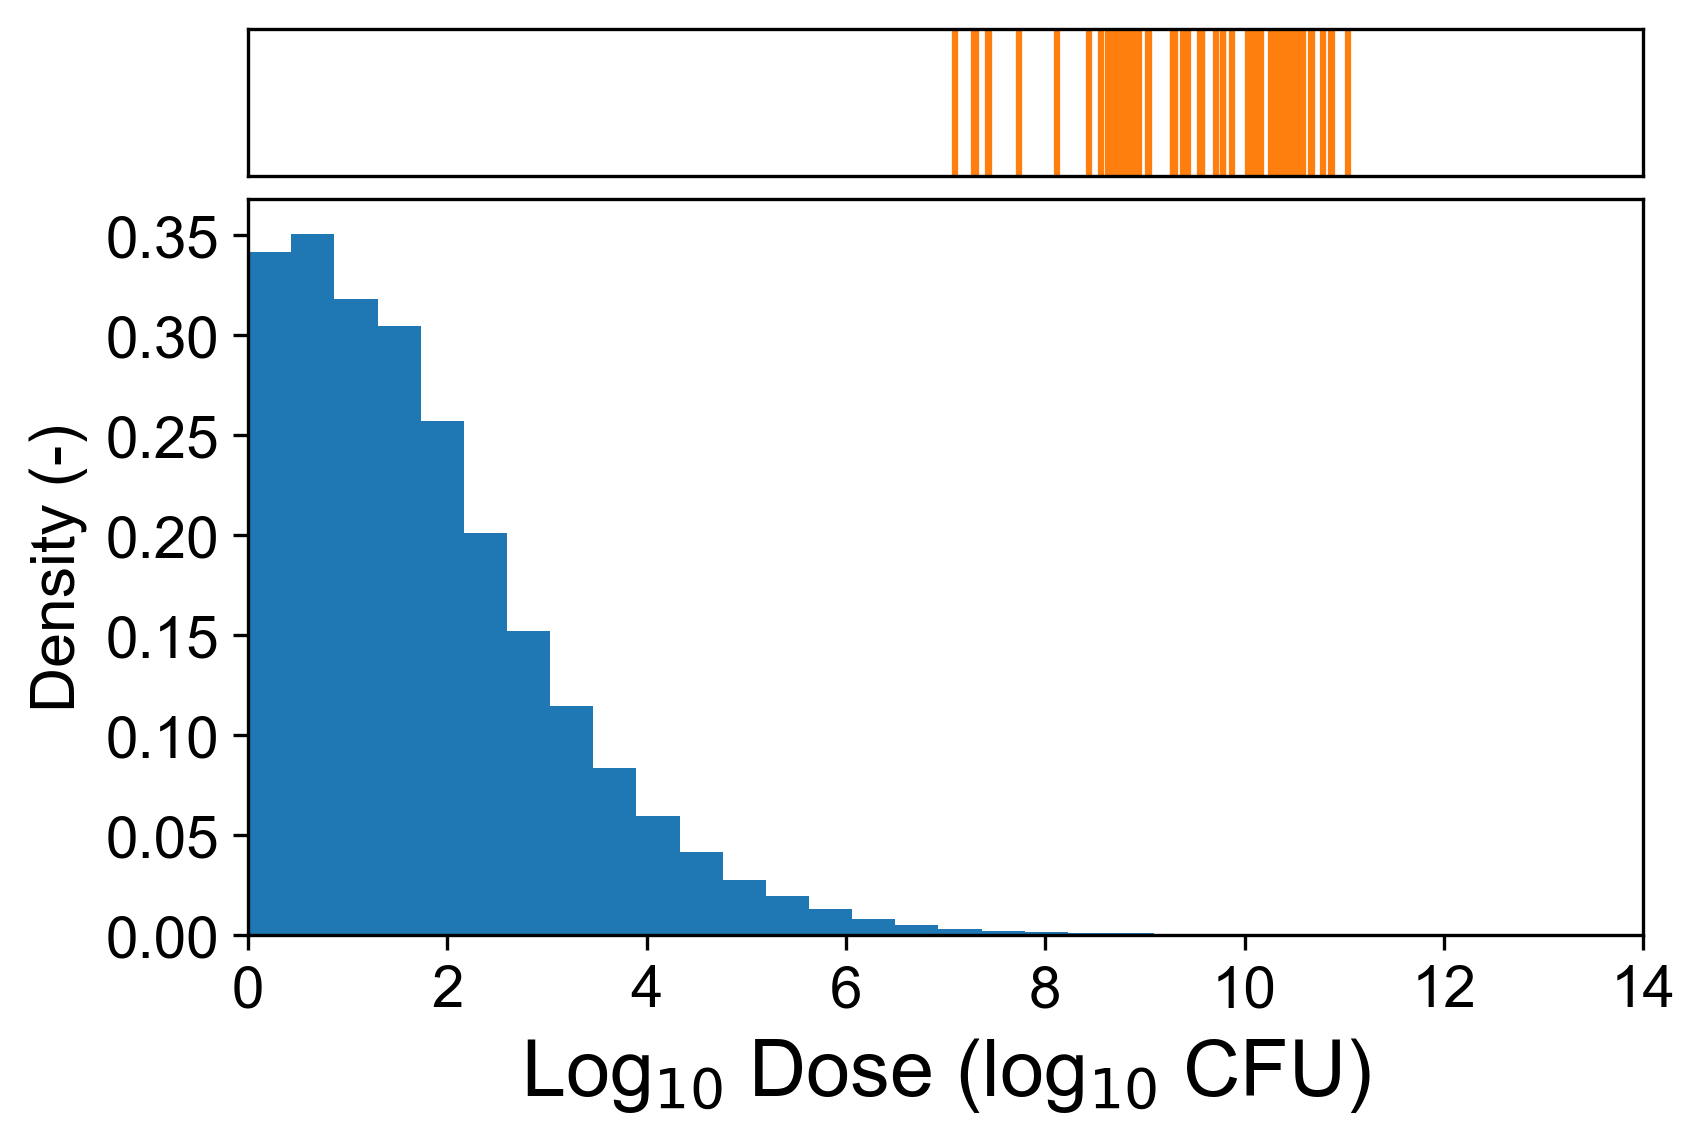

In [145]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([0, 14])
ax[1].set_xlim([0, 14])
for i in range(len(logN_dose_ill)):
    ax[0].axvline(x = logN_dose_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(logN_dose[logN_dose!=float('-inf')], density="TRUE", bins = 25)
ax[1].set_xlabel("Log$_{10}$ Dose (log$_{10}$ CFU)",size=19,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

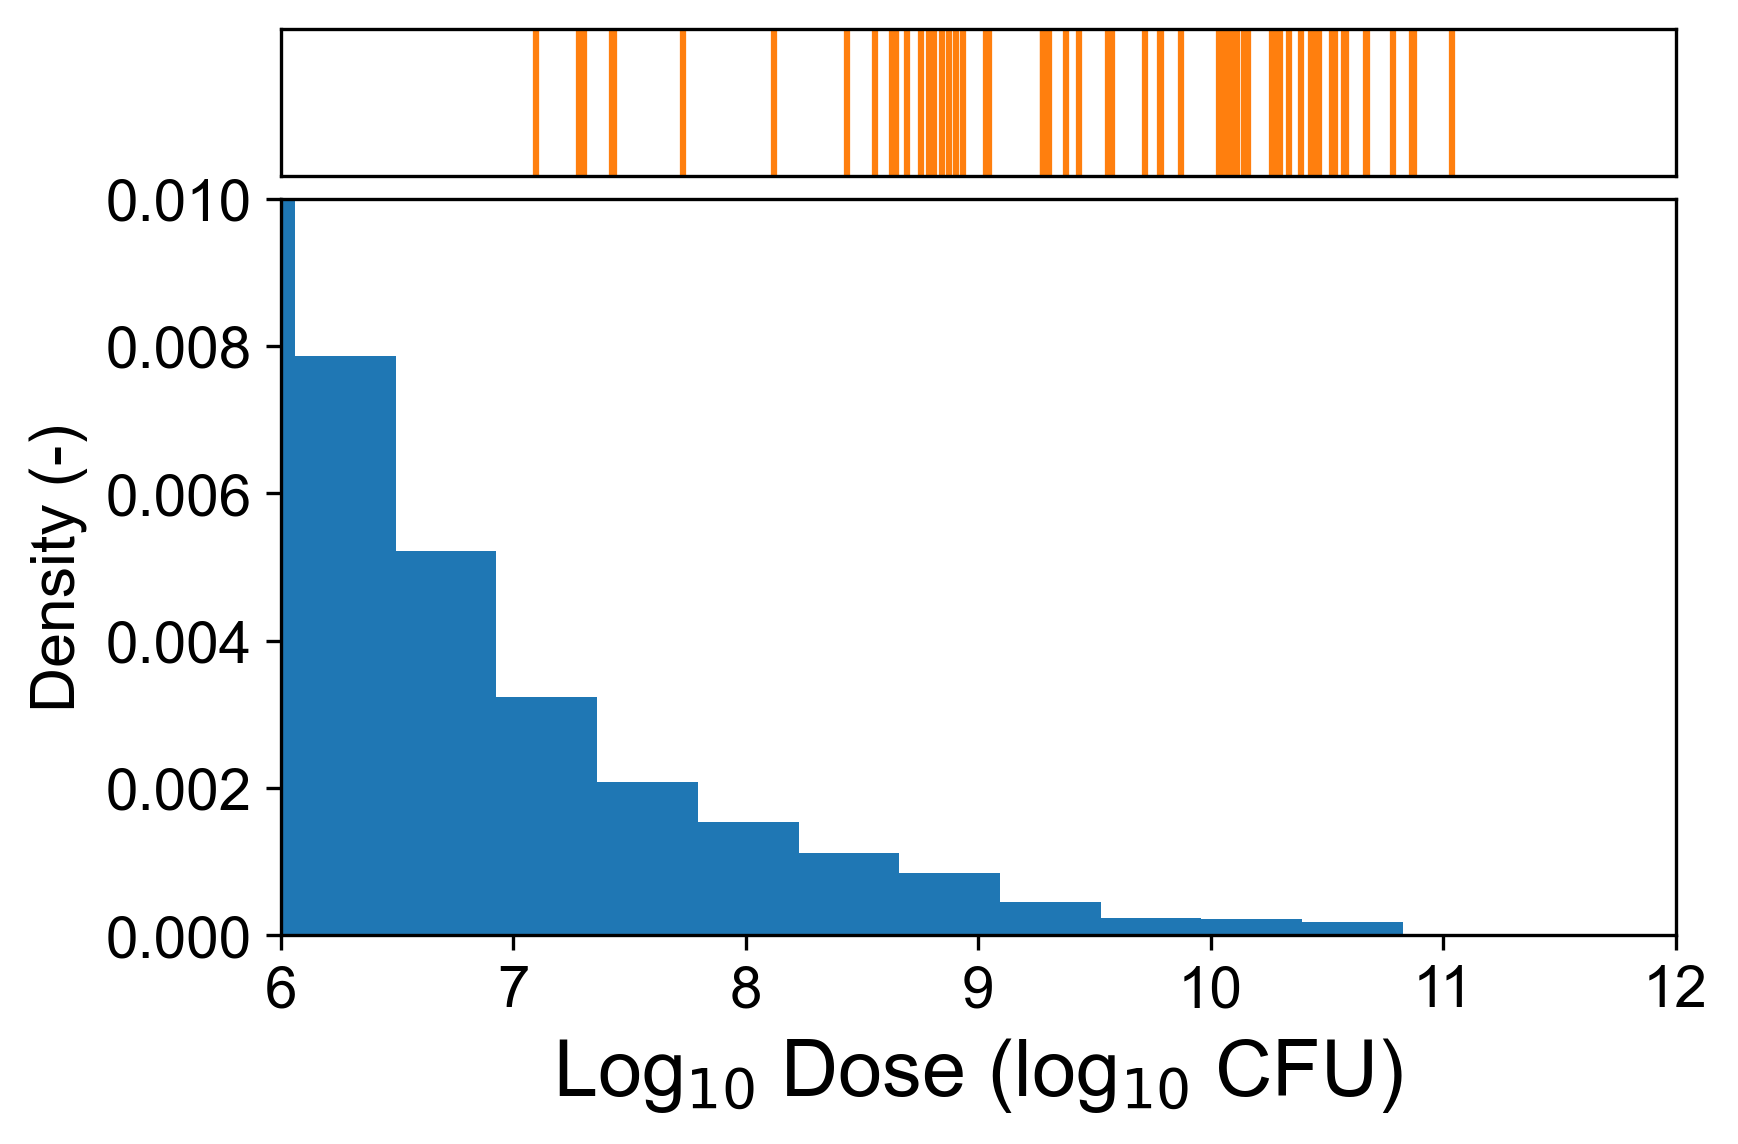

In [146]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([6, 12])
ax[1].set_xlim([6, 12])
ax[1].set_ylim([0, 0.010])
for i in range(len(logN_dose_ill)):
    ax[0].axvline(x = logN_dose_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(logN_dose[logN_dose!=float('-inf')], density="TRUE", bins = 25)
ax[1].set_xlabel("Log$_{10}$ Dose (log$_{10}$ CFU)",size=19,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

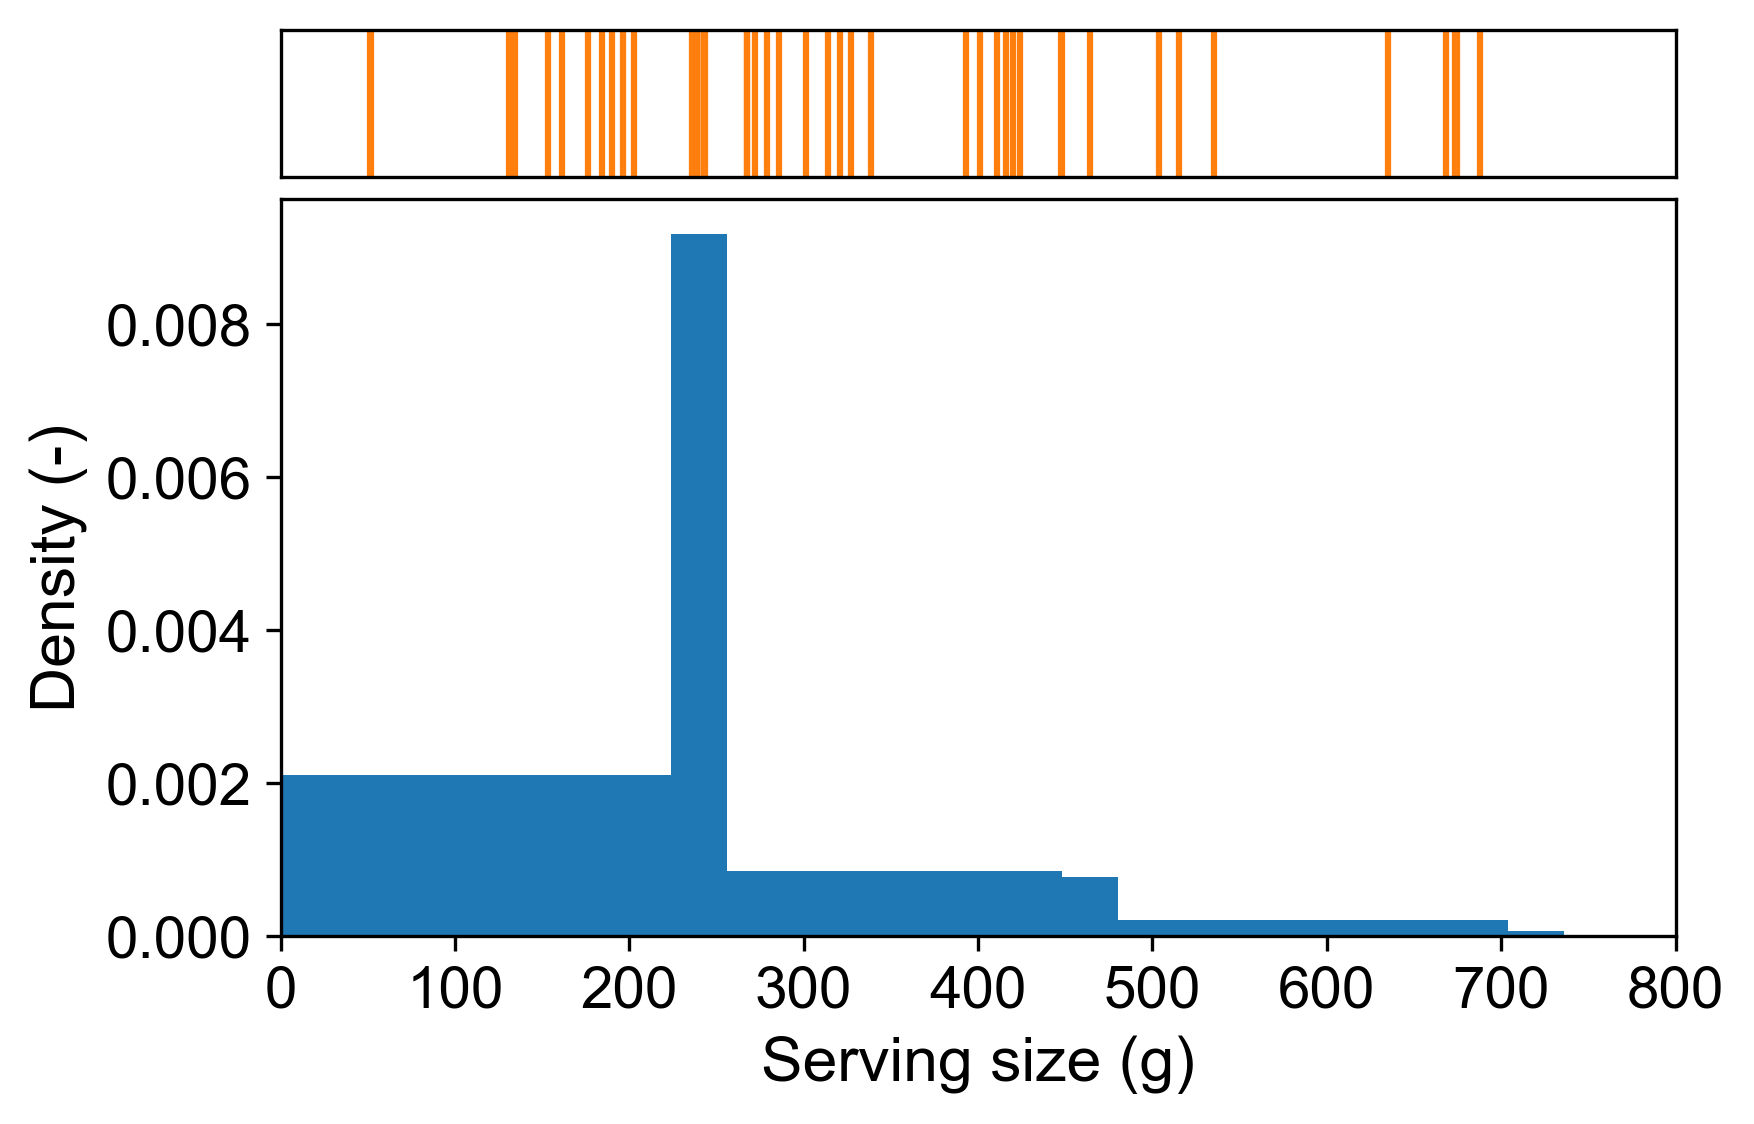

In [147]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([0, 800])
ax[1].set_xlim([0, 800])
for i in range(len(size_serve_ill)):
    ax[0].axvline(x = size_serve_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(size_serve[prevalence_or_not==1],density="TRUE", range = (0, 800), bins = 25)
ax[1].set_xlabel("Serving size (g)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

In [148]:
np.mean(size_serve[prevalence_or_not==1])

220.46618819241547

In [149]:
42*1000/np.mean(size_serve[prevalence_or_not==1])*17000000

3238591848.7275915

In [150]:
42*1000/np.mean(size_serve[prevalence_or_not==1])*17000000*len(para_r_ill)/Iteration/CopyNum

19.75541027723831

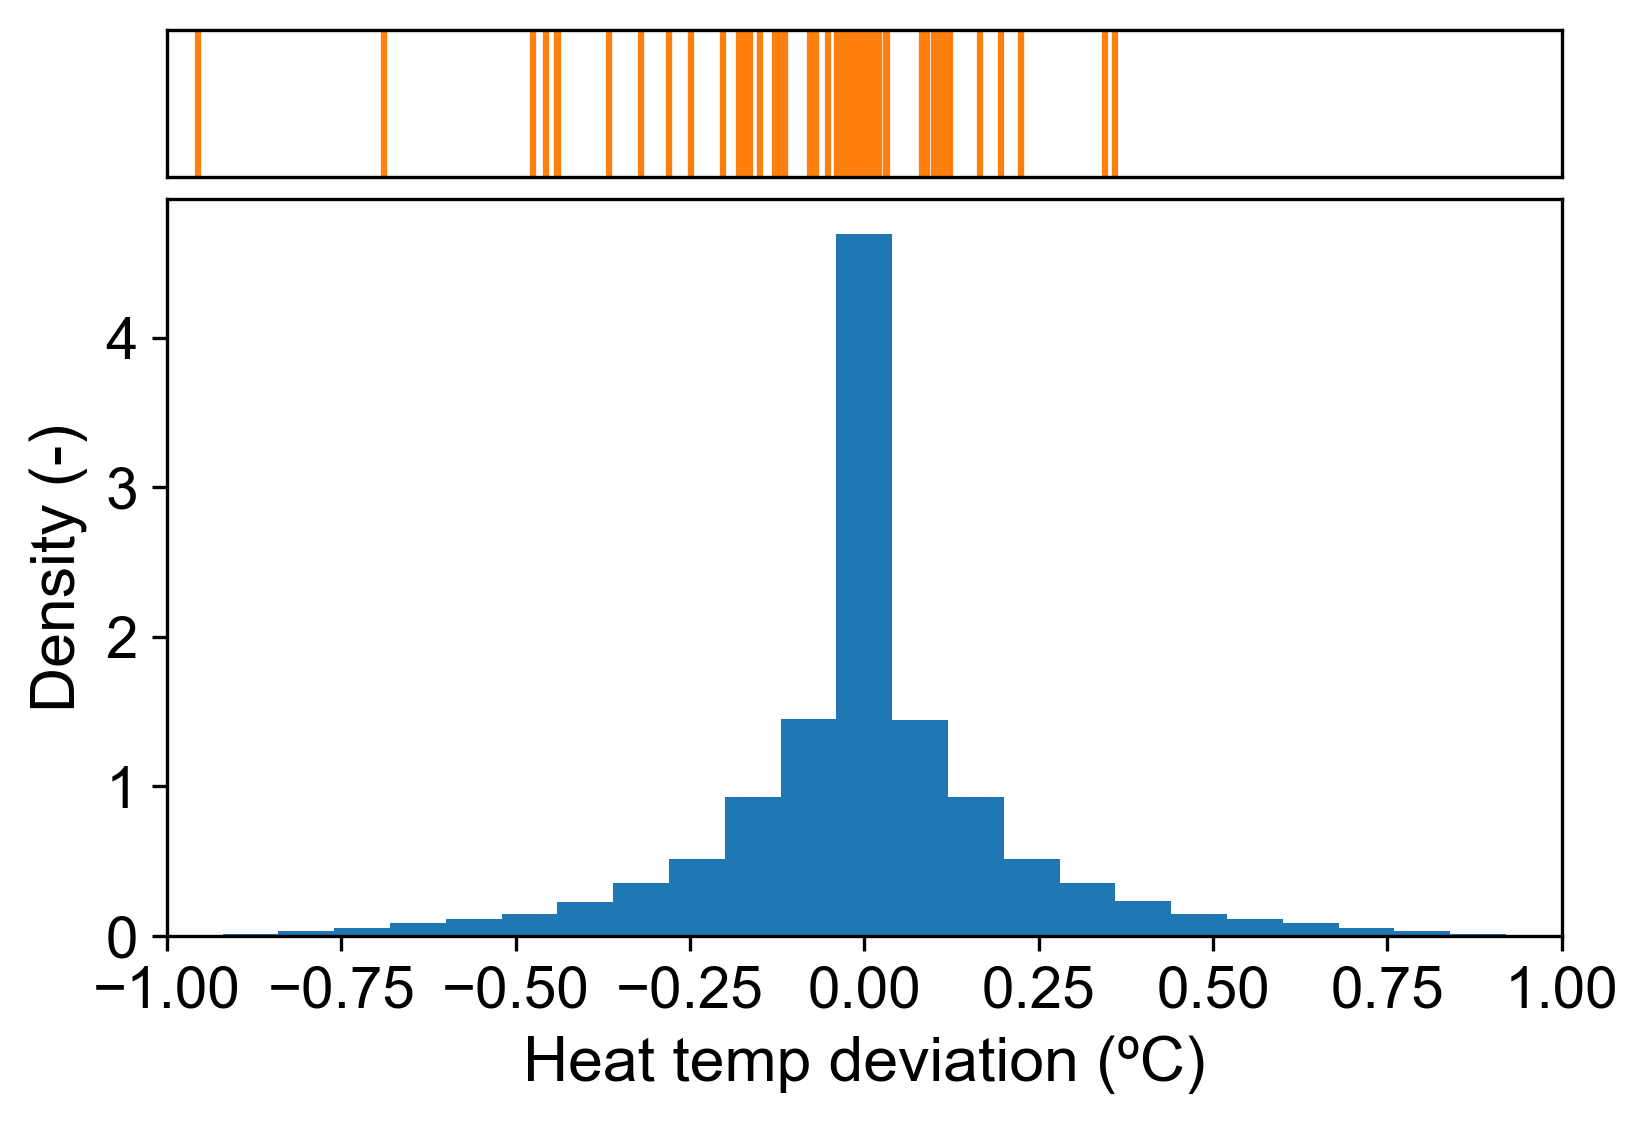

In [151]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"



plt.xticks(size=14)
plt.yticks(size=14)



ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-1, 1])
ax[1].set_xlim([-1, 1])
for i in range(len(size_serve_ill)):
    ax[0].axvline(x = heat_temp_uncertainty_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(heat_temp_uncertainty[prevalence_or_not==1],density="TRUE", range = (-1, 1), bins = 25)
ax[1].set_xlabel("Heat temp deviation (ºC)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

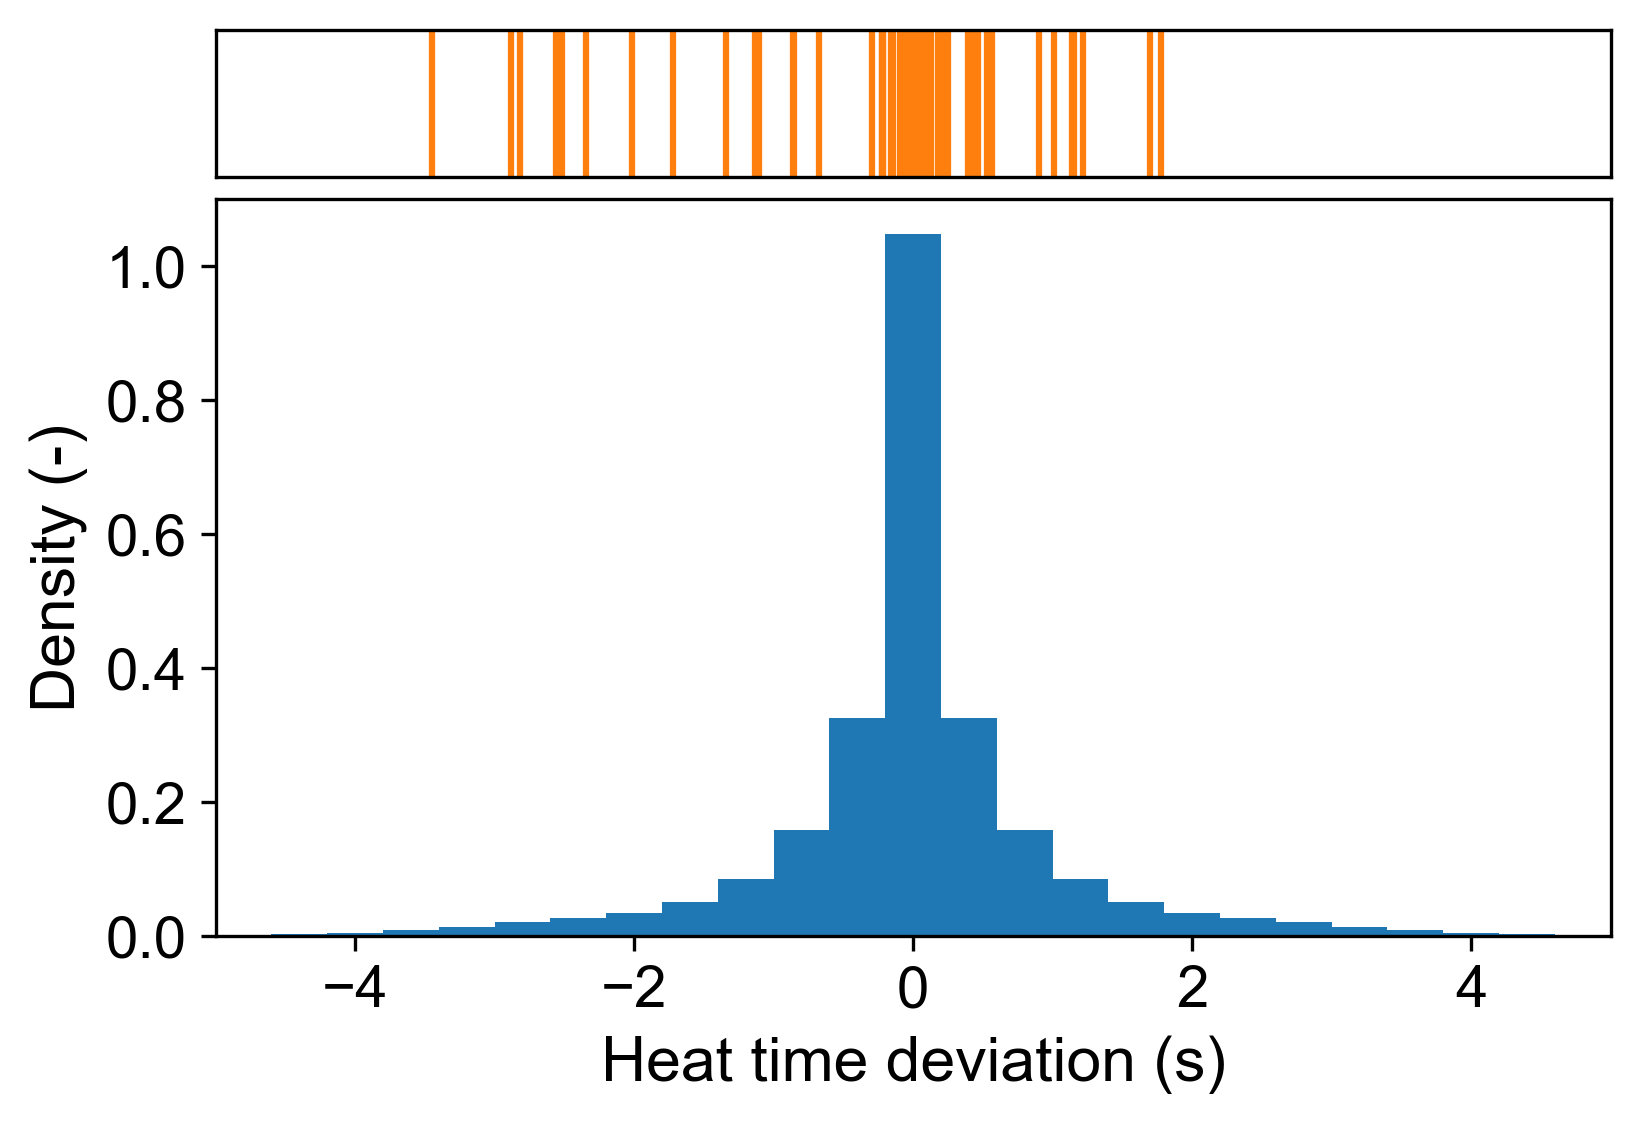

In [152]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"


plt.xticks(size=14)
plt.yticks(size=14)


ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-5, 5])
ax[1].set_xlim([-5, 5])
for i in range(len(size_serve_ill)):
    ax[0].axvline(x = heat_time_variability_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(heat_time_variability[prevalence_or_not==1],density="TRUE", range = (-5, 5), bins = 25)
ax[1].set_xlabel("Heat time deviation (s)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

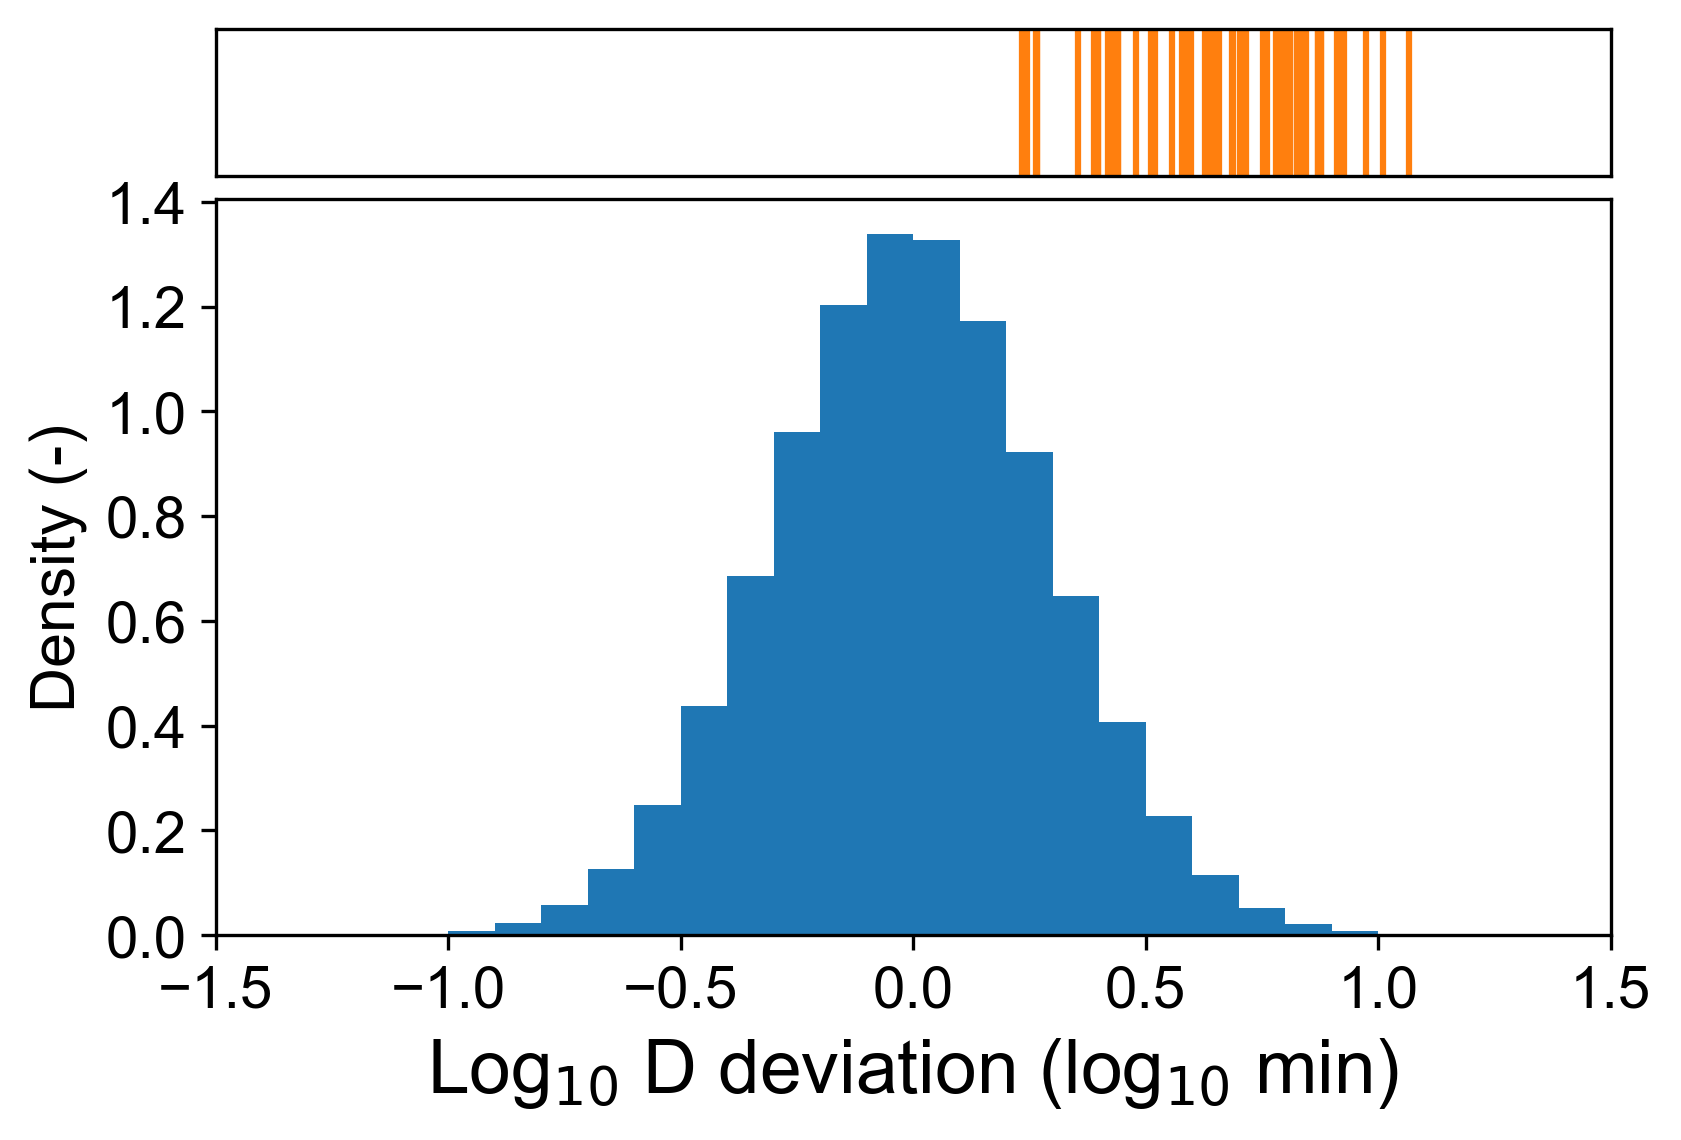

In [153]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)


ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-1.5, 1.5])
ax[1].set_xlim([-1.5, 1.5])
for i in range(len(logD_variability_ill)):
    ax[0].axvline(x = logD_variability_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(logD_variability[prevalence_or_not==1],density="TRUE", range = (-1.5, 1.5), bins = 30)
ax[1].set_xlabel("Log$_{10}$ D deviation (log$_{10}$ min)", size=18, fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

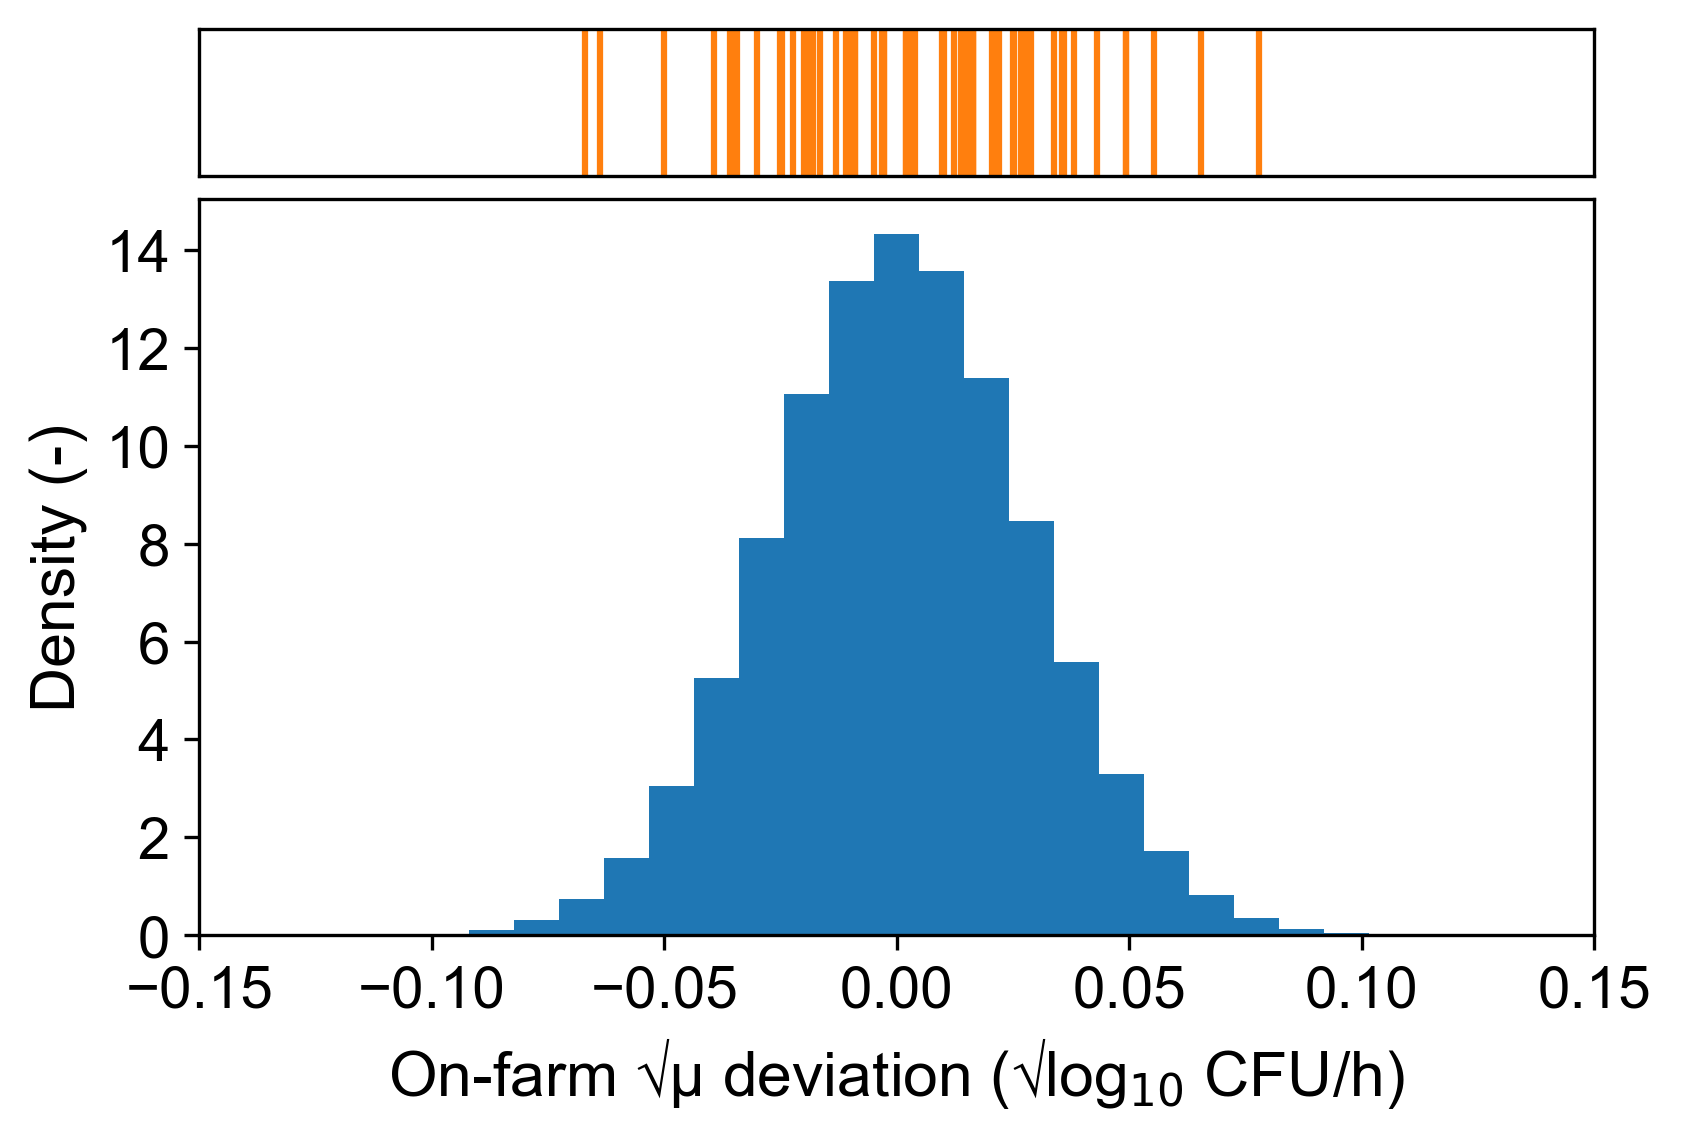

In [154]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)


ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-0.15, 0.15])
ax[1].set_xlim([-0.15, 0.15])
for i in range(len(mu_pre_variability_ill)):
    ax[0].axvline(x = mu_pre_variability_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(mu_pre_variability[prevalence_or_not==1],density="TRUE", range = (-0.15, 0.15), bins = 31)
ax[1].set_xlabel("On-farm √µ deviation (√log$_{10}$ CFU/h)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

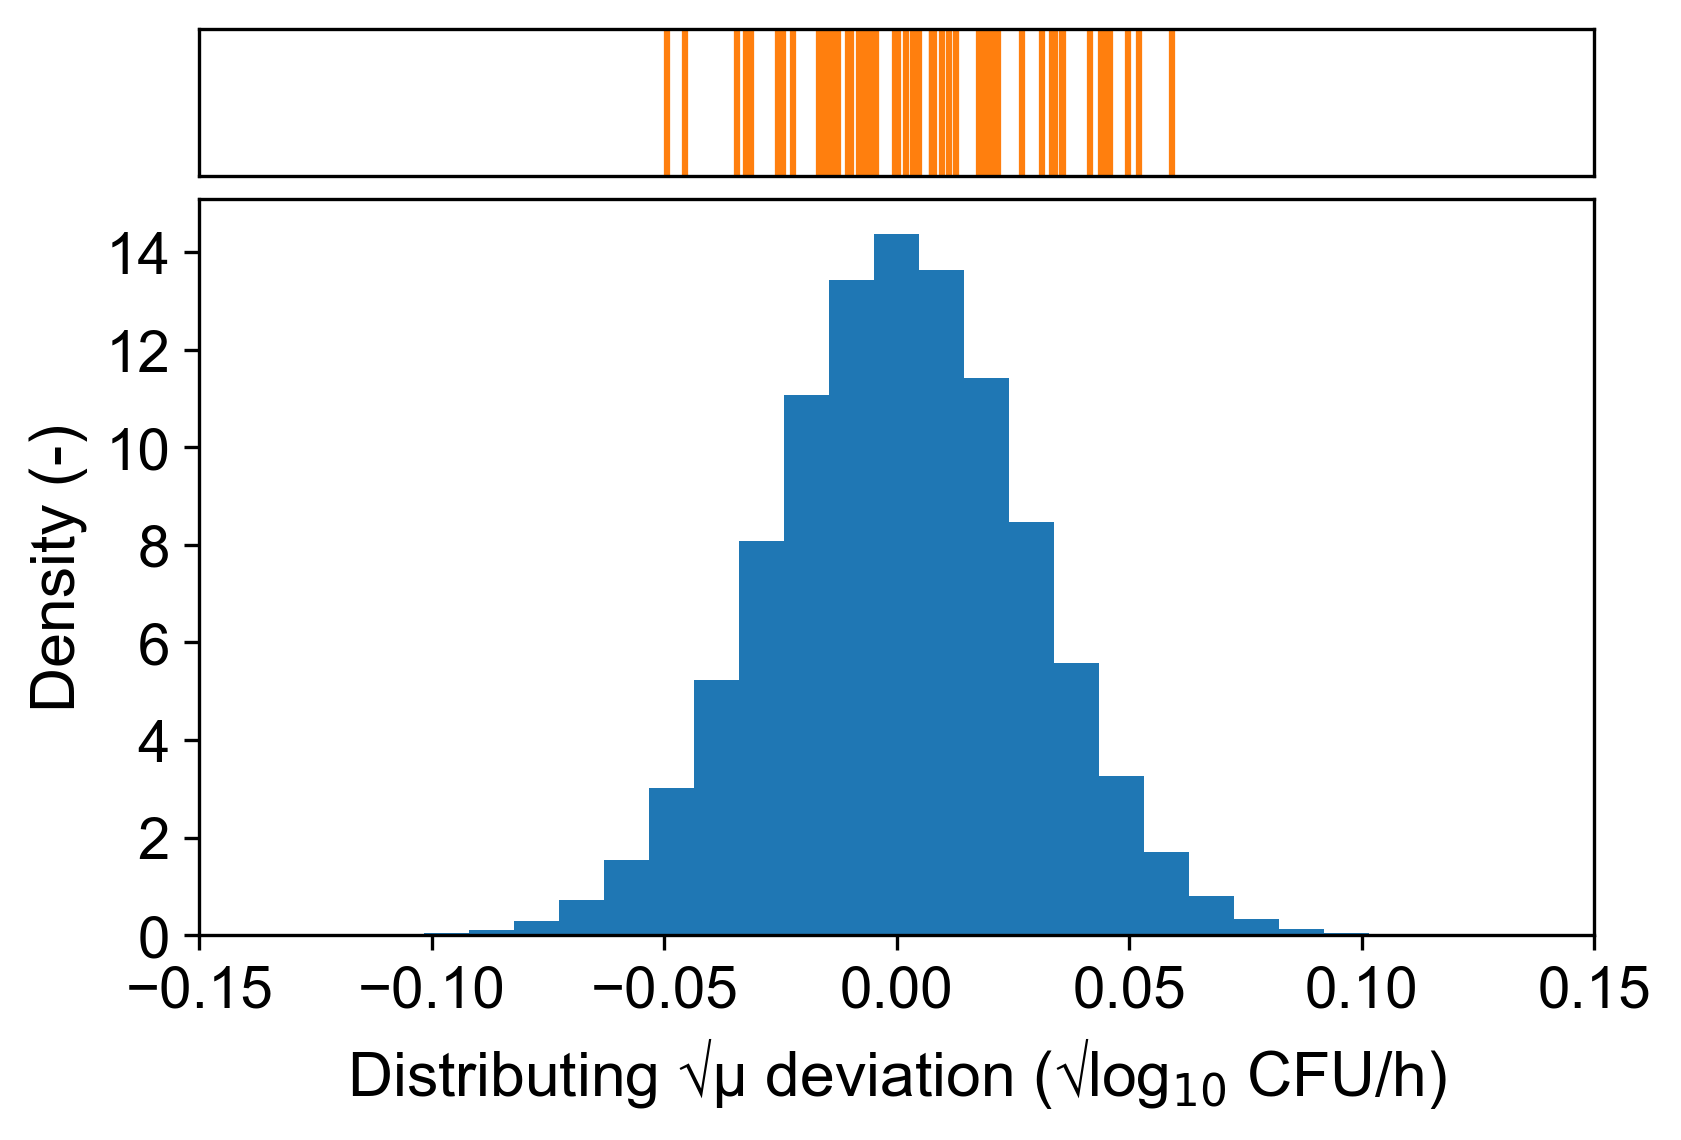

In [155]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)


ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-0.15, 0.15])
ax[1].set_xlim([-0.15, 0.15])
for i in range(len(mu_pre_variability_ill)):
    ax[0].axvline(x = mu_dist_variability_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(mu_dist_variability[prevalence_or_not==1],density="TRUE", range = (-0.15, 0.15), bins = 31)
ax[1].set_xlabel("Distributing √µ deviation (√log$_{10}$ CFU/h)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

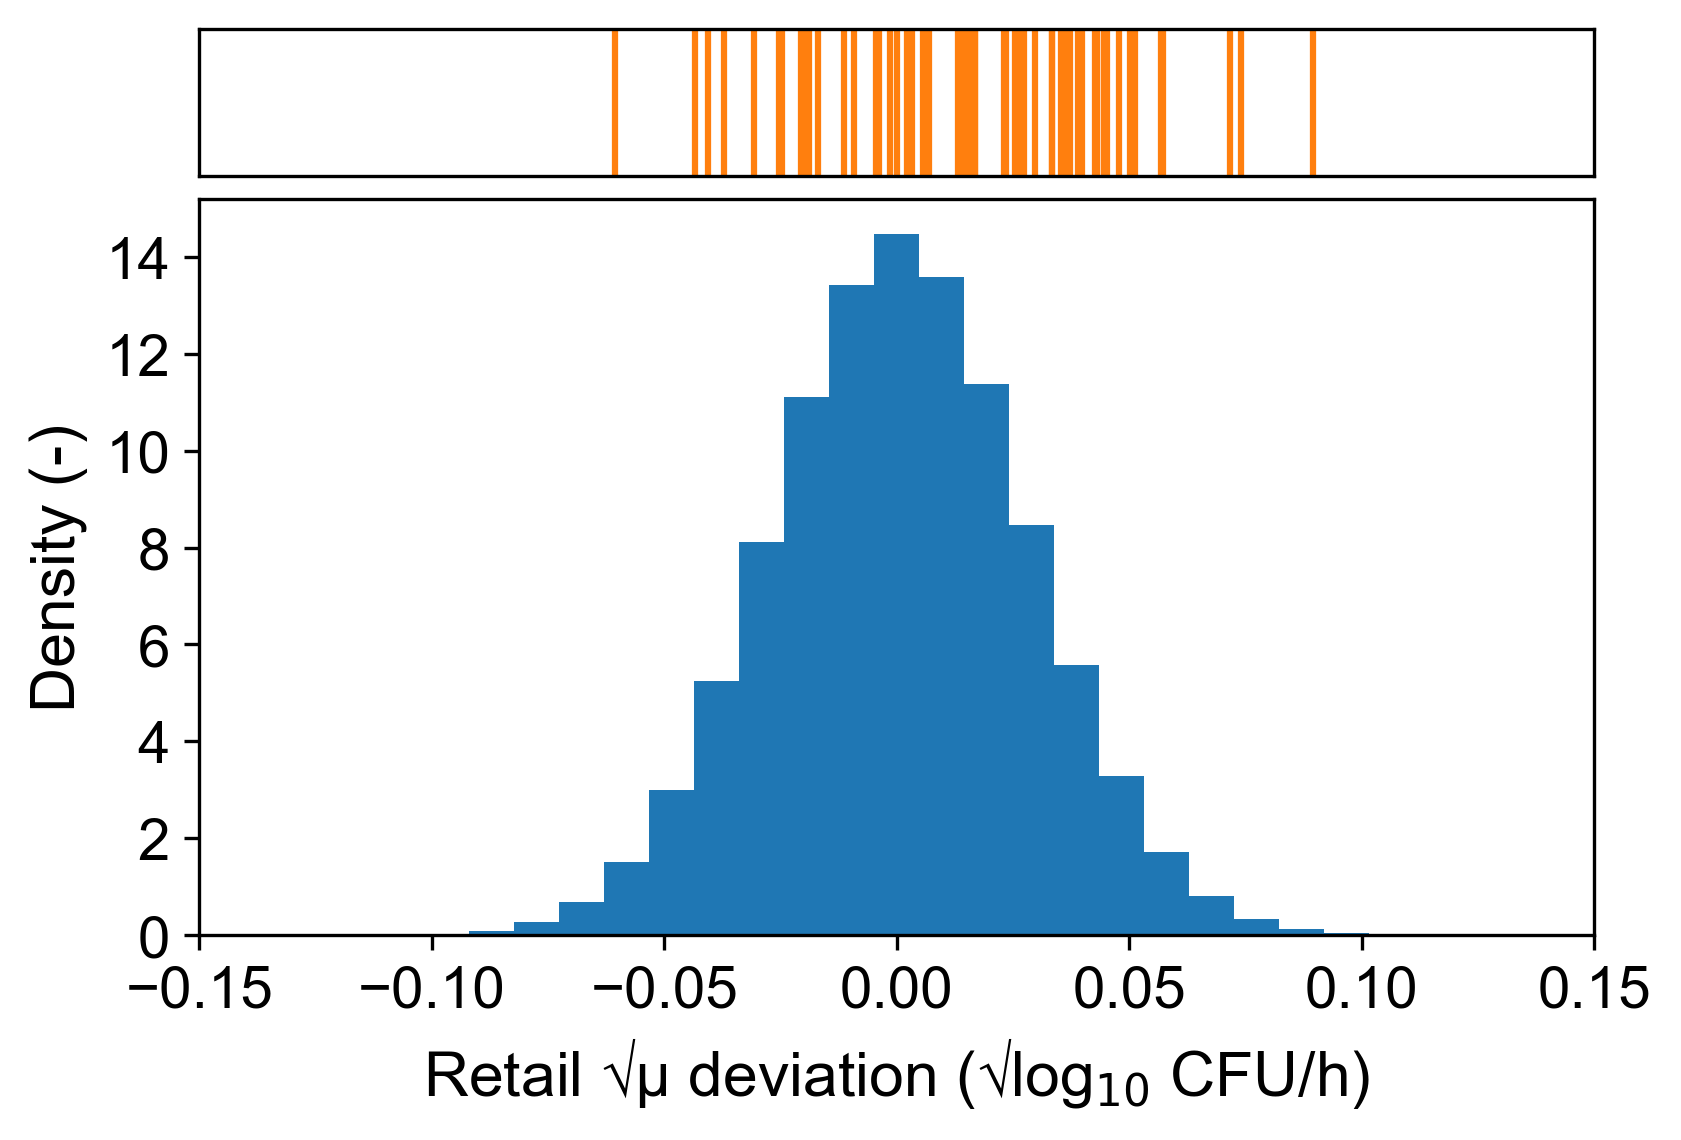

In [156]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)


ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-0.15, 0.15])
ax[1].set_xlim([-0.15, 0.15])
for i in range(len(mu_pre_variability_ill)):
    ax[0].axvline(x = mu_retail_variability_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(mu_retail_variability[prevalence_or_not==1],density="TRUE", range = (-0.15, 0.15), bins = 31)
ax[1].set_xlabel("Retail √µ deviation (√log$_{10}$ CFU/h)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()

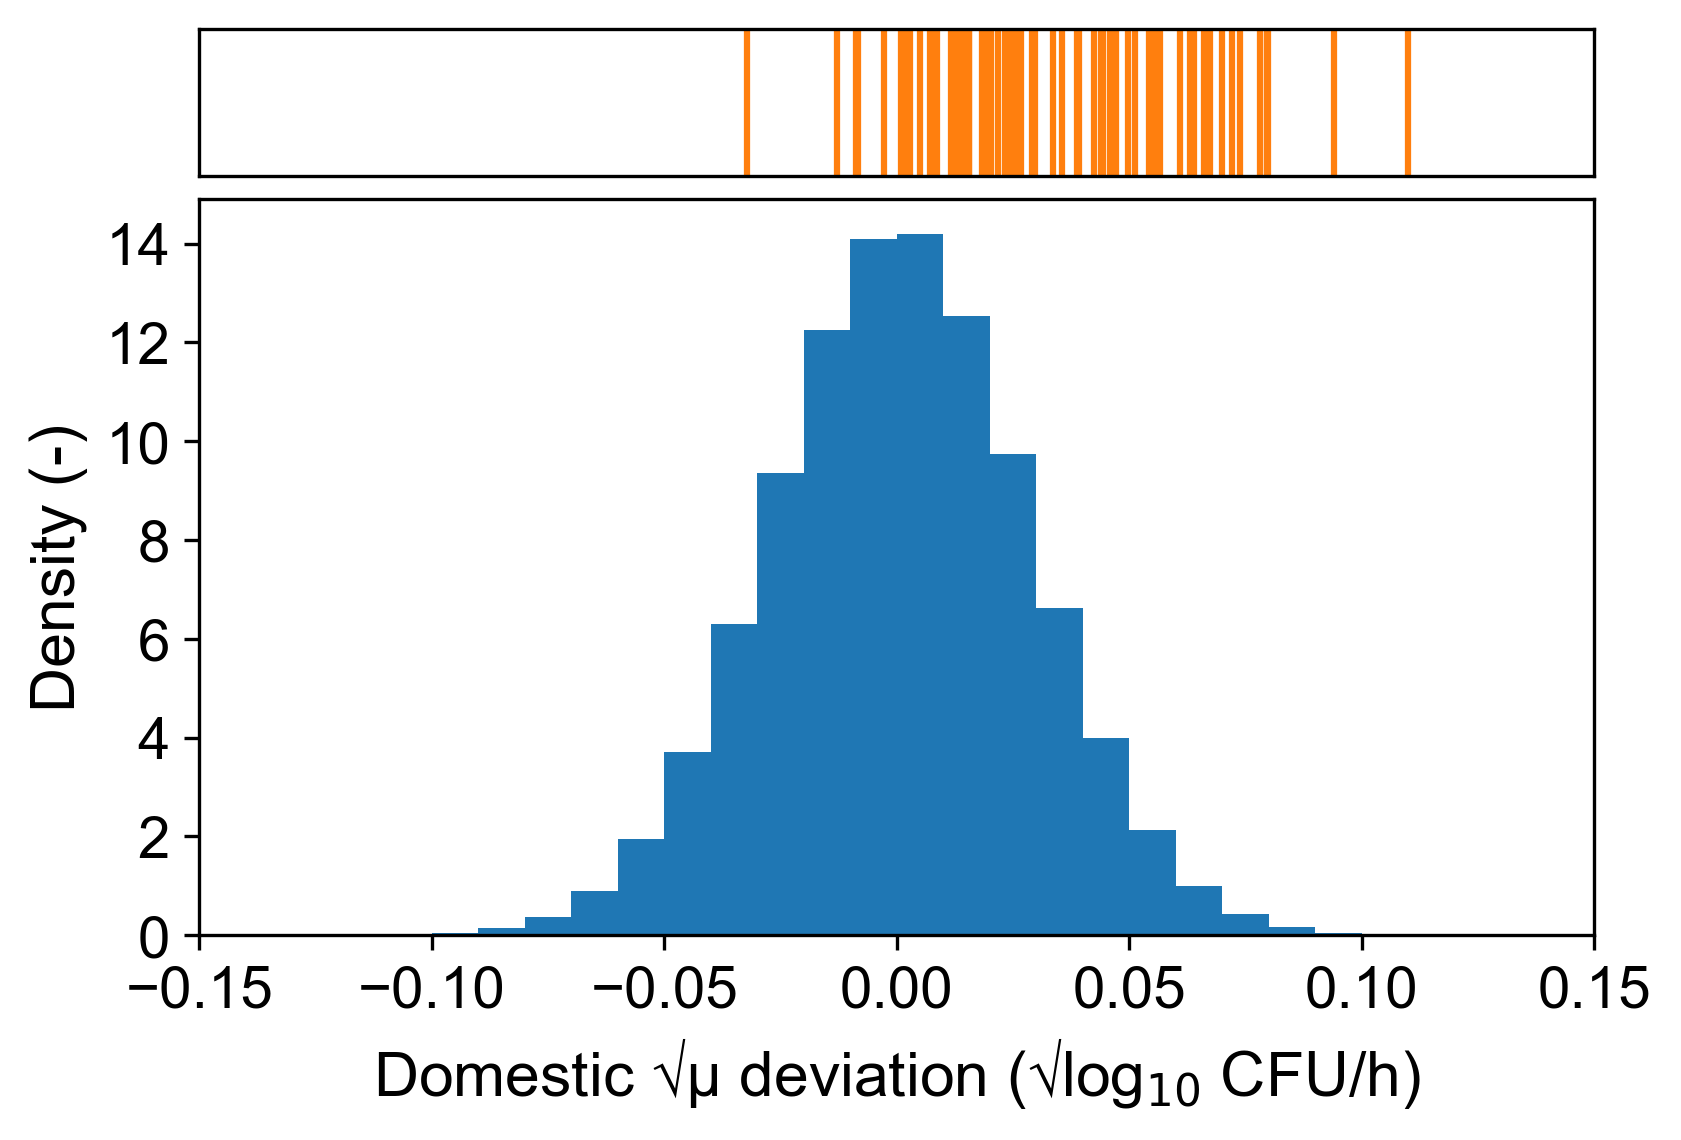

In [157]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 5]}, dpi=300)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)


ax[0].set_xticks([-100])
ax[0].set_yticks([-100])
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_xlim([-0.15, 0.15])
ax[1].set_xlim([-0.15, 0.15])
for i in range(len(mu_domestic_variability_ill)):
    ax[0].axvline(x = mu_domestic_variability_ill[i], ymin = -1, ymax = 1, color = Palette[1], lw = 1.5)
ax[1].hist(mu_domestic_variability[prevalence_or_not==1],density="TRUE", range = (-0.15, 0.15), bins = 30)
ax[1].set_xlabel("Domestic √µ deviation (√log$_{10}$ CFU/h)",size=15,fontname="Arial")
ax[1].set_ylabel("Density (-)",size=15,fontname="Arial")

plt.show()